## MNIST 识别---CNN

### Preprocess Data

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

np.random.seed(10)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape
X_train4D = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test4D = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalization
X_train4D_norm = X_train4D / 255.
X_test4D_norm = X_test4D / 255.

# one-hot label
y_trainOneHot = np_utils.to_categorical(y_train)
y_testOneHOt = np_utils.to_categorical(y_test)


/home/yinyunjie/anaconda3/envs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### CNN Model

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(16, (5, 5), padding='same',
            input_shape=(28, 28, 1), activation='relu', name='conv2d_1'))
model.add(MaxPooling2D((2, 2), name='max_pooling2d_1'))

model.add(Conv2D(36, (5, 5), padding='same', 
            input_shape=(28, 28, 1), activation='relu', name='conv2d_2'))
model.add(MaxPooling2D((2, 2), name='max_pooling2d_2'))

model.add(Dropout(0.25, name='dropout_1'))


model.add(Flatten(name='flatten_1'))

model.add(Dense(128, activation='relu', name='dense_1'))
model.add(Dropout(0.5, name='dropout_2'))
model.add(Dense(10, activation='softmax', name='output'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

### Training

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x=X_train4D,
                    y=y_trainOneHot,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32,
                    verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10


   32/48000 [..............................] - ETA: 10:42 - loss: 14.6212 - acc: 0.0625

   64/48000 [..............................] - ETA: 6:05 - loss: 13.9203 - acc: 0.1094 

   96/48000 [..............................] - ETA: 4:30 - loss: 13.9503 - acc: 0.1146

  128/48000 [..............................] - ETA: 3:41 - loss: 13.9925 - acc: 0.1094

  160/48000 [..............................] - ETA: 3:12 - loss: 14.1073 - acc: 0.1000

  192/48000 [..............................] - ETA: 2:53 - loss: 13.9389 - acc: 0.1146

  256/48000 [..............................] - ETA: 2:24 - loss: 14.0107 - acc: 0.1094

  320/48000 [..............................] - ETA: 2:06 - loss: 13.7994 - acc: 0.1219

  384/48000 [..............................] - ETA: 1:55 - loss: 13.8900 - acc: 0.1146

  448/48000 [..............................] - ETA: 1:46 - loss: 13.9394 - acc: 0.1138

  512/48000 [..............................] - ETA: 1:40 - loss: 13.9262 - acc: 0.1133

  576/48000 [..............................] - ETA: 1:35 - loss: 13.8528 - acc: 0.1181

  608/48000 [..............................] - ETA: 1:34 - loss: 13.7864 - acc: 0.1234

  672/48000 [..............................] - ETA: 1:30 - loss: 13.7687 - acc: 0.1265

  736/48000 [..............................] - ETA: 1:27 - loss: 13.7759 - acc: 0.1277

  800/48000 [..............................] - ETA: 1:25 - loss: 13.8276 - acc: 0.1250

  864/48000 [..............................] - ETA: 1:22 - loss: 13.8667 - acc: 0.1238

  928/48000 [..............................] - ETA: 1:21 - loss: 13.8913 - acc: 0.1218

  992/48000 [..............................] - ETA: 1:19 - loss: 13.9193 - acc: 0.1200

 1056/48000 [..............................] - ETA: 1:18 - loss: 13.8388 - acc: 0.1259

 1120/48000 [..............................] - ETA: 1:16 - loss: 13.7966 - acc: 0.1295

 1184/48000 [..............................] - ETA: 1:15 - loss: 13.7965 - acc: 0.1301

 1248/48000 [..............................] - ETA: 1:14 - loss: 13.7477 - acc: 0.1338

 1312/48000 [..............................] - ETA: 1:13 - loss: 13.7405 - acc: 0.1349

 1376/48000 [..............................] - ETA: 1:12 - loss: 13.7683 - acc: 0.1337

 1440/48000 [..............................] - ETA: 1:11 - loss: 13.7729 - acc: 0.1333

 1504/48000 [..............................] - ETA: 1:10 - loss: 13.7147 - acc: 0.1370

 1568/48000 [..............................] - ETA: 1:10 - loss: 13.6653 - acc: 0.1397

 1632/48000 [>.............................] - ETA: 1:09 - loss: 13.6594 - acc: 0.1403

 1696/48000 [>.............................] - ETA: 1:08 - loss: 13.6339 - acc: 0.1421

 1760/48000 [>.............................] - ETA: 1:08 - loss: 13.6169 - acc: 0.1432

 1824/48000 [>.............................] - ETA: 1:07 - loss: 13.6163 - acc: 0.1436

 1888/48000 [>.............................] - ETA: 1:07 - loss: 13.6016 - acc: 0.1441

 1952/48000 [>.............................] - ETA: 1:07 - loss: 13.5603 - acc: 0.1470

 2016/48000 [>.............................] - ETA: 1:06 - loss: 13.5695 - acc: 0.1468

 2080/48000 [>.............................] - ETA: 1:06 - loss: 13.5279 - acc: 0.1495

 2144/48000 [>.............................] - ETA: 1:05 - loss: 13.4977 - acc: 0.1511

 2208/48000 [>.............................] - ETA: 1:05 - loss: 13.4934 - acc: 0.1517

 2272/48000 [>.............................] - ETA: 1:04 - loss: 13.4329 - acc: 0.1554

 2336/48000 [>.............................] - ETA: 1:04 - loss: 13.3908 - acc: 0.1580

 2400/48000 [>.............................] - ETA: 1:04 - loss: 13.3656 - acc: 0.1592

 2464/48000 [>.............................] - ETA: 1:03 - loss: 13.3464 - acc: 0.1603

 2528/48000 [>.............................] - ETA: 1:03 - loss: 13.3648 - acc: 0.1594

 2592/48000 [>.............................] - ETA: 1:03 - loss: 13.3706 - acc: 0.1593

 2624/48000 [>.............................] - ETA: 1:03 - loss: 13.3549 - acc: 0.1604

 2688/48000 [>.............................] - ETA: 1:03 - loss: 13.3126 - acc: 0.1629

 2720/48000 [>.............................] - ETA: 1:03 - loss: 13.3160 - acc: 0.1629

 2752/48000 [>.............................] - ETA: 1:03 - loss: 13.3134 - acc: 0.1632

 2784/48000 [>.............................] - ETA: 1:03 - loss: 13.2762 - acc: 0.1656

 2816/48000 [>.............................] - ETA: 1:03 - loss: 13.2748 - acc: 0.1655

 2880/48000 [>.............................] - ETA: 1:03 - loss: 13.2821 - acc: 0.1653

 2944/48000 [>.............................] - ETA: 1:02 - loss: 13.2835 - acc: 0.1654

 3008/48000 [>.............................] - ETA: 1:02 - loss: 13.2956 - acc: 0.1649

 3072/48000 [>.............................] - ETA: 1:02 - loss: 13.3019 - acc: 0.1647

 3136/48000 [>.............................] - ETA: 1:01 - loss: 13.2799 - acc: 0.1661

 3200/48000 [=>............................] - ETA: 1:01 - loss: 13.2551 - acc: 0.1678

 3264/48000 [=>............................] - ETA: 1:01 - loss: 13.2408 - acc: 0.1688

 3328/48000 [=>............................] - ETA: 1:01 - loss: 13.2041 - acc: 0.1713

 3392/48000 [=>............................] - ETA: 1:00 - loss: 13.1933 - acc: 0.1719

 3456/48000 [=>............................] - ETA: 1:00 - loss: 13.1715 - acc: 0.1733

 3520/48000 [=>............................] - ETA: 1:00 - loss: 13.1687 - acc: 0.1736

 3584/48000 [=>............................] - ETA: 1:00 - loss: 13.1269 - acc: 0.1763

 3648/48000 [=>............................] - ETA: 1:00 - loss: 13.0997 - acc: 0.1782

 3712/48000 [=>............................] - ETA: 1:00 - loss: 13.0996 - acc: 0.1783

 3776/48000 [=>............................] - ETA: 1:00 - loss: 13.0868 - acc: 0.1793

 3840/48000 [=>............................] - ETA: 1:00 - loss: 13.0878 - acc: 0.1792

 3904/48000 [=>............................] - ETA: 1:00 - loss: 13.0563 - acc: 0.1811

 3968/48000 [=>............................] - ETA: 1:00 - loss: 13.0529 - acc: 0.1812

 4032/48000 [=>............................] - ETA: 59s - loss: 13.0528 - acc: 0.1813 

 4096/48000 [=>............................] - ETA: 59s - loss: 13.0404 - acc: 0.1819

 4160/48000 [=>............................] - ETA: 59s - loss: 13.0200 - acc: 0.1829

 4224/48000 [=>............................] - ETA: 59s - loss: 12.9983 - acc: 0.1844

 4288/48000 [=>............................] - ETA: 58s - loss: 12.9716 - acc: 0.1859

 4352/48000 [=>............................] - ETA: 58s - loss: 12.9513 - acc: 0.1870

 4384/48000 [=>............................] - ETA: 58s - loss: 12.9486 - acc: 0.1873

 4448/48000 [=>............................] - ETA: 58s - loss: 12.9376 - acc: 0.1879

 4512/48000 [=>............................] - ETA: 58s - loss: 12.9255 - acc: 0.1888

 4576/48000 [=>............................] - ETA: 58s - loss: 12.9138 - acc: 0.1897

 4640/48000 [=>............................] - ETA: 57s - loss: 12.9130 - acc: 0.1894

 4704/48000 [=>............................] - ETA: 57s - loss: 12.8946 - acc: 0.1907

 4768/48000 [=>............................] - ETA: 57s - loss: 12.8770 - acc: 0.1919

 4832/48000 [==>...........................] - ETA: 57s - loss: 12.8528 - acc: 0.1933

 4896/48000 [==>...........................] - ETA: 57s - loss: 12.8330 - acc: 0.1946

 4960/48000 [==>...........................] - ETA: 57s - loss: 12.8259 - acc: 0.1950

 5024/48000 [==>...........................] - ETA: 56s - loss: 12.7845 - acc: 0.1977

 5088/48000 [==>...........................] - ETA: 56s - loss: 12.7604 - acc: 0.1991

 5152/48000 [==>...........................] - ETA: 56s - loss: 12.7581 - acc: 0.1993

 5216/48000 [==>...........................] - ETA: 56s - loss: 12.7413 - acc: 0.2003

 5280/48000 [==>...........................] - ETA: 56s - loss: 12.7237 - acc: 0.2013

 5344/48000 [==>...........................] - ETA: 56s - loss: 12.7011 - acc: 0.2028

 5408/48000 [==>...........................] - ETA: 55s - loss: 12.6819 - acc: 0.2041

 5472/48000 [==>...........................] - ETA: 55s - loss: 12.6604 - acc: 0.2054

 5536/48000 [==>...........................] - ETA: 55s - loss: 12.6477 - acc: 0.2061

 5600/48000 [==>...........................] - ETA: 55s - loss: 12.6299 - acc: 0.2073

 5664/48000 [==>...........................] - ETA: 55s - loss: 12.6153 - acc: 0.2082

 5728/48000 [==>...........................] - ETA: 55s - loss: 12.6156 - acc: 0.2081

 5792/48000 [==>...........................] - ETA: 54s - loss: 12.5848 - acc: 0.2099

 5856/48000 [==>...........................] - ETA: 54s - loss: 12.5906 - acc: 0.2094

 5920/48000 [==>...........................] - ETA: 54s - loss: 12.5706 - acc: 0.2103

 5984/48000 [==>...........................] - ETA: 54s - loss: 12.5421 - acc: 0.2121

 6048/48000 [==>...........................] - ETA: 54s - loss: 12.5273 - acc: 0.2128

 6112/48000 [==>...........................] - ETA: 54s - loss: 12.5206 - acc: 0.2130

 6176/48000 [==>...........................] - ETA: 54s - loss: 12.5109 - acc: 0.2134

 6240/48000 [==>...........................] - ETA: 54s - loss: 12.5110 - acc: 0.2131

 6304/48000 [==>...........................] - ETA: 53s - loss: 12.4958 - acc: 0.2140

 6368/48000 [==>...........................] - ETA: 53s - loss: 12.4787 - acc: 0.2151

 6432/48000 [===>..........................] - ETA: 53s - loss: 12.4671 - acc: 0.2156

 6496/48000 [===>..........................] - ETA: 53s - loss: 12.4557 - acc: 0.2161

 6560/48000 [===>..........................] - ETA: 53s - loss: 12.4371 - acc: 0.2171

 6624/48000 [===>..........................] - ETA: 53s - loss: 12.4248 - acc: 0.2177

 6688/48000 [===>..........................] - ETA: 53s - loss: 12.4066 - acc: 0.2185

 6752/48000 [===>..........................] - ETA: 52s - loss: 12.3566 - acc: 0.2216

 6816/48000 [===>..........................] - ETA: 52s - loss: 12.3435 - acc: 0.2224

 6880/48000 [===>..........................] - ETA: 52s - loss: 12.3221 - acc: 0.2238

 6912/48000 [===>..........................] - ETA: 52s - loss: 12.2939 - acc: 0.2255

 6976/48000 [===>..........................] - ETA: 52s - loss: 12.2748 - acc: 0.2265

 7040/48000 [===>..........................] - ETA: 52s - loss: 12.2339 - acc: 0.2287

 7104/48000 [===>..........................] - ETA: 52s - loss: 12.2048 - acc: 0.2303

 7168/48000 [===>..........................] - ETA: 52s - loss: 12.1919 - acc: 0.2312

 7232/48000 [===>..........................] - ETA: 52s - loss: 12.1481 - acc: 0.2337

 7296/48000 [===>..........................] - ETA: 52s - loss: 12.1252 - acc: 0.2351

 7360/48000 [===>..........................] - ETA: 51s - loss: 12.0923 - acc: 0.2370

 7424/48000 [===>..........................] - ETA: 51s - loss: 12.0556 - acc: 0.2391

 7488/48000 [===>..........................] - ETA: 51s - loss: 12.0228 - acc: 0.2409

 7552/48000 [===>..........................] - ETA: 51s - loss: 11.9964 - acc: 0.2422

 7616/48000 [===>..........................] - ETA: 51s - loss: 11.9669 - acc: 0.2440

 7680/48000 [===>..........................] - ETA: 51s - loss: 11.9254 - acc: 0.2462

 7744/48000 [===>..........................] - ETA: 51s - loss: 11.9058 - acc: 0.2472

 7808/48000 [===>..........................] - ETA: 51s - loss: 11.8826 - acc: 0.2481

 7872/48000 [===>..........................] - ETA: 50s - loss: 11.8502 - acc: 0.2497

 7936/48000 [===>..........................] - ETA: 50s - loss: 11.8188 - acc: 0.2518

 8000/48000 [====>.........................] - ETA: 50s - loss: 11.7809 - acc: 0.2537

 8064/48000 [====>.........................] - ETA: 50s - loss: 11.7358 - acc: 0.2560

 8128/48000 [====>.........................] - ETA: 50s - loss: 11.7057 - acc: 0.2575

 8192/48000 [====>.........................] - ETA: 50s - loss: 11.6551 - acc: 0.2604

 8256/48000 [====>.........................] - ETA: 50s - loss: 11.6126 - acc: 0.2630

 8320/48000 [====>.........................] - ETA: 50s - loss: 11.5716 - acc: 0.2654

 8384/48000 [====>.........................] - ETA: 50s - loss: 11.5481 - acc: 0.2666

 8448/48000 [====>.........................] - ETA: 50s - loss: 11.5183 - acc: 0.2682

 8512/48000 [====>.........................] - ETA: 49s - loss: 11.4791 - acc: 0.2700

 8576/48000 [====>.........................] - ETA: 49s - loss: 11.4510 - acc: 0.2715

 8640/48000 [====>.........................] - ETA: 49s - loss: 11.4190 - acc: 0.2733

 8704/48000 [====>.........................] - ETA: 49s - loss: 11.3665 - acc: 0.2763

 8768/48000 [====>.........................] - ETA: 49s - loss: 11.3338 - acc: 0.2777

 8832/48000 [====>.........................] - ETA: 49s - loss: 11.2896 - acc: 0.2802

 8896/48000 [====>.........................] - ETA: 49s - loss: 11.2456 - acc: 0.2825

 8960/48000 [====>.........................] - ETA: 49s - loss: 11.2229 - acc: 0.2835

 9024/48000 [====>.........................] - ETA: 49s - loss: 11.1841 - acc: 0.2857

 9088/48000 [====>.........................] - ETA: 48s - loss: 11.1436 - acc: 0.2879

 9152/48000 [====>.........................] - ETA: 48s - loss: 11.1118 - acc: 0.2898

 9216/48000 [====>.........................] - ETA: 48s - loss: 11.0717 - acc: 0.2918

 9280/48000 [====>.........................] - ETA: 48s - loss: 11.0412 - acc: 0.2933

 9344/48000 [====>.........................] - ETA: 48s - loss: 10.9997 - acc: 0.2958

 9408/48000 [====>.........................] - ETA: 48s - loss: 10.9636 - acc: 0.2979

 9472/48000 [====>.........................] - ETA: 48s - loss: 10.9294 - acc: 0.2998

 9536/48000 [====>.........................] - ETA: 48s - loss: 10.9014 - acc: 0.3013

 9600/48000 [=====>........................] - ETA: 48s - loss: 10.8636 - acc: 0.3033

 9664/48000 [=====>........................] - ETA: 47s - loss: 10.8236 - acc: 0.3054

 9728/48000 [=====>........................] - ETA: 47s - loss: 10.7839 - acc: 0.3073

 9792/48000 [=====>........................] - ETA: 47s - loss: 10.7464 - acc: 0.3093

 9856/48000 [=====>........................] - ETA: 47s - loss: 10.7016 - acc: 0.3120

 9920/48000 [=====>........................] - ETA: 47s - loss: 10.6582 - acc: 0.3144

 9984/48000 [=====>........................] - ETA: 47s - loss: 10.6177 - acc: 0.3163

10048/48000 [=====>........................] - ETA: 47s - loss: 10.5746 - acc: 0.3186

10112/48000 [=====>........................] - ETA: 47s - loss: 10.5281 - acc: 0.3210

10176/48000 [=====>........................] - ETA: 47s - loss: 10.4927 - acc: 0.3225

10240/48000 [=====>........................] - ETA: 47s - loss: 10.4447 - acc: 0.3249

10304/48000 [=====>........................] - ETA: 46s - loss: 10.4058 - acc: 0.3266

10368/48000 [=====>........................] - ETA: 46s - loss: 10.3708 - acc: 0.3281

10432/48000 [=====>........................] - ETA: 46s - loss: 10.3356 - acc: 0.3293

10496/48000 [=====>........................] - ETA: 46s - loss: 10.2896 - acc: 0.3315

10560/48000 [=====>........................] - ETA: 46s - loss: 10.2452 - acc: 0.3333

10624/48000 [=====>........................] - ETA: 46s - loss: 10.1933 - acc: 0.3360

10688/48000 [=====>........................] - ETA: 46s - loss: 10.1476 - acc: 0.3379

10752/48000 [=====>........................] - ETA: 46s - loss: 10.0985 - acc: 0.3402

10816/48000 [=====>........................] - ETA: 46s - loss: 10.0452 - acc: 0.3424

10880/48000 [=====>........................] - ETA: 46s - loss: 9.9926 - acc: 0.3443 

10944/48000 [=====>........................] - ETA: 46s - loss: 9.9407 - acc: 0.3461

11008/48000 [=====>........................] - ETA: 45s - loss: 9.8902 - acc: 0.3480

11072/48000 [=====>........................] - ETA: 45s - loss: 9.8415 - acc: 0.3494

11136/48000 [=====>........................] - ETA: 45s - loss: 9.7908 - acc: 0.3513

11200/48000 [======>.......................] - ETA: 45s - loss: 9.7406 - acc: 0.3531

11264/48000 [======>.......................] - ETA: 45s - loss: 9.6903 - acc: 0.3552

11328/48000 [======>.......................] - ETA: 45s - loss: 9.6406 - acc: 0.3570

11392/48000 [======>.......................] - ETA: 45s - loss: 9.5909 - acc: 0.3591

11456/48000 [======>.......................] - ETA: 45s - loss: 9.5447 - acc: 0.3603

11520/48000 [======>.......................] - ETA: 45s - loss: 9.4982 - acc: 0.3621

11584/48000 [======>.......................] - ETA: 45s - loss: 9.4506 - acc: 0.3641

11648/48000 [======>.......................] - ETA: 45s - loss: 9.4043 - acc: 0.3662

11712/48000 [======>.......................] - ETA: 44s - loss: 9.3580 - acc: 0.3683

11776/48000 [======>.......................] - ETA: 44s - loss: 9.3109 - acc: 0.3706

11840/48000 [======>.......................] - ETA: 44s - loss: 9.2660 - acc: 0.3724

11904/48000 [======>.......................] - ETA: 44s - loss: 9.2194 - acc: 0.3747

11968/48000 [======>.......................] - ETA: 44s - loss: 9.1743 - acc: 0.3768

12032/48000 [======>.......................] - ETA: 44s - loss: 9.1307 - acc: 0.3785

12096/48000 [======>.......................] - ETA: 44s - loss: 9.0862 - acc: 0.3805

12160/48000 [======>.......................] - ETA: 44s - loss: 9.0425 - acc: 0.3826

12224/48000 [======>.......................] - ETA: 44s - loss: 8.9996 - acc: 0.3848

12288/48000 [======>.......................] - ETA: 44s - loss: 8.9564 - acc: 0.3870

12352/48000 [======>.......................] - ETA: 43s - loss: 8.9130 - acc: 0.3894

12416/48000 [======>.......................] - ETA: 43s - loss: 8.8705 - acc: 0.3915

12480/48000 [======>.......................] - ETA: 43s - loss: 8.8270 - acc: 0.3939

12544/48000 [======>.......................] - ETA: 43s - loss: 8.7857 - acc: 0.3960

12608/48000 [======>.......................] - ETA: 43s - loss: 8.7450 - acc: 0.3978

12672/48000 [======>.......................] - ETA: 43s - loss: 8.7040 - acc: 0.4001

12736/48000 [======>.......................] - ETA: 43s - loss: 8.6639 - acc: 0.4021

12800/48000 [=======>......................] - ETA: 43s - loss: 8.6237 - acc: 0.4042

12864/48000 [=======>......................] - ETA: 43s - loss: 8.5843 - acc: 0.4059

12928/48000 [=======>......................] - ETA: 43s - loss: 8.5457 - acc: 0.4079

12992/48000 [=======>......................] - ETA: 43s - loss: 8.5071 - acc: 0.4096

13056/48000 [=======>......................] - ETA: 43s - loss: 8.4691 - acc: 0.4114

13120/48000 [=======>......................] - ETA: 42s - loss: 8.4308 - acc: 0.4134

13184/48000 [=======>......................] - ETA: 42s - loss: 8.3923 - acc: 0.4157

13248/48000 [=======>......................] - ETA: 42s - loss: 8.3546 - acc: 0.4178

13312/48000 [=======>......................] - ETA: 42s - loss: 8.3183 - acc: 0.4197

13376/48000 [=======>......................] - ETA: 42s - loss: 8.2817 - acc: 0.4215

13440/48000 [=======>......................] - ETA: 42s - loss: 8.2467 - acc: 0.4228

13504/48000 [=======>......................] - ETA: 42s - loss: 8.2104 - acc: 0.4250

13568/48000 [=======>......................] - ETA: 42s - loss: 8.1750 - acc: 0.4267

13632/48000 [=======>......................] - ETA: 42s - loss: 8.1385 - acc: 0.4288

13696/48000 [=======>......................] - ETA: 42s - loss: 8.1039 - acc: 0.4307

13760/48000 [=======>......................] - ETA: 42s - loss: 8.0696 - acc: 0.4323

13824/48000 [=======>......................] - ETA: 41s - loss: 8.0343 - acc: 0.4342

13888/48000 [=======>......................] - ETA: 41s - loss: 7.9996 - acc: 0.4362

13952/48000 [=======>......................] - ETA: 41s - loss: 7.9646 - acc: 0.4384

14016/48000 [=======>......................] - ETA: 41s - loss: 7.9307 - acc: 0.4401

14080/48000 [=======>......................] - ETA: 41s - loss: 7.8971 - acc: 0.4419

14144/48000 [=======>......................] - ETA: 41s - loss: 7.8635 - acc: 0.4439

14208/48000 [=======>......................] - ETA: 41s - loss: 7.8302 - acc: 0.4459

14272/48000 [=======>......................] - ETA: 41s - loss: 7.7980 - acc: 0.4473

14336/48000 [=======>......................] - ETA: 41s - loss: 7.7657 - acc: 0.4490

14400/48000 [========>.....................] - ETA: 41s - loss: 7.7337 - acc: 0.4507

14464/48000 [========>.....................] - ETA: 41s - loss: 7.7031 - acc: 0.4521

14528/48000 [========>.....................] - ETA: 40s - loss: 7.6712 - acc: 0.4540

14592/48000 [========>.....................] - ETA: 40s - loss: 7.6390 - acc: 0.4558

14656/48000 [========>.....................] - ETA: 40s - loss: 7.6090 - acc: 0.4573

14720/48000 [========>.....................] - ETA: 40s - loss: 7.5777 - acc: 0.4590

14784/48000 [========>.....................] - ETA: 40s - loss: 7.5461 - acc: 0.4610

14848/48000 [========>.....................] - ETA: 40s - loss: 7.5155 - acc: 0.4629

14912/48000 [========>.....................] - ETA: 40s - loss: 7.4864 - acc: 0.4643

14976/48000 [========>.....................] - ETA: 40s - loss: 7.4556 - acc: 0.4661

15040/48000 [========>.....................] - ETA: 40s - loss: 7.4267 - acc: 0.4675

15104/48000 [========>.....................] - ETA: 40s - loss: 7.3971 - acc: 0.4692

15168/48000 [========>.....................] - ETA: 40s - loss: 7.3678 - acc: 0.4709

15232/48000 [========>.....................] - ETA: 39s - loss: 7.3388 - acc: 0.4724

15296/48000 [========>.....................] - ETA: 39s - loss: 7.3104 - acc: 0.4738

15360/48000 [========>.....................] - ETA: 39s - loss: 7.2818 - acc: 0.4753

15424/48000 [========>.....................] - ETA: 39s - loss: 7.2533 - acc: 0.4770

15488/48000 [========>.....................] - ETA: 39s - loss: 7.2252 - acc: 0.4788

15552/48000 [========>.....................] - ETA: 39s - loss: 7.1980 - acc: 0.4803

15616/48000 [========>.....................] - ETA: 39s - loss: 7.1708 - acc: 0.4819

15680/48000 [========>.....................] - ETA: 39s - loss: 7.1447 - acc: 0.4834

15744/48000 [========>.....................] - ETA: 39s - loss: 7.1170 - acc: 0.4849

15808/48000 [========>.....................] - ETA: 39s - loss: 7.0907 - acc: 0.4863

15872/48000 [========>.....................] - ETA: 39s - loss: 7.0643 - acc: 0.4876

15936/48000 [========>.....................] - ETA: 39s - loss: 7.0379 - acc: 0.4889

16000/48000 [=========>....................] - ETA: 38s - loss: 7.0118 - acc: 0.4903

16064/48000 [=========>....................] - ETA: 38s - loss: 6.9857 - acc: 0.4917

16128/48000 [=========>....................] - ETA: 38s - loss: 6.9590 - acc: 0.4933

16192/48000 [=========>....................] - ETA: 38s - loss: 6.9326 - acc: 0.4950

16256/48000 [=========>....................] - ETA: 38s - loss: 6.9064 - acc: 0.4967

16320/48000 [=========>....................] - ETA: 38s - loss: 6.8811 - acc: 0.4983

16384/48000 [=========>....................] - ETA: 38s - loss: 6.8557 - acc: 0.4997

16448/48000 [=========>....................] - ETA: 38s - loss: 6.8309 - acc: 0.5010

16512/48000 [=========>....................] - ETA: 38s - loss: 6.8058 - acc: 0.5024

16576/48000 [=========>....................] - ETA: 38s - loss: 6.7810 - acc: 0.5039

16640/48000 [=========>....................] - ETA: 38s - loss: 6.7567 - acc: 0.5050

16704/48000 [=========>....................] - ETA: 38s - loss: 6.7330 - acc: 0.5065

16768/48000 [=========>....................] - ETA: 37s - loss: 6.7093 - acc: 0.5078

16832/48000 [=========>....................] - ETA: 37s - loss: 6.6858 - acc: 0.5093

16896/48000 [=========>....................] - ETA: 37s - loss: 6.6640 - acc: 0.5106

16960/48000 [=========>....................] - ETA: 37s - loss: 6.6405 - acc: 0.5117

17024/48000 [=========>....................] - ETA: 37s - loss: 6.6175 - acc: 0.5129

17088/48000 [=========>....................] - ETA: 37s - loss: 6.5944 - acc: 0.5143

17152/48000 [=========>....................] - ETA: 37s - loss: 6.5717 - acc: 0.5155

17216/48000 [=========>....................] - ETA: 37s - loss: 6.5488 - acc: 0.5167

17280/48000 [=========>....................] - ETA: 37s - loss: 6.5254 - acc: 0.5183

17344/48000 [=========>....................] - ETA: 37s - loss: 6.5031 - acc: 0.5196

17408/48000 [=========>....................] - ETA: 37s - loss: 6.4801 - acc: 0.5211

17472/48000 [=========>....................] - ETA: 37s - loss: 6.4579 - acc: 0.5224

17536/48000 [=========>....................] - ETA: 36s - loss: 6.4372 - acc: 0.5234

17600/48000 [==========>...................] - ETA: 36s - loss: 6.4150 - acc: 0.5248

17664/48000 [==========>...................] - ETA: 36s - loss: 6.3926 - acc: 0.5264

17728/48000 [==========>...................] - ETA: 36s - loss: 6.3713 - acc: 0.5275

17792/48000 [==========>...................] - ETA: 36s - loss: 6.3503 - acc: 0.5288

17856/48000 [==========>...................] - ETA: 36s - loss: 6.3287 - acc: 0.5300

17920/48000 [==========>...................] - ETA: 36s - loss: 6.3070 - acc: 0.5314

17984/48000 [==========>...................] - ETA: 36s - loss: 6.2872 - acc: 0.5325

18048/48000 [==========>...................] - ETA: 36s - loss: 6.2660 - acc: 0.5338

18112/48000 [==========>...................] - ETA: 36s - loss: 6.2448 - acc: 0.5351

18176/48000 [==========>...................] - ETA: 36s - loss: 6.2242 - acc: 0.5363

18240/48000 [==========>...................] - ETA: 36s - loss: 6.2034 - acc: 0.5377

18304/48000 [==========>...................] - ETA: 35s - loss: 6.1832 - acc: 0.5388

18368/48000 [==========>...................] - ETA: 35s - loss: 6.1627 - acc: 0.5400

18432/48000 [==========>...................] - ETA: 35s - loss: 6.1427 - acc: 0.5411

18496/48000 [==========>...................] - ETA: 35s - loss: 6.1222 - acc: 0.5424

18560/48000 [==========>...................] - ETA: 35s - loss: 6.1027 - acc: 0.5436

18624/48000 [==========>...................] - ETA: 35s - loss: 6.0836 - acc: 0.5446

18688/48000 [==========>...................] - ETA: 35s - loss: 6.0647 - acc: 0.5456

18752/48000 [==========>...................] - ETA: 35s - loss: 6.0449 - acc: 0.5468

18816/48000 [==========>...................] - ETA: 35s - loss: 6.0256 - acc: 0.5480

18880/48000 [==========>...................] - ETA: 35s - loss: 6.0073 - acc: 0.5488

18944/48000 [==========>...................] - ETA: 35s - loss: 5.9885 - acc: 0.5499

19008/48000 [==========>...................] - ETA: 35s - loss: 5.9703 - acc: 0.5509

19072/48000 [==========>...................] - ETA: 34s - loss: 5.9518 - acc: 0.5520

19136/48000 [==========>...................] - ETA: 34s - loss: 5.9327 - acc: 0.5533

19200/48000 [===========>..................] - ETA: 34s - loss: 5.9142 - acc: 0.5543

19264/48000 [===========>..................] - ETA: 34s - loss: 5.8951 - acc: 0.5556

19328/48000 [===========>..................] - ETA: 34s - loss: 5.8763 - acc: 0.5568

19392/48000 [===========>..................] - ETA: 34s - loss: 5.8582 - acc: 0.5579

19456/48000 [===========>..................] - ETA: 34s - loss: 5.8406 - acc: 0.5589

19520/48000 [===========>..................] - ETA: 34s - loss: 5.8232 - acc: 0.5598

19584/48000 [===========>..................] - ETA: 34s - loss: 5.8056 - acc: 0.5610

19648/48000 [===========>..................] - ETA: 34s - loss: 5.7870 - acc: 0.5623

19712/48000 [===========>..................] - ETA: 34s - loss: 5.7695 - acc: 0.5634

19776/48000 [===========>..................] - ETA: 34s - loss: 5.7518 - acc: 0.5645

19840/48000 [===========>..................] - ETA: 33s - loss: 5.7355 - acc: 0.5655

19904/48000 [===========>..................] - ETA: 33s - loss: 5.7185 - acc: 0.5665

19968/48000 [===========>..................] - ETA: 33s - loss: 5.7018 - acc: 0.5677

20032/48000 [===========>..................] - ETA: 33s - loss: 5.6849 - acc: 0.5686

20096/48000 [===========>..................] - ETA: 33s - loss: 5.6677 - acc: 0.5698

20160/48000 [===========>..................] - ETA: 33s - loss: 5.6509 - acc: 0.5707

20224/48000 [===========>..................] - ETA: 33s - loss: 5.6341 - acc: 0.5717

20288/48000 [===========>..................] - ETA: 33s - loss: 5.6181 - acc: 0.5727

20352/48000 [===========>..................] - ETA: 33s - loss: 5.6011 - acc: 0.5738

20416/48000 [===========>..................] - ETA: 33s - loss: 5.5840 - acc: 0.5751

20480/48000 [===========>..................] - ETA: 33s - loss: 5.5677 - acc: 0.5760

20544/48000 [===========>..................] - ETA: 33s - loss: 5.5511 - acc: 0.5771

20608/48000 [===========>..................] - ETA: 33s - loss: 5.5347 - acc: 0.5783

20672/48000 [===========>..................] - ETA: 32s - loss: 5.5191 - acc: 0.5793

20736/48000 [===========>..................] - ETA: 32s - loss: 5.5031 - acc: 0.5803

20800/48000 [============>.................] - ETA: 32s - loss: 5.4874 - acc: 0.5812

20864/48000 [============>.................] - ETA: 32s - loss: 5.4715 - acc: 0.5822

20928/48000 [============>.................] - ETA: 32s - loss: 5.4555 - acc: 0.5832

20992/48000 [============>.................] - ETA: 32s - loss: 5.4398 - acc: 0.5842

21056/48000 [============>.................] - ETA: 32s - loss: 5.4244 - acc: 0.5852

21120/48000 [============>.................] - ETA: 32s - loss: 5.4088 - acc: 0.5862

21184/48000 [============>.................] - ETA: 32s - loss: 5.3944 - acc: 0.5871

21248/48000 [============>.................] - ETA: 32s - loss: 5.3791 - acc: 0.5880

21312/48000 [============>.................] - ETA: 32s - loss: 5.3634 - acc: 0.5890

21376/48000 [============>.................] - ETA: 32s - loss: 5.3482 - acc: 0.5900

21440/48000 [============>.................] - ETA: 31s - loss: 5.3335 - acc: 0.5909

21504/48000 [============>.................] - ETA: 31s - loss: 5.3190 - acc: 0.5918

21568/48000 [============>.................] - ETA: 31s - loss: 5.3039 - acc: 0.5927

21632/48000 [============>.................] - ETA: 31s - loss: 5.2892 - acc: 0.5938

21696/48000 [============>.................] - ETA: 31s - loss: 5.2748 - acc: 0.5946

21760/48000 [============>.................] - ETA: 31s - loss: 5.2603 - acc: 0.5955

21824/48000 [============>.................] - ETA: 31s - loss: 5.2455 - acc: 0.5965

21888/48000 [============>.................] - ETA: 31s - loss: 5.2315 - acc: 0.5973

21952/48000 [============>.................] - ETA: 31s - loss: 5.2176 - acc: 0.5981

22016/48000 [============>.................] - ETA: 31s - loss: 5.2041 - acc: 0.5987

22080/48000 [============>.................] - ETA: 31s - loss: 5.1902 - acc: 0.5995

22144/48000 [============>.................] - ETA: 31s - loss: 5.1768 - acc: 0.6003

22208/48000 [============>.................] - ETA: 30s - loss: 5.1625 - acc: 0.6011

22272/48000 [============>.................] - ETA: 30s - loss: 5.1491 - acc: 0.6019

22336/48000 [============>.................] - ETA: 30s - loss: 5.1354 - acc: 0.6027

22400/48000 [=============>................] - ETA: 30s - loss: 5.1214 - acc: 0.6037

22464/48000 [=============>................] - ETA: 30s - loss: 5.1080 - acc: 0.6045

22528/48000 [=============>................] - ETA: 30s - loss: 5.0949 - acc: 0.6053

22592/48000 [=============>................] - ETA: 30s - loss: 5.0818 - acc: 0.6061

22656/48000 [=============>................] - ETA: 30s - loss: 5.0684 - acc: 0.6070

22720/48000 [=============>................] - ETA: 30s - loss: 5.0551 - acc: 0.6078

22784/48000 [=============>................] - ETA: 30s - loss: 5.0418 - acc: 0.6085

22848/48000 [=============>................] - ETA: 30s - loss: 5.0283 - acc: 0.6093

22912/48000 [=============>................] - ETA: 30s - loss: 5.0156 - acc: 0.6101

22976/48000 [=============>................] - ETA: 30s - loss: 5.0024 - acc: 0.6109

23040/48000 [=============>................] - ETA: 29s - loss: 4.9892 - acc: 0.6119

23104/48000 [=============>................] - ETA: 29s - loss: 4.9761 - acc: 0.6128

23168/48000 [=============>................] - ETA: 29s - loss: 4.9628 - acc: 0.6136

23232/48000 [=============>................] - ETA: 29s - loss: 4.9501 - acc: 0.6145

23296/48000 [=============>................] - ETA: 29s - loss: 4.9376 - acc: 0.6153

23360/48000 [=============>................] - ETA: 29s - loss: 4.9247 - acc: 0.6161

23424/48000 [=============>................] - ETA: 29s - loss: 4.9121 - acc: 0.6169

23488/48000 [=============>................] - ETA: 29s - loss: 4.8995 - acc: 0.6176

23552/48000 [=============>................] - ETA: 29s - loss: 4.8874 - acc: 0.6182

23616/48000 [=============>................] - ETA: 29s - loss: 4.8756 - acc: 0.6189

23680/48000 [=============>................] - ETA: 29s - loss: 4.8631 - acc: 0.6199

23744/48000 [=============>................] - ETA: 29s - loss: 4.8507 - acc: 0.6208

23808/48000 [=============>................] - ETA: 29s - loss: 4.8385 - acc: 0.6216

23872/48000 [=============>................] - ETA: 28s - loss: 4.8265 - acc: 0.6224

23936/48000 [=============>................] - ETA: 28s - loss: 4.8141 - acc: 0.6233

24000/48000 [==============>...............] - ETA: 28s - loss: 4.8020 - acc: 0.6240

24064/48000 [==============>...............] - ETA: 28s - loss: 4.7900 - acc: 0.6248

24128/48000 [==============>...............] - ETA: 28s - loss: 4.7787 - acc: 0.6254

24192/48000 [==============>...............] - ETA: 28s - loss: 4.7667 - acc: 0.6262

24256/48000 [==============>...............] - ETA: 28s - loss: 4.7557 - acc: 0.6268

24320/48000 [==============>...............] - ETA: 28s - loss: 4.7440 - acc: 0.6277

24384/48000 [==============>...............] - ETA: 28s - loss: 4.7324 - acc: 0.6283

24448/48000 [==============>...............] - ETA: 28s - loss: 4.7213 - acc: 0.6289

24512/48000 [==============>...............] - ETA: 28s - loss: 4.7096 - acc: 0.6297

24576/48000 [==============>...............] - ETA: 28s - loss: 4.6988 - acc: 0.6303

24640/48000 [==============>...............] - ETA: 27s - loss: 4.6871 - acc: 0.6312

24704/48000 [==============>...............] - ETA: 27s - loss: 4.6759 - acc: 0.6318

24768/48000 [==============>...............] - ETA: 27s - loss: 4.6652 - acc: 0.6324

24832/48000 [==============>...............] - ETA: 27s - loss: 4.6544 - acc: 0.6331

24896/48000 [==============>...............] - ETA: 27s - loss: 4.6429 - acc: 0.6338

24960/48000 [==============>...............] - ETA: 27s - loss: 4.6317 - acc: 0.6345

25024/48000 [==============>...............] - ETA: 27s - loss: 4.6202 - acc: 0.6354

25088/48000 [==============>...............] - ETA: 27s - loss: 4.6093 - acc: 0.6360

25152/48000 [==============>...............] - ETA: 27s - loss: 4.5988 - acc: 0.6366

25216/48000 [==============>...............] - ETA: 27s - loss: 4.5881 - acc: 0.6373

25280/48000 [==============>...............] - ETA: 27s - loss: 4.5773 - acc: 0.6380

25344/48000 [==============>...............] - ETA: 27s - loss: 4.5670 - acc: 0.6386

25408/48000 [==============>...............] - ETA: 27s - loss: 4.5560 - acc: 0.6394

25472/48000 [==============>...............] - ETA: 26s - loss: 4.5453 - acc: 0.6400

25536/48000 [==============>...............] - ETA: 26s - loss: 4.5344 - acc: 0.6407

25600/48000 [===============>..............] - ETA: 26s - loss: 4.5236 - acc: 0.6415

25664/48000 [===============>..............] - ETA: 26s - loss: 4.5129 - acc: 0.6422

25728/48000 [===============>..............] - ETA: 26s - loss: 4.5026 - acc: 0.6429

25792/48000 [===============>..............] - ETA: 26s - loss: 4.4922 - acc: 0.6434

25856/48000 [===============>..............] - ETA: 26s - loss: 4.4820 - acc: 0.6440

25920/48000 [===============>..............] - ETA: 26s - loss: 4.4720 - acc: 0.6446

25984/48000 [===============>..............] - ETA: 26s - loss: 4.4618 - acc: 0.6453

26048/48000 [===============>..............] - ETA: 26s - loss: 4.4513 - acc: 0.6460

26112/48000 [===============>..............] - ETA: 26s - loss: 4.4414 - acc: 0.6466

26176/48000 [===============>..............] - ETA: 26s - loss: 4.4317 - acc: 0.6472

26240/48000 [===============>..............] - ETA: 26s - loss: 4.4219 - acc: 0.6478

26304/48000 [===============>..............] - ETA: 25s - loss: 4.4117 - acc: 0.6484

26368/48000 [===============>..............] - ETA: 25s - loss: 4.4019 - acc: 0.6489

26432/48000 [===============>..............] - ETA: 25s - loss: 4.3918 - acc: 0.6495

26496/48000 [===============>..............] - ETA: 25s - loss: 4.3815 - acc: 0.6502

26560/48000 [===============>..............] - ETA: 25s - loss: 4.3717 - acc: 0.6508

26624/48000 [===============>..............] - ETA: 25s - loss: 4.3616 - acc: 0.6514

26688/48000 [===============>..............] - ETA: 25s - loss: 4.3523 - acc: 0.6520

26752/48000 [===============>..............] - ETA: 25s - loss: 4.3424 - acc: 0.6527

26816/48000 [===============>..............] - ETA: 25s - loss: 4.3323 - acc: 0.6535

26880/48000 [===============>..............] - ETA: 25s - loss: 4.3226 - acc: 0.6541

26944/48000 [===============>..............] - ETA: 25s - loss: 4.3128 - acc: 0.6548

27008/48000 [===============>..............] - ETA: 25s - loss: 4.3031 - acc: 0.6554

27072/48000 [===============>..............] - ETA: 25s - loss: 4.2944 - acc: 0.6557

27136/48000 [===============>..............] - ETA: 24s - loss: 4.2849 - acc: 0.6563

27200/48000 [================>.............] - ETA: 24s - loss: 4.2750 - acc: 0.6571

27264/48000 [================>.............] - ETA: 24s - loss: 4.2655 - acc: 0.6576

27328/48000 [================>.............] - ETA: 24s - loss: 4.2566 - acc: 0.6581

27392/48000 [================>.............] - ETA: 24s - loss: 4.2476 - acc: 0.6588

27456/48000 [================>.............] - ETA: 24s - loss: 4.2384 - acc: 0.6594

27520/48000 [================>.............] - ETA: 24s - loss: 4.2294 - acc: 0.6599

27584/48000 [================>.............] - ETA: 24s - loss: 4.2200 - acc: 0.6606

27648/48000 [================>.............] - ETA: 24s - loss: 4.2112 - acc: 0.6611

27712/48000 [================>.............] - ETA: 24s - loss: 4.2024 - acc: 0.6616

27776/48000 [================>.............] - ETA: 24s - loss: 4.1934 - acc: 0.6622

27840/48000 [================>.............] - ETA: 24s - loss: 4.1840 - acc: 0.6629

27904/48000 [================>.............] - ETA: 24s - loss: 4.1754 - acc: 0.6635

27968/48000 [================>.............] - ETA: 23s - loss: 4.1665 - acc: 0.6640

28032/48000 [================>.............] - ETA: 23s - loss: 4.1575 - acc: 0.6647

28096/48000 [================>.............] - ETA: 23s - loss: 4.1488 - acc: 0.6652

28160/48000 [================>.............] - ETA: 23s - loss: 4.1402 - acc: 0.6657

28224/48000 [================>.............] - ETA: 23s - loss: 4.1315 - acc: 0.6663

28288/48000 [================>.............] - ETA: 23s - loss: 4.1231 - acc: 0.6667

28352/48000 [================>.............] - ETA: 23s - loss: 4.1143 - acc: 0.6673

28416/48000 [================>.............] - ETA: 23s - loss: 4.1061 - acc: 0.6677

28480/48000 [================>.............] - ETA: 23s - loss: 4.0975 - acc: 0.6682

28544/48000 [================>.............] - ETA: 23s - loss: 4.0887 - acc: 0.6688

28608/48000 [================>.............] - ETA: 23s - loss: 4.0799 - acc: 0.6694

28672/48000 [================>.............] - ETA: 23s - loss: 4.0713 - acc: 0.6700

28736/48000 [================>.............] - ETA: 23s - loss: 4.0633 - acc: 0.6704

28800/48000 [=================>............] - ETA: 22s - loss: 4.0551 - acc: 0.6708

28864/48000 [=================>............] - ETA: 22s - loss: 4.0469 - acc: 0.6713

28928/48000 [=================>............] - ETA: 22s - loss: 4.0389 - acc: 0.6718

28992/48000 [=================>............] - ETA: 22s - loss: 4.0304 - acc: 0.6724

29056/48000 [=================>............] - ETA: 22s - loss: 4.0218 - acc: 0.6730

29120/48000 [=================>............] - ETA: 22s - loss: 4.0134 - acc: 0.6736

29184/48000 [=================>............] - ETA: 22s - loss: 4.0057 - acc: 0.6740

29248/48000 [=================>............] - ETA: 22s - loss: 3.9976 - acc: 0.6746

29312/48000 [=================>............] - ETA: 22s - loss: 3.9893 - acc: 0.6752

29376/48000 [=================>............] - ETA: 22s - loss: 3.9811 - acc: 0.6757

29440/48000 [=================>............] - ETA: 22s - loss: 3.9738 - acc: 0.6761

29472/48000 [=================>............] - ETA: 22s - loss: 3.9702 - acc: 0.6763

29536/48000 [=================>............] - ETA: 22s - loss: 3.9624 - acc: 0.6767

29600/48000 [=================>............] - ETA: 21s - loss: 3.9549 - acc: 0.6771

29664/48000 [=================>............] - ETA: 21s - loss: 3.9472 - acc: 0.6777

29728/48000 [=================>............] - ETA: 21s - loss: 3.9396 - acc: 0.6781

29792/48000 [=================>............] - ETA: 21s - loss: 3.9319 - acc: 0.6785

29856/48000 [=================>............] - ETA: 21s - loss: 3.9239 - acc: 0.6791

29920/48000 [=================>............] - ETA: 21s - loss: 3.9163 - acc: 0.6796

29984/48000 [=================>............] - ETA: 21s - loss: 3.9089 - acc: 0.6801

30048/48000 [=================>............] - ETA: 21s - loss: 3.9013 - acc: 0.6806

30112/48000 [=================>............] - ETA: 21s - loss: 3.8935 - acc: 0.6811

30176/48000 [=================>............] - ETA: 21s - loss: 3.8855 - acc: 0.6817

30240/48000 [=================>............] - ETA: 21s - loss: 3.8779 - acc: 0.6822

30304/48000 [=================>............] - ETA: 21s - loss: 3.8700 - acc: 0.6828

30368/48000 [=================>............] - ETA: 21s - loss: 3.8625 - acc: 0.6833

30432/48000 [==================>...........] - ETA: 20s - loss: 3.8549 - acc: 0.6838

30496/48000 [==================>...........] - ETA: 20s - loss: 3.8474 - acc: 0.6842

30560/48000 [==================>...........] - ETA: 20s - loss: 3.8400 - acc: 0.6847

30624/48000 [==================>...........] - ETA: 20s - loss: 3.8329 - acc: 0.6851

30688/48000 [==================>...........] - ETA: 20s - loss: 3.8253 - acc: 0.6856

30752/48000 [==================>...........] - ETA: 20s - loss: 3.8177 - acc: 0.6862

30816/48000 [==================>...........] - ETA: 20s - loss: 3.8103 - acc: 0.6867

30880/48000 [==================>...........] - ETA: 20s - loss: 3.8032 - acc: 0.6871

30944/48000 [==================>...........] - ETA: 20s - loss: 3.7960 - acc: 0.6875

31008/48000 [==================>...........] - ETA: 20s - loss: 3.7887 - acc: 0.6881

31072/48000 [==================>...........] - ETA: 20s - loss: 3.7819 - acc: 0.6885

31136/48000 [==================>...........] - ETA: 20s - loss: 3.7744 - acc: 0.6890

31200/48000 [==================>...........] - ETA: 20s - loss: 3.7673 - acc: 0.6894

31264/48000 [==================>...........] - ETA: 19s - loss: 3.7603 - acc: 0.6898

31328/48000 [==================>...........] - ETA: 19s - loss: 3.7530 - acc: 0.6904

31392/48000 [==================>...........] - ETA: 19s - loss: 3.7464 - acc: 0.6908

31456/48000 [==================>...........] - ETA: 19s - loss: 3.7393 - acc: 0.6913

31520/48000 [==================>...........] - ETA: 19s - loss: 3.7320 - acc: 0.6919

31584/48000 [==================>...........] - ETA: 19s - loss: 3.7248 - acc: 0.6923

31648/48000 [==================>...........] - ETA: 19s - loss: 3.7177 - acc: 0.6928

31712/48000 [==================>...........] - ETA: 19s - loss: 3.7107 - acc: 0.6932

31776/48000 [==================>...........] - ETA: 19s - loss: 3.7037 - acc: 0.6937

31840/48000 [==================>...........] - ETA: 19s - loss: 3.6966 - acc: 0.6942

31904/48000 [==================>...........] - ETA: 19s - loss: 3.6897 - acc: 0.6947

31968/48000 [==================>...........] - ETA: 19s - loss: 3.6826 - acc: 0.6952

32032/48000 [===================>..........] - ETA: 19s - loss: 3.6757 - acc: 0.6956

32096/48000 [===================>..........] - ETA: 18s - loss: 3.6694 - acc: 0.6959

32160/48000 [===================>..........] - ETA: 18s - loss: 3.6624 - acc: 0.6964

32224/48000 [===================>..........] - ETA: 18s - loss: 3.6554 - acc: 0.6969

32288/48000 [===================>..........] - ETA: 18s - loss: 3.6485 - acc: 0.6974

32352/48000 [===================>..........] - ETA: 18s - loss: 3.6421 - acc: 0.6977

32416/48000 [===================>..........] - ETA: 18s - loss: 3.6352 - acc: 0.6982

32480/48000 [===================>..........] - ETA: 18s - loss: 3.6287 - acc: 0.6987

32544/48000 [===================>..........] - ETA: 18s - loss: 3.6221 - acc: 0.6992

32608/48000 [===================>..........] - ETA: 18s - loss: 3.6156 - acc: 0.6995

32672/48000 [===================>..........] - ETA: 18s - loss: 3.6088 - acc: 0.7000

32736/48000 [===================>..........] - ETA: 18s - loss: 3.6025 - acc: 0.7004

32800/48000 [===================>..........] - ETA: 18s - loss: 3.5956 - acc: 0.7009

32864/48000 [===================>..........] - ETA: 18s - loss: 3.5891 - acc: 0.7013

32928/48000 [===================>..........] - ETA: 17s - loss: 3.5825 - acc: 0.7018

32992/48000 [===================>..........] - ETA: 17s - loss: 3.5759 - acc: 0.7023

33056/48000 [===================>..........] - ETA: 17s - loss: 3.5696 - acc: 0.7028

33120/48000 [===================>..........] - ETA: 17s - loss: 3.5630 - acc: 0.7034

33184/48000 [===================>..........] - ETA: 17s - loss: 3.5563 - acc: 0.7039

33248/48000 [===================>..........] - ETA: 17s - loss: 3.5502 - acc: 0.7043

33312/48000 [===================>..........] - ETA: 17s - loss: 3.5440 - acc: 0.7047

33376/48000 [===================>..........] - ETA: 17s - loss: 3.5376 - acc: 0.7051

33440/48000 [===================>..........] - ETA: 17s - loss: 3.5316 - acc: 0.7056

33504/48000 [===================>..........] - ETA: 17s - loss: 3.5257 - acc: 0.7059

33568/48000 [===================>..........] - ETA: 17s - loss: 3.5192 - acc: 0.7064

33632/48000 [====================>.........] - ETA: 17s - loss: 3.5128 - acc: 0.7069

33696/48000 [====================>.........] - ETA: 17s - loss: 3.5065 - acc: 0.7073

33760/48000 [====================>.........] - ETA: 16s - loss: 3.5007 - acc: 0.7076

33792/48000 [====================>.........] - ETA: 16s - loss: 3.4982 - acc: 0.7077

33856/48000 [====================>.........] - ETA: 16s - loss: 3.4922 - acc: 0.7081

33920/48000 [====================>.........] - ETA: 16s - loss: 3.4859 - acc: 0.7085

33984/48000 [====================>.........] - ETA: 16s - loss: 3.4797 - acc: 0.7090

34048/48000 [====================>.........] - ETA: 16s - loss: 3.4736 - acc: 0.7094

34112/48000 [====================>.........] - ETA: 16s - loss: 3.4675 - acc: 0.7098

34176/48000 [====================>.........] - ETA: 16s - loss: 3.4616 - acc: 0.7101

34240/48000 [====================>.........] - ETA: 16s - loss: 3.4553 - acc: 0.7107

34304/48000 [====================>.........] - ETA: 16s - loss: 3.4491 - acc: 0.7111

34368/48000 [====================>.........] - ETA: 16s - loss: 3.4439 - acc: 0.7115

34432/48000 [====================>.........] - ETA: 16s - loss: 3.4381 - acc: 0.7119

34496/48000 [====================>.........] - ETA: 16s - loss: 3.4323 - acc: 0.7122

34560/48000 [====================>.........] - ETA: 16s - loss: 3.4262 - acc: 0.7127

34624/48000 [====================>.........] - ETA: 15s - loss: 3.4202 - acc: 0.7131

34688/48000 [====================>.........] - ETA: 15s - loss: 3.4144 - acc: 0.7135

34752/48000 [====================>.........] - ETA: 15s - loss: 3.4083 - acc: 0.7139

34816/48000 [====================>.........] - ETA: 15s - loss: 3.4029 - acc: 0.7143

34880/48000 [====================>.........] - ETA: 15s - loss: 3.3973 - acc: 0.7146

34944/48000 [====================>.........] - ETA: 15s - loss: 3.3912 - acc: 0.7151

35008/48000 [====================>.........] - ETA: 15s - loss: 3.3856 - acc: 0.7154

35072/48000 [====================>.........] - ETA: 15s - loss: 3.3798 - acc: 0.7158

35136/48000 [====================>.........] - ETA: 15s - loss: 3.3740 - acc: 0.7162

35200/48000 [=====================>........] - ETA: 15s - loss: 3.3685 - acc: 0.7164

35264/48000 [=====================>........] - ETA: 15s - loss: 3.3628 - acc: 0.7168

35328/48000 [=====================>........] - ETA: 15s - loss: 3.3573 - acc: 0.7171

35392/48000 [=====================>........] - ETA: 15s - loss: 3.3516 - acc: 0.7175

35456/48000 [=====================>........] - ETA: 14s - loss: 3.3460 - acc: 0.7179

35520/48000 [=====================>........] - ETA: 14s - loss: 3.3403 - acc: 0.7183

35584/48000 [=====================>........] - ETA: 14s - loss: 3.3346 - acc: 0.7188

35648/48000 [=====================>........] - ETA: 14s - loss: 3.3290 - acc: 0.7191

35712/48000 [=====================>........] - ETA: 14s - loss: 3.3236 - acc: 0.7195

35776/48000 [=====================>........] - ETA: 14s - loss: 3.3179 - acc: 0.7198

35840/48000 [=====================>........] - ETA: 14s - loss: 3.3125 - acc: 0.7201

35904/48000 [=====================>........] - ETA: 14s - loss: 3.3068 - acc: 0.7206

35968/48000 [=====================>........] - ETA: 14s - loss: 3.3011 - acc: 0.7210

36032/48000 [=====================>........] - ETA: 14s - loss: 3.2957 - acc: 0.7214

36096/48000 [=====================>........] - ETA: 14s - loss: 3.2905 - acc: 0.7217

36160/48000 [=====================>........] - ETA: 14s - loss: 3.2854 - acc: 0.7221

36224/48000 [=====================>........] - ETA: 14s - loss: 3.2805 - acc: 0.7223

36288/48000 [=====================>........] - ETA: 13s - loss: 3.2751 - acc: 0.7227

36352/48000 [=====================>........] - ETA: 13s - loss: 3.2699 - acc: 0.7231

36416/48000 [=====================>........] - ETA: 13s - loss: 3.2643 - acc: 0.7235

36480/48000 [=====================>........] - ETA: 13s - loss: 3.2588 - acc: 0.7239

36544/48000 [=====================>........] - ETA: 13s - loss: 3.2536 - acc: 0.7242

36608/48000 [=====================>........] - ETA: 13s - loss: 3.2486 - acc: 0.7245

36672/48000 [=====================>........] - ETA: 13s - loss: 3.2431 - acc: 0.7249

36736/48000 [=====================>........] - ETA: 13s - loss: 3.2379 - acc: 0.7253

36800/48000 [======================>.......] - ETA: 13s - loss: 3.2326 - acc: 0.7257

36864/48000 [======================>.......] - ETA: 13s - loss: 3.2273 - acc: 0.7260

36928/48000 [======================>.......] - ETA: 13s - loss: 3.2221 - acc: 0.7265

36992/48000 [======================>.......] - ETA: 13s - loss: 3.2169 - acc: 0.7268

37056/48000 [======================>.......] - ETA: 13s - loss: 3.2116 - acc: 0.7271

37120/48000 [======================>.......] - ETA: 12s - loss: 3.2067 - acc: 0.7273

37184/48000 [======================>.......] - ETA: 12s - loss: 3.2014 - acc: 0.7278

37248/48000 [======================>.......] - ETA: 12s - loss: 3.1963 - acc: 0.7281

37312/48000 [======================>.......] - ETA: 12s - loss: 3.1911 - acc: 0.7285

37376/48000 [======================>.......] - ETA: 12s - loss: 3.1860 - acc: 0.7289

37440/48000 [======================>.......] - ETA: 12s - loss: 3.1807 - acc: 0.7292

37504/48000 [======================>.......] - ETA: 12s - loss: 3.1759 - acc: 0.7295

37568/48000 [======================>.......] - ETA: 12s - loss: 3.1708 - acc: 0.7299

37632/48000 [======================>.......] - ETA: 12s - loss: 3.1658 - acc: 0.7303

37696/48000 [======================>.......] - ETA: 12s - loss: 3.1606 - acc: 0.7306

37760/48000 [======================>.......] - ETA: 12s - loss: 3.1554 - acc: 0.7311

37824/48000 [======================>.......] - ETA: 12s - loss: 3.1508 - acc: 0.7314

37888/48000 [======================>.......] - ETA: 12s - loss: 3.1466 - acc: 0.7316

37952/48000 [======================>.......] - ETA: 11s - loss: 3.1416 - acc: 0.7320

38016/48000 [======================>.......] - ETA: 11s - loss: 3.1366 - acc: 0.7323

38080/48000 [======================>.......] - ETA: 11s - loss: 3.1324 - acc: 0.7325

38144/48000 [======================>.......] - ETA: 11s - loss: 3.1278 - acc: 0.7328

38208/48000 [======================>.......] - ETA: 11s - loss: 3.1229 - acc: 0.7332

38272/48000 [======================>.......] - ETA: 11s - loss: 3.1180 - acc: 0.7335

38336/48000 [======================>.......] - ETA: 11s - loss: 3.1129 - acc: 0.7339

38400/48000 [=======================>......] - ETA: 11s - loss: 3.1080 - acc: 0.7342

38464/48000 [=======================>......] - ETA: 11s - loss: 3.1030 - acc: 0.7346

38528/48000 [=======================>......] - ETA: 11s - loss: 3.0981 - acc: 0.7349

38592/48000 [=======================>......] - ETA: 11s - loss: 3.0936 - acc: 0.7352

38656/48000 [=======================>......] - ETA: 11s - loss: 3.0888 - acc: 0.7355

38720/48000 [=======================>......] - ETA: 11s - loss: 3.0842 - acc: 0.7358

38784/48000 [=======================>......] - ETA: 10s - loss: 3.0794 - acc: 0.7362

38848/48000 [=======================>......] - ETA: 10s - loss: 3.0747 - acc: 0.7365

38912/48000 [=======================>......] - ETA: 10s - loss: 3.0698 - acc: 0.7369

38976/48000 [=======================>......] - ETA: 10s - loss: 3.0651 - acc: 0.7372

39040/48000 [=======================>......] - ETA: 10s - loss: 3.0602 - acc: 0.7377

39104/48000 [=======================>......] - ETA: 10s - loss: 3.0555 - acc: 0.7380

39168/48000 [=======================>......] - ETA: 10s - loss: 3.0507 - acc: 0.7384

39232/48000 [=======================>......] - ETA: 10s - loss: 3.0460 - acc: 0.7386

39296/48000 [=======================>......] - ETA: 10s - loss: 3.0414 - acc: 0.7389

39360/48000 [=======================>......] - ETA: 10s - loss: 3.0367 - acc: 0.7393

39424/48000 [=======================>......] - ETA: 10s - loss: 3.0323 - acc: 0.7396

39488/48000 [=======================>......] - ETA: 10s - loss: 3.0276 - acc: 0.7399

39552/48000 [=======================>......] - ETA: 10s - loss: 3.0231 - acc: 0.7402

39616/48000 [=======================>......] - ETA: 9s - loss: 3.0185 - acc: 0.7405 

39680/48000 [=======================>......] - ETA: 9s - loss: 3.0140 - acc: 0.7408

39744/48000 [=======================>......] - ETA: 9s - loss: 3.0095 - acc: 0.7411

39808/48000 [=======================>......] - ETA: 9s - loss: 3.0049 - acc: 0.7415

39872/48000 [=======================>......] - ETA: 9s - loss: 3.0001 - acc: 0.7418

39936/48000 [=======================>......] - ETA: 9s - loss: 2.9957 - acc: 0.7421

40000/48000 [========================>.....] - ETA: 9s - loss: 2.9913 - acc: 0.7425

40064/48000 [========================>.....] - ETA: 9s - loss: 2.9869 - acc: 0.7428

40128/48000 [========================>.....] - ETA: 9s - loss: 2.9825 - acc: 0.7431

40192/48000 [========================>.....] - ETA: 9s - loss: 2.9781 - acc: 0.7434

40256/48000 [========================>.....] - ETA: 9s - loss: 2.9738 - acc: 0.7437

40320/48000 [========================>.....] - ETA: 9s - loss: 2.9693 - acc: 0.7441

40384/48000 [========================>.....] - ETA: 9s - loss: 2.9650 - acc: 0.7444

40448/48000 [========================>.....] - ETA: 8s - loss: 2.9607 - acc: 0.7447

40512/48000 [========================>.....] - ETA: 8s - loss: 2.9563 - acc: 0.7450

40576/48000 [========================>.....] - ETA: 8s - loss: 2.9520 - acc: 0.7453

40640/48000 [========================>.....] - ETA: 8s - loss: 2.9483 - acc: 0.7454

40704/48000 [========================>.....] - ETA: 8s - loss: 2.9443 - acc: 0.7456

40768/48000 [========================>.....] - ETA: 8s - loss: 2.9405 - acc: 0.7459

40832/48000 [========================>.....] - ETA: 8s - loss: 2.9364 - acc: 0.7460

40896/48000 [========================>.....] - ETA: 8s - loss: 2.9321 - acc: 0.7463

40960/48000 [========================>.....] - ETA: 8s - loss: 2.9278 - acc: 0.7466

41024/48000 [========================>.....] - ETA: 8s - loss: 2.9234 - acc: 0.7469

41088/48000 [========================>.....] - ETA: 8s - loss: 2.9191 - acc: 0.7472

41152/48000 [========================>.....] - ETA: 8s - loss: 2.9148 - acc: 0.7476

41216/48000 [========================>.....] - ETA: 8s - loss: 2.9107 - acc: 0.7479

41280/48000 [========================>.....] - ETA: 7s - loss: 2.9068 - acc: 0.7482

41344/48000 [========================>.....] - ETA: 7s - loss: 2.9024 - acc: 0.7485

41408/48000 [========================>.....] - ETA: 7s - loss: 2.8983 - acc: 0.7488

41472/48000 [========================>.....] - ETA: 7s - loss: 2.8943 - acc: 0.7491

41536/48000 [========================>.....] - ETA: 7s - loss: 2.8903 - acc: 0.7493

41600/48000 [=========================>....] - ETA: 7s - loss: 2.8861 - acc: 0.7497

41664/48000 [=========================>....] - ETA: 7s - loss: 2.8817 - acc: 0.7500

41728/48000 [=========================>....] - ETA: 7s - loss: 2.8780 - acc: 0.7502

41792/48000 [=========================>....] - ETA: 7s - loss: 2.8741 - acc: 0.7505

41856/48000 [=========================>....] - ETA: 7s - loss: 2.8701 - acc: 0.7508

41920/48000 [=========================>....] - ETA: 7s - loss: 2.8663 - acc: 0.7511

41984/48000 [=========================>....] - ETA: 7s - loss: 2.8621 - acc: 0.7514

42048/48000 [=========================>....] - ETA: 7s - loss: 2.8581 - acc: 0.7517

42112/48000 [=========================>....] - ETA: 6s - loss: 2.8544 - acc: 0.7520

42176/48000 [=========================>....] - ETA: 6s - loss: 2.8503 - acc: 0.7523

42240/48000 [=========================>....] - ETA: 6s - loss: 2.8465 - acc: 0.7525

42304/48000 [=========================>....] - ETA: 6s - loss: 2.8428 - acc: 0.7527

42368/48000 [=========================>....] - ETA: 6s - loss: 2.8387 - acc: 0.7530

42432/48000 [=========================>....] - ETA: 6s - loss: 2.8346 - acc: 0.7533

42496/48000 [=========================>....] - ETA: 6s - loss: 2.8307 - acc: 0.7536

42560/48000 [=========================>....] - ETA: 6s - loss: 2.8269 - acc: 0.7538

42624/48000 [=========================>....] - ETA: 6s - loss: 2.8230 - acc: 0.7541

42688/48000 [=========================>....] - ETA: 6s - loss: 2.8190 - acc: 0.7544

42752/48000 [=========================>....] - ETA: 6s - loss: 2.8150 - acc: 0.7546

42816/48000 [=========================>....] - ETA: 6s - loss: 2.8110 - acc: 0.7550

42880/48000 [=========================>....] - ETA: 6s - loss: 2.8071 - acc: 0.7553

42944/48000 [=========================>....] - ETA: 6s - loss: 2.8031 - acc: 0.7555

43008/48000 [=========================>....] - ETA: 5s - loss: 2.7994 - acc: 0.7557

43072/48000 [=========================>....] - ETA: 5s - loss: 2.7957 - acc: 0.7560

43136/48000 [=========================>....] - ETA: 5s - loss: 2.7918 - acc: 0.7562

43200/48000 [==========================>...] - ETA: 5s - loss: 2.7877 - acc: 0.7566

43264/48000 [==========================>...] - ETA: 5s - loss: 2.7837 - acc: 0.7569

43328/48000 [==========================>...] - ETA: 5s - loss: 2.7800 - acc: 0.7572

43392/48000 [==========================>...] - ETA: 5s - loss: 2.7763 - acc: 0.7574

43456/48000 [==========================>...] - ETA: 5s - loss: 2.7725 - acc: 0.7577

43520/48000 [==========================>...] - ETA: 5s - loss: 2.7691 - acc: 0.7580

43584/48000 [==========================>...] - ETA: 5s - loss: 2.7652 - acc: 0.7583

43648/48000 [==========================>...] - ETA: 5s - loss: 2.7614 - acc: 0.7585

43712/48000 [==========================>...] - ETA: 5s - loss: 2.7579 - acc: 0.7587

43776/48000 [==========================>...] - ETA: 5s - loss: 2.7543 - acc: 0.7590

43840/48000 [==========================>...] - ETA: 4s - loss: 2.7507 - acc: 0.7592

43904/48000 [==========================>...] - ETA: 4s - loss: 2.7473 - acc: 0.7593

43968/48000 [==========================>...] - ETA: 4s - loss: 2.7437 - acc: 0.7595

44032/48000 [==========================>...] - ETA: 4s - loss: 2.7402 - acc: 0.7597

44096/48000 [==========================>...] - ETA: 4s - loss: 2.7365 - acc: 0.7600

44160/48000 [==========================>...] - ETA: 4s - loss: 2.7329 - acc: 0.7602

44224/48000 [==========================>...] - ETA: 4s - loss: 2.7292 - acc: 0.7605

44288/48000 [==========================>...] - ETA: 4s - loss: 2.7256 - acc: 0.7607

44352/48000 [==========================>...] - ETA: 4s - loss: 2.7219 - acc: 0.7610

44416/48000 [==========================>...] - ETA: 4s - loss: 2.7185 - acc: 0.7613

44480/48000 [==========================>...] - ETA: 4s - loss: 2.7148 - acc: 0.7616

44544/48000 [==========================>...] - ETA: 4s - loss: 2.7111 - acc: 0.7619

44608/48000 [==========================>...] - ETA: 4s - loss: 2.7075 - acc: 0.7621

44672/48000 [==========================>...] - ETA: 3s - loss: 2.7040 - acc: 0.7623

44736/48000 [==========================>...] - ETA: 3s - loss: 2.7004 - acc: 0.7625

44800/48000 [===========================>..] - ETA: 3s - loss: 2.6970 - acc: 0.7627

44864/48000 [===========================>..] - ETA: 3s - loss: 2.6934 - acc: 0.7630

44928/48000 [===========================>..] - ETA: 3s - loss: 2.6897 - acc: 0.7633

44992/48000 [===========================>..] - ETA: 3s - loss: 2.6862 - acc: 0.7635

45056/48000 [===========================>..] - ETA: 3s - loss: 2.6826 - acc: 0.7638

45120/48000 [===========================>..] - ETA: 3s - loss: 2.6789 - acc: 0.7641

45184/48000 [===========================>..] - ETA: 3s - loss: 2.6752 - acc: 0.7644

45248/48000 [===========================>..] - ETA: 3s - loss: 2.6720 - acc: 0.7646

45312/48000 [===========================>..] - ETA: 3s - loss: 2.6686 - acc: 0.7648

45376/48000 [===========================>..] - ETA: 3s - loss: 2.6650 - acc: 0.7651

45440/48000 [===========================>..] - ETA: 3s - loss: 2.6614 - acc: 0.7653

45504/48000 [===========================>..] - ETA: 2s - loss: 2.6580 - acc: 0.7655

45568/48000 [===========================>..] - ETA: 2s - loss: 2.6549 - acc: 0.7657

45632/48000 [===========================>..] - ETA: 2s - loss: 2.6515 - acc: 0.7659

45696/48000 [===========================>..] - ETA: 2s - loss: 2.6484 - acc: 0.7661

45760/48000 [===========================>..] - ETA: 2s - loss: 2.6450 - acc: 0.7663

45824/48000 [===========================>..] - ETA: 2s - loss: 2.6415 - acc: 0.7665

45888/48000 [===========================>..] - ETA: 2s - loss: 2.6380 - acc: 0.7668

45952/48000 [===========================>..] - ETA: 2s - loss: 2.6346 - acc: 0.7671

46016/48000 [===========================>..] - ETA: 2s - loss: 2.6311 - acc: 0.7673

46080/48000 [===========================>..] - ETA: 2s - loss: 2.6277 - acc: 0.7675

46144/48000 [===========================>..] - ETA: 2s - loss: 2.6243 - acc: 0.7678

46208/48000 [===========================>..] - ETA: 2s - loss: 2.6209 - acc: 0.7681

46272/48000 [===========================>..] - ETA: 2s - loss: 2.6174 - acc: 0.7683

46336/48000 [===========================>..] - ETA: 1s - loss: 2.6142 - acc: 0.7686

46400/48000 [============================>.] - ETA: 1s - loss: 2.6108 - acc: 0.7688

46464/48000 [============================>.] - ETA: 1s - loss: 2.6074 - acc: 0.7691

46528/48000 [============================>.] - ETA: 1s - loss: 2.6042 - acc: 0.7693

46592/48000 [============================>.] - ETA: 1s - loss: 2.6008 - acc: 0.7696

46656/48000 [============================>.] - ETA: 1s - loss: 2.5975 - acc: 0.7698

46720/48000 [============================>.] - ETA: 1s - loss: 2.5942 - acc: 0.7700

46784/48000 [============================>.] - ETA: 1s - loss: 2.5909 - acc: 0.7703

46848/48000 [============================>.] - ETA: 1s - loss: 2.5876 - acc: 0.7705

46912/48000 [============================>.] - ETA: 1s - loss: 2.5845 - acc: 0.7707

46976/48000 [============================>.] - ETA: 1s - loss: 2.5813 - acc: 0.7709

47040/48000 [============================>.] - ETA: 1s - loss: 2.5781 - acc: 0.7711

47104/48000 [============================>.] - ETA: 1s - loss: 2.5748 - acc: 0.7714

47168/48000 [============================>.] - ETA: 0s - loss: 2.5714 - acc: 0.7716

47232/48000 [============================>.] - ETA: 0s - loss: 2.5683 - acc: 0.7718

47296/48000 [============================>.] - ETA: 0s - loss: 2.5649 - acc: 0.7721

47360/48000 [============================>.] - ETA: 0s - loss: 2.5617 - acc: 0.7724

47424/48000 [============================>.] - ETA: 0s - loss: 2.5586 - acc: 0.7725

47488/48000 [============================>.] - ETA: 0s - loss: 2.5556 - acc: 0.7727

47552/48000 [============================>.] - ETA: 0s - loss: 2.5525 - acc: 0.7729

47616/48000 [============================>.] - ETA: 0s - loss: 2.5494 - acc: 0.7731

47680/48000 [============================>.] - ETA: 0s - loss: 2.5461 - acc: 0.7734

47744/48000 [============================>.] - ETA: 0s - loss: 2.5432 - acc: 0.7735

47808/48000 [============================>.] - ETA: 0s - loss: 2.5403 - acc: 0.7737

47872/48000 [============================>.] - ETA: 0s - loss: 2.5370 - acc: 0.7739

47936/48000 [============================>.] - ETA: 0s - loss: 2.5341 - acc: 0.7741

48000/48000 [==============================] - 61s 1ms/step - loss: 2.5310 - acc: 0.7744 - val_loss: 0.0885 - val_acc: 0.9744


Epoch 2/10
   32/48000 [..............................] - ETA: 1:20 - loss: 0.1319 - acc: 0.9688

   96/48000 [..............................] - ETA: 1:05 - loss: 0.1914 - acc: 0.9479

  160/48000 [..............................] - ETA: 1:02 - loss: 0.1356 - acc: 0.9625

  224/48000 [..............................] - ETA: 1:00 - loss: 0.1284 - acc: 0.9643

  288/48000 [..............................] - ETA: 1:00 - loss: 0.1678 - acc: 0.9549

  352/48000 [..............................] - ETA: 58s - loss: 0.1634 - acc: 0.9574 

  416/48000 [..............................] - ETA: 58s - loss: 0.1508 - acc: 0.9591

  480/48000 [..............................] - ETA: 57s - loss: 0.1509 - acc: 0.9583

  544/48000 [..............................] - ETA: 57s - loss: 0.1743 - acc: 0.9559

  608/48000 [..............................] - ETA: 57s - loss: 0.1689 - acc: 0.9556

  672/48000 [..............................] - ETA: 57s - loss: 0.1683 - acc: 0.9524

  736/48000 [..............................] - ETA: 56s - loss: 0.1744 - acc: 0.9511

  800/48000 [..............................] - ETA: 57s - loss: 0.1662 - acc: 0.9537

  864/48000 [..............................] - ETA: 56s - loss: 0.1714 - acc: 0.9537

  928/48000 [..............................] - ETA: 56s - loss: 0.1723 - acc: 0.9537

  992/48000 [..............................] - ETA: 56s - loss: 0.1802 - acc: 0.9486

 1056/48000 [..............................] - ETA: 56s - loss: 0.1862 - acc: 0.9479

 1120/48000 [..............................] - ETA: 55s - loss: 0.1780 - acc: 0.9509

 1184/48000 [..............................] - ETA: 55s - loss: 0.1746 - acc: 0.9519

 1248/48000 [..............................] - ETA: 55s - loss: 0.1815 - acc: 0.9519

 1312/48000 [..............................] - ETA: 55s - loss: 0.1746 - acc: 0.9535

 1376/48000 [..............................] - ETA: 55s - loss: 0.1751 - acc: 0.9528

 1440/48000 [..............................] - ETA: 55s - loss: 0.1737 - acc: 0.9528

 1504/48000 [..............................] - ETA: 55s - loss: 0.1745 - acc: 0.9515

 1568/48000 [..............................] - ETA: 55s - loss: 0.1746 - acc: 0.9503

 1632/48000 [>.............................] - ETA: 54s - loss: 0.1715 - acc: 0.9516

 1696/48000 [>.............................] - ETA: 54s - loss: 0.1685 - acc: 0.9522

 1760/48000 [>.............................] - ETA: 54s - loss: 0.1716 - acc: 0.9494

 1824/48000 [>.............................] - ETA: 54s - loss: 0.1706 - acc: 0.9490

 1888/48000 [>.............................] - ETA: 54s - loss: 0.1755 - acc: 0.9476

 1952/48000 [>.............................] - ETA: 54s - loss: 0.1737 - acc: 0.9472

 2016/48000 [>.............................] - ETA: 54s - loss: 0.1722 - acc: 0.9479

 2080/48000 [>.............................] - ETA: 54s - loss: 0.1705 - acc: 0.9486

 2144/48000 [>.............................] - ETA: 54s - loss: 0.1740 - acc: 0.9482

 2208/48000 [>.............................] - ETA: 53s - loss: 0.1723 - acc: 0.9488

 2272/48000 [>.............................] - ETA: 53s - loss: 0.1725 - acc: 0.9481

 2336/48000 [>.............................] - ETA: 53s - loss: 0.1768 - acc: 0.9473

 2400/48000 [>.............................] - ETA: 53s - loss: 0.1753 - acc: 0.9479

 2464/48000 [>.............................] - ETA: 53s - loss: 0.1832 - acc: 0.9468

 2528/48000 [>.............................] - ETA: 53s - loss: 0.1874 - acc: 0.9454

 2592/48000 [>.............................] - ETA: 53s - loss: 0.1928 - acc: 0.9444

 2656/48000 [>.............................] - ETA: 53s - loss: 0.1899 - acc: 0.9454

 2720/48000 [>.............................] - ETA: 53s - loss: 0.1871 - acc: 0.9463

 2784/48000 [>.............................] - ETA: 53s - loss: 0.1891 - acc: 0.9458

 2848/48000 [>.............................] - ETA: 53s - loss: 0.1867 - acc: 0.9463

 2912/48000 [>.............................] - ETA: 53s - loss: 0.1854 - acc: 0.9468

 2976/48000 [>.............................] - ETA: 53s - loss: 0.1842 - acc: 0.9472

 3040/48000 [>.............................] - ETA: 52s - loss: 0.1833 - acc: 0.9477

 3104/48000 [>.............................] - ETA: 52s - loss: 0.1809 - acc: 0.9485

 3168/48000 [>.............................] - ETA: 52s - loss: 0.1804 - acc: 0.9489

 3232/48000 [=>............................] - ETA: 52s - loss: 0.1802 - acc: 0.9489

 3296/48000 [=>............................] - ETA: 52s - loss: 0.1811 - acc: 0.9487

 3360/48000 [=>............................] - ETA: 52s - loss: 0.1811 - acc: 0.9485

 3424/48000 [=>............................] - ETA: 52s - loss: 0.1852 - acc: 0.9480

 3488/48000 [=>............................] - ETA: 52s - loss: 0.1873 - acc: 0.9478

 3552/48000 [=>............................] - ETA: 52s - loss: 0.1845 - acc: 0.9488

 3616/48000 [=>............................] - ETA: 52s - loss: 0.1857 - acc: 0.9486

 3680/48000 [=>............................] - ETA: 52s - loss: 0.1855 - acc: 0.9478

 3744/48000 [=>............................] - ETA: 51s - loss: 0.1846 - acc: 0.9479

 3808/48000 [=>............................] - ETA: 51s - loss: 0.1844 - acc: 0.9475

 3872/48000 [=>............................] - ETA: 51s - loss: 0.1830 - acc: 0.9478

 3936/48000 [=>............................] - ETA: 51s - loss: 0.1822 - acc: 0.9482

 4000/48000 [=>............................] - ETA: 51s - loss: 0.1824 - acc: 0.9477

 4064/48000 [=>............................] - ETA: 51s - loss: 0.1835 - acc: 0.9473

 4128/48000 [=>............................] - ETA: 51s - loss: 0.1831 - acc: 0.9474

 4192/48000 [=>............................] - ETA: 51s - loss: 0.1864 - acc: 0.9473

 4256/48000 [=>............................] - ETA: 51s - loss: 0.1842 - acc: 0.9481

 4320/48000 [=>............................] - ETA: 51s - loss: 0.1882 - acc: 0.9481

 4384/48000 [=>............................] - ETA: 51s - loss: 0.1866 - acc: 0.9487

 4448/48000 [=>............................] - ETA: 51s - loss: 0.1877 - acc: 0.9485

 4512/48000 [=>............................] - ETA: 51s - loss: 0.1882 - acc: 0.9486

 4576/48000 [=>............................] - ETA: 51s - loss: 0.1865 - acc: 0.9491

 4640/48000 [=>............................] - ETA: 50s - loss: 0.1890 - acc: 0.9487

 4704/48000 [=>............................] - ETA: 50s - loss: 0.1893 - acc: 0.9488

 4768/48000 [=>............................] - ETA: 50s - loss: 0.1891 - acc: 0.9482

 4832/48000 [==>...........................] - ETA: 50s - loss: 0.1892 - acc: 0.9478

 4896/48000 [==>...........................] - ETA: 50s - loss: 0.1879 - acc: 0.9481

 4960/48000 [==>...........................] - ETA: 50s - loss: 0.1868 - acc: 0.9482

 5024/48000 [==>...........................] - ETA: 50s - loss: 0.1866 - acc: 0.9484

 5088/48000 [==>...........................] - ETA: 50s - loss: 0.1878 - acc: 0.9485

 5152/48000 [==>...........................] - ETA: 50s - loss: 0.1886 - acc: 0.9486

 5216/48000 [==>...........................] - ETA: 50s - loss: 0.1882 - acc: 0.9488

 5280/48000 [==>...........................] - ETA: 50s - loss: 0.1881 - acc: 0.9489

 5344/48000 [==>...........................] - ETA: 50s - loss: 0.1867 - acc: 0.9495

 5408/48000 [==>...........................] - ETA: 49s - loss: 0.1873 - acc: 0.9493

 5472/48000 [==>...........................] - ETA: 49s - loss: 0.1869 - acc: 0.9496

 5536/48000 [==>...........................] - ETA: 49s - loss: 0.1855 - acc: 0.9500

 5600/48000 [==>...........................] - ETA: 49s - loss: 0.1848 - acc: 0.9496

 5664/48000 [==>...........................] - ETA: 49s - loss: 0.1834 - acc: 0.9500

 5728/48000 [==>...........................] - ETA: 49s - loss: 0.1854 - acc: 0.9490

 5792/48000 [==>...........................] - ETA: 49s - loss: 0.1859 - acc: 0.9487

 5856/48000 [==>...........................] - ETA: 49s - loss: 0.1868 - acc: 0.9481

 5920/48000 [==>...........................] - ETA: 49s - loss: 0.1867 - acc: 0.9480

 5984/48000 [==>...........................] - ETA: 49s - loss: 0.1876 - acc: 0.9475

 6048/48000 [==>...........................] - ETA: 49s - loss: 0.1883 - acc: 0.9474

 6112/48000 [==>...........................] - ETA: 49s - loss: 0.1872 - acc: 0.9476

 6176/48000 [==>...........................] - ETA: 49s - loss: 0.1870 - acc: 0.9477

 6240/48000 [==>...........................] - ETA: 48s - loss: 0.1882 - acc: 0.9478

 6304/48000 [==>...........................] - ETA: 48s - loss: 0.1876 - acc: 0.9478

 6368/48000 [==>...........................] - ETA: 48s - loss: 0.1871 - acc: 0.9479

 6432/48000 [===>..........................] - ETA: 48s - loss: 0.1880 - acc: 0.9476

 6496/48000 [===>..........................] - ETA: 48s - loss: 0.1882 - acc: 0.9475

 6560/48000 [===>..........................] - ETA: 48s - loss: 0.1882 - acc: 0.9474

 6624/48000 [===>..........................] - ETA: 48s - loss: 0.1876 - acc: 0.9475

 6688/48000 [===>..........................] - ETA: 48s - loss: 0.1884 - acc: 0.9474

 6752/48000 [===>..........................] - ETA: 48s - loss: 0.1878 - acc: 0.9476

 6816/48000 [===>..........................] - ETA: 48s - loss: 0.1869 - acc: 0.9478

 6880/48000 [===>..........................] - ETA: 48s - loss: 0.1864 - acc: 0.9477

 6944/48000 [===>..........................] - ETA: 48s - loss: 0.1882 - acc: 0.9474

 7008/48000 [===>..........................] - ETA: 47s - loss: 0.1885 - acc: 0.9471

 7072/48000 [===>..........................] - ETA: 47s - loss: 0.1880 - acc: 0.9468

 7136/48000 [===>..........................] - ETA: 47s - loss: 0.1871 - acc: 0.9469

 7200/48000 [===>..........................] - ETA: 47s - loss: 0.1876 - acc: 0.9469

 7264/48000 [===>..........................] - ETA: 47s - loss: 0.1878 - acc: 0.9469

 7328/48000 [===>..........................] - ETA: 47s - loss: 0.1869 - acc: 0.9469

 7392/48000 [===>..........................] - ETA: 47s - loss: 0.1866 - acc: 0.9470

 7456/48000 [===>..........................] - ETA: 47s - loss: 0.1874 - acc: 0.9469

 7520/48000 [===>..........................] - ETA: 47s - loss: 0.1864 - acc: 0.9472

 7584/48000 [===>..........................] - ETA: 47s - loss: 0.1875 - acc: 0.9470

 7648/48000 [===>..........................] - ETA: 47s - loss: 0.1870 - acc: 0.9470

 7712/48000 [===>..........................] - ETA: 47s - loss: 0.1869 - acc: 0.9470

 7776/48000 [===>..........................] - ETA: 47s - loss: 0.1866 - acc: 0.9470

 7840/48000 [===>..........................] - ETA: 47s - loss: 0.1874 - acc: 0.9472

 7904/48000 [===>..........................] - ETA: 47s - loss: 0.1878 - acc: 0.9469

 7968/48000 [===>..........................] - ETA: 46s - loss: 0.1875 - acc: 0.9470

 8032/48000 [====>.........................] - ETA: 46s - loss: 0.1886 - acc: 0.9470

 8096/48000 [====>.........................] - ETA: 46s - loss: 0.1891 - acc: 0.9469

 8160/48000 [====>.........................] - ETA: 46s - loss: 0.1881 - acc: 0.9472

 8224/48000 [====>.........................] - ETA: 46s - loss: 0.1876 - acc: 0.9472

 8288/48000 [====>.........................] - ETA: 46s - loss: 0.1870 - acc: 0.9475

 8352/48000 [====>.........................] - ETA: 46s - loss: 0.1880 - acc: 0.9476

 8416/48000 [====>.........................] - ETA: 46s - loss: 0.1871 - acc: 0.9477

 8480/48000 [====>.........................] - ETA: 46s - loss: 0.1869 - acc: 0.9478

 8544/48000 [====>.........................] - ETA: 46s - loss: 0.1867 - acc: 0.9477

 8608/48000 [====>.........................] - ETA: 46s - loss: 0.1860 - acc: 0.9478

 8672/48000 [====>.........................] - ETA: 46s - loss: 0.1867 - acc: 0.9478

 8736/48000 [====>.........................] - ETA: 46s - loss: 0.1882 - acc: 0.9477

 8800/48000 [====>.........................] - ETA: 45s - loss: 0.1878 - acc: 0.9477

 8864/48000 [====>.........................] - ETA: 45s - loss: 0.1883 - acc: 0.9474

 8928/48000 [====>.........................] - ETA: 45s - loss: 0.1877 - acc: 0.9475

 8992/48000 [====>.........................] - ETA: 45s - loss: 0.1867 - acc: 0.9477

 9056/48000 [====>.........................] - ETA: 45s - loss: 0.1869 - acc: 0.9478

 9120/48000 [====>.........................] - ETA: 45s - loss: 0.1869 - acc: 0.9479

 9184/48000 [====>.........................] - ETA: 45s - loss: 0.1862 - acc: 0.9481

 9248/48000 [====>.........................] - ETA: 45s - loss: 0.1868 - acc: 0.9479

 9312/48000 [====>.........................] - ETA: 45s - loss: 0.1857 - acc: 0.9482

 9376/48000 [====>.........................] - ETA: 45s - loss: 0.1853 - acc: 0.9484

 9440/48000 [====>.........................] - ETA: 45s - loss: 0.1857 - acc: 0.9483

 9504/48000 [====>.........................] - ETA: 45s - loss: 0.1856 - acc: 0.9482

 9568/48000 [====>.........................] - ETA: 45s - loss: 0.1862 - acc: 0.9483

 9632/48000 [=====>........................] - ETA: 44s - loss: 0.1854 - acc: 0.9484

 9696/48000 [=====>........................] - ETA: 44s - loss: 0.1852 - acc: 0.9484

 9760/48000 [=====>........................] - ETA: 44s - loss: 0.1851 - acc: 0.9485

 9824/48000 [=====>........................] - ETA: 44s - loss: 0.1846 - acc: 0.9486

 9888/48000 [=====>........................] - ETA: 44s - loss: 0.1850 - acc: 0.9484

 9952/48000 [=====>........................] - ETA: 44s - loss: 0.1845 - acc: 0.9486

10016/48000 [=====>........................] - ETA: 44s - loss: 0.1844 - acc: 0.9485

10080/48000 [=====>........................] - ETA: 44s - loss: 0.1849 - acc: 0.9484

10144/48000 [=====>........................] - ETA: 44s - loss: 0.1846 - acc: 0.9484

10208/48000 [=====>........................] - ETA: 44s - loss: 0.1840 - acc: 0.9486

10272/48000 [=====>........................] - ETA: 44s - loss: 0.1838 - acc: 0.9488

10336/48000 [=====>........................] - ETA: 44s - loss: 0.1833 - acc: 0.9490

10400/48000 [=====>........................] - ETA: 44s - loss: 0.1828 - acc: 0.9491

10464/48000 [=====>........................] - ETA: 43s - loss: 0.1830 - acc: 0.9492

10528/48000 [=====>........................] - ETA: 43s - loss: 0.1842 - acc: 0.9488

10592/48000 [=====>........................] - ETA: 43s - loss: 0.1839 - acc: 0.9487

10656/48000 [=====>........................] - ETA: 43s - loss: 0.1836 - acc: 0.9487

10720/48000 [=====>........................] - ETA: 43s - loss: 0.1832 - acc: 0.9487

10784/48000 [=====>........................] - ETA: 43s - loss: 0.1829 - acc: 0.9488

10848/48000 [=====>........................] - ETA: 43s - loss: 0.1831 - acc: 0.9487

10912/48000 [=====>........................] - ETA: 43s - loss: 0.1833 - acc: 0.9487

10976/48000 [=====>........................] - ETA: 43s - loss: 0.1831 - acc: 0.9488

11040/48000 [=====>........................] - ETA: 43s - loss: 0.1835 - acc: 0.9488

11104/48000 [=====>........................] - ETA: 43s - loss: 0.1836 - acc: 0.9488

11168/48000 [=====>........................] - ETA: 43s - loss: 0.1833 - acc: 0.9488

11232/48000 [======>.......................] - ETA: 43s - loss: 0.1828 - acc: 0.9490

11296/48000 [======>.......................] - ETA: 42s - loss: 0.1821 - acc: 0.9492

11360/48000 [======>.......................] - ETA: 42s - loss: 0.1816 - acc: 0.9493

11424/48000 [======>.......................] - ETA: 42s - loss: 0.1809 - acc: 0.9496

11488/48000 [======>.......................] - ETA: 42s - loss: 0.1805 - acc: 0.9495

11552/48000 [======>.......................] - ETA: 42s - loss: 0.1816 - acc: 0.9493

11616/48000 [======>.......................] - ETA: 42s - loss: 0.1818 - acc: 0.9492

11680/48000 [======>.......................] - ETA: 42s - loss: 0.1816 - acc: 0.9493

11744/48000 [======>.......................] - ETA: 42s - loss: 0.1825 - acc: 0.9489

11808/48000 [======>.......................] - ETA: 42s - loss: 0.1830 - acc: 0.9490

11872/48000 [======>.......................] - ETA: 42s - loss: 0.1831 - acc: 0.9490

11936/48000 [======>.......................] - ETA: 42s - loss: 0.1832 - acc: 0.9488

12000/48000 [======>.......................] - ETA: 42s - loss: 0.1833 - acc: 0.9489

12064/48000 [======>.......................] - ETA: 42s - loss: 0.1837 - acc: 0.9488

12128/48000 [======>.......................] - ETA: 41s - loss: 0.1841 - acc: 0.9487

12192/48000 [======>.......................] - ETA: 41s - loss: 0.1836 - acc: 0.9487

12256/48000 [======>.......................] - ETA: 41s - loss: 0.1837 - acc: 0.9487

12320/48000 [======>.......................] - ETA: 41s - loss: 0.1855 - acc: 0.9481

12384/48000 [======>.......................] - ETA: 41s - loss: 0.1851 - acc: 0.9481

12448/48000 [======>.......................] - ETA: 41s - loss: 0.1855 - acc: 0.9479

12512/48000 [======>.......................] - ETA: 41s - loss: 0.1857 - acc: 0.9479

12576/48000 [======>.......................] - ETA: 41s - loss: 0.1855 - acc: 0.9478

12640/48000 [======>.......................] - ETA: 41s - loss: 0.1861 - acc: 0.9476

12704/48000 [======>.......................] - ETA: 41s - loss: 0.1859 - acc: 0.9475

12768/48000 [======>.......................] - ETA: 41s - loss: 0.1855 - acc: 0.9477

12832/48000 [=======>......................] - ETA: 41s - loss: 0.1857 - acc: 0.9477

12896/48000 [=======>......................] - ETA: 41s - loss: 0.1852 - acc: 0.9478

12960/48000 [=======>......................] - ETA: 40s - loss: 0.1847 - acc: 0.9478

13024/48000 [=======>......................] - ETA: 40s - loss: 0.1842 - acc: 0.9480

13088/48000 [=======>......................] - ETA: 40s - loss: 0.1837 - acc: 0.9482

13152/48000 [=======>......................] - ETA: 40s - loss: 0.1839 - acc: 0.9481

13216/48000 [=======>......................] - ETA: 40s - loss: 0.1851 - acc: 0.9479

13280/48000 [=======>......................] - ETA: 40s - loss: 0.1843 - acc: 0.9481

13344/48000 [=======>......................] - ETA: 40s - loss: 0.1845 - acc: 0.9481

13408/48000 [=======>......................] - ETA: 40s - loss: 0.1842 - acc: 0.9481

13472/48000 [=======>......................] - ETA: 40s - loss: 0.1842 - acc: 0.9480

13536/48000 [=======>......................] - ETA: 40s - loss: 0.1848 - acc: 0.9480

13600/48000 [=======>......................] - ETA: 40s - loss: 0.1845 - acc: 0.9481

13664/48000 [=======>......................] - ETA: 40s - loss: 0.1843 - acc: 0.9482

13728/48000 [=======>......................] - ETA: 40s - loss: 0.1841 - acc: 0.9482

13792/48000 [=======>......................] - ETA: 39s - loss: 0.1837 - acc: 0.9482

13856/48000 [=======>......................] - ETA: 39s - loss: 0.1837 - acc: 0.9483

13920/48000 [=======>......................] - ETA: 39s - loss: 0.1844 - acc: 0.9480

13984/48000 [=======>......................] - ETA: 39s - loss: 0.1844 - acc: 0.9481

14048/48000 [=======>......................] - ETA: 39s - loss: 0.1838 - acc: 0.9482

14112/48000 [=======>......................] - ETA: 39s - loss: 0.1839 - acc: 0.9482

14176/48000 [=======>......................] - ETA: 39s - loss: 0.1838 - acc: 0.9482

14240/48000 [=======>......................] - ETA: 39s - loss: 0.1831 - acc: 0.9484

14304/48000 [=======>......................] - ETA: 39s - loss: 0.1825 - acc: 0.9485

14368/48000 [=======>......................] - ETA: 39s - loss: 0.1819 - acc: 0.9487

14432/48000 [========>.....................] - ETA: 39s - loss: 0.1820 - acc: 0.9485

14496/48000 [========>.....................] - ETA: 39s - loss: 0.1821 - acc: 0.9484

14560/48000 [========>.....................] - ETA: 39s - loss: 0.1817 - acc: 0.9485

14624/48000 [========>.....................] - ETA: 39s - loss: 0.1814 - acc: 0.9486

14688/48000 [========>.....................] - ETA: 38s - loss: 0.1810 - acc: 0.9488

14752/48000 [========>.....................] - ETA: 38s - loss: 0.1818 - acc: 0.9485

14816/48000 [========>.....................] - ETA: 38s - loss: 0.1818 - acc: 0.9484

14880/48000 [========>.....................] - ETA: 38s - loss: 0.1816 - acc: 0.9486

14944/48000 [========>.....................] - ETA: 38s - loss: 0.1817 - acc: 0.9486

15008/48000 [========>.....................] - ETA: 38s - loss: 0.1812 - acc: 0.9487

15072/48000 [========>.....................] - ETA: 38s - loss: 0.1806 - acc: 0.9489

15136/48000 [========>.....................] - ETA: 38s - loss: 0.1805 - acc: 0.9489

15200/48000 [========>.....................] - ETA: 38s - loss: 0.1805 - acc: 0.9489

15264/48000 [========>.....................] - ETA: 38s - loss: 0.1799 - acc: 0.9490

15328/48000 [========>.....................] - ETA: 38s - loss: 0.1801 - acc: 0.9489

15392/48000 [========>.....................] - ETA: 38s - loss: 0.1797 - acc: 0.9489

15456/48000 [========>.....................] - ETA: 38s - loss: 0.1795 - acc: 0.9490

15520/48000 [========>.....................] - ETA: 37s - loss: 0.1795 - acc: 0.9490

15584/48000 [========>.....................] - ETA: 37s - loss: 0.1791 - acc: 0.9491

15648/48000 [========>.....................] - ETA: 37s - loss: 0.1800 - acc: 0.9489

15712/48000 [========>.....................] - ETA: 37s - loss: 0.1795 - acc: 0.9490

15776/48000 [========>.....................] - ETA: 37s - loss: 0.1802 - acc: 0.9488

15840/48000 [========>.....................] - ETA: 37s - loss: 0.1806 - acc: 0.9489

15904/48000 [========>.....................] - ETA: 37s - loss: 0.1805 - acc: 0.9488

15968/48000 [========>.....................] - ETA: 37s - loss: 0.1810 - acc: 0.9488

16032/48000 [=========>....................] - ETA: 37s - loss: 0.1809 - acc: 0.9489

16096/48000 [=========>....................] - ETA: 37s - loss: 0.1804 - acc: 0.9489

16160/48000 [=========>....................] - ETA: 37s - loss: 0.1801 - acc: 0.9489

16224/48000 [=========>....................] - ETA: 37s - loss: 0.1800 - acc: 0.9489

16288/48000 [=========>....................] - ETA: 37s - loss: 0.1796 - acc: 0.9490

16352/48000 [=========>....................] - ETA: 36s - loss: 0.1799 - acc: 0.9489

16416/48000 [=========>....................] - ETA: 36s - loss: 0.1798 - acc: 0.9489

16480/48000 [=========>....................] - ETA: 36s - loss: 0.1800 - acc: 0.9490

16544/48000 [=========>....................] - ETA: 36s - loss: 0.1797 - acc: 0.9491

16608/48000 [=========>....................] - ETA: 36s - loss: 0.1794 - acc: 0.9492

16672/48000 [=========>....................] - ETA: 36s - loss: 0.1806 - acc: 0.9490

16736/48000 [=========>....................] - ETA: 36s - loss: 0.1805 - acc: 0.9490

16800/48000 [=========>....................] - ETA: 36s - loss: 0.1802 - acc: 0.9490

16864/48000 [=========>....................] - ETA: 36s - loss: 0.1800 - acc: 0.9491

16928/48000 [=========>....................] - ETA: 36s - loss: 0.1804 - acc: 0.9490

16992/48000 [=========>....................] - ETA: 36s - loss: 0.1804 - acc: 0.9490

17056/48000 [=========>....................] - ETA: 36s - loss: 0.1801 - acc: 0.9491

17120/48000 [=========>....................] - ETA: 36s - loss: 0.1798 - acc: 0.9491

17184/48000 [=========>....................] - ETA: 35s - loss: 0.1797 - acc: 0.9491

17248/48000 [=========>....................] - ETA: 35s - loss: 0.1799 - acc: 0.9490

17312/48000 [=========>....................] - ETA: 35s - loss: 0.1796 - acc: 0.9491

17376/48000 [=========>....................] - ETA: 35s - loss: 0.1797 - acc: 0.9491

17440/48000 [=========>....................] - ETA: 35s - loss: 0.1793 - acc: 0.9492

17504/48000 [=========>....................] - ETA: 35s - loss: 0.1791 - acc: 0.9492

17568/48000 [=========>....................] - ETA: 35s - loss: 0.1799 - acc: 0.9492

17632/48000 [==========>...................] - ETA: 35s - loss: 0.1794 - acc: 0.9494

17696/48000 [==========>...................] - ETA: 35s - loss: 0.1795 - acc: 0.9491

17760/48000 [==========>...................] - ETA: 35s - loss: 0.1800 - acc: 0.9492

17792/48000 [==========>...................] - ETA: 35s - loss: 0.1804 - acc: 0.9491

17856/48000 [==========>...................] - ETA: 35s - loss: 0.1807 - acc: 0.9491

17920/48000 [==========>...................] - ETA: 35s - loss: 0.1802 - acc: 0.9493

17984/48000 [==========>...................] - ETA: 35s - loss: 0.1806 - acc: 0.9492

18048/48000 [==========>...................] - ETA: 35s - loss: 0.1811 - acc: 0.9491

18112/48000 [==========>...................] - ETA: 34s - loss: 0.1814 - acc: 0.9490

18176/48000 [==========>...................] - ETA: 34s - loss: 0.1817 - acc: 0.9491

18240/48000 [==========>...................] - ETA: 34s - loss: 0.1819 - acc: 0.9491

18304/48000 [==========>...................] - ETA: 34s - loss: 0.1821 - acc: 0.9490

18368/48000 [==========>...................] - ETA: 34s - loss: 0.1819 - acc: 0.9489

18432/48000 [==========>...................] - ETA: 34s - loss: 0.1818 - acc: 0.9489

18496/48000 [==========>...................] - ETA: 34s - loss: 0.1816 - acc: 0.9490

18560/48000 [==========>...................] - ETA: 34s - loss: 0.1815 - acc: 0.9491

18624/48000 [==========>...................] - ETA: 34s - loss: 0.1822 - acc: 0.9489

18688/48000 [==========>...................] - ETA: 34s - loss: 0.1819 - acc: 0.9490

18752/48000 [==========>...................] - ETA: 34s - loss: 0.1821 - acc: 0.9489

18816/48000 [==========>...................] - ETA: 34s - loss: 0.1821 - acc: 0.9489

18880/48000 [==========>...................] - ETA: 34s - loss: 0.1817 - acc: 0.9490

18944/48000 [==========>...................] - ETA: 33s - loss: 0.1813 - acc: 0.9491

19008/48000 [==========>...................] - ETA: 33s - loss: 0.1812 - acc: 0.9490

19072/48000 [==========>...................] - ETA: 33s - loss: 0.1811 - acc: 0.9490

19136/48000 [==========>...................] - ETA: 33s - loss: 0.1816 - acc: 0.9489

19200/48000 [===========>..................] - ETA: 33s - loss: 0.1815 - acc: 0.9489

19264/48000 [===========>..................] - ETA: 33s - loss: 0.1812 - acc: 0.9490

19328/48000 [===========>..................] - ETA: 33s - loss: 0.1808 - acc: 0.9491

19392/48000 [===========>..................] - ETA: 33s - loss: 0.1803 - acc: 0.9493

19456/48000 [===========>..................] - ETA: 33s - loss: 0.1804 - acc: 0.9492

19520/48000 [===========>..................] - ETA: 33s - loss: 0.1808 - acc: 0.9491

19584/48000 [===========>..................] - ETA: 33s - loss: 0.1804 - acc: 0.9491

19648/48000 [===========>..................] - ETA: 33s - loss: 0.1803 - acc: 0.9492

19712/48000 [===========>..................] - ETA: 33s - loss: 0.1802 - acc: 0.9491

19776/48000 [===========>..................] - ETA: 33s - loss: 0.1809 - acc: 0.9489

19840/48000 [===========>..................] - ETA: 32s - loss: 0.1809 - acc: 0.9489

19904/48000 [===========>..................] - ETA: 32s - loss: 0.1810 - acc: 0.9489

19968/48000 [===========>..................] - ETA: 32s - loss: 0.1806 - acc: 0.9490

20032/48000 [===========>..................] - ETA: 32s - loss: 0.1802 - acc: 0.9491

20096/48000 [===========>..................] - ETA: 32s - loss: 0.1806 - acc: 0.9491

20160/48000 [===========>..................] - ETA: 32s - loss: 0.1803 - acc: 0.9492

20224/48000 [===========>..................] - ETA: 32s - loss: 0.1799 - acc: 0.9494

20288/48000 [===========>..................] - ETA: 32s - loss: 0.1794 - acc: 0.9495

20352/48000 [===========>..................] - ETA: 32s - loss: 0.1795 - acc: 0.9496

20416/48000 [===========>..................] - ETA: 32s - loss: 0.1793 - acc: 0.9496

20480/48000 [===========>..................] - ETA: 32s - loss: 0.1790 - acc: 0.9497

20544/48000 [===========>..................] - ETA: 32s - loss: 0.1791 - acc: 0.9496

20608/48000 [===========>..................] - ETA: 32s - loss: 0.1788 - acc: 0.9497

20672/48000 [===========>..................] - ETA: 31s - loss: 0.1789 - acc: 0.9497

20704/48000 [===========>..................] - ETA: 31s - loss: 0.1787 - acc: 0.9498

20768/48000 [===========>..................] - ETA: 31s - loss: 0.1784 - acc: 0.9498

20832/48000 [============>.................] - ETA: 31s - loss: 0.1781 - acc: 0.9499

20896/48000 [============>.................] - ETA: 31s - loss: 0.1779 - acc: 0.9499

20960/48000 [============>.................] - ETA: 31s - loss: 0.1776 - acc: 0.9500

21024/48000 [============>.................] - ETA: 31s - loss: 0.1775 - acc: 0.9501

21088/48000 [============>.................] - ETA: 31s - loss: 0.1779 - acc: 0.9500

21152/48000 [============>.................] - ETA: 31s - loss: 0.1776 - acc: 0.9501

21216/48000 [============>.................] - ETA: 31s - loss: 0.1784 - acc: 0.9499

21280/48000 [============>.................] - ETA: 31s - loss: 0.1783 - acc: 0.9499

21344/48000 [============>.................] - ETA: 31s - loss: 0.1780 - acc: 0.9499

21408/48000 [============>.................] - ETA: 31s - loss: 0.1780 - acc: 0.9500

21472/48000 [============>.................] - ETA: 31s - loss: 0.1780 - acc: 0.9500

21536/48000 [============>.................] - ETA: 30s - loss: 0.1782 - acc: 0.9500

21600/48000 [============>.................] - ETA: 30s - loss: 0.1785 - acc: 0.9499

21664/48000 [============>.................] - ETA: 30s - loss: 0.1783 - acc: 0.9499

21728/48000 [============>.................] - ETA: 30s - loss: 0.1779 - acc: 0.9500

21792/48000 [============>.................] - ETA: 30s - loss: 0.1777 - acc: 0.9501

21856/48000 [============>.................] - ETA: 30s - loss: 0.1774 - acc: 0.9501

21920/48000 [============>.................] - ETA: 30s - loss: 0.1783 - acc: 0.9500

21984/48000 [============>.................] - ETA: 30s - loss: 0.1783 - acc: 0.9501

22048/48000 [============>.................] - ETA: 30s - loss: 0.1778 - acc: 0.9502

22112/48000 [============>.................] - ETA: 30s - loss: 0.1777 - acc: 0.9502

22176/48000 [============>.................] - ETA: 30s - loss: 0.1777 - acc: 0.9503

22240/48000 [============>.................] - ETA: 30s - loss: 0.1791 - acc: 0.9500

22304/48000 [============>.................] - ETA: 30s - loss: 0.1789 - acc: 0.9500

22368/48000 [============>.................] - ETA: 29s - loss: 0.1789 - acc: 0.9500

22432/48000 [=============>................] - ETA: 29s - loss: 0.1787 - acc: 0.9500

22496/48000 [=============>................] - ETA: 29s - loss: 0.1786 - acc: 0.9500

22560/48000 [=============>................] - ETA: 29s - loss: 0.1784 - acc: 0.9500

22624/48000 [=============>................] - ETA: 29s - loss: 0.1786 - acc: 0.9501

22688/48000 [=============>................] - ETA: 29s - loss: 0.1782 - acc: 0.9501

22752/48000 [=============>................] - ETA: 29s - loss: 0.1778 - acc: 0.9503

22816/48000 [=============>................] - ETA: 29s - loss: 0.1776 - acc: 0.9503

22880/48000 [=============>................] - ETA: 29s - loss: 0.1776 - acc: 0.9504

22944/48000 [=============>................] - ETA: 29s - loss: 0.1782 - acc: 0.9503

23008/48000 [=============>................] - ETA: 29s - loss: 0.1781 - acc: 0.9502

23072/48000 [=============>................] - ETA: 29s - loss: 0.1778 - acc: 0.9503

23136/48000 [=============>................] - ETA: 29s - loss: 0.1777 - acc: 0.9504

23200/48000 [=============>................] - ETA: 29s - loss: 0.1775 - acc: 0.9504

23264/48000 [=============>................] - ETA: 28s - loss: 0.1773 - acc: 0.9505

23328/48000 [=============>................] - ETA: 28s - loss: 0.1773 - acc: 0.9505

23392/48000 [=============>................] - ETA: 28s - loss: 0.1773 - acc: 0.9505

23456/48000 [=============>................] - ETA: 28s - loss: 0.1771 - acc: 0.9506

23520/48000 [=============>................] - ETA: 28s - loss: 0.1772 - acc: 0.9505

23584/48000 [=============>................] - ETA: 28s - loss: 0.1776 - acc: 0.9503

23648/48000 [=============>................] - ETA: 28s - loss: 0.1772 - acc: 0.9504

23712/48000 [=============>................] - ETA: 28s - loss: 0.1777 - acc: 0.9502

23776/48000 [=============>................] - ETA: 28s - loss: 0.1776 - acc: 0.9502

23840/48000 [=============>................] - ETA: 28s - loss: 0.1777 - acc: 0.9502

23904/48000 [=============>................] - ETA: 28s - loss: 0.1775 - acc: 0.9502

23968/48000 [=============>................] - ETA: 28s - loss: 0.1777 - acc: 0.9501

24032/48000 [==============>...............] - ETA: 28s - loss: 0.1776 - acc: 0.9500

24096/48000 [==============>...............] - ETA: 27s - loss: 0.1772 - acc: 0.9502

24160/48000 [==============>...............] - ETA: 27s - loss: 0.1770 - acc: 0.9502

24224/48000 [==============>...............] - ETA: 27s - loss: 0.1769 - acc: 0.9502

24288/48000 [==============>...............] - ETA: 27s - loss: 0.1765 - acc: 0.9503

24352/48000 [==============>...............] - ETA: 27s - loss: 0.1767 - acc: 0.9503

24416/48000 [==============>...............] - ETA: 27s - loss: 0.1768 - acc: 0.9503

24480/48000 [==============>...............] - ETA: 27s - loss: 0.1764 - acc: 0.9504

24544/48000 [==============>...............] - ETA: 27s - loss: 0.1763 - acc: 0.9505

24608/48000 [==============>...............] - ETA: 27s - loss: 0.1762 - acc: 0.9504

24672/48000 [==============>...............] - ETA: 27s - loss: 0.1762 - acc: 0.9504

24736/48000 [==============>...............] - ETA: 27s - loss: 0.1765 - acc: 0.9503

24800/48000 [==============>...............] - ETA: 27s - loss: 0.1761 - acc: 0.9504

24864/48000 [==============>...............] - ETA: 27s - loss: 0.1762 - acc: 0.9505

24928/48000 [==============>...............] - ETA: 26s - loss: 0.1760 - acc: 0.9505

24992/48000 [==============>...............] - ETA: 26s - loss: 0.1757 - acc: 0.9506

25056/48000 [==============>...............] - ETA: 26s - loss: 0.1759 - acc: 0.9506

25120/48000 [==============>...............] - ETA: 26s - loss: 0.1761 - acc: 0.9506

25184/48000 [==============>...............] - ETA: 26s - loss: 0.1758 - acc: 0.9507

25248/48000 [==============>...............] - ETA: 26s - loss: 0.1756 - acc: 0.9507

25312/48000 [==============>...............] - ETA: 26s - loss: 0.1755 - acc: 0.9507

25376/48000 [==============>...............] - ETA: 26s - loss: 0.1754 - acc: 0.9507

25440/48000 [==============>...............] - ETA: 26s - loss: 0.1762 - acc: 0.9507

25504/48000 [==============>...............] - ETA: 26s - loss: 0.1762 - acc: 0.9505

25568/48000 [==============>...............] - ETA: 26s - loss: 0.1766 - acc: 0.9505

25632/48000 [===============>..............] - ETA: 26s - loss: 0.1769 - acc: 0.9505

25696/48000 [===============>..............] - ETA: 26s - loss: 0.1767 - acc: 0.9505

25760/48000 [===============>..............] - ETA: 26s - loss: 0.1764 - acc: 0.9506

25824/48000 [===============>..............] - ETA: 25s - loss: 0.1764 - acc: 0.9505

25888/48000 [===============>..............] - ETA: 25s - loss: 0.1767 - acc: 0.9506

25952/48000 [===============>..............] - ETA: 25s - loss: 0.1765 - acc: 0.9506

26016/48000 [===============>..............] - ETA: 25s - loss: 0.1763 - acc: 0.9506

26080/48000 [===============>..............] - ETA: 25s - loss: 0.1760 - acc: 0.9507

26144/48000 [===============>..............] - ETA: 25s - loss: 0.1760 - acc: 0.9508

26208/48000 [===============>..............] - ETA: 25s - loss: 0.1759 - acc: 0.9508

26272/48000 [===============>..............] - ETA: 25s - loss: 0.1757 - acc: 0.9508

26336/48000 [===============>..............] - ETA: 25s - loss: 0.1756 - acc: 0.9509

26400/48000 [===============>..............] - ETA: 25s - loss: 0.1758 - acc: 0.9509

26464/48000 [===============>..............] - ETA: 25s - loss: 0.1758 - acc: 0.9508

26528/48000 [===============>..............] - ETA: 25s - loss: 0.1756 - acc: 0.9508

26592/48000 [===============>..............] - ETA: 25s - loss: 0.1760 - acc: 0.9507

26656/48000 [===============>..............] - ETA: 24s - loss: 0.1762 - acc: 0.9507

26720/48000 [===============>..............] - ETA: 24s - loss: 0.1761 - acc: 0.9507

26784/48000 [===============>..............] - ETA: 24s - loss: 0.1758 - acc: 0.9508

26848/48000 [===============>..............] - ETA: 24s - loss: 0.1762 - acc: 0.9508

26912/48000 [===============>..............] - ETA: 24s - loss: 0.1759 - acc: 0.9509

26976/48000 [===============>..............] - ETA: 24s - loss: 0.1757 - acc: 0.9509

27040/48000 [===============>..............] - ETA: 24s - loss: 0.1761 - acc: 0.9509

27104/48000 [===============>..............] - ETA: 24s - loss: 0.1759 - acc: 0.9509

27168/48000 [===============>..............] - ETA: 24s - loss: 0.1761 - acc: 0.9508

27232/48000 [================>.............] - ETA: 24s - loss: 0.1760 - acc: 0.9508

27296/48000 [================>.............] - ETA: 24s - loss: 0.1758 - acc: 0.9508

27360/48000 [================>.............] - ETA: 24s - loss: 0.1758 - acc: 0.9508

27424/48000 [================>.............] - ETA: 24s - loss: 0.1760 - acc: 0.9507

27488/48000 [================>.............] - ETA: 23s - loss: 0.1758 - acc: 0.9507

27552/48000 [================>.............] - ETA: 23s - loss: 0.1758 - acc: 0.9507

27616/48000 [================>.............] - ETA: 23s - loss: 0.1760 - acc: 0.9506

27680/48000 [================>.............] - ETA: 23s - loss: 0.1759 - acc: 0.9506

27744/48000 [================>.............] - ETA: 23s - loss: 0.1759 - acc: 0.9507

27808/48000 [================>.............] - ETA: 23s - loss: 0.1756 - acc: 0.9507

27872/48000 [================>.............] - ETA: 23s - loss: 0.1758 - acc: 0.9507

27936/48000 [================>.............] - ETA: 23s - loss: 0.1755 - acc: 0.9507

28000/48000 [================>.............] - ETA: 23s - loss: 0.1755 - acc: 0.9507

28064/48000 [================>.............] - ETA: 23s - loss: 0.1751 - acc: 0.9508

28128/48000 [================>.............] - ETA: 23s - loss: 0.1757 - acc: 0.9507

28192/48000 [================>.............] - ETA: 23s - loss: 0.1758 - acc: 0.9507

28256/48000 [================>.............] - ETA: 23s - loss: 0.1756 - acc: 0.9507

28320/48000 [================>.............] - ETA: 22s - loss: 0.1757 - acc: 0.9507

28384/48000 [================>.............] - ETA: 22s - loss: 0.1754 - acc: 0.9508

28448/48000 [================>.............] - ETA: 22s - loss: 0.1754 - acc: 0.9508

28512/48000 [================>.............] - ETA: 22s - loss: 0.1751 - acc: 0.9508

28576/48000 [================>.............] - ETA: 22s - loss: 0.1750 - acc: 0.9509

28640/48000 [================>.............] - ETA: 22s - loss: 0.1747 - acc: 0.9509

28704/48000 [================>.............] - ETA: 22s - loss: 0.1747 - acc: 0.9509

28768/48000 [================>.............] - ETA: 22s - loss: 0.1745 - acc: 0.9510

28832/48000 [=================>............] - ETA: 22s - loss: 0.1744 - acc: 0.9510

28896/48000 [=================>............] - ETA: 22s - loss: 0.1742 - acc: 0.9510

28960/48000 [=================>............] - ETA: 22s - loss: 0.1742 - acc: 0.9510

29024/48000 [=================>............] - ETA: 22s - loss: 0.1741 - acc: 0.9510

29088/48000 [=================>............] - ETA: 22s - loss: 0.1740 - acc: 0.9510

29152/48000 [=================>............] - ETA: 22s - loss: 0.1737 - acc: 0.9511

29216/48000 [=================>............] - ETA: 21s - loss: 0.1736 - acc: 0.9512

29280/48000 [=================>............] - ETA: 21s - loss: 0.1736 - acc: 0.9512

29344/48000 [=================>............] - ETA: 21s - loss: 0.1737 - acc: 0.9511

29408/48000 [=================>............] - ETA: 21s - loss: 0.1734 - acc: 0.9512

29472/48000 [=================>............] - ETA: 21s - loss: 0.1737 - acc: 0.9512

29536/48000 [=================>............] - ETA: 21s - loss: 0.1735 - acc: 0.9512

29600/48000 [=================>............] - ETA: 21s - loss: 0.1734 - acc: 0.9513

29664/48000 [=================>............] - ETA: 21s - loss: 0.1734 - acc: 0.9512

29728/48000 [=================>............] - ETA: 21s - loss: 0.1731 - acc: 0.9513

29792/48000 [=================>............] - ETA: 21s - loss: 0.1728 - acc: 0.9514

29856/48000 [=================>............] - ETA: 21s - loss: 0.1735 - acc: 0.9513

29920/48000 [=================>............] - ETA: 21s - loss: 0.1736 - acc: 0.9513

29984/48000 [=================>............] - ETA: 21s - loss: 0.1734 - acc: 0.9514

30048/48000 [=================>............] - ETA: 20s - loss: 0.1735 - acc: 0.9514

30112/48000 [=================>............] - ETA: 20s - loss: 0.1733 - acc: 0.9514

30176/48000 [=================>............] - ETA: 20s - loss: 0.1732 - acc: 0.9514

30240/48000 [=================>............] - ETA: 20s - loss: 0.1730 - acc: 0.9515

30304/48000 [=================>............] - ETA: 20s - loss: 0.1732 - acc: 0.9513

30368/48000 [=================>............] - ETA: 20s - loss: 0.1731 - acc: 0.9513

30432/48000 [==================>...........] - ETA: 20s - loss: 0.1729 - acc: 0.9514

30496/48000 [==================>...........] - ETA: 20s - loss: 0.1733 - acc: 0.9514

30560/48000 [==================>...........] - ETA: 20s - loss: 0.1731 - acc: 0.9514

30624/48000 [==================>...........] - ETA: 20s - loss: 0.1728 - acc: 0.9515

30688/48000 [==================>...........] - ETA: 20s - loss: 0.1725 - acc: 0.9516

30752/48000 [==================>...........] - ETA: 20s - loss: 0.1723 - acc: 0.9516

30816/48000 [==================>...........] - ETA: 20s - loss: 0.1726 - acc: 0.9516

30880/48000 [==================>...........] - ETA: 19s - loss: 0.1725 - acc: 0.9517

30944/48000 [==================>...........] - ETA: 19s - loss: 0.1727 - acc: 0.9516

31008/48000 [==================>...........] - ETA: 19s - loss: 0.1725 - acc: 0.9516

31072/48000 [==================>...........] - ETA: 19s - loss: 0.1723 - acc: 0.9517

31136/48000 [==================>...........] - ETA: 19s - loss: 0.1722 - acc: 0.9517

31200/48000 [==================>...........] - ETA: 19s - loss: 0.1724 - acc: 0.9518

31264/48000 [==================>...........] - ETA: 19s - loss: 0.1726 - acc: 0.9517

31328/48000 [==================>...........] - ETA: 19s - loss: 0.1725 - acc: 0.9518

31392/48000 [==================>...........] - ETA: 19s - loss: 0.1723 - acc: 0.9518

31456/48000 [==================>...........] - ETA: 19s - loss: 0.1720 - acc: 0.9519

31520/48000 [==================>...........] - ETA: 19s - loss: 0.1725 - acc: 0.9518

31584/48000 [==================>...........] - ETA: 19s - loss: 0.1722 - acc: 0.9519

31648/48000 [==================>...........] - ETA: 19s - loss: 0.1720 - acc: 0.9520

31712/48000 [==================>...........] - ETA: 19s - loss: 0.1718 - acc: 0.9521

31776/48000 [==================>...........] - ETA: 18s - loss: 0.1720 - acc: 0.9520

31840/48000 [==================>...........] - ETA: 18s - loss: 0.1719 - acc: 0.9520

31904/48000 [==================>...........] - ETA: 18s - loss: 0.1719 - acc: 0.9520

31968/48000 [==================>...........] - ETA: 18s - loss: 0.1719 - acc: 0.9521

32032/48000 [===================>..........] - ETA: 18s - loss: 0.1720 - acc: 0.9521

32096/48000 [===================>..........] - ETA: 18s - loss: 0.1721 - acc: 0.9521

32160/48000 [===================>..........] - ETA: 18s - loss: 0.1720 - acc: 0.9521

32224/48000 [===================>..........] - ETA: 18s - loss: 0.1719 - acc: 0.9520

32288/48000 [===================>..........] - ETA: 18s - loss: 0.1718 - acc: 0.9520

32352/48000 [===================>..........] - ETA: 18s - loss: 0.1717 - acc: 0.9521

32416/48000 [===================>..........] - ETA: 18s - loss: 0.1716 - acc: 0.9521

32480/48000 [===================>..........] - ETA: 18s - loss: 0.1714 - acc: 0.9521

32544/48000 [===================>..........] - ETA: 18s - loss: 0.1714 - acc: 0.9521

32608/48000 [===================>..........] - ETA: 17s - loss: 0.1714 - acc: 0.9521

32672/48000 [===================>..........] - ETA: 17s - loss: 0.1712 - acc: 0.9521

32736/48000 [===================>..........] - ETA: 17s - loss: 0.1714 - acc: 0.9521

32800/48000 [===================>..........] - ETA: 17s - loss: 0.1712 - acc: 0.9521

32864/48000 [===================>..........] - ETA: 17s - loss: 0.1711 - acc: 0.9521

32928/48000 [===================>..........] - ETA: 17s - loss: 0.1712 - acc: 0.9521

32992/48000 [===================>..........] - ETA: 17s - loss: 0.1710 - acc: 0.9521

33056/48000 [===================>..........] - ETA: 17s - loss: 0.1709 - acc: 0.9521

33120/48000 [===================>..........] - ETA: 17s - loss: 0.1709 - acc: 0.9522

33184/48000 [===================>..........] - ETA: 17s - loss: 0.1707 - acc: 0.9523

33248/48000 [===================>..........] - ETA: 17s - loss: 0.1708 - acc: 0.9522

33312/48000 [===================>..........] - ETA: 17s - loss: 0.1708 - acc: 0.9522

33376/48000 [===================>..........] - ETA: 17s - loss: 0.1707 - acc: 0.9522

33440/48000 [===================>..........] - ETA: 16s - loss: 0.1706 - acc: 0.9522

33504/48000 [===================>..........] - ETA: 16s - loss: 0.1706 - acc: 0.9522

33568/48000 [===================>..........] - ETA: 16s - loss: 0.1707 - acc: 0.9522

33632/48000 [====================>.........] - ETA: 16s - loss: 0.1706 - acc: 0.9522

33696/48000 [====================>.........] - ETA: 16s - loss: 0.1706 - acc: 0.9522

33760/48000 [====================>.........] - ETA: 16s - loss: 0.1706 - acc: 0.9522

33824/48000 [====================>.........] - ETA: 16s - loss: 0.1713 - acc: 0.9520

33888/48000 [====================>.........] - ETA: 16s - loss: 0.1713 - acc: 0.9520

33952/48000 [====================>.........] - ETA: 16s - loss: 0.1712 - acc: 0.9520

34016/48000 [====================>.........] - ETA: 16s - loss: 0.1710 - acc: 0.9521

34080/48000 [====================>.........] - ETA: 16s - loss: 0.1713 - acc: 0.9520

34144/48000 [====================>.........] - ETA: 16s - loss: 0.1711 - acc: 0.9521

34208/48000 [====================>.........] - ETA: 16s - loss: 0.1712 - acc: 0.9521

34272/48000 [====================>.........] - ETA: 16s - loss: 0.1712 - acc: 0.9521

34336/48000 [====================>.........] - ETA: 15s - loss: 0.1710 - acc: 0.9521

34400/48000 [====================>.........] - ETA: 15s - loss: 0.1714 - acc: 0.9521

34464/48000 [====================>.........] - ETA: 15s - loss: 0.1712 - acc: 0.9521

34528/48000 [====================>.........] - ETA: 15s - loss: 0.1712 - acc: 0.9521

34592/48000 [====================>.........] - ETA: 15s - loss: 0.1711 - acc: 0.9521

34656/48000 [====================>.........] - ETA: 15s - loss: 0.1709 - acc: 0.9522

34720/48000 [====================>.........] - ETA: 15s - loss: 0.1706 - acc: 0.9523

34784/48000 [====================>.........] - ETA: 15s - loss: 0.1705 - acc: 0.9523

34848/48000 [====================>.........] - ETA: 15s - loss: 0.1704 - acc: 0.9523

34912/48000 [====================>.........] - ETA: 15s - loss: 0.1704 - acc: 0.9524

34976/48000 [====================>.........] - ETA: 15s - loss: 0.1703 - acc: 0.9524

35040/48000 [====================>.........] - ETA: 15s - loss: 0.1706 - acc: 0.9524

35104/48000 [====================>.........] - ETA: 15s - loss: 0.1707 - acc: 0.9524

35168/48000 [====================>.........] - ETA: 14s - loss: 0.1713 - acc: 0.9523

35232/48000 [=====================>........] - ETA: 14s - loss: 0.1710 - acc: 0.9524

35296/48000 [=====================>........] - ETA: 14s - loss: 0.1707 - acc: 0.9525

35360/48000 [=====================>........] - ETA: 14s - loss: 0.1708 - acc: 0.9525

35424/48000 [=====================>........] - ETA: 14s - loss: 0.1706 - acc: 0.9525

35488/48000 [=====================>........] - ETA: 14s - loss: 0.1703 - acc: 0.9526

35552/48000 [=====================>........] - ETA: 14s - loss: 0.1701 - acc: 0.9527

35616/48000 [=====================>........] - ETA: 14s - loss: 0.1702 - acc: 0.9526

35680/48000 [=====================>........] - ETA: 14s - loss: 0.1702 - acc: 0.9527

35744/48000 [=====================>........] - ETA: 14s - loss: 0.1701 - acc: 0.9527

35808/48000 [=====================>........] - ETA: 14s - loss: 0.1702 - acc: 0.9527

35872/48000 [=====================>........] - ETA: 14s - loss: 0.1703 - acc: 0.9526

35936/48000 [=====================>........] - ETA: 14s - loss: 0.1703 - acc: 0.9526

36000/48000 [=====================>........] - ETA: 14s - loss: 0.1704 - acc: 0.9526

36064/48000 [=====================>........] - ETA: 13s - loss: 0.1702 - acc: 0.9527

36128/48000 [=====================>........] - ETA: 13s - loss: 0.1701 - acc: 0.9527

36192/48000 [=====================>........] - ETA: 13s - loss: 0.1699 - acc: 0.9527

36256/48000 [=====================>........] - ETA: 13s - loss: 0.1703 - acc: 0.9527

36320/48000 [=====================>........] - ETA: 13s - loss: 0.1707 - acc: 0.9526

36384/48000 [=====================>........] - ETA: 13s - loss: 0.1705 - acc: 0.9526

36448/48000 [=====================>........] - ETA: 13s - loss: 0.1705 - acc: 0.9527

36512/48000 [=====================>........] - ETA: 13s - loss: 0.1705 - acc: 0.9526

36576/48000 [=====================>........] - ETA: 13s - loss: 0.1704 - acc: 0.9526

36640/48000 [=====================>........] - ETA: 13s - loss: 0.1706 - acc: 0.9526

36704/48000 [=====================>........] - ETA: 13s - loss: 0.1707 - acc: 0.9526

36768/48000 [=====================>........] - ETA: 13s - loss: 0.1705 - acc: 0.9526

36832/48000 [======================>.......] - ETA: 13s - loss: 0.1703 - acc: 0.9527

36896/48000 [======================>.......] - ETA: 12s - loss: 0.1702 - acc: 0.9527

36960/48000 [======================>.......] - ETA: 12s - loss: 0.1701 - acc: 0.9527

37024/48000 [======================>.......] - ETA: 12s - loss: 0.1700 - acc: 0.9527

37088/48000 [======================>.......] - ETA: 12s - loss: 0.1699 - acc: 0.9527

37152/48000 [======================>.......] - ETA: 12s - loss: 0.1701 - acc: 0.9527

37216/48000 [======================>.......] - ETA: 12s - loss: 0.1705 - acc: 0.9527

37280/48000 [======================>.......] - ETA: 12s - loss: 0.1705 - acc: 0.9526

37344/48000 [======================>.......] - ETA: 12s - loss: 0.1703 - acc: 0.9527

37408/48000 [======================>.......] - ETA: 12s - loss: 0.1701 - acc: 0.9527

37472/48000 [======================>.......] - ETA: 12s - loss: 0.1700 - acc: 0.9527

37536/48000 [======================>.......] - ETA: 12s - loss: 0.1699 - acc: 0.9527

37600/48000 [======================>.......] - ETA: 12s - loss: 0.1700 - acc: 0.9527

37664/48000 [======================>.......] - ETA: 12s - loss: 0.1699 - acc: 0.9527

37728/48000 [======================>.......] - ETA: 11s - loss: 0.1702 - acc: 0.9526

37792/48000 [======================>.......] - ETA: 11s - loss: 0.1703 - acc: 0.9526

37856/48000 [======================>.......] - ETA: 11s - loss: 0.1702 - acc: 0.9526

37920/48000 [======================>.......] - ETA: 11s - loss: 0.1700 - acc: 0.9527

37984/48000 [======================>.......] - ETA: 11s - loss: 0.1698 - acc: 0.9527

38048/48000 [======================>.......] - ETA: 11s - loss: 0.1695 - acc: 0.9528

38112/48000 [======================>.......] - ETA: 11s - loss: 0.1696 - acc: 0.9529

38176/48000 [======================>.......] - ETA: 11s - loss: 0.1697 - acc: 0.9529

38240/48000 [======================>.......] - ETA: 11s - loss: 0.1695 - acc: 0.9529

38304/48000 [======================>.......] - ETA: 11s - loss: 0.1697 - acc: 0.9528

38368/48000 [======================>.......] - ETA: 11s - loss: 0.1696 - acc: 0.9528

38432/48000 [=======================>......] - ETA: 11s - loss: 0.1697 - acc: 0.9527

38496/48000 [=======================>......] - ETA: 11s - loss: 0.1699 - acc: 0.9527

38560/48000 [=======================>......] - ETA: 11s - loss: 0.1698 - acc: 0.9528

38624/48000 [=======================>......] - ETA: 10s - loss: 0.1697 - acc: 0.9528

38688/48000 [=======================>......] - ETA: 10s - loss: 0.1697 - acc: 0.9528

38752/48000 [=======================>......] - ETA: 10s - loss: 0.1699 - acc: 0.9527

38816/48000 [=======================>......] - ETA: 10s - loss: 0.1697 - acc: 0.9528

38880/48000 [=======================>......] - ETA: 10s - loss: 0.1695 - acc: 0.9529

38944/48000 [=======================>......] - ETA: 10s - loss: 0.1693 - acc: 0.9529

39008/48000 [=======================>......] - ETA: 10s - loss: 0.1692 - acc: 0.9529

39072/48000 [=======================>......] - ETA: 10s - loss: 0.1691 - acc: 0.9529

39136/48000 [=======================>......] - ETA: 10s - loss: 0.1694 - acc: 0.9529

39200/48000 [=======================>......] - ETA: 10s - loss: 0.1693 - acc: 0.9529

39264/48000 [=======================>......] - ETA: 10s - loss: 0.1694 - acc: 0.9528

39328/48000 [=======================>......] - ETA: 10s - loss: 0.1693 - acc: 0.9528

39392/48000 [=======================>......] - ETA: 10s - loss: 0.1691 - acc: 0.9528

39456/48000 [=======================>......] - ETA: 9s - loss: 0.1690 - acc: 0.9528 

39520/48000 [=======================>......] - ETA: 9s - loss: 0.1690 - acc: 0.9528

39584/48000 [=======================>......] - ETA: 9s - loss: 0.1689 - acc: 0.9529

39648/48000 [=======================>......] - ETA: 9s - loss: 0.1691 - acc: 0.9529

39712/48000 [=======================>......] - ETA: 9s - loss: 0.1691 - acc: 0.9529

39776/48000 [=======================>......] - ETA: 9s - loss: 0.1689 - acc: 0.9529

39840/48000 [=======================>......] - ETA: 9s - loss: 0.1689 - acc: 0.9529

39904/48000 [=======================>......] - ETA: 9s - loss: 0.1690 - acc: 0.9529

39968/48000 [=======================>......] - ETA: 9s - loss: 0.1693 - acc: 0.9528

40032/48000 [========================>.....] - ETA: 9s - loss: 0.1692 - acc: 0.9529

40096/48000 [========================>.....] - ETA: 9s - loss: 0.1690 - acc: 0.9529

40160/48000 [========================>.....] - ETA: 9s - loss: 0.1688 - acc: 0.9530

40224/48000 [========================>.....] - ETA: 9s - loss: 0.1687 - acc: 0.9530

40288/48000 [========================>.....] - ETA: 9s - loss: 0.1686 - acc: 0.9530

40352/48000 [========================>.....] - ETA: 8s - loss: 0.1685 - acc: 0.9530

40416/48000 [========================>.....] - ETA: 8s - loss: 0.1687 - acc: 0.9530

40480/48000 [========================>.....] - ETA: 8s - loss: 0.1685 - acc: 0.9530

40544/48000 [========================>.....] - ETA: 8s - loss: 0.1687 - acc: 0.9530

40608/48000 [========================>.....] - ETA: 8s - loss: 0.1685 - acc: 0.9530

40672/48000 [========================>.....] - ETA: 8s - loss: 0.1684 - acc: 0.9530

40736/48000 [========================>.....] - ETA: 8s - loss: 0.1682 - acc: 0.9531

40800/48000 [========================>.....] - ETA: 8s - loss: 0.1683 - acc: 0.9531

40864/48000 [========================>.....] - ETA: 8s - loss: 0.1685 - acc: 0.9530

40928/48000 [========================>.....] - ETA: 8s - loss: 0.1685 - acc: 0.9530

40992/48000 [========================>.....] - ETA: 8s - loss: 0.1686 - acc: 0.9530

41056/48000 [========================>.....] - ETA: 8s - loss: 0.1685 - acc: 0.9530

41120/48000 [========================>.....] - ETA: 8s - loss: 0.1685 - acc: 0.9530

41184/48000 [========================>.....] - ETA: 7s - loss: 0.1684 - acc: 0.9530

41248/48000 [========================>.....] - ETA: 7s - loss: 0.1685 - acc: 0.9530

41312/48000 [========================>.....] - ETA: 7s - loss: 0.1684 - acc: 0.9530

41376/48000 [========================>.....] - ETA: 7s - loss: 0.1686 - acc: 0.9530

41440/48000 [========================>.....] - ETA: 7s - loss: 0.1685 - acc: 0.9530

41504/48000 [========================>.....] - ETA: 7s - loss: 0.1684 - acc: 0.9530

41568/48000 [========================>.....] - ETA: 7s - loss: 0.1682 - acc: 0.9531

41632/48000 [=========================>....] - ETA: 7s - loss: 0.1683 - acc: 0.9531

41696/48000 [=========================>....] - ETA: 7s - loss: 0.1682 - acc: 0.9531

41760/48000 [=========================>....] - ETA: 7s - loss: 0.1681 - acc: 0.9531

41824/48000 [=========================>....] - ETA: 7s - loss: 0.1680 - acc: 0.9531

41888/48000 [=========================>....] - ETA: 7s - loss: 0.1679 - acc: 0.9531

41952/48000 [=========================>....] - ETA: 7s - loss: 0.1677 - acc: 0.9532

42016/48000 [=========================>....] - ETA: 6s - loss: 0.1677 - acc: 0.9532

42080/48000 [=========================>....] - ETA: 6s - loss: 0.1682 - acc: 0.9531

42144/48000 [=========================>....] - ETA: 6s - loss: 0.1682 - acc: 0.9531

42208/48000 [=========================>....] - ETA: 6s - loss: 0.1684 - acc: 0.9531

42272/48000 [=========================>....] - ETA: 6s - loss: 0.1683 - acc: 0.9531

42336/48000 [=========================>....] - ETA: 6s - loss: 0.1685 - acc: 0.9531

42400/48000 [=========================>....] - ETA: 6s - loss: 0.1684 - acc: 0.9531

42464/48000 [=========================>....] - ETA: 6s - loss: 0.1684 - acc: 0.9530

42528/48000 [=========================>....] - ETA: 6s - loss: 0.1684 - acc: 0.9530

42592/48000 [=========================>....] - ETA: 6s - loss: 0.1683 - acc: 0.9530

42656/48000 [=========================>....] - ETA: 6s - loss: 0.1682 - acc: 0.9531

42720/48000 [=========================>....] - ETA: 6s - loss: 0.1682 - acc: 0.9531

42784/48000 [=========================>....] - ETA: 6s - loss: 0.1681 - acc: 0.9531

42848/48000 [=========================>....] - ETA: 6s - loss: 0.1681 - acc: 0.9531

42912/48000 [=========================>....] - ETA: 5s - loss: 0.1680 - acc: 0.9531

42976/48000 [=========================>....] - ETA: 5s - loss: 0.1680 - acc: 0.9531

43040/48000 [=========================>....] - ETA: 5s - loss: 0.1679 - acc: 0.9532

43104/48000 [=========================>....] - ETA: 5s - loss: 0.1680 - acc: 0.9532

43168/48000 [=========================>....] - ETA: 5s - loss: 0.1681 - acc: 0.9531

43232/48000 [==========================>...] - ETA: 5s - loss: 0.1681 - acc: 0.9532

43296/48000 [==========================>...] - ETA: 5s - loss: 0.1681 - acc: 0.9532

43360/48000 [==========================>...] - ETA: 5s - loss: 0.1680 - acc: 0.9532

43424/48000 [==========================>...] - ETA: 5s - loss: 0.1679 - acc: 0.9532

43488/48000 [==========================>...] - ETA: 5s - loss: 0.1679 - acc: 0.9532

43552/48000 [==========================>...] - ETA: 5s - loss: 0.1678 - acc: 0.9532

43616/48000 [==========================>...] - ETA: 5s - loss: 0.1679 - acc: 0.9531

43680/48000 [==========================>...] - ETA: 5s - loss: 0.1679 - acc: 0.9531

43744/48000 [==========================>...] - ETA: 4s - loss: 0.1678 - acc: 0.9531

43808/48000 [==========================>...] - ETA: 4s - loss: 0.1680 - acc: 0.9531

43872/48000 [==========================>...] - ETA: 4s - loss: 0.1679 - acc: 0.9531

43936/48000 [==========================>...] - ETA: 4s - loss: 0.1679 - acc: 0.9531

44000/48000 [==========================>...] - ETA: 4s - loss: 0.1678 - acc: 0.9531

44064/48000 [==========================>...] - ETA: 4s - loss: 0.1677 - acc: 0.9532

44128/48000 [==========================>...] - ETA: 4s - loss: 0.1678 - acc: 0.9531

44192/48000 [==========================>...] - ETA: 4s - loss: 0.1677 - acc: 0.9532

44256/48000 [==========================>...] - ETA: 4s - loss: 0.1677 - acc: 0.9531

44320/48000 [==========================>...] - ETA: 4s - loss: 0.1675 - acc: 0.9532

44384/48000 [==========================>...] - ETA: 4s - loss: 0.1675 - acc: 0.9532

44448/48000 [==========================>...] - ETA: 4s - loss: 0.1676 - acc: 0.9531

44512/48000 [==========================>...] - ETA: 4s - loss: 0.1675 - acc: 0.9532

44576/48000 [==========================>...] - ETA: 4s - loss: 0.1675 - acc: 0.9532

44640/48000 [==========================>...] - ETA: 3s - loss: 0.1675 - acc: 0.9532

44704/48000 [==========================>...] - ETA: 3s - loss: 0.1673 - acc: 0.9533

44768/48000 [==========================>...] - ETA: 3s - loss: 0.1672 - acc: 0.9533

44832/48000 [===========================>..] - ETA: 3s - loss: 0.1671 - acc: 0.9533

44896/48000 [===========================>..] - ETA: 3s - loss: 0.1672 - acc: 0.9533

44960/48000 [===========================>..] - ETA: 3s - loss: 0.1671 - acc: 0.9533

45024/48000 [===========================>..] - ETA: 3s - loss: 0.1672 - acc: 0.9533

45088/48000 [===========================>..] - ETA: 3s - loss: 0.1671 - acc: 0.9533

45152/48000 [===========================>..] - ETA: 3s - loss: 0.1671 - acc: 0.9533

45216/48000 [===========================>..] - ETA: 3s - loss: 0.1670 - acc: 0.9533

45280/48000 [===========================>..] - ETA: 3s - loss: 0.1670 - acc: 0.9533

45344/48000 [===========================>..] - ETA: 3s - loss: 0.1671 - acc: 0.9533

45408/48000 [===========================>..] - ETA: 3s - loss: 0.1671 - acc: 0.9533

45472/48000 [===========================>..] - ETA: 2s - loss: 0.1670 - acc: 0.9533

45536/48000 [===========================>..] - ETA: 2s - loss: 0.1670 - acc: 0.9534

45600/48000 [===========================>..] - ETA: 2s - loss: 0.1670 - acc: 0.9534

45664/48000 [===========================>..] - ETA: 2s - loss: 0.1669 - acc: 0.9534

45728/48000 [===========================>..] - ETA: 2s - loss: 0.1670 - acc: 0.9534

45792/48000 [===========================>..] - ETA: 2s - loss: 0.1670 - acc: 0.9534

45856/48000 [===========================>..] - ETA: 2s - loss: 0.1669 - acc: 0.9534

45920/48000 [===========================>..] - ETA: 2s - loss: 0.1668 - acc: 0.9534

45984/48000 [===========================>..] - ETA: 2s - loss: 0.1666 - acc: 0.9534

46048/48000 [===========================>..] - ETA: 2s - loss: 0.1665 - acc: 0.9535

46112/48000 [===========================>..] - ETA: 2s - loss: 0.1667 - acc: 0.9535

46176/48000 [===========================>..] - ETA: 2s - loss: 0.1665 - acc: 0.9535

46240/48000 [===========================>..] - ETA: 2s - loss: 0.1663 - acc: 0.9535

46304/48000 [===========================>..] - ETA: 1s - loss: 0.1663 - acc: 0.9535

46368/48000 [===========================>..] - ETA: 1s - loss: 0.1661 - acc: 0.9536

46432/48000 [============================>.] - ETA: 1s - loss: 0.1661 - acc: 0.9536

46496/48000 [============================>.] - ETA: 1s - loss: 0.1663 - acc: 0.9536

46560/48000 [============================>.] - ETA: 1s - loss: 0.1663 - acc: 0.9537

46624/48000 [============================>.] - ETA: 1s - loss: 0.1663 - acc: 0.9537

46688/48000 [============================>.] - ETA: 1s - loss: 0.1663 - acc: 0.9537

46752/48000 [============================>.] - ETA: 1s - loss: 0.1662 - acc: 0.9537

46816/48000 [============================>.] - ETA: 1s - loss: 0.1660 - acc: 0.9538

46880/48000 [============================>.] - ETA: 1s - loss: 0.1661 - acc: 0.9537

46944/48000 [============================>.] - ETA: 1s - loss: 0.1661 - acc: 0.9537

47008/48000 [============================>.] - ETA: 1s - loss: 0.1659 - acc: 0.9538

47072/48000 [============================>.] - ETA: 1s - loss: 0.1663 - acc: 0.9537

47136/48000 [============================>.] - ETA: 1s - loss: 0.1661 - acc: 0.9537

47200/48000 [============================>.] - ETA: 0s - loss: 0.1659 - acc: 0.9538

47264/48000 [============================>.] - ETA: 0s - loss: 0.1660 - acc: 0.9537

47328/48000 [============================>.] - ETA: 0s - loss: 0.1659 - acc: 0.9538

47392/48000 [============================>.] - ETA: 0s - loss: 0.1657 - acc: 0.9538

47456/48000 [============================>.] - ETA: 0s - loss: 0.1655 - acc: 0.9539

47520/48000 [============================>.] - ETA: 0s - loss: 0.1655 - acc: 0.9539

47584/48000 [============================>.] - ETA: 0s - loss: 0.1658 - acc: 0.9539

47648/48000 [============================>.] - ETA: 0s - loss: 0.1657 - acc: 0.9539

47712/48000 [============================>.] - ETA: 0s - loss: 0.1659 - acc: 0.9539

47776/48000 [============================>.] - ETA: 0s - loss: 0.1657 - acc: 0.9539

47840/48000 [============================>.] - ETA: 0s - loss: 0.1663 - acc: 0.9538

47904/48000 [============================>.] - ETA: 0s - loss: 0.1662 - acc: 0.9538

47968/48000 [============================>.] - ETA: 0s - loss: 0.1660 - acc: 0.9539

48000/48000 [==============================] - 60s 1ms/step - loss: 0.1660 - acc: 0.9539 - val_loss: 0.0906 - val_acc: 0.9748


Epoch 3/10
   32/48000 [..............................] - ETA: 1:02 - loss: 0.1612 - acc: 0.9375

   96/48000 [..............................] - ETA: 58s - loss: 0.1601 - acc: 0.9479 

  160/48000 [..............................] - ETA: 58s - loss: 0.2235 - acc: 0.9375

  224/48000 [..............................] - ETA: 57s - loss: 0.1736 - acc: 0.9464

  288/48000 [..............................] - ETA: 56s - loss: 0.1470 - acc: 0.9549

  352/48000 [..............................] - ETA: 57s - loss: 0.1365 - acc: 0.9545

  416/48000 [..............................] - ETA: 56s - loss: 0.1284 - acc: 0.9591

  480/48000 [..............................] - ETA: 56s - loss: 0.1378 - acc: 0.9542

  544/48000 [..............................] - ETA: 56s - loss: 0.1347 - acc: 0.9559

  608/48000 [..............................] - ETA: 56s - loss: 0.1504 - acc: 0.9556

  672/48000 [..............................] - ETA: 55s - loss: 0.1474 - acc: 0.9539

  736/48000 [..............................] - ETA: 56s - loss: 0.1427 - acc: 0.9565

  800/48000 [..............................] - ETA: 56s - loss: 0.1326 - acc: 0.9600

  864/48000 [..............................] - ETA: 56s - loss: 0.1245 - acc: 0.9630

  928/48000 [..............................] - ETA: 56s - loss: 0.1184 - acc: 0.9655

  992/48000 [..............................] - ETA: 55s - loss: 0.1177 - acc: 0.9657

 1056/48000 [..............................] - ETA: 55s - loss: 0.1216 - acc: 0.9640

 1120/48000 [..............................] - ETA: 55s - loss: 0.1169 - acc: 0.9652

 1184/48000 [..............................] - ETA: 55s - loss: 0.1205 - acc: 0.9628

 1248/48000 [..............................] - ETA: 55s - loss: 0.1274 - acc: 0.9615

 1312/48000 [..............................] - ETA: 55s - loss: 0.1409 - acc: 0.9604

 1376/48000 [..............................] - ETA: 55s - loss: 0.1448 - acc: 0.9578

 1440/48000 [..............................] - ETA: 55s - loss: 0.1392 - acc: 0.9597

 1504/48000 [..............................] - ETA: 54s - loss: 0.1348 - acc: 0.9608

 1568/48000 [..............................] - ETA: 54s - loss: 0.1326 - acc: 0.9611

 1632/48000 [>.............................] - ETA: 54s - loss: 0.1443 - acc: 0.9596

 1696/48000 [>.............................] - ETA: 54s - loss: 0.1430 - acc: 0.9599

 1760/48000 [>.............................] - ETA: 54s - loss: 0.1407 - acc: 0.9602

 1824/48000 [>.............................] - ETA: 54s - loss: 0.1426 - acc: 0.9600

 1888/48000 [>.............................] - ETA: 54s - loss: 0.1428 - acc: 0.9603

 1952/48000 [>.............................] - ETA: 54s - loss: 0.1400 - acc: 0.9611

 2016/48000 [>.............................] - ETA: 54s - loss: 0.1407 - acc: 0.9603

 2080/48000 [>.............................] - ETA: 54s - loss: 0.1381 - acc: 0.9606

 2144/48000 [>.............................] - ETA: 53s - loss: 0.1347 - acc: 0.9613

 2208/48000 [>.............................] - ETA: 53s - loss: 0.1370 - acc: 0.9611

 2272/48000 [>.............................] - ETA: 53s - loss: 0.1374 - acc: 0.9608

 2336/48000 [>.............................] - ETA: 53s - loss: 0.1364 - acc: 0.9606

 2400/48000 [>.............................] - ETA: 53s - loss: 0.1338 - acc: 0.9613

 2464/48000 [>.............................] - ETA: 53s - loss: 0.1311 - acc: 0.9619

 2528/48000 [>.............................] - ETA: 53s - loss: 0.1347 - acc: 0.9612

 2592/48000 [>.............................] - ETA: 53s - loss: 0.1331 - acc: 0.9614

 2656/48000 [>.............................] - ETA: 53s - loss: 0.1414 - acc: 0.9601

 2720/48000 [>.............................] - ETA: 53s - loss: 0.1447 - acc: 0.9599

 2784/48000 [>.............................] - ETA: 52s - loss: 0.1437 - acc: 0.9605

 2848/48000 [>.............................] - ETA: 52s - loss: 0.1463 - acc: 0.9600

 2912/48000 [>.............................] - ETA: 52s - loss: 0.1442 - acc: 0.9605

 2976/48000 [>.............................] - ETA: 52s - loss: 0.1445 - acc: 0.9607

 3040/48000 [>.............................] - ETA: 52s - loss: 0.1442 - acc: 0.9602

 3104/48000 [>.............................] - ETA: 52s - loss: 0.1429 - acc: 0.9604

 3168/48000 [>.............................] - ETA: 52s - loss: 0.1462 - acc: 0.9593

 3232/48000 [=>............................] - ETA: 52s - loss: 0.1453 - acc: 0.9598

 3296/48000 [=>............................] - ETA: 52s - loss: 0.1447 - acc: 0.9603

 3360/48000 [=>............................] - ETA: 52s - loss: 0.1436 - acc: 0.9604

 3424/48000 [=>............................] - ETA: 52s - loss: 0.1421 - acc: 0.9606

 3488/48000 [=>............................] - ETA: 52s - loss: 0.1415 - acc: 0.9604

 3552/48000 [=>............................] - ETA: 51s - loss: 0.1420 - acc: 0.9606

 3616/48000 [=>............................] - ETA: 51s - loss: 0.1398 - acc: 0.9613

 3680/48000 [=>............................] - ETA: 51s - loss: 0.1411 - acc: 0.9609

 3744/48000 [=>............................] - ETA: 51s - loss: 0.1393 - acc: 0.9615

 3808/48000 [=>............................] - ETA: 51s - loss: 0.1377 - acc: 0.9619

 3872/48000 [=>............................] - ETA: 51s - loss: 0.1368 - acc: 0.9623

 3936/48000 [=>............................] - ETA: 51s - loss: 0.1370 - acc: 0.9621

 4000/48000 [=>............................] - ETA: 51s - loss: 0.1374 - acc: 0.9620

 4064/48000 [=>............................] - ETA: 51s - loss: 0.1372 - acc: 0.9616

 4128/48000 [=>............................] - ETA: 51s - loss: 0.1408 - acc: 0.9612

 4192/48000 [=>............................] - ETA: 51s - loss: 0.1392 - acc: 0.9616

 4256/48000 [=>............................] - ETA: 51s - loss: 0.1398 - acc: 0.9612

 4320/48000 [=>............................] - ETA: 51s - loss: 0.1394 - acc: 0.9613

 4384/48000 [=>............................] - ETA: 50s - loss: 0.1401 - acc: 0.9615

 4448/48000 [=>............................] - ETA: 50s - loss: 0.1401 - acc: 0.9613

 4512/48000 [=>............................] - ETA: 50s - loss: 0.1406 - acc: 0.9614

 4576/48000 [=>............................] - ETA: 50s - loss: 0.1395 - acc: 0.9615

 4640/48000 [=>............................] - ETA: 50s - loss: 0.1400 - acc: 0.9612

 4704/48000 [=>............................] - ETA: 50s - loss: 0.1419 - acc: 0.9609

 4768/48000 [=>............................] - ETA: 50s - loss: 0.1420 - acc: 0.9610

 4832/48000 [==>...........................] - ETA: 50s - loss: 0.1438 - acc: 0.9609

 4896/48000 [==>...........................] - ETA: 50s - loss: 0.1450 - acc: 0.9610

 4960/48000 [==>...........................] - ETA: 50s - loss: 0.1437 - acc: 0.9613

 5024/48000 [==>...........................] - ETA: 50s - loss: 0.1451 - acc: 0.9606

 5088/48000 [==>...........................] - ETA: 50s - loss: 0.1475 - acc: 0.9603

 5152/48000 [==>...........................] - ETA: 50s - loss: 0.1479 - acc: 0.9600

 5216/48000 [==>...........................] - ETA: 50s - loss: 0.1472 - acc: 0.9601

 5280/48000 [==>...........................] - ETA: 49s - loss: 0.1464 - acc: 0.9602

 5344/48000 [==>...........................] - ETA: 49s - loss: 0.1463 - acc: 0.9601

 5408/48000 [==>...........................] - ETA: 49s - loss: 0.1456 - acc: 0.9602

 5472/48000 [==>...........................] - ETA: 49s - loss: 0.1454 - acc: 0.9600

 5536/48000 [==>...........................] - ETA: 49s - loss: 0.1448 - acc: 0.9599

 5600/48000 [==>...........................] - ETA: 49s - loss: 0.1446 - acc: 0.9598

 5664/48000 [==>...........................] - ETA: 49s - loss: 0.1445 - acc: 0.9597

 5728/48000 [==>...........................] - ETA: 49s - loss: 0.1439 - acc: 0.9598

 5792/48000 [==>...........................] - ETA: 49s - loss: 0.1440 - acc: 0.9598

 5856/48000 [==>...........................] - ETA: 49s - loss: 0.1438 - acc: 0.9597

 5920/48000 [==>...........................] - ETA: 49s - loss: 0.1453 - acc: 0.9596

 5984/48000 [==>...........................] - ETA: 49s - loss: 0.1445 - acc: 0.9597

 6048/48000 [==>...........................] - ETA: 49s - loss: 0.1437 - acc: 0.9600

 6112/48000 [==>...........................] - ETA: 49s - loss: 0.1431 - acc: 0.9602

 6176/48000 [==>...........................] - ETA: 49s - loss: 0.1425 - acc: 0.9602

 6240/48000 [==>...........................] - ETA: 49s - loss: 0.1431 - acc: 0.9596

 6304/48000 [==>...........................] - ETA: 48s - loss: 0.1426 - acc: 0.9597

 6368/48000 [==>...........................] - ETA: 48s - loss: 0.1422 - acc: 0.9598

 6432/48000 [===>..........................] - ETA: 48s - loss: 0.1412 - acc: 0.9600

 6496/48000 [===>..........................] - ETA: 48s - loss: 0.1401 - acc: 0.9604

 6560/48000 [===>..........................] - ETA: 48s - loss: 0.1407 - acc: 0.9599

 6624/48000 [===>..........................] - ETA: 48s - loss: 0.1396 - acc: 0.9600

 6688/48000 [===>..........................] - ETA: 48s - loss: 0.1391 - acc: 0.9601

 6752/48000 [===>..........................] - ETA: 48s - loss: 0.1402 - acc: 0.9600

 6816/48000 [===>..........................] - ETA: 48s - loss: 0.1392 - acc: 0.9604

 6880/48000 [===>..........................] - ETA: 48s - loss: 0.1384 - acc: 0.9605

 6944/48000 [===>..........................] - ETA: 48s - loss: 0.1377 - acc: 0.9605

 7008/48000 [===>..........................] - ETA: 48s - loss: 0.1367 - acc: 0.9608

 7072/48000 [===>..........................] - ETA: 48s - loss: 0.1368 - acc: 0.9608

 7136/48000 [===>..........................] - ETA: 48s - loss: 0.1362 - acc: 0.9610

 7200/48000 [===>..........................] - ETA: 47s - loss: 0.1361 - acc: 0.9611

 7264/48000 [===>..........................] - ETA: 47s - loss: 0.1353 - acc: 0.9610

 7328/48000 [===>..........................] - ETA: 47s - loss: 0.1352 - acc: 0.9612

 7392/48000 [===>..........................] - ETA: 47s - loss: 0.1355 - acc: 0.9612

 7456/48000 [===>..........................] - ETA: 47s - loss: 0.1350 - acc: 0.9614

 7520/48000 [===>..........................] - ETA: 47s - loss: 0.1356 - acc: 0.9612

 7584/48000 [===>..........................] - ETA: 47s - loss: 0.1354 - acc: 0.9612

 7648/48000 [===>..........................] - ETA: 47s - loss: 0.1347 - acc: 0.9613

 7712/48000 [===>..........................] - ETA: 47s - loss: 0.1344 - acc: 0.9614

 7776/48000 [===>..........................] - ETA: 47s - loss: 0.1337 - acc: 0.9614

 7840/48000 [===>..........................] - ETA: 47s - loss: 0.1337 - acc: 0.9614

 7904/48000 [===>..........................] - ETA: 47s - loss: 0.1344 - acc: 0.9612

 7968/48000 [===>..........................] - ETA: 47s - loss: 0.1348 - acc: 0.9612

 8032/48000 [====>.........................] - ETA: 46s - loss: 0.1342 - acc: 0.9612

 8096/48000 [====>.........................] - ETA: 46s - loss: 0.1335 - acc: 0.9613

 8160/48000 [====>.........................] - ETA: 46s - loss: 0.1330 - acc: 0.9614

 8224/48000 [====>.........................] - ETA: 46s - loss: 0.1326 - acc: 0.9616

 8288/48000 [====>.........................] - ETA: 46s - loss: 0.1323 - acc: 0.9615

 8352/48000 [====>.........................] - ETA: 46s - loss: 0.1324 - acc: 0.9614

 8416/48000 [====>.........................] - ETA: 46s - loss: 0.1320 - acc: 0.9616

 8480/48000 [====>.........................] - ETA: 46s - loss: 0.1316 - acc: 0.9616

 8544/48000 [====>.........................] - ETA: 46s - loss: 0.1320 - acc: 0.9614

 8608/48000 [====>.........................] - ETA: 46s - loss: 0.1314 - acc: 0.9614

 8672/48000 [====>.........................] - ETA: 46s - loss: 0.1309 - acc: 0.9616

 8736/48000 [====>.........................] - ETA: 46s - loss: 0.1306 - acc: 0.9617

 8800/48000 [====>.........................] - ETA: 46s - loss: 0.1301 - acc: 0.9617

 8864/48000 [====>.........................] - ETA: 46s - loss: 0.1294 - acc: 0.9619

 8928/48000 [====>.........................] - ETA: 45s - loss: 0.1287 - acc: 0.9621

 8992/48000 [====>.........................] - ETA: 45s - loss: 0.1281 - acc: 0.9622

 9056/48000 [====>.........................] - ETA: 45s - loss: 0.1295 - acc: 0.9621

 9120/48000 [====>.........................] - ETA: 45s - loss: 0.1328 - acc: 0.9620

 9184/48000 [====>.........................] - ETA: 45s - loss: 0.1322 - acc: 0.9622

 9248/48000 [====>.........................] - ETA: 45s - loss: 0.1314 - acc: 0.9625

 9312/48000 [====>.........................] - ETA: 45s - loss: 0.1315 - acc: 0.9624

 9376/48000 [====>.........................] - ETA: 45s - loss: 0.1310 - acc: 0.9626

 9440/48000 [====>.........................] - ETA: 45s - loss: 0.1307 - acc: 0.9626

 9504/48000 [====>.........................] - ETA: 45s - loss: 0.1302 - acc: 0.9628

 9568/48000 [====>.........................] - ETA: 45s - loss: 0.1318 - acc: 0.9627

 9632/48000 [=====>........................] - ETA: 45s - loss: 0.1313 - acc: 0.9628

 9696/48000 [=====>........................] - ETA: 45s - loss: 0.1327 - acc: 0.9627

 9760/48000 [=====>........................] - ETA: 44s - loss: 0.1329 - acc: 0.9627

 9824/48000 [=====>........................] - ETA: 44s - loss: 0.1329 - acc: 0.9626

 9888/48000 [=====>........................] - ETA: 44s - loss: 0.1326 - acc: 0.9626

 9952/48000 [=====>........................] - ETA: 44s - loss: 0.1331 - acc: 0.9623

10016/48000 [=====>........................] - ETA: 44s - loss: 0.1342 - acc: 0.9622

10080/48000 [=====>........................] - ETA: 44s - loss: 0.1349 - acc: 0.9621

10144/48000 [=====>........................] - ETA: 44s - loss: 0.1355 - acc: 0.9618

10208/48000 [=====>........................] - ETA: 44s - loss: 0.1348 - acc: 0.9620

10272/48000 [=====>........................] - ETA: 44s - loss: 0.1343 - acc: 0.9620

10336/48000 [=====>........................] - ETA: 44s - loss: 0.1354 - acc: 0.9617

10400/48000 [=====>........................] - ETA: 44s - loss: 0.1361 - acc: 0.9613

10464/48000 [=====>........................] - ETA: 44s - loss: 0.1358 - acc: 0.9614

10528/48000 [=====>........................] - ETA: 44s - loss: 0.1357 - acc: 0.9612

10592/48000 [=====>........................] - ETA: 43s - loss: 0.1353 - acc: 0.9614

10656/48000 [=====>........................] - ETA: 43s - loss: 0.1350 - acc: 0.9614

10720/48000 [=====>........................] - ETA: 43s - loss: 0.1356 - acc: 0.9612

10784/48000 [=====>........................] - ETA: 43s - loss: 0.1351 - acc: 0.9613

10848/48000 [=====>........................] - ETA: 43s - loss: 0.1354 - acc: 0.9612

10912/48000 [=====>........................] - ETA: 43s - loss: 0.1352 - acc: 0.9611

10976/48000 [=====>........................] - ETA: 43s - loss: 0.1349 - acc: 0.9611

11040/48000 [=====>........................] - ETA: 43s - loss: 0.1353 - acc: 0.9609

11104/48000 [=====>........................] - ETA: 43s - loss: 0.1360 - acc: 0.9608

11168/48000 [=====>........................] - ETA: 43s - loss: 0.1364 - acc: 0.9605

11232/48000 [======>.......................] - ETA: 43s - loss: 0.1360 - acc: 0.9607

11296/48000 [======>.......................] - ETA: 43s - loss: 0.1367 - acc: 0.9606

11360/48000 [======>.......................] - ETA: 43s - loss: 0.1363 - acc: 0.9607

11424/48000 [======>.......................] - ETA: 42s - loss: 0.1361 - acc: 0.9607

11488/48000 [======>.......................] - ETA: 42s - loss: 0.1360 - acc: 0.9607

11552/48000 [======>.......................] - ETA: 42s - loss: 0.1359 - acc: 0.9608

11616/48000 [======>.......................] - ETA: 42s - loss: 0.1355 - acc: 0.9608

11680/48000 [======>.......................] - ETA: 42s - loss: 0.1350 - acc: 0.9610

11744/48000 [======>.......................] - ETA: 42s - loss: 0.1356 - acc: 0.9608

11808/48000 [======>.......................] - ETA: 42s - loss: 0.1352 - acc: 0.9610

11872/48000 [======>.......................] - ETA: 42s - loss: 0.1349 - acc: 0.9610

11936/48000 [======>.......................] - ETA: 42s - loss: 0.1345 - acc: 0.9610

12000/48000 [======>.......................] - ETA: 42s - loss: 0.1341 - acc: 0.9612

12064/48000 [======>.......................] - ETA: 42s - loss: 0.1342 - acc: 0.9612

12128/48000 [======>.......................] - ETA: 42s - loss: 0.1338 - acc: 0.9614

12192/48000 [======>.......................] - ETA: 42s - loss: 0.1335 - acc: 0.9615

12256/48000 [======>.......................] - ETA: 41s - loss: 0.1338 - acc: 0.9613

12320/48000 [======>.......................] - ETA: 41s - loss: 0.1332 - acc: 0.9615

12384/48000 [======>.......................] - ETA: 41s - loss: 0.1332 - acc: 0.9616

12448/48000 [======>.......................] - ETA: 41s - loss: 0.1332 - acc: 0.9615

12512/48000 [======>.......................] - ETA: 41s - loss: 0.1340 - acc: 0.9613

12576/48000 [======>.......................] - ETA: 41s - loss: 0.1337 - acc: 0.9614

12640/48000 [======>.......................] - ETA: 41s - loss: 0.1332 - acc: 0.9615

12704/48000 [======>.......................] - ETA: 41s - loss: 0.1327 - acc: 0.9617

12768/48000 [======>.......................] - ETA: 41s - loss: 0.1329 - acc: 0.9618

12832/48000 [=======>......................] - ETA: 41s - loss: 0.1325 - acc: 0.9619

12896/48000 [=======>......................] - ETA: 41s - loss: 0.1321 - acc: 0.9620

12960/48000 [=======>......................] - ETA: 41s - loss: 0.1326 - acc: 0.9620

13024/48000 [=======>......................] - ETA: 41s - loss: 0.1327 - acc: 0.9620

13088/48000 [=======>......................] - ETA: 40s - loss: 0.1324 - acc: 0.9620

13152/48000 [=======>......................] - ETA: 40s - loss: 0.1325 - acc: 0.9621

13216/48000 [=======>......................] - ETA: 40s - loss: 0.1323 - acc: 0.9621

13280/48000 [=======>......................] - ETA: 40s - loss: 0.1321 - acc: 0.9621

13344/48000 [=======>......................] - ETA: 40s - loss: 0.1321 - acc: 0.9622

13408/48000 [=======>......................] - ETA: 40s - loss: 0.1317 - acc: 0.9623

13472/48000 [=======>......................] - ETA: 40s - loss: 0.1314 - acc: 0.9622

13536/48000 [=======>......................] - ETA: 40s - loss: 0.1321 - acc: 0.9622

13600/48000 [=======>......................] - ETA: 40s - loss: 0.1324 - acc: 0.9621

13664/48000 [=======>......................] - ETA: 40s - loss: 0.1319 - acc: 0.9622

13728/48000 [=======>......................] - ETA: 40s - loss: 0.1315 - acc: 0.9623

13792/48000 [=======>......................] - ETA: 40s - loss: 0.1313 - acc: 0.9624

13856/48000 [=======>......................] - ETA: 40s - loss: 0.1311 - acc: 0.9625

13920/48000 [=======>......................] - ETA: 40s - loss: 0.1308 - acc: 0.9626

13984/48000 [=======>......................] - ETA: 39s - loss: 0.1309 - acc: 0.9624

14048/48000 [=======>......................] - ETA: 39s - loss: 0.1315 - acc: 0.9622

14112/48000 [=======>......................] - ETA: 39s - loss: 0.1313 - acc: 0.9623

14176/48000 [=======>......................] - ETA: 39s - loss: 0.1311 - acc: 0.9623

14240/48000 [=======>......................] - ETA: 39s - loss: 0.1308 - acc: 0.9624

14304/48000 [=======>......................] - ETA: 39s - loss: 0.1308 - acc: 0.9623

14368/48000 [=======>......................] - ETA: 39s - loss: 0.1306 - acc: 0.9623

14432/48000 [========>.....................] - ETA: 39s - loss: 0.1309 - acc: 0.9623

14496/48000 [========>.....................] - ETA: 39s - loss: 0.1309 - acc: 0.9622

14560/48000 [========>.....................] - ETA: 39s - loss: 0.1312 - acc: 0.9622

14624/48000 [========>.....................] - ETA: 39s - loss: 0.1315 - acc: 0.9620

14688/48000 [========>.....................] - ETA: 39s - loss: 0.1318 - acc: 0.9620

14752/48000 [========>.....................] - ETA: 39s - loss: 0.1314 - acc: 0.9621

14816/48000 [========>.....................] - ETA: 38s - loss: 0.1311 - acc: 0.9621

14880/48000 [========>.....................] - ETA: 38s - loss: 0.1312 - acc: 0.9620

14944/48000 [========>.....................] - ETA: 38s - loss: 0.1312 - acc: 0.9620

15008/48000 [========>.....................] - ETA: 38s - loss: 0.1313 - acc: 0.9620

15072/48000 [========>.....................] - ETA: 38s - loss: 0.1310 - acc: 0.9620

15136/48000 [========>.....................] - ETA: 38s - loss: 0.1310 - acc: 0.9621

15200/48000 [========>.....................] - ETA: 38s - loss: 0.1317 - acc: 0.9620

15264/48000 [========>.....................] - ETA: 38s - loss: 0.1319 - acc: 0.9621

15328/48000 [========>.....................] - ETA: 38s - loss: 0.1319 - acc: 0.9621

15392/48000 [========>.....................] - ETA: 38s - loss: 0.1315 - acc: 0.9621

15456/48000 [========>.....................] - ETA: 38s - loss: 0.1310 - acc: 0.9623

15520/48000 [========>.....................] - ETA: 38s - loss: 0.1308 - acc: 0.9622

15584/48000 [========>.....................] - ETA: 37s - loss: 0.1307 - acc: 0.9621

15648/48000 [========>.....................] - ETA: 37s - loss: 0.1303 - acc: 0.9623

15712/48000 [========>.....................] - ETA: 37s - loss: 0.1303 - acc: 0.9622

15776/48000 [========>.....................] - ETA: 37s - loss: 0.1309 - acc: 0.9620

15840/48000 [========>.....................] - ETA: 37s - loss: 0.1308 - acc: 0.9620

15904/48000 [========>.....................] - ETA: 37s - loss: 0.1304 - acc: 0.9621

15968/48000 [========>.....................] - ETA: 37s - loss: 0.1301 - acc: 0.9622

16032/48000 [=========>....................] - ETA: 37s - loss: 0.1304 - acc: 0.9623

16096/48000 [=========>....................] - ETA: 37s - loss: 0.1299 - acc: 0.9624

16160/48000 [=========>....................] - ETA: 37s - loss: 0.1297 - acc: 0.9625

16224/48000 [=========>....................] - ETA: 37s - loss: 0.1308 - acc: 0.9623

16288/48000 [=========>....................] - ETA: 37s - loss: 0.1306 - acc: 0.9622

16352/48000 [=========>....................] - ETA: 37s - loss: 0.1312 - acc: 0.9621

16416/48000 [=========>....................] - ETA: 37s - loss: 0.1310 - acc: 0.9622

16480/48000 [=========>....................] - ETA: 36s - loss: 0.1309 - acc: 0.9621

16544/48000 [=========>....................] - ETA: 36s - loss: 0.1314 - acc: 0.9620

16608/48000 [=========>....................] - ETA: 36s - loss: 0.1311 - acc: 0.9621

16672/48000 [=========>....................] - ETA: 36s - loss: 0.1308 - acc: 0.9622

16736/48000 [=========>....................] - ETA: 36s - loss: 0.1307 - acc: 0.9622

16800/48000 [=========>....................] - ETA: 36s - loss: 0.1303 - acc: 0.9623

16864/48000 [=========>....................] - ETA: 36s - loss: 0.1302 - acc: 0.9622

16928/48000 [=========>....................] - ETA: 36s - loss: 0.1300 - acc: 0.9623

16992/48000 [=========>....................] - ETA: 36s - loss: 0.1298 - acc: 0.9623

17056/48000 [=========>....................] - ETA: 36s - loss: 0.1296 - acc: 0.9624

17120/48000 [=========>....................] - ETA: 36s - loss: 0.1292 - acc: 0.9625

17184/48000 [=========>....................] - ETA: 36s - loss: 0.1292 - acc: 0.9624

17248/48000 [=========>....................] - ETA: 36s - loss: 0.1289 - acc: 0.9625

17312/48000 [=========>....................] - ETA: 35s - loss: 0.1287 - acc: 0.9626

17376/48000 [=========>....................] - ETA: 35s - loss: 0.1289 - acc: 0.9626

17440/48000 [=========>....................] - ETA: 35s - loss: 0.1289 - acc: 0.9627

17504/48000 [=========>....................] - ETA: 35s - loss: 0.1292 - acc: 0.9626

17568/48000 [=========>....................] - ETA: 35s - loss: 0.1293 - acc: 0.9627

17632/48000 [==========>...................] - ETA: 35s - loss: 0.1292 - acc: 0.9627

17696/48000 [==========>...................] - ETA: 35s - loss: 0.1288 - acc: 0.9629

17760/48000 [==========>...................] - ETA: 35s - loss: 0.1288 - acc: 0.9628

17824/48000 [==========>...................] - ETA: 35s - loss: 0.1296 - acc: 0.9626

17888/48000 [==========>...................] - ETA: 35s - loss: 0.1297 - acc: 0.9627

17952/48000 [==========>...................] - ETA: 35s - loss: 0.1295 - acc: 0.9627

18016/48000 [==========>...................] - ETA: 35s - loss: 0.1301 - acc: 0.9626

18080/48000 [==========>...................] - ETA: 35s - loss: 0.1304 - acc: 0.9624

18144/48000 [==========>...................] - ETA: 35s - loss: 0.1313 - acc: 0.9622

18208/48000 [==========>...................] - ETA: 34s - loss: 0.1314 - acc: 0.9621

18272/48000 [==========>...................] - ETA: 34s - loss: 0.1322 - acc: 0.9620

18336/48000 [==========>...................] - ETA: 34s - loss: 0.1321 - acc: 0.9620

18400/48000 [==========>...................] - ETA: 34s - loss: 0.1318 - acc: 0.9620

18464/48000 [==========>...................] - ETA: 34s - loss: 0.1316 - acc: 0.9620

18528/48000 [==========>...................] - ETA: 34s - loss: 0.1317 - acc: 0.9620

18592/48000 [==========>...................] - ETA: 34s - loss: 0.1317 - acc: 0.9619

18656/48000 [==========>...................] - ETA: 34s - loss: 0.1317 - acc: 0.9619

18720/48000 [==========>...................] - ETA: 34s - loss: 0.1318 - acc: 0.9619

18784/48000 [==========>...................] - ETA: 34s - loss: 0.1321 - acc: 0.9617

18848/48000 [==========>...................] - ETA: 34s - loss: 0.1319 - acc: 0.9617

18912/48000 [==========>...................] - ETA: 34s - loss: 0.1330 - acc: 0.9616

18976/48000 [==========>...................] - ETA: 34s - loss: 0.1327 - acc: 0.9617

19040/48000 [==========>...................] - ETA: 33s - loss: 0.1329 - acc: 0.9616

19104/48000 [==========>...................] - ETA: 33s - loss: 0.1326 - acc: 0.9617

19168/48000 [==========>...................] - ETA: 33s - loss: 0.1328 - acc: 0.9617

19232/48000 [===========>..................] - ETA: 33s - loss: 0.1325 - acc: 0.9618

19296/48000 [===========>..................] - ETA: 33s - loss: 0.1326 - acc: 0.9618

19360/48000 [===========>..................] - ETA: 33s - loss: 0.1324 - acc: 0.9618

19424/48000 [===========>..................] - ETA: 33s - loss: 0.1322 - acc: 0.9618

19488/48000 [===========>..................] - ETA: 33s - loss: 0.1324 - acc: 0.9618

19552/48000 [===========>..................] - ETA: 33s - loss: 0.1325 - acc: 0.9618

19616/48000 [===========>..................] - ETA: 33s - loss: 0.1321 - acc: 0.9619

19680/48000 [===========>..................] - ETA: 33s - loss: 0.1317 - acc: 0.9620

19744/48000 [===========>..................] - ETA: 33s - loss: 0.1319 - acc: 0.9620

19808/48000 [===========>..................] - ETA: 33s - loss: 0.1318 - acc: 0.9619

19872/48000 [===========>..................] - ETA: 32s - loss: 0.1314 - acc: 0.9621

19936/48000 [===========>..................] - ETA: 32s - loss: 0.1311 - acc: 0.9621

20000/48000 [===========>..................] - ETA: 32s - loss: 0.1308 - acc: 0.9621

20064/48000 [===========>..................] - ETA: 32s - loss: 0.1313 - acc: 0.9621

20128/48000 [===========>..................] - ETA: 32s - loss: 0.1311 - acc: 0.9621

20192/48000 [===========>..................] - ETA: 32s - loss: 0.1308 - acc: 0.9622

20256/48000 [===========>..................] - ETA: 32s - loss: 0.1310 - acc: 0.9621

20320/48000 [===========>..................] - ETA: 32s - loss: 0.1307 - acc: 0.9622

20384/48000 [===========>..................] - ETA: 32s - loss: 0.1304 - acc: 0.9623

20448/48000 [===========>..................] - ETA: 32s - loss: 0.1304 - acc: 0.9623

20512/48000 [===========>..................] - ETA: 32s - loss: 0.1301 - acc: 0.9624

20576/48000 [===========>..................] - ETA: 32s - loss: 0.1301 - acc: 0.9624

20640/48000 [===========>..................] - ETA: 32s - loss: 0.1299 - acc: 0.9624

20704/48000 [===========>..................] - ETA: 32s - loss: 0.1296 - acc: 0.9625

20768/48000 [===========>..................] - ETA: 31s - loss: 0.1296 - acc: 0.9624

20832/48000 [============>.................] - ETA: 31s - loss: 0.1296 - acc: 0.9624

20896/48000 [============>.................] - ETA: 31s - loss: 0.1303 - acc: 0.9622

20960/48000 [============>.................] - ETA: 31s - loss: 0.1306 - acc: 0.9622

21024/48000 [============>.................] - ETA: 31s - loss: 0.1305 - acc: 0.9622

21088/48000 [============>.................] - ETA: 31s - loss: 0.1304 - acc: 0.9622

21152/48000 [============>.................] - ETA: 31s - loss: 0.1302 - acc: 0.9622

21216/48000 [============>.................] - ETA: 31s - loss: 0.1302 - acc: 0.9622

21280/48000 [============>.................] - ETA: 31s - loss: 0.1299 - acc: 0.9622

21344/48000 [============>.................] - ETA: 31s - loss: 0.1299 - acc: 0.9622

21408/48000 [============>.................] - ETA: 31s - loss: 0.1301 - acc: 0.9622

21472/48000 [============>.................] - ETA: 31s - loss: 0.1304 - acc: 0.9622

21536/48000 [============>.................] - ETA: 31s - loss: 0.1309 - acc: 0.9621

21600/48000 [============>.................] - ETA: 30s - loss: 0.1314 - acc: 0.9621

21664/48000 [============>.................] - ETA: 30s - loss: 0.1311 - acc: 0.9622

21728/48000 [============>.................] - ETA: 30s - loss: 0.1308 - acc: 0.9624

21792/48000 [============>.................] - ETA: 30s - loss: 0.1307 - acc: 0.9624

21856/48000 [============>.................] - ETA: 30s - loss: 0.1306 - acc: 0.9624

21920/48000 [============>.................] - ETA: 30s - loss: 0.1305 - acc: 0.9624

21984/48000 [============>.................] - ETA: 30s - loss: 0.1310 - acc: 0.9624

22048/48000 [============>.................] - ETA: 30s - loss: 0.1307 - acc: 0.9625

22112/48000 [============>.................] - ETA: 30s - loss: 0.1308 - acc: 0.9624

22176/48000 [============>.................] - ETA: 30s - loss: 0.1306 - acc: 0.9624

22240/48000 [============>.................] - ETA: 30s - loss: 0.1306 - acc: 0.9625

22304/48000 [============>.................] - ETA: 30s - loss: 0.1304 - acc: 0.9625

22368/48000 [============>.................] - ETA: 30s - loss: 0.1305 - acc: 0.9625

22432/48000 [=============>................] - ETA: 30s - loss: 0.1302 - acc: 0.9626

22496/48000 [=============>................] - ETA: 29s - loss: 0.1308 - acc: 0.9623

22560/48000 [=============>................] - ETA: 29s - loss: 0.1305 - acc: 0.9624

22624/48000 [=============>................] - ETA: 29s - loss: 0.1304 - acc: 0.9624

22688/48000 [=============>................] - ETA: 29s - loss: 0.1303 - acc: 0.9624

22752/48000 [=============>................] - ETA: 29s - loss: 0.1303 - acc: 0.9625

22816/48000 [=============>................] - ETA: 29s - loss: 0.1300 - acc: 0.9626

22880/48000 [=============>................] - ETA: 29s - loss: 0.1297 - acc: 0.9626

22944/48000 [=============>................] - ETA: 29s - loss: 0.1296 - acc: 0.9626

23008/48000 [=============>................] - ETA: 29s - loss: 0.1294 - acc: 0.9626

23072/48000 [=============>................] - ETA: 29s - loss: 0.1294 - acc: 0.9626

23136/48000 [=============>................] - ETA: 29s - loss: 0.1292 - acc: 0.9626

23200/48000 [=============>................] - ETA: 29s - loss: 0.1292 - acc: 0.9625

23264/48000 [=============>................] - ETA: 29s - loss: 0.1297 - acc: 0.9626

23328/48000 [=============>................] - ETA: 28s - loss: 0.1302 - acc: 0.9624

23392/48000 [=============>................] - ETA: 28s - loss: 0.1301 - acc: 0.9624

23456/48000 [=============>................] - ETA: 28s - loss: 0.1301 - acc: 0.9623

23520/48000 [=============>................] - ETA: 28s - loss: 0.1301 - acc: 0.9622

23584/48000 [=============>................] - ETA: 28s - loss: 0.1301 - acc: 0.9622

23648/48000 [=============>................] - ETA: 28s - loss: 0.1298 - acc: 0.9622

23712/48000 [=============>................] - ETA: 28s - loss: 0.1302 - acc: 0.9622

23776/48000 [=============>................] - ETA: 28s - loss: 0.1305 - acc: 0.9621

23840/48000 [=============>................] - ETA: 28s - loss: 0.1305 - acc: 0.9621

23904/48000 [=============>................] - ETA: 28s - loss: 0.1305 - acc: 0.9621

23968/48000 [=============>................] - ETA: 28s - loss: 0.1303 - acc: 0.9621

24032/48000 [==============>...............] - ETA: 28s - loss: 0.1302 - acc: 0.9621

24096/48000 [==============>...............] - ETA: 28s - loss: 0.1300 - acc: 0.9621

24160/48000 [==============>...............] - ETA: 27s - loss: 0.1297 - acc: 0.9622

24224/48000 [==============>...............] - ETA: 27s - loss: 0.1297 - acc: 0.9622

24288/48000 [==============>...............] - ETA: 27s - loss: 0.1298 - acc: 0.9622

24352/48000 [==============>...............] - ETA: 27s - loss: 0.1296 - acc: 0.9623

24416/48000 [==============>...............] - ETA: 27s - loss: 0.1297 - acc: 0.9623

24480/48000 [==============>...............] - ETA: 27s - loss: 0.1298 - acc: 0.9623

24544/48000 [==============>...............] - ETA: 27s - loss: 0.1298 - acc: 0.9623

24608/48000 [==============>...............] - ETA: 27s - loss: 0.1296 - acc: 0.9623

24672/48000 [==============>...............] - ETA: 27s - loss: 0.1303 - acc: 0.9623

24736/48000 [==============>...............] - ETA: 27s - loss: 0.1302 - acc: 0.9623

24800/48000 [==============>...............] - ETA: 27s - loss: 0.1300 - acc: 0.9623

24864/48000 [==============>...............] - ETA: 27s - loss: 0.1299 - acc: 0.9623

24928/48000 [==============>...............] - ETA: 27s - loss: 0.1298 - acc: 0.9623

24992/48000 [==============>...............] - ETA: 26s - loss: 0.1297 - acc: 0.9623

25056/48000 [==============>...............] - ETA: 26s - loss: 0.1305 - acc: 0.9622

25120/48000 [==============>...............] - ETA: 26s - loss: 0.1305 - acc: 0.9622

25184/48000 [==============>...............] - ETA: 26s - loss: 0.1303 - acc: 0.9622

25248/48000 [==============>...............] - ETA: 26s - loss: 0.1307 - acc: 0.9621

25312/48000 [==============>...............] - ETA: 26s - loss: 0.1304 - acc: 0.9622

25376/48000 [==============>...............] - ETA: 26s - loss: 0.1307 - acc: 0.9620

25440/48000 [==============>...............] - ETA: 26s - loss: 0.1308 - acc: 0.9620

25504/48000 [==============>...............] - ETA: 26s - loss: 0.1307 - acc: 0.9620

25568/48000 [==============>...............] - ETA: 26s - loss: 0.1312 - acc: 0.9619

25632/48000 [===============>..............] - ETA: 26s - loss: 0.1316 - acc: 0.9618

25696/48000 [===============>..............] - ETA: 26s - loss: 0.1314 - acc: 0.9619

25760/48000 [===============>..............] - ETA: 26s - loss: 0.1313 - acc: 0.9618

25824/48000 [===============>..............] - ETA: 26s - loss: 0.1316 - acc: 0.9617

25888/48000 [===============>..............] - ETA: 25s - loss: 0.1317 - acc: 0.9618

25952/48000 [===============>..............] - ETA: 25s - loss: 0.1316 - acc: 0.9617

26016/48000 [===============>..............] - ETA: 25s - loss: 0.1313 - acc: 0.9618

26080/48000 [===============>..............] - ETA: 25s - loss: 0.1312 - acc: 0.9618

26144/48000 [===============>..............] - ETA: 25s - loss: 0.1316 - acc: 0.9619

26208/48000 [===============>..............] - ETA: 25s - loss: 0.1314 - acc: 0.9619

26272/48000 [===============>..............] - ETA: 25s - loss: 0.1313 - acc: 0.9619

26336/48000 [===============>..............] - ETA: 25s - loss: 0.1311 - acc: 0.9620

26400/48000 [===============>..............] - ETA: 25s - loss: 0.1310 - acc: 0.9620

26464/48000 [===============>..............] - ETA: 25s - loss: 0.1313 - acc: 0.9620

26528/48000 [===============>..............] - ETA: 25s - loss: 0.1315 - acc: 0.9620

26592/48000 [===============>..............] - ETA: 25s - loss: 0.1315 - acc: 0.9620

26656/48000 [===============>..............] - ETA: 25s - loss: 0.1314 - acc: 0.9621

26720/48000 [===============>..............] - ETA: 24s - loss: 0.1314 - acc: 0.9621

26784/48000 [===============>..............] - ETA: 24s - loss: 0.1314 - acc: 0.9620

26848/48000 [===============>..............] - ETA: 24s - loss: 0.1315 - acc: 0.9620

26912/48000 [===============>..............] - ETA: 24s - loss: 0.1314 - acc: 0.9621

26976/48000 [===============>..............] - ETA: 24s - loss: 0.1315 - acc: 0.9620

27040/48000 [===============>..............] - ETA: 24s - loss: 0.1315 - acc: 0.9620

27104/48000 [===============>..............] - ETA: 24s - loss: 0.1314 - acc: 0.9621

27168/48000 [===============>..............] - ETA: 24s - loss: 0.1314 - acc: 0.9621

27232/48000 [================>.............] - ETA: 24s - loss: 0.1317 - acc: 0.9620

27296/48000 [================>.............] - ETA: 24s - loss: 0.1315 - acc: 0.9620

27360/48000 [================>.............] - ETA: 24s - loss: 0.1316 - acc: 0.9620

27424/48000 [================>.............] - ETA: 24s - loss: 0.1314 - acc: 0.9620

27488/48000 [================>.............] - ETA: 24s - loss: 0.1315 - acc: 0.9620

27552/48000 [================>.............] - ETA: 23s - loss: 0.1314 - acc: 0.9620

27616/48000 [================>.............] - ETA: 23s - loss: 0.1313 - acc: 0.9620

27680/48000 [================>.............] - ETA: 23s - loss: 0.1311 - acc: 0.9621

27744/48000 [================>.............] - ETA: 23s - loss: 0.1312 - acc: 0.9620

27808/48000 [================>.............] - ETA: 23s - loss: 0.1312 - acc: 0.9621

27872/48000 [================>.............] - ETA: 23s - loss: 0.1311 - acc: 0.9621

27936/48000 [================>.............] - ETA: 23s - loss: 0.1309 - acc: 0.9622

28000/48000 [================>.............] - ETA: 23s - loss: 0.1308 - acc: 0.9621

28064/48000 [================>.............] - ETA: 23s - loss: 0.1307 - acc: 0.9622

28128/48000 [================>.............] - ETA: 23s - loss: 0.1307 - acc: 0.9622

28192/48000 [================>.............] - ETA: 23s - loss: 0.1307 - acc: 0.9622

28256/48000 [================>.............] - ETA: 23s - loss: 0.1305 - acc: 0.9623

28320/48000 [================>.............] - ETA: 23s - loss: 0.1304 - acc: 0.9623

28384/48000 [================>.............] - ETA: 23s - loss: 0.1302 - acc: 0.9624

28448/48000 [================>.............] - ETA: 22s - loss: 0.1300 - acc: 0.9624

28512/48000 [================>.............] - ETA: 22s - loss: 0.1299 - acc: 0.9624

28576/48000 [================>.............] - ETA: 22s - loss: 0.1298 - acc: 0.9624

28640/48000 [================>.............] - ETA: 22s - loss: 0.1297 - acc: 0.9625

28704/48000 [================>.............] - ETA: 22s - loss: 0.1294 - acc: 0.9625

28768/48000 [================>.............] - ETA: 22s - loss: 0.1294 - acc: 0.9626

28832/48000 [=================>............] - ETA: 22s - loss: 0.1294 - acc: 0.9625

28896/48000 [=================>............] - ETA: 22s - loss: 0.1294 - acc: 0.9625

28960/48000 [=================>............] - ETA: 22s - loss: 0.1298 - acc: 0.9624

29024/48000 [=================>............] - ETA: 22s - loss: 0.1301 - acc: 0.9624

29088/48000 [=================>............] - ETA: 22s - loss: 0.1305 - acc: 0.9624

29152/48000 [=================>............] - ETA: 22s - loss: 0.1306 - acc: 0.9624

29216/48000 [=================>............] - ETA: 22s - loss: 0.1307 - acc: 0.9625

29280/48000 [=================>............] - ETA: 21s - loss: 0.1307 - acc: 0.9624

29344/48000 [=================>............] - ETA: 21s - loss: 0.1309 - acc: 0.9624

29408/48000 [=================>............] - ETA: 21s - loss: 0.1307 - acc: 0.9624

29472/48000 [=================>............] - ETA: 21s - loss: 0.1311 - acc: 0.9624

29536/48000 [=================>............] - ETA: 21s - loss: 0.1309 - acc: 0.9625

29600/48000 [=================>............] - ETA: 21s - loss: 0.1307 - acc: 0.9625

29664/48000 [=================>............] - ETA: 21s - loss: 0.1306 - acc: 0.9625

29728/48000 [=================>............] - ETA: 21s - loss: 0.1306 - acc: 0.9626

29792/48000 [=================>............] - ETA: 21s - loss: 0.1303 - acc: 0.9626

29856/48000 [=================>............] - ETA: 21s - loss: 0.1304 - acc: 0.9626

29920/48000 [=================>............] - ETA: 21s - loss: 0.1303 - acc: 0.9626

29984/48000 [=================>............] - ETA: 21s - loss: 0.1301 - acc: 0.9626

30048/48000 [=================>............] - ETA: 21s - loss: 0.1305 - acc: 0.9626

30112/48000 [=================>............] - ETA: 20s - loss: 0.1302 - acc: 0.9627

30176/48000 [=================>............] - ETA: 20s - loss: 0.1301 - acc: 0.9627

30240/48000 [=================>............] - ETA: 20s - loss: 0.1300 - acc: 0.9627

30304/48000 [=================>............] - ETA: 20s - loss: 0.1308 - acc: 0.9626

30368/48000 [=================>............] - ETA: 20s - loss: 0.1308 - acc: 0.9626

30432/48000 [==================>...........] - ETA: 20s - loss: 0.1313 - acc: 0.9625

30496/48000 [==================>...........] - ETA: 20s - loss: 0.1316 - acc: 0.9625

30560/48000 [==================>...........] - ETA: 20s - loss: 0.1315 - acc: 0.9625

30624/48000 [==================>...........] - ETA: 20s - loss: 0.1319 - acc: 0.9624

30688/48000 [==================>...........] - ETA: 20s - loss: 0.1319 - acc: 0.9624

30752/48000 [==================>...........] - ETA: 20s - loss: 0.1318 - acc: 0.9624

30816/48000 [==================>...........] - ETA: 20s - loss: 0.1318 - acc: 0.9623

30880/48000 [==================>...........] - ETA: 20s - loss: 0.1318 - acc: 0.9623

30944/48000 [==================>...........] - ETA: 20s - loss: 0.1319 - acc: 0.9623

31008/48000 [==================>...........] - ETA: 19s - loss: 0.1318 - acc: 0.9623

31072/48000 [==================>...........] - ETA: 19s - loss: 0.1317 - acc: 0.9623

31136/48000 [==================>...........] - ETA: 19s - loss: 0.1315 - acc: 0.9624

31200/48000 [==================>...........] - ETA: 19s - loss: 0.1315 - acc: 0.9624

31264/48000 [==================>...........] - ETA: 19s - loss: 0.1313 - acc: 0.9625

31328/48000 [==================>...........] - ETA: 19s - loss: 0.1315 - acc: 0.9625

31392/48000 [==================>...........] - ETA: 19s - loss: 0.1314 - acc: 0.9625

31456/48000 [==================>...........] - ETA: 19s - loss: 0.1314 - acc: 0.9626

31520/48000 [==================>...........] - ETA: 19s - loss: 0.1318 - acc: 0.9625

31584/48000 [==================>...........] - ETA: 19s - loss: 0.1321 - acc: 0.9624

31648/48000 [==================>...........] - ETA: 19s - loss: 0.1322 - acc: 0.9624

31712/48000 [==================>...........] - ETA: 19s - loss: 0.1321 - acc: 0.9624

31776/48000 [==================>...........] - ETA: 19s - loss: 0.1322 - acc: 0.9624

31840/48000 [==================>...........] - ETA: 18s - loss: 0.1326 - acc: 0.9623

31904/48000 [==================>...........] - ETA: 18s - loss: 0.1327 - acc: 0.9622

31968/48000 [==================>...........] - ETA: 18s - loss: 0.1325 - acc: 0.9622

32032/48000 [===================>..........] - ETA: 18s - loss: 0.1325 - acc: 0.9622

32096/48000 [===================>..........] - ETA: 18s - loss: 0.1327 - acc: 0.9621

32160/48000 [===================>..........] - ETA: 18s - loss: 0.1327 - acc: 0.9621

32224/48000 [===================>..........] - ETA: 18s - loss: 0.1327 - acc: 0.9621

32288/48000 [===================>..........] - ETA: 18s - loss: 0.1330 - acc: 0.9620

32352/48000 [===================>..........] - ETA: 18s - loss: 0.1329 - acc: 0.9620

32416/48000 [===================>..........] - ETA: 18s - loss: 0.1329 - acc: 0.9620

32480/48000 [===================>..........] - ETA: 18s - loss: 0.1328 - acc: 0.9620

32544/48000 [===================>..........] - ETA: 18s - loss: 0.1330 - acc: 0.9620

32608/48000 [===================>..........] - ETA: 18s - loss: 0.1332 - acc: 0.9619

32672/48000 [===================>..........] - ETA: 17s - loss: 0.1333 - acc: 0.9619

32736/48000 [===================>..........] - ETA: 17s - loss: 0.1332 - acc: 0.9620

32800/48000 [===================>..........] - ETA: 17s - loss: 0.1332 - acc: 0.9620

32864/48000 [===================>..........] - ETA: 17s - loss: 0.1337 - acc: 0.9619

32928/48000 [===================>..........] - ETA: 17s - loss: 0.1339 - acc: 0.9618

32992/48000 [===================>..........] - ETA: 17s - loss: 0.1338 - acc: 0.9619

33056/48000 [===================>..........] - ETA: 17s - loss: 0.1341 - acc: 0.9618

33120/48000 [===================>..........] - ETA: 17s - loss: 0.1348 - acc: 0.9617

33184/48000 [===================>..........] - ETA: 17s - loss: 0.1348 - acc: 0.9617

33248/48000 [===================>..........] - ETA: 17s - loss: 0.1350 - acc: 0.9617

33312/48000 [===================>..........] - ETA: 17s - loss: 0.1350 - acc: 0.9617

33376/48000 [===================>..........] - ETA: 17s - loss: 0.1352 - acc: 0.9617

33440/48000 [===================>..........] - ETA: 17s - loss: 0.1355 - acc: 0.9616

33504/48000 [===================>..........] - ETA: 16s - loss: 0.1355 - acc: 0.9616

33568/48000 [===================>..........] - ETA: 16s - loss: 0.1354 - acc: 0.9616

33632/48000 [====================>.........] - ETA: 16s - loss: 0.1352 - acc: 0.9616

33696/48000 [====================>.........] - ETA: 16s - loss: 0.1352 - acc: 0.9617

33760/48000 [====================>.........] - ETA: 16s - loss: 0.1351 - acc: 0.9617

33824/48000 [====================>.........] - ETA: 16s - loss: 0.1350 - acc: 0.9618

33888/48000 [====================>.........] - ETA: 16s - loss: 0.1349 - acc: 0.9618

33952/48000 [====================>.........] - ETA: 16s - loss: 0.1350 - acc: 0.9618

34016/48000 [====================>.........] - ETA: 16s - loss: 0.1351 - acc: 0.9618

34080/48000 [====================>.........] - ETA: 16s - loss: 0.1352 - acc: 0.9617

34144/48000 [====================>.........] - ETA: 16s - loss: 0.1351 - acc: 0.9618

34208/48000 [====================>.........] - ETA: 16s - loss: 0.1352 - acc: 0.9618

34272/48000 [====================>.........] - ETA: 16s - loss: 0.1351 - acc: 0.9618

34336/48000 [====================>.........] - ETA: 16s - loss: 0.1349 - acc: 0.9619

34400/48000 [====================>.........] - ETA: 15s - loss: 0.1348 - acc: 0.9619

34464/48000 [====================>.........] - ETA: 15s - loss: 0.1350 - acc: 0.9619

34528/48000 [====================>.........] - ETA: 15s - loss: 0.1349 - acc: 0.9619

34592/48000 [====================>.........] - ETA: 15s - loss: 0.1350 - acc: 0.9619

34656/48000 [====================>.........] - ETA: 15s - loss: 0.1350 - acc: 0.9619

34720/48000 [====================>.........] - ETA: 15s - loss: 0.1349 - acc: 0.9619

34784/48000 [====================>.........] - ETA: 15s - loss: 0.1356 - acc: 0.9618

34848/48000 [====================>.........] - ETA: 15s - loss: 0.1359 - acc: 0.9617

34912/48000 [====================>.........] - ETA: 15s - loss: 0.1358 - acc: 0.9617

34976/48000 [====================>.........] - ETA: 15s - loss: 0.1357 - acc: 0.9617

35040/48000 [====================>.........] - ETA: 15s - loss: 0.1355 - acc: 0.9618

35104/48000 [====================>.........] - ETA: 15s - loss: 0.1353 - acc: 0.9618

35168/48000 [====================>.........] - ETA: 15s - loss: 0.1353 - acc: 0.9618

35232/48000 [=====================>........] - ETA: 14s - loss: 0.1351 - acc: 0.9619

35296/48000 [=====================>........] - ETA: 14s - loss: 0.1351 - acc: 0.9619

35360/48000 [=====================>........] - ETA: 14s - loss: 0.1353 - acc: 0.9618

35424/48000 [=====================>........] - ETA: 14s - loss: 0.1354 - acc: 0.9617

35488/48000 [=====================>........] - ETA: 14s - loss: 0.1353 - acc: 0.9618

35552/48000 [=====================>........] - ETA: 14s - loss: 0.1352 - acc: 0.9618

35616/48000 [=====================>........] - ETA: 14s - loss: 0.1352 - acc: 0.9618

35680/48000 [=====================>........] - ETA: 14s - loss: 0.1351 - acc: 0.9618

35744/48000 [=====================>........] - ETA: 14s - loss: 0.1350 - acc: 0.9618

35808/48000 [=====================>........] - ETA: 14s - loss: 0.1352 - acc: 0.9618

35872/48000 [=====================>........] - ETA: 14s - loss: 0.1350 - acc: 0.9618

35936/48000 [=====================>........] - ETA: 14s - loss: 0.1352 - acc: 0.9617

36000/48000 [=====================>........] - ETA: 14s - loss: 0.1352 - acc: 0.9617

36064/48000 [=====================>........] - ETA: 13s - loss: 0.1350 - acc: 0.9618

36128/48000 [=====================>........] - ETA: 13s - loss: 0.1352 - acc: 0.9618

36192/48000 [=====================>........] - ETA: 13s - loss: 0.1350 - acc: 0.9618

36256/48000 [=====================>........] - ETA: 13s - loss: 0.1351 - acc: 0.9618

36320/48000 [=====================>........] - ETA: 13s - loss: 0.1351 - acc: 0.9618

36384/48000 [=====================>........] - ETA: 13s - loss: 0.1352 - acc: 0.9618

36448/48000 [=====================>........] - ETA: 13s - loss: 0.1352 - acc: 0.9618

36512/48000 [=====================>........] - ETA: 13s - loss: 0.1353 - acc: 0.9617

36576/48000 [=====================>........] - ETA: 13s - loss: 0.1353 - acc: 0.9617

36640/48000 [=====================>........] - ETA: 13s - loss: 0.1353 - acc: 0.9617

36704/48000 [=====================>........] - ETA: 13s - loss: 0.1352 - acc: 0.9617

36768/48000 [=====================>........] - ETA: 13s - loss: 0.1352 - acc: 0.9617

36832/48000 [======================>.......] - ETA: 13s - loss: 0.1356 - acc: 0.9616

36896/48000 [======================>.......] - ETA: 13s - loss: 0.1357 - acc: 0.9616

36960/48000 [======================>.......] - ETA: 12s - loss: 0.1356 - acc: 0.9615

37024/48000 [======================>.......] - ETA: 12s - loss: 0.1354 - acc: 0.9616

37088/48000 [======================>.......] - ETA: 12s - loss: 0.1353 - acc: 0.9616

37152/48000 [======================>.......] - ETA: 12s - loss: 0.1352 - acc: 0.9616

37216/48000 [======================>.......] - ETA: 12s - loss: 0.1351 - acc: 0.9617

37280/48000 [======================>.......] - ETA: 12s - loss: 0.1351 - acc: 0.9617

37344/48000 [======================>.......] - ETA: 12s - loss: 0.1351 - acc: 0.9617

37408/48000 [======================>.......] - ETA: 12s - loss: 0.1350 - acc: 0.9617

37472/48000 [======================>.......] - ETA: 12s - loss: 0.1350 - acc: 0.9617

37536/48000 [======================>.......] - ETA: 12s - loss: 0.1353 - acc: 0.9616

37600/48000 [======================>.......] - ETA: 12s - loss: 0.1351 - acc: 0.9616

37664/48000 [======================>.......] - ETA: 12s - loss: 0.1354 - acc: 0.9616

37728/48000 [======================>.......] - ETA: 12s - loss: 0.1352 - acc: 0.9616

37792/48000 [======================>.......] - ETA: 11s - loss: 0.1354 - acc: 0.9616

37856/48000 [======================>.......] - ETA: 11s - loss: 0.1356 - acc: 0.9616

37920/48000 [======================>.......] - ETA: 11s - loss: 0.1354 - acc: 0.9617

37984/48000 [======================>.......] - ETA: 11s - loss: 0.1354 - acc: 0.9616

38048/48000 [======================>.......] - ETA: 11s - loss: 0.1356 - acc: 0.9615

38112/48000 [======================>.......] - ETA: 11s - loss: 0.1357 - acc: 0.9616

38176/48000 [======================>.......] - ETA: 11s - loss: 0.1358 - acc: 0.9615

38240/48000 [======================>.......] - ETA: 11s - loss: 0.1358 - acc: 0.9615

38304/48000 [======================>.......] - ETA: 11s - loss: 0.1356 - acc: 0.9615

38368/48000 [======================>.......] - ETA: 11s - loss: 0.1355 - acc: 0.9616

38432/48000 [=======================>......] - ETA: 11s - loss: 0.1354 - acc: 0.9616

38496/48000 [=======================>......] - ETA: 11s - loss: 0.1354 - acc: 0.9616

38560/48000 [=======================>......] - ETA: 11s - loss: 0.1353 - acc: 0.9616

38624/48000 [=======================>......] - ETA: 10s - loss: 0.1353 - acc: 0.9616

38688/48000 [=======================>......] - ETA: 10s - loss: 0.1352 - acc: 0.9617

38752/48000 [=======================>......] - ETA: 10s - loss: 0.1350 - acc: 0.9617

38816/48000 [=======================>......] - ETA: 10s - loss: 0.1349 - acc: 0.9617

38880/48000 [=======================>......] - ETA: 10s - loss: 0.1351 - acc: 0.9618

38944/48000 [=======================>......] - ETA: 10s - loss: 0.1358 - acc: 0.9616

39008/48000 [=======================>......] - ETA: 10s - loss: 0.1358 - acc: 0.9616

39072/48000 [=======================>......] - ETA: 10s - loss: 0.1358 - acc: 0.9616

39136/48000 [=======================>......] - ETA: 10s - loss: 0.1357 - acc: 0.9616

39200/48000 [=======================>......] - ETA: 10s - loss: 0.1357 - acc: 0.9616

39264/48000 [=======================>......] - ETA: 10s - loss: 0.1355 - acc: 0.9616

39328/48000 [=======================>......] - ETA: 10s - loss: 0.1355 - acc: 0.9616

39392/48000 [=======================>......] - ETA: 10s - loss: 0.1354 - acc: 0.9616

39456/48000 [=======================>......] - ETA: 10s - loss: 0.1353 - acc: 0.9616

39520/48000 [=======================>......] - ETA: 9s - loss: 0.1352 - acc: 0.9616 

39584/48000 [=======================>......] - ETA: 9s - loss: 0.1355 - acc: 0.9616

39648/48000 [=======================>......] - ETA: 9s - loss: 0.1356 - acc: 0.9615

39712/48000 [=======================>......] - ETA: 9s - loss: 0.1355 - acc: 0.9616

39776/48000 [=======================>......] - ETA: 9s - loss: 0.1355 - acc: 0.9615

39840/48000 [=======================>......] - ETA: 9s - loss: 0.1356 - acc: 0.9615

39904/48000 [=======================>......] - ETA: 9s - loss: 0.1355 - acc: 0.9616

39968/48000 [=======================>......] - ETA: 9s - loss: 0.1354 - acc: 0.9616

40032/48000 [========================>.....] - ETA: 9s - loss: 0.1352 - acc: 0.9616

40096/48000 [========================>.....] - ETA: 9s - loss: 0.1351 - acc: 0.9616

40160/48000 [========================>.....] - ETA: 9s - loss: 0.1350 - acc: 0.9617

40224/48000 [========================>.....] - ETA: 9s - loss: 0.1349 - acc: 0.9617

40288/48000 [========================>.....] - ETA: 9s - loss: 0.1351 - acc: 0.9617

40352/48000 [========================>.....] - ETA: 8s - loss: 0.1352 - acc: 0.9616

40416/48000 [========================>.....] - ETA: 8s - loss: 0.1351 - acc: 0.9616

40480/48000 [========================>.....] - ETA: 8s - loss: 0.1350 - acc: 0.9617

40544/48000 [========================>.....] - ETA: 8s - loss: 0.1354 - acc: 0.9616

40608/48000 [========================>.....] - ETA: 8s - loss: 0.1353 - acc: 0.9616

40672/48000 [========================>.....] - ETA: 8s - loss: 0.1356 - acc: 0.9615

40736/48000 [========================>.....] - ETA: 8s - loss: 0.1356 - acc: 0.9615

40800/48000 [========================>.....] - ETA: 8s - loss: 0.1354 - acc: 0.9616

40864/48000 [========================>.....] - ETA: 8s - loss: 0.1353 - acc: 0.9616

40928/48000 [========================>.....] - ETA: 8s - loss: 0.1352 - acc: 0.9616

40992/48000 [========================>.....] - ETA: 8s - loss: 0.1351 - acc: 0.9616

41056/48000 [========================>.....] - ETA: 8s - loss: 0.1352 - acc: 0.9616

41120/48000 [========================>.....] - ETA: 8s - loss: 0.1353 - acc: 0.9616

41184/48000 [========================>.....] - ETA: 7s - loss: 0.1352 - acc: 0.9616

41248/48000 [========================>.....] - ETA: 7s - loss: 0.1351 - acc: 0.9616

41312/48000 [========================>.....] - ETA: 7s - loss: 0.1352 - acc: 0.9616

41376/48000 [========================>.....] - ETA: 7s - loss: 0.1351 - acc: 0.9616

41440/48000 [========================>.....] - ETA: 7s - loss: 0.1350 - acc: 0.9617

41504/48000 [========================>.....] - ETA: 7s - loss: 0.1350 - acc: 0.9617

41568/48000 [========================>.....] - ETA: 7s - loss: 0.1350 - acc: 0.9617

41632/48000 [=========================>....] - ETA: 7s - loss: 0.1351 - acc: 0.9617

41696/48000 [=========================>....] - ETA: 7s - loss: 0.1350 - acc: 0.9617

41760/48000 [=========================>....] - ETA: 7s - loss: 0.1350 - acc: 0.9616

41824/48000 [=========================>....] - ETA: 7s - loss: 0.1351 - acc: 0.9616

41888/48000 [=========================>....] - ETA: 7s - loss: 0.1349 - acc: 0.9617

41952/48000 [=========================>....] - ETA: 7s - loss: 0.1350 - acc: 0.9616

42016/48000 [=========================>....] - ETA: 7s - loss: 0.1349 - acc: 0.9617

42080/48000 [=========================>....] - ETA: 6s - loss: 0.1349 - acc: 0.9616

42144/48000 [=========================>....] - ETA: 6s - loss: 0.1347 - acc: 0.9617

42208/48000 [=========================>....] - ETA: 6s - loss: 0.1346 - acc: 0.9617

42272/48000 [=========================>....] - ETA: 6s - loss: 0.1345 - acc: 0.9617

42336/48000 [=========================>....] - ETA: 6s - loss: 0.1344 - acc: 0.9617

42400/48000 [=========================>....] - ETA: 6s - loss: 0.1346 - acc: 0.9617

42464/48000 [=========================>....] - ETA: 6s - loss: 0.1344 - acc: 0.9617

42528/48000 [=========================>....] - ETA: 6s - loss: 0.1344 - acc: 0.9617

42592/48000 [=========================>....] - ETA: 6s - loss: 0.1345 - acc: 0.9616

42656/48000 [=========================>....] - ETA: 6s - loss: 0.1343 - acc: 0.9617

42720/48000 [=========================>....] - ETA: 6s - loss: 0.1343 - acc: 0.9617

42784/48000 [=========================>....] - ETA: 6s - loss: 0.1342 - acc: 0.9617

42848/48000 [=========================>....] - ETA: 6s - loss: 0.1340 - acc: 0.9618

42912/48000 [=========================>....] - ETA: 5s - loss: 0.1343 - acc: 0.9617

42976/48000 [=========================>....] - ETA: 5s - loss: 0.1343 - acc: 0.9617

43040/48000 [=========================>....] - ETA: 5s - loss: 0.1342 - acc: 0.9617

43104/48000 [=========================>....] - ETA: 5s - loss: 0.1343 - acc: 0.9617

43168/48000 [=========================>....] - ETA: 5s - loss: 0.1341 - acc: 0.9617

43232/48000 [==========================>...] - ETA: 5s - loss: 0.1340 - acc: 0.9618

43296/48000 [==========================>...] - ETA: 5s - loss: 0.1339 - acc: 0.9618

43360/48000 [==========================>...] - ETA: 5s - loss: 0.1339 - acc: 0.9618

43424/48000 [==========================>...] - ETA: 5s - loss: 0.1340 - acc: 0.9617

43488/48000 [==========================>...] - ETA: 5s - loss: 0.1339 - acc: 0.9617

43552/48000 [==========================>...] - ETA: 5s - loss: 0.1337 - acc: 0.9618

43616/48000 [==========================>...] - ETA: 5s - loss: 0.1340 - acc: 0.9617

43680/48000 [==========================>...] - ETA: 5s - loss: 0.1339 - acc: 0.9617

43744/48000 [==========================>...] - ETA: 4s - loss: 0.1341 - acc: 0.9617

43808/48000 [==========================>...] - ETA: 4s - loss: 0.1343 - acc: 0.9617

43872/48000 [==========================>...] - ETA: 4s - loss: 0.1343 - acc: 0.9617

43936/48000 [==========================>...] - ETA: 4s - loss: 0.1342 - acc: 0.9617

44000/48000 [==========================>...] - ETA: 4s - loss: 0.1341 - acc: 0.9617

44064/48000 [==========================>...] - ETA: 4s - loss: 0.1341 - acc: 0.9617

44128/48000 [==========================>...] - ETA: 4s - loss: 0.1341 - acc: 0.9617

44192/48000 [==========================>...] - ETA: 4s - loss: 0.1343 - acc: 0.9616

44256/48000 [==========================>...] - ETA: 4s - loss: 0.1343 - acc: 0.9616

44320/48000 [==========================>...] - ETA: 4s - loss: 0.1343 - acc: 0.9616

44384/48000 [==========================>...] - ETA: 4s - loss: 0.1341 - acc: 0.9617

44448/48000 [==========================>...] - ETA: 4s - loss: 0.1341 - acc: 0.9617

44512/48000 [==========================>...] - ETA: 4s - loss: 0.1339 - acc: 0.9617

44576/48000 [==========================>...] - ETA: 4s - loss: 0.1339 - acc: 0.9617

44640/48000 [==========================>...] - ETA: 3s - loss: 0.1339 - acc: 0.9617

44704/48000 [==========================>...] - ETA: 3s - loss: 0.1339 - acc: 0.9617

44768/48000 [==========================>...] - ETA: 3s - loss: 0.1338 - acc: 0.9616

44832/48000 [===========================>..] - ETA: 3s - loss: 0.1337 - acc: 0.9617

44896/48000 [===========================>..] - ETA: 3s - loss: 0.1336 - acc: 0.9617

44960/48000 [===========================>..] - ETA: 3s - loss: 0.1337 - acc: 0.9617

45024/48000 [===========================>..] - ETA: 3s - loss: 0.1340 - acc: 0.9617

45088/48000 [===========================>..] - ETA: 3s - loss: 0.1339 - acc: 0.9617

45120/48000 [===========================>..] - ETA: 3s - loss: 0.1340 - acc: 0.9617

45184/48000 [===========================>..] - ETA: 3s - loss: 0.1340 - acc: 0.9617

45248/48000 [===========================>..] - ETA: 3s - loss: 0.1339 - acc: 0.9618

45312/48000 [===========================>..] - ETA: 3s - loss: 0.1341 - acc: 0.9618

45376/48000 [===========================>..] - ETA: 3s - loss: 0.1339 - acc: 0.9618

45440/48000 [===========================>..] - ETA: 3s - loss: 0.1340 - acc: 0.9618

45504/48000 [===========================>..] - ETA: 2s - loss: 0.1339 - acc: 0.9618

45536/48000 [===========================>..] - ETA: 2s - loss: 0.1340 - acc: 0.9619

45568/48000 [===========================>..] - ETA: 2s - loss: 0.1339 - acc: 0.9619

45632/48000 [===========================>..] - ETA: 2s - loss: 0.1339 - acc: 0.9619

45696/48000 [===========================>..] - ETA: 2s - loss: 0.1339 - acc: 0.9619

45728/48000 [===========================>..] - ETA: 2s - loss: 0.1338 - acc: 0.9619

45760/48000 [===========================>..] - ETA: 2s - loss: 0.1337 - acc: 0.9619

45824/48000 [===========================>..] - ETA: 2s - loss: 0.1335 - acc: 0.9620

45856/48000 [===========================>..] - ETA: 2s - loss: 0.1336 - acc: 0.9619

45920/48000 [===========================>..] - ETA: 2s - loss: 0.1335 - acc: 0.9620

45984/48000 [===========================>..] - ETA: 2s - loss: 0.1334 - acc: 0.9620

46048/48000 [===========================>..] - ETA: 2s - loss: 0.1333 - acc: 0.9620

46112/48000 [===========================>..] - ETA: 2s - loss: 0.1331 - acc: 0.9621

46176/48000 [===========================>..] - ETA: 2s - loss: 0.1332 - acc: 0.9621

46240/48000 [===========================>..] - ETA: 2s - loss: 0.1333 - acc: 0.9621

46304/48000 [===========================>..] - ETA: 1s - loss: 0.1331 - acc: 0.9621

46368/48000 [===========================>..] - ETA: 1s - loss: 0.1332 - acc: 0.9621

46432/48000 [============================>.] - ETA: 1s - loss: 0.1331 - acc: 0.9621

46496/48000 [============================>.] - ETA: 1s - loss: 0.1330 - acc: 0.9621

46560/48000 [============================>.] - ETA: 1s - loss: 0.1330 - acc: 0.9622

46624/48000 [============================>.] - ETA: 1s - loss: 0.1330 - acc: 0.9621

46688/48000 [============================>.] - ETA: 1s - loss: 0.1329 - acc: 0.9622

46752/48000 [============================>.] - ETA: 1s - loss: 0.1330 - acc: 0.9622

46816/48000 [============================>.] - ETA: 1s - loss: 0.1331 - acc: 0.9621

46880/48000 [============================>.] - ETA: 1s - loss: 0.1329 - acc: 0.9622

46944/48000 [============================>.] - ETA: 1s - loss: 0.1328 - acc: 0.9622

47008/48000 [============================>.] - ETA: 1s - loss: 0.1329 - acc: 0.9622

47072/48000 [============================>.] - ETA: 1s - loss: 0.1329 - acc: 0.9622

47136/48000 [============================>.] - ETA: 1s - loss: 0.1328 - acc: 0.9623

47200/48000 [============================>.] - ETA: 0s - loss: 0.1328 - acc: 0.9622

47264/48000 [============================>.] - ETA: 0s - loss: 0.1329 - acc: 0.9622

47328/48000 [============================>.] - ETA: 0s - loss: 0.1327 - acc: 0.9622

47392/48000 [============================>.] - ETA: 0s - loss: 0.1327 - acc: 0.9623

47456/48000 [============================>.] - ETA: 0s - loss: 0.1328 - acc: 0.9622

47520/48000 [============================>.] - ETA: 0s - loss: 0.1327 - acc: 0.9622

47584/48000 [============================>.] - ETA: 0s - loss: 0.1329 - acc: 0.9622

47648/48000 [============================>.] - ETA: 0s - loss: 0.1329 - acc: 0.9622

47712/48000 [============================>.] - ETA: 0s - loss: 0.1328 - acc: 0.9623

47776/48000 [============================>.] - ETA: 0s - loss: 0.1328 - acc: 0.9623

47840/48000 [============================>.] - ETA: 0s - loss: 0.1327 - acc: 0.9623

47904/48000 [============================>.] - ETA: 0s - loss: 0.1326 - acc: 0.9623

47968/48000 [============================>.] - ETA: 0s - loss: 0.1326 - acc: 0.9623

48000/48000 [==============================] - 61s 1ms/step - loss: 0.1326 - acc: 0.9623 - val_loss: 0.0717 - val_acc: 0.9810


Epoch 4/10
   32/48000 [..............................] - ETA: 1:01 - loss: 0.1712 - acc: 0.9375

   96/48000 [..............................] - ETA: 58s - loss: 0.1386 - acc: 0.9479 

  160/48000 [..............................] - ETA: 58s - loss: 0.1511 - acc: 0.9563

  224/48000 [..............................] - ETA: 57s - loss: 0.1519 - acc: 0.9598

  288/48000 [..............................] - ETA: 57s - loss: 0.1350 - acc: 0.9618

  352/48000 [..............................] - ETA: 57s - loss: 0.1147 - acc: 0.9688

  416/48000 [..............................] - ETA: 56s - loss: 0.1097 - acc: 0.9688

  480/48000 [..............................] - ETA: 56s - loss: 0.1346 - acc: 0.9583

  544/48000 [..............................] - ETA: 56s - loss: 0.1214 - acc: 0.9614

  608/48000 [..............................] - ETA: 56s - loss: 0.1358 - acc: 0.9589

  672/48000 [..............................] - ETA: 56s - loss: 0.1260 - acc: 0.9613

  736/48000 [..............................] - ETA: 56s - loss: 0.1363 - acc: 0.9592

  800/48000 [..............................] - ETA: 56s - loss: 0.1260 - acc: 0.9625

  864/48000 [..............................] - ETA: 55s - loss: 0.1366 - acc: 0.9630

  928/48000 [..............................] - ETA: 55s - loss: 0.1363 - acc: 0.9601

  992/48000 [..............................] - ETA: 55s - loss: 0.1327 - acc: 0.9617

 1056/48000 [..............................] - ETA: 55s - loss: 0.1350 - acc: 0.9612

 1120/48000 [..............................] - ETA: 55s - loss: 0.1307 - acc: 0.9625

 1184/48000 [..............................] - ETA: 55s - loss: 0.1257 - acc: 0.9645

 1248/48000 [..............................] - ETA: 55s - loss: 0.1207 - acc: 0.9663

 1312/48000 [..............................] - ETA: 54s - loss: 0.1251 - acc: 0.9657

 1376/48000 [..............................] - ETA: 54s - loss: 0.1287 - acc: 0.9644

 1440/48000 [..............................] - ETA: 54s - loss: 0.1275 - acc: 0.9653

 1504/48000 [..............................] - ETA: 54s - loss: 0.1236 - acc: 0.9668

 1568/48000 [..............................] - ETA: 54s - loss: 0.1208 - acc: 0.9675

 1632/48000 [>.............................] - ETA: 54s - loss: 0.1186 - acc: 0.9681

 1696/48000 [>.............................] - ETA: 54s - loss: 0.1219 - acc: 0.9676

 1760/48000 [>.............................] - ETA: 54s - loss: 0.1207 - acc: 0.9670

 1824/48000 [>.............................] - ETA: 54s - loss: 0.1186 - acc: 0.9677

 1888/48000 [>.............................] - ETA: 54s - loss: 0.1175 - acc: 0.9672

 1952/48000 [>.............................] - ETA: 54s - loss: 0.1159 - acc: 0.9677

 2016/48000 [>.............................] - ETA: 53s - loss: 0.1177 - acc: 0.9673

 2080/48000 [>.............................] - ETA: 53s - loss: 0.1148 - acc: 0.9683

 2144/48000 [>.............................] - ETA: 53s - loss: 0.1140 - acc: 0.9683

 2208/48000 [>.............................] - ETA: 53s - loss: 0.1129 - acc: 0.9683

 2272/48000 [>.............................] - ETA: 53s - loss: 0.1121 - acc: 0.9688

 2336/48000 [>.............................] - ETA: 53s - loss: 0.1147 - acc: 0.9683

 2400/48000 [>.............................] - ETA: 53s - loss: 0.1149 - acc: 0.9683

 2464/48000 [>.............................] - ETA: 53s - loss: 0.1140 - acc: 0.9683

 2528/48000 [>.............................] - ETA: 53s - loss: 0.1122 - acc: 0.9688

 2592/48000 [>.............................] - ETA: 53s - loss: 0.1139 - acc: 0.9688

 2656/48000 [>.............................] - ETA: 53s - loss: 0.1148 - acc: 0.9688

 2720/48000 [>.............................] - ETA: 53s - loss: 0.1148 - acc: 0.9684

 2784/48000 [>.............................] - ETA: 53s - loss: 0.1156 - acc: 0.9680

 2848/48000 [>.............................] - ETA: 53s - loss: 0.1226 - acc: 0.9670

 2912/48000 [>.............................] - ETA: 52s - loss: 0.1212 - acc: 0.9670

 2976/48000 [>.............................] - ETA: 52s - loss: 0.1192 - acc: 0.9677

 3040/48000 [>.............................] - ETA: 52s - loss: 0.1177 - acc: 0.9681

 3104/48000 [>.............................] - ETA: 52s - loss: 0.1156 - acc: 0.9688

 3168/48000 [>.............................] - ETA: 52s - loss: 0.1134 - acc: 0.9694

 3232/48000 [=>............................] - ETA: 52s - loss: 0.1120 - acc: 0.9697

 3296/48000 [=>............................] - ETA: 52s - loss: 0.1101 - acc: 0.9703

 3360/48000 [=>............................] - ETA: 52s - loss: 0.1106 - acc: 0.9702

 3424/48000 [=>............................] - ETA: 52s - loss: 0.1100 - acc: 0.9705

 3488/48000 [=>............................] - ETA: 52s - loss: 0.1087 - acc: 0.9708

 3552/48000 [=>............................] - ETA: 52s - loss: 0.1098 - acc: 0.9707

 3616/48000 [=>............................] - ETA: 52s - loss: 0.1102 - acc: 0.9707

 3680/48000 [=>............................] - ETA: 52s - loss: 0.1086 - acc: 0.9709

 3744/48000 [=>............................] - ETA: 51s - loss: 0.1073 - acc: 0.9712

 3808/48000 [=>............................] - ETA: 51s - loss: 0.1098 - acc: 0.9701

 3872/48000 [=>............................] - ETA: 51s - loss: 0.1083 - acc: 0.9706

 3936/48000 [=>............................] - ETA: 51s - loss: 0.1090 - acc: 0.9705

 4000/48000 [=>............................] - ETA: 51s - loss: 0.1079 - acc: 0.9710

 4064/48000 [=>............................] - ETA: 51s - loss: 0.1080 - acc: 0.9710

 4128/48000 [=>............................] - ETA: 51s - loss: 0.1085 - acc: 0.9709

 4192/48000 [=>............................] - ETA: 51s - loss: 0.1069 - acc: 0.9714

 4256/48000 [=>............................] - ETA: 51s - loss: 0.1070 - acc: 0.9716

 4320/48000 [=>............................] - ETA: 51s - loss: 0.1073 - acc: 0.9715

 4384/48000 [=>............................] - ETA: 51s - loss: 0.1072 - acc: 0.9713

 4448/48000 [=>............................] - ETA: 51s - loss: 0.1064 - acc: 0.9714

 4512/48000 [=>............................] - ETA: 51s - loss: 0.1059 - acc: 0.9712

 4576/48000 [=>............................] - ETA: 51s - loss: 0.1047 - acc: 0.9716

 4640/48000 [=>............................] - ETA: 50s - loss: 0.1056 - acc: 0.9716

 4704/48000 [=>............................] - ETA: 50s - loss: 0.1046 - acc: 0.9719

 4768/48000 [=>............................] - ETA: 50s - loss: 0.1048 - acc: 0.9719

 4832/48000 [==>...........................] - ETA: 50s - loss: 0.1049 - acc: 0.9721

 4896/48000 [==>...........................] - ETA: 50s - loss: 0.1048 - acc: 0.9718

 4960/48000 [==>...........................] - ETA: 50s - loss: 0.1044 - acc: 0.9720

 5024/48000 [==>...........................] - ETA: 50s - loss: 0.1038 - acc: 0.9719

 5088/48000 [==>...........................] - ETA: 50s - loss: 0.1028 - acc: 0.9721

 5152/48000 [==>...........................] - ETA: 50s - loss: 0.1017 - acc: 0.9724

 5216/48000 [==>...........................] - ETA: 50s - loss: 0.1011 - acc: 0.9726

 5280/48000 [==>...........................] - ETA: 50s - loss: 0.1010 - acc: 0.9722

 5344/48000 [==>...........................] - ETA: 50s - loss: 0.1011 - acc: 0.9721

 5408/48000 [==>...........................] - ETA: 50s - loss: 0.1029 - acc: 0.9719

 5472/48000 [==>...........................] - ETA: 49s - loss: 0.1023 - acc: 0.9719

 5536/48000 [==>...........................] - ETA: 49s - loss: 0.1015 - acc: 0.9720

 5600/48000 [==>...........................] - ETA: 49s - loss: 0.1018 - acc: 0.9720

 5664/48000 [==>...........................] - ETA: 49s - loss: 0.1008 - acc: 0.9723

 5728/48000 [==>...........................] - ETA: 49s - loss: 0.1002 - acc: 0.9724

 5792/48000 [==>...........................] - ETA: 49s - loss: 0.0995 - acc: 0.9725

 5856/48000 [==>...........................] - ETA: 49s - loss: 0.1006 - acc: 0.9723

 5920/48000 [==>...........................] - ETA: 49s - loss: 0.0999 - acc: 0.9725

 5984/48000 [==>...........................] - ETA: 49s - loss: 0.1012 - acc: 0.9724

 6048/48000 [==>...........................] - ETA: 49s - loss: 0.1006 - acc: 0.9726

 6112/48000 [==>...........................] - ETA: 49s - loss: 0.1007 - acc: 0.9727

 6176/48000 [==>...........................] - ETA: 49s - loss: 0.1002 - acc: 0.9726

 6240/48000 [==>...........................] - ETA: 49s - loss: 0.1002 - acc: 0.9726

 6304/48000 [==>...........................] - ETA: 49s - loss: 0.1007 - acc: 0.9724

 6368/48000 [==>...........................] - ETA: 48s - loss: 0.1023 - acc: 0.9725

 6432/48000 [===>..........................] - ETA: 48s - loss: 0.1054 - acc: 0.9725

 6496/48000 [===>..........................] - ETA: 48s - loss: 0.1058 - acc: 0.9726

 6560/48000 [===>..........................] - ETA: 48s - loss: 0.1060 - acc: 0.9726

 6624/48000 [===>..........................] - ETA: 48s - loss: 0.1056 - acc: 0.9725

 6688/48000 [===>..........................] - ETA: 48s - loss: 0.1058 - acc: 0.9723

 6752/48000 [===>..........................] - ETA: 48s - loss: 0.1065 - acc: 0.9722

 6816/48000 [===>..........................] - ETA: 48s - loss: 0.1065 - acc: 0.9723

 6880/48000 [===>..........................] - ETA: 48s - loss: 0.1075 - acc: 0.9719

 6944/48000 [===>..........................] - ETA: 48s - loss: 0.1071 - acc: 0.9719

 7008/48000 [===>..........................] - ETA: 48s - loss: 0.1070 - acc: 0.9717

 7072/48000 [===>..........................] - ETA: 48s - loss: 0.1068 - acc: 0.9717

 7136/48000 [===>..........................] - ETA: 47s - loss: 0.1059 - acc: 0.9720

 7200/48000 [===>..........................] - ETA: 47s - loss: 0.1064 - acc: 0.9719

 7264/48000 [===>..........................] - ETA: 47s - loss: 0.1062 - acc: 0.9721

 7328/48000 [===>..........................] - ETA: 47s - loss: 0.1056 - acc: 0.9722

 7392/48000 [===>..........................] - ETA: 47s - loss: 0.1063 - acc: 0.9719

 7456/48000 [===>..........................] - ETA: 47s - loss: 0.1055 - acc: 0.9721

 7520/48000 [===>..........................] - ETA: 47s - loss: 0.1051 - acc: 0.9722

 7584/48000 [===>..........................] - ETA: 47s - loss: 0.1056 - acc: 0.9720

 7648/48000 [===>..........................] - ETA: 47s - loss: 0.1088 - acc: 0.9716

 7712/48000 [===>..........................] - ETA: 47s - loss: 0.1093 - acc: 0.9713

 7776/48000 [===>..........................] - ETA: 47s - loss: 0.1096 - acc: 0.9711

 7840/48000 [===>..........................] - ETA: 47s - loss: 0.1099 - acc: 0.9712

 7904/48000 [===>..........................] - ETA: 47s - loss: 0.1093 - acc: 0.9713

 7968/48000 [===>..........................] - ETA: 47s - loss: 0.1087 - acc: 0.9714

 8032/48000 [====>.........................] - ETA: 46s - loss: 0.1082 - acc: 0.9715

 8096/48000 [====>.........................] - ETA: 46s - loss: 0.1080 - acc: 0.9716

 8160/48000 [====>.........................] - ETA: 46s - loss: 0.1085 - acc: 0.9714

 8224/48000 [====>.........................] - ETA: 46s - loss: 0.1093 - acc: 0.9714

 8288/48000 [====>.........................] - ETA: 46s - loss: 0.1091 - acc: 0.9714

 8352/48000 [====>.........................] - ETA: 46s - loss: 0.1084 - acc: 0.9716

 8416/48000 [====>.........................] - ETA: 46s - loss: 0.1095 - acc: 0.9712

 8480/48000 [====>.........................] - ETA: 46s - loss: 0.1088 - acc: 0.9715

 8544/48000 [====>.........................] - ETA: 46s - loss: 0.1088 - acc: 0.9713

 8608/48000 [====>.........................] - ETA: 46s - loss: 0.1092 - acc: 0.9711

 8672/48000 [====>.........................] - ETA: 46s - loss: 0.1097 - acc: 0.9709

 8736/48000 [====>.........................] - ETA: 46s - loss: 0.1102 - acc: 0.9706

 8800/48000 [====>.........................] - ETA: 46s - loss: 0.1105 - acc: 0.9705

 8864/48000 [====>.........................] - ETA: 46s - loss: 0.1099 - acc: 0.9707

 8928/48000 [====>.........................] - ETA: 45s - loss: 0.1121 - acc: 0.9704

 8992/48000 [====>.........................] - ETA: 45s - loss: 0.1125 - acc: 0.9700

 9056/48000 [====>.........................] - ETA: 45s - loss: 0.1120 - acc: 0.9702

 9120/48000 [====>.........................] - ETA: 45s - loss: 0.1119 - acc: 0.9702

 9184/48000 [====>.........................] - ETA: 45s - loss: 0.1114 - acc: 0.9704

 9248/48000 [====>.........................] - ETA: 45s - loss: 0.1108 - acc: 0.9706

 9312/48000 [====>.........................] - ETA: 45s - loss: 0.1113 - acc: 0.9701

 9376/48000 [====>.........................] - ETA: 45s - loss: 0.1120 - acc: 0.9700

 9440/48000 [====>.........................] - ETA: 45s - loss: 0.1115 - acc: 0.9701

 9504/48000 [====>.........................] - ETA: 45s - loss: 0.1121 - acc: 0.9699

 9568/48000 [====>.........................] - ETA: 45s - loss: 0.1120 - acc: 0.9699

 9632/48000 [=====>........................] - ETA: 45s - loss: 0.1117 - acc: 0.9700

 9696/48000 [=====>........................] - ETA: 45s - loss: 0.1135 - acc: 0.9698

 9760/48000 [=====>........................] - ETA: 44s - loss: 0.1130 - acc: 0.9700

 9824/48000 [=====>........................] - ETA: 44s - loss: 0.1125 - acc: 0.9700

 9888/48000 [=====>........................] - ETA: 44s - loss: 0.1121 - acc: 0.9700

 9952/48000 [=====>........................] - ETA: 44s - loss: 0.1116 - acc: 0.9701

10016/48000 [=====>........................] - ETA: 44s - loss: 0.1113 - acc: 0.9701

10080/48000 [=====>........................] - ETA: 44s - loss: 0.1111 - acc: 0.9700

10144/48000 [=====>........................] - ETA: 44s - loss: 0.1109 - acc: 0.9700

10208/48000 [=====>........................] - ETA: 44s - loss: 0.1110 - acc: 0.9698

10272/48000 [=====>........................] - ETA: 44s - loss: 0.1113 - acc: 0.9697

10336/48000 [=====>........................] - ETA: 44s - loss: 0.1108 - acc: 0.9698

10400/48000 [=====>........................] - ETA: 44s - loss: 0.1104 - acc: 0.9699

10464/48000 [=====>........................] - ETA: 44s - loss: 0.1117 - acc: 0.9696

10528/48000 [=====>........................] - ETA: 44s - loss: 0.1121 - acc: 0.9694

10592/48000 [=====>........................] - ETA: 43s - loss: 0.1117 - acc: 0.9695

10656/48000 [=====>........................] - ETA: 43s - loss: 0.1117 - acc: 0.9696

10720/48000 [=====>........................] - ETA: 43s - loss: 0.1115 - acc: 0.9697

10784/48000 [=====>........................] - ETA: 43s - loss: 0.1114 - acc: 0.9697

10848/48000 [=====>........................] - ETA: 43s - loss: 0.1113 - acc: 0.9696

10912/48000 [=====>........................] - ETA: 43s - loss: 0.1113 - acc: 0.9695

10976/48000 [=====>........................] - ETA: 43s - loss: 0.1111 - acc: 0.9695

11040/48000 [=====>........................] - ETA: 43s - loss: 0.1107 - acc: 0.9696

11104/48000 [=====>........................] - ETA: 43s - loss: 0.1117 - acc: 0.9693

11168/48000 [=====>........................] - ETA: 43s - loss: 0.1123 - acc: 0.9692

11232/48000 [======>.......................] - ETA: 43s - loss: 0.1122 - acc: 0.9691

11296/48000 [======>.......................] - ETA: 43s - loss: 0.1117 - acc: 0.9693

11360/48000 [======>.......................] - ETA: 43s - loss: 0.1122 - acc: 0.9691

11424/48000 [======>.......................] - ETA: 43s - loss: 0.1121 - acc: 0.9692

11488/48000 [======>.......................] - ETA: 42s - loss: 0.1117 - acc: 0.9693

11552/48000 [======>.......................] - ETA: 42s - loss: 0.1139 - acc: 0.9690

11616/48000 [======>.......................] - ETA: 42s - loss: 0.1134 - acc: 0.9691

11680/48000 [======>.......................] - ETA: 42s - loss: 0.1138 - acc: 0.9690

11744/48000 [======>.......................] - ETA: 42s - loss: 0.1142 - acc: 0.9690

11808/48000 [======>.......................] - ETA: 42s - loss: 0.1138 - acc: 0.9691

11872/48000 [======>.......................] - ETA: 42s - loss: 0.1138 - acc: 0.9690

11936/48000 [======>.......................] - ETA: 42s - loss: 0.1133 - acc: 0.9692

12000/48000 [======>.......................] - ETA: 42s - loss: 0.1130 - acc: 0.9692

12064/48000 [======>.......................] - ETA: 42s - loss: 0.1125 - acc: 0.9694

12128/48000 [======>.......................] - ETA: 42s - loss: 0.1124 - acc: 0.9695

12192/48000 [======>.......................] - ETA: 42s - loss: 0.1122 - acc: 0.9695

12256/48000 [======>.......................] - ETA: 42s - loss: 0.1121 - acc: 0.9695

12320/48000 [======>.......................] - ETA: 41s - loss: 0.1116 - acc: 0.9696

12384/48000 [======>.......................] - ETA: 41s - loss: 0.1116 - acc: 0.9696

12448/48000 [======>.......................] - ETA: 41s - loss: 0.1114 - acc: 0.9696

12512/48000 [======>.......................] - ETA: 41s - loss: 0.1112 - acc: 0.9696

12576/48000 [======>.......................] - ETA: 41s - loss: 0.1108 - acc: 0.9698

12640/48000 [======>.......................] - ETA: 41s - loss: 0.1111 - acc: 0.9698

12704/48000 [======>.......................] - ETA: 41s - loss: 0.1108 - acc: 0.9698

12768/48000 [======>.......................] - ETA: 41s - loss: 0.1104 - acc: 0.9698

12832/48000 [=======>......................] - ETA: 41s - loss: 0.1104 - acc: 0.9698

12896/48000 [=======>......................] - ETA: 41s - loss: 0.1100 - acc: 0.9700

12960/48000 [=======>......................] - ETA: 41s - loss: 0.1096 - acc: 0.9701

13024/48000 [=======>......................] - ETA: 41s - loss: 0.1100 - acc: 0.9699

13088/48000 [=======>......................] - ETA: 41s - loss: 0.1097 - acc: 0.9700

13152/48000 [=======>......................] - ETA: 40s - loss: 0.1101 - acc: 0.9700

13216/48000 [=======>......................] - ETA: 40s - loss: 0.1105 - acc: 0.9700

13280/48000 [=======>......................] - ETA: 40s - loss: 0.1104 - acc: 0.9699

13344/48000 [=======>......................] - ETA: 40s - loss: 0.1110 - acc: 0.9697

13408/48000 [=======>......................] - ETA: 40s - loss: 0.1110 - acc: 0.9697

13472/48000 [=======>......................] - ETA: 40s - loss: 0.1112 - acc: 0.9696

13536/48000 [=======>......................] - ETA: 40s - loss: 0.1108 - acc: 0.9697

13600/48000 [=======>......................] - ETA: 40s - loss: 0.1113 - acc: 0.9696

13664/48000 [=======>......................] - ETA: 40s - loss: 0.1114 - acc: 0.9696

13728/48000 [=======>......................] - ETA: 40s - loss: 0.1112 - acc: 0.9696

13792/48000 [=======>......................] - ETA: 40s - loss: 0.1109 - acc: 0.9696

13856/48000 [=======>......................] - ETA: 40s - loss: 0.1108 - acc: 0.9696

13920/48000 [=======>......................] - ETA: 40s - loss: 0.1110 - acc: 0.9695

13984/48000 [=======>......................] - ETA: 40s - loss: 0.1107 - acc: 0.9696

14048/48000 [=======>......................] - ETA: 39s - loss: 0.1119 - acc: 0.9696

14112/48000 [=======>......................] - ETA: 39s - loss: 0.1118 - acc: 0.9697

14176/48000 [=======>......................] - ETA: 39s - loss: 0.1120 - acc: 0.9695

14240/48000 [=======>......................] - ETA: 39s - loss: 0.1119 - acc: 0.9695

14304/48000 [=======>......................] - ETA: 39s - loss: 0.1115 - acc: 0.9697

14368/48000 [=======>......................] - ETA: 39s - loss: 0.1112 - acc: 0.9697

14432/48000 [========>.....................] - ETA: 39s - loss: 0.1113 - acc: 0.9695

14496/48000 [========>.....................] - ETA: 39s - loss: 0.1111 - acc: 0.9696

14560/48000 [========>.....................] - ETA: 39s - loss: 0.1109 - acc: 0.9696

14624/48000 [========>.....................] - ETA: 39s - loss: 0.1105 - acc: 0.9697

14688/48000 [========>.....................] - ETA: 39s - loss: 0.1102 - acc: 0.9697

14752/48000 [========>.....................] - ETA: 39s - loss: 0.1105 - acc: 0.9696

14816/48000 [========>.....................] - ETA: 39s - loss: 0.1104 - acc: 0.9695

14880/48000 [========>.....................] - ETA: 38s - loss: 0.1105 - acc: 0.9695

14944/48000 [========>.....................] - ETA: 38s - loss: 0.1111 - acc: 0.9694

15008/48000 [========>.....................] - ETA: 38s - loss: 0.1109 - acc: 0.9693

15072/48000 [========>.....................] - ETA: 38s - loss: 0.1116 - acc: 0.9691

15136/48000 [========>.....................] - ETA: 38s - loss: 0.1118 - acc: 0.9691

15200/48000 [========>.....................] - ETA: 38s - loss: 0.1113 - acc: 0.9693

15264/48000 [========>.....................] - ETA: 38s - loss: 0.1110 - acc: 0.9693

15328/48000 [========>.....................] - ETA: 38s - loss: 0.1112 - acc: 0.9693

15392/48000 [========>.....................] - ETA: 38s - loss: 0.1108 - acc: 0.9695

15456/48000 [========>.....................] - ETA: 38s - loss: 0.1108 - acc: 0.9695

15520/48000 [========>.....................] - ETA: 38s - loss: 0.1111 - acc: 0.9695

15584/48000 [========>.....................] - ETA: 38s - loss: 0.1109 - acc: 0.9695

15648/48000 [========>.....................] - ETA: 38s - loss: 0.1109 - acc: 0.9695

15712/48000 [========>.....................] - ETA: 37s - loss: 0.1107 - acc: 0.9695

15776/48000 [========>.....................] - ETA: 37s - loss: 0.1108 - acc: 0.9694

15840/48000 [========>.....................] - ETA: 37s - loss: 0.1106 - acc: 0.9693

15904/48000 [========>.....................] - ETA: 37s - loss: 0.1111 - acc: 0.9692

15968/48000 [========>.....................] - ETA: 37s - loss: 0.1111 - acc: 0.9691

16032/48000 [=========>....................] - ETA: 37s - loss: 0.1107 - acc: 0.9692

16096/48000 [=========>....................] - ETA: 37s - loss: 0.1103 - acc: 0.9693

16160/48000 [=========>....................] - ETA: 37s - loss: 0.1106 - acc: 0.9692

16224/48000 [=========>....................] - ETA: 37s - loss: 0.1105 - acc: 0.9692

16288/48000 [=========>....................] - ETA: 37s - loss: 0.1102 - acc: 0.9692

16352/48000 [=========>....................] - ETA: 37s - loss: 0.1103 - acc: 0.9691

16416/48000 [=========>....................] - ETA: 37s - loss: 0.1103 - acc: 0.9691

16480/48000 [=========>....................] - ETA: 37s - loss: 0.1099 - acc: 0.9692

16544/48000 [=========>....................] - ETA: 37s - loss: 0.1095 - acc: 0.9693

16608/48000 [=========>....................] - ETA: 36s - loss: 0.1091 - acc: 0.9694

16672/48000 [=========>....................] - ETA: 36s - loss: 0.1088 - acc: 0.9695

16736/48000 [=========>....................] - ETA: 36s - loss: 0.1085 - acc: 0.9695

16800/48000 [=========>....................] - ETA: 36s - loss: 0.1088 - acc: 0.9695

16864/48000 [=========>....................] - ETA: 36s - loss: 0.1088 - acc: 0.9695

16928/48000 [=========>....................] - ETA: 36s - loss: 0.1096 - acc: 0.9693

16992/48000 [=========>....................] - ETA: 36s - loss: 0.1092 - acc: 0.9694

17056/48000 [=========>....................] - ETA: 36s - loss: 0.1097 - acc: 0.9693

17120/48000 [=========>....................] - ETA: 36s - loss: 0.1095 - acc: 0.9693

17184/48000 [=========>....................] - ETA: 36s - loss: 0.1094 - acc: 0.9693

17248/48000 [=========>....................] - ETA: 36s - loss: 0.1093 - acc: 0.9693

17312/48000 [=========>....................] - ETA: 36s - loss: 0.1092 - acc: 0.9693

17376/48000 [=========>....................] - ETA: 36s - loss: 0.1089 - acc: 0.9694

17440/48000 [=========>....................] - ETA: 35s - loss: 0.1097 - acc: 0.9693

17504/48000 [=========>....................] - ETA: 35s - loss: 0.1098 - acc: 0.9693

17568/48000 [=========>....................] - ETA: 35s - loss: 0.1099 - acc: 0.9693

17632/48000 [==========>...................] - ETA: 35s - loss: 0.1096 - acc: 0.9693

17696/48000 [==========>...................] - ETA: 35s - loss: 0.1094 - acc: 0.9694

17760/48000 [==========>...................] - ETA: 35s - loss: 0.1100 - acc: 0.9693

17824/48000 [==========>...................] - ETA: 35s - loss: 0.1111 - acc: 0.9690

17888/48000 [==========>...................] - ETA: 35s - loss: 0.1108 - acc: 0.9691

17952/48000 [==========>...................] - ETA: 35s - loss: 0.1111 - acc: 0.9691

18016/48000 [==========>...................] - ETA: 35s - loss: 0.1112 - acc: 0.9690

18080/48000 [==========>...................] - ETA: 35s - loss: 0.1118 - acc: 0.9689

18144/48000 [==========>...................] - ETA: 35s - loss: 0.1120 - acc: 0.9688

18208/48000 [==========>...................] - ETA: 35s - loss: 0.1119 - acc: 0.9688

18272/48000 [==========>...................] - ETA: 34s - loss: 0.1126 - acc: 0.9686

18336/48000 [==========>...................] - ETA: 34s - loss: 0.1127 - acc: 0.9685

18400/48000 [==========>...................] - ETA: 34s - loss: 0.1123 - acc: 0.9686

18464/48000 [==========>...................] - ETA: 34s - loss: 0.1131 - acc: 0.9686

18528/48000 [==========>...................] - ETA: 34s - loss: 0.1139 - acc: 0.9685

18592/48000 [==========>...................] - ETA: 34s - loss: 0.1137 - acc: 0.9685

18656/48000 [==========>...................] - ETA: 34s - loss: 0.1136 - acc: 0.9685

18720/48000 [==========>...................] - ETA: 34s - loss: 0.1134 - acc: 0.9685

18784/48000 [==========>...................] - ETA: 34s - loss: 0.1135 - acc: 0.9684

18848/48000 [==========>...................] - ETA: 34s - loss: 0.1143 - acc: 0.9683

18912/48000 [==========>...................] - ETA: 34s - loss: 0.1143 - acc: 0.9683

18976/48000 [==========>...................] - ETA: 34s - loss: 0.1141 - acc: 0.9683

19040/48000 [==========>...................] - ETA: 34s - loss: 0.1146 - acc: 0.9682

19104/48000 [==========>...................] - ETA: 34s - loss: 0.1148 - acc: 0.9681

19168/48000 [==========>...................] - ETA: 33s - loss: 0.1146 - acc: 0.9681

19232/48000 [===========>..................] - ETA: 33s - loss: 0.1144 - acc: 0.9682

19296/48000 [===========>..................] - ETA: 33s - loss: 0.1147 - acc: 0.9682

19360/48000 [===========>..................] - ETA: 33s - loss: 0.1149 - acc: 0.9680

19424/48000 [===========>..................] - ETA: 33s - loss: 0.1146 - acc: 0.9681

19488/48000 [===========>..................] - ETA: 33s - loss: 0.1145 - acc: 0.9682

19552/48000 [===========>..................] - ETA: 33s - loss: 0.1142 - acc: 0.9683

19616/48000 [===========>..................] - ETA: 33s - loss: 0.1142 - acc: 0.9683

19680/48000 [===========>..................] - ETA: 33s - loss: 0.1140 - acc: 0.9683

19744/48000 [===========>..................] - ETA: 33s - loss: 0.1138 - acc: 0.9683

19808/48000 [===========>..................] - ETA: 33s - loss: 0.1137 - acc: 0.9682

19872/48000 [===========>..................] - ETA: 33s - loss: 0.1136 - acc: 0.9682

19936/48000 [===========>..................] - ETA: 33s - loss: 0.1136 - acc: 0.9682

20000/48000 [===========>..................] - ETA: 32s - loss: 0.1139 - acc: 0.9680

20064/48000 [===========>..................] - ETA: 32s - loss: 0.1142 - acc: 0.9681

20128/48000 [===========>..................] - ETA: 32s - loss: 0.1140 - acc: 0.9681

20192/48000 [===========>..................] - ETA: 32s - loss: 0.1137 - acc: 0.9682

20256/48000 [===========>..................] - ETA: 32s - loss: 0.1135 - acc: 0.9682

20320/48000 [===========>..................] - ETA: 32s - loss: 0.1136 - acc: 0.9682

20384/48000 [===========>..................] - ETA: 32s - loss: 0.1133 - acc: 0.9683

20448/48000 [===========>..................] - ETA: 32s - loss: 0.1134 - acc: 0.9682

20512/48000 [===========>..................] - ETA: 32s - loss: 0.1132 - acc: 0.9682

20576/48000 [===========>..................] - ETA: 32s - loss: 0.1139 - acc: 0.9680

20640/48000 [===========>..................] - ETA: 32s - loss: 0.1140 - acc: 0.9680

20704/48000 [===========>..................] - ETA: 32s - loss: 0.1140 - acc: 0.9679

20768/48000 [===========>..................] - ETA: 32s - loss: 0.1137 - acc: 0.9680

20832/48000 [============>.................] - ETA: 31s - loss: 0.1138 - acc: 0.9679

20896/48000 [============>.................] - ETA: 31s - loss: 0.1136 - acc: 0.9680

20960/48000 [============>.................] - ETA: 31s - loss: 0.1134 - acc: 0.9680

21024/48000 [============>.................] - ETA: 31s - loss: 0.1139 - acc: 0.9680

21088/48000 [============>.................] - ETA: 31s - loss: 0.1138 - acc: 0.9681

21152/48000 [============>.................] - ETA: 31s - loss: 0.1136 - acc: 0.9681

21216/48000 [============>.................] - ETA: 31s - loss: 0.1133 - acc: 0.9682

21280/48000 [============>.................] - ETA: 31s - loss: 0.1131 - acc: 0.9682

21344/48000 [============>.................] - ETA: 31s - loss: 0.1130 - acc: 0.9683

21408/48000 [============>.................] - ETA: 31s - loss: 0.1129 - acc: 0.9682

21472/48000 [============>.................] - ETA: 31s - loss: 0.1127 - acc: 0.9682

21536/48000 [============>.................] - ETA: 31s - loss: 0.1125 - acc: 0.9683

21600/48000 [============>.................] - ETA: 31s - loss: 0.1123 - acc: 0.9683

21664/48000 [============>.................] - ETA: 30s - loss: 0.1122 - acc: 0.9684

21728/48000 [============>.................] - ETA: 30s - loss: 0.1128 - acc: 0.9683

21792/48000 [============>.................] - ETA: 30s - loss: 0.1132 - acc: 0.9682

21856/48000 [============>.................] - ETA: 30s - loss: 0.1131 - acc: 0.9682

21920/48000 [============>.................] - ETA: 30s - loss: 0.1131 - acc: 0.9682

21984/48000 [============>.................] - ETA: 30s - loss: 0.1132 - acc: 0.9682

22048/48000 [============>.................] - ETA: 30s - loss: 0.1129 - acc: 0.9683

22112/48000 [============>.................] - ETA: 30s - loss: 0.1129 - acc: 0.9683

22176/48000 [============>.................] - ETA: 30s - loss: 0.1135 - acc: 0.9682

22240/48000 [============>.................] - ETA: 30s - loss: 0.1133 - acc: 0.9682

22304/48000 [============>.................] - ETA: 30s - loss: 0.1130 - acc: 0.9683

22368/48000 [============>.................] - ETA: 30s - loss: 0.1135 - acc: 0.9682

22432/48000 [=============>................] - ETA: 30s - loss: 0.1132 - acc: 0.9683

22496/48000 [=============>................] - ETA: 30s - loss: 0.1134 - acc: 0.9682

22560/48000 [=============>................] - ETA: 29s - loss: 0.1135 - acc: 0.9682

22624/48000 [=============>................] - ETA: 29s - loss: 0.1132 - acc: 0.9682

22688/48000 [=============>................] - ETA: 29s - loss: 0.1131 - acc: 0.9682

22752/48000 [=============>................] - ETA: 29s - loss: 0.1139 - acc: 0.9680

22816/48000 [=============>................] - ETA: 29s - loss: 0.1139 - acc: 0.9680

22880/48000 [=============>................] - ETA: 29s - loss: 0.1139 - acc: 0.9680

22944/48000 [=============>................] - ETA: 29s - loss: 0.1137 - acc: 0.9680

23008/48000 [=============>................] - ETA: 29s - loss: 0.1139 - acc: 0.9680

23072/48000 [=============>................] - ETA: 29s - loss: 0.1143 - acc: 0.9679

23136/48000 [=============>................] - ETA: 29s - loss: 0.1145 - acc: 0.9679

23200/48000 [=============>................] - ETA: 29s - loss: 0.1145 - acc: 0.9679

23264/48000 [=============>................] - ETA: 29s - loss: 0.1144 - acc: 0.9679

23328/48000 [=============>................] - ETA: 29s - loss: 0.1146 - acc: 0.9679

23392/48000 [=============>................] - ETA: 29s - loss: 0.1146 - acc: 0.9679

23456/48000 [=============>................] - ETA: 28s - loss: 0.1145 - acc: 0.9679

23520/48000 [=============>................] - ETA: 28s - loss: 0.1146 - acc: 0.9678

23584/48000 [=============>................] - ETA: 28s - loss: 0.1147 - acc: 0.9678

23648/48000 [=============>................] - ETA: 28s - loss: 0.1146 - acc: 0.9678

23712/48000 [=============>................] - ETA: 28s - loss: 0.1143 - acc: 0.9679

23776/48000 [=============>................] - ETA: 28s - loss: 0.1144 - acc: 0.9678

23840/48000 [=============>................] - ETA: 28s - loss: 0.1142 - acc: 0.9678

23904/48000 [=============>................] - ETA: 28s - loss: 0.1140 - acc: 0.9679

23968/48000 [=============>................] - ETA: 28s - loss: 0.1137 - acc: 0.9680

24032/48000 [==============>...............] - ETA: 28s - loss: 0.1136 - acc: 0.9680

24096/48000 [==============>...............] - ETA: 28s - loss: 0.1137 - acc: 0.9680

24160/48000 [==============>...............] - ETA: 28s - loss: 0.1137 - acc: 0.9680

24224/48000 [==============>...............] - ETA: 28s - loss: 0.1135 - acc: 0.9681

24288/48000 [==============>...............] - ETA: 27s - loss: 0.1135 - acc: 0.9681

24352/48000 [==============>...............] - ETA: 27s - loss: 0.1136 - acc: 0.9681

24416/48000 [==============>...............] - ETA: 27s - loss: 0.1142 - acc: 0.9679

24480/48000 [==============>...............] - ETA: 27s - loss: 0.1141 - acc: 0.9679

24544/48000 [==============>...............] - ETA: 27s - loss: 0.1143 - acc: 0.9679

24608/48000 [==============>...............] - ETA: 27s - loss: 0.1143 - acc: 0.9679

24672/48000 [==============>...............] - ETA: 27s - loss: 0.1142 - acc: 0.9679

24736/48000 [==============>...............] - ETA: 27s - loss: 0.1139 - acc: 0.9680

24800/48000 [==============>...............] - ETA: 27s - loss: 0.1143 - acc: 0.9679

24864/48000 [==============>...............] - ETA: 27s - loss: 0.1143 - acc: 0.9679

24928/48000 [==============>...............] - ETA: 27s - loss: 0.1142 - acc: 0.9679

24992/48000 [==============>...............] - ETA: 27s - loss: 0.1143 - acc: 0.9678

25056/48000 [==============>...............] - ETA: 27s - loss: 0.1146 - acc: 0.9678

25120/48000 [==============>...............] - ETA: 26s - loss: 0.1145 - acc: 0.9678

25152/48000 [==============>...............] - ETA: 26s - loss: 0.1147 - acc: 0.9676

25216/48000 [==============>...............] - ETA: 26s - loss: 0.1146 - acc: 0.9675

25280/48000 [==============>...............] - ETA: 26s - loss: 0.1147 - acc: 0.9676

25344/48000 [==============>...............] - ETA: 26s - loss: 0.1146 - acc: 0.9676

25408/48000 [==============>...............] - ETA: 26s - loss: 0.1145 - acc: 0.9676

25472/48000 [==============>...............] - ETA: 26s - loss: 0.1143 - acc: 0.9677

25536/48000 [==============>...............] - ETA: 26s - loss: 0.1143 - acc: 0.9677

25600/48000 [===============>..............] - ETA: 26s - loss: 0.1141 - acc: 0.9677

25664/48000 [===============>..............] - ETA: 26s - loss: 0.1138 - acc: 0.9678

25728/48000 [===============>..............] - ETA: 26s - loss: 0.1136 - acc: 0.9679

25792/48000 [===============>..............] - ETA: 26s - loss: 0.1137 - acc: 0.9679

25856/48000 [===============>..............] - ETA: 26s - loss: 0.1136 - acc: 0.9679

25920/48000 [===============>..............] - ETA: 26s - loss: 0.1134 - acc: 0.9680

25984/48000 [===============>..............] - ETA: 25s - loss: 0.1140 - acc: 0.9679

26048/48000 [===============>..............] - ETA: 25s - loss: 0.1139 - acc: 0.9679

26112/48000 [===============>..............] - ETA: 25s - loss: 0.1136 - acc: 0.9680

26176/48000 [===============>..............] - ETA: 25s - loss: 0.1136 - acc: 0.9680

26240/48000 [===============>..............] - ETA: 25s - loss: 0.1137 - acc: 0.9680

26304/48000 [===============>..............] - ETA: 25s - loss: 0.1136 - acc: 0.9680

26368/48000 [===============>..............] - ETA: 25s - loss: 0.1135 - acc: 0.9681

26432/48000 [===============>..............] - ETA: 25s - loss: 0.1133 - acc: 0.9681

26496/48000 [===============>..............] - ETA: 25s - loss: 0.1130 - acc: 0.9682

26560/48000 [===============>..............] - ETA: 25s - loss: 0.1129 - acc: 0.9682

26624/48000 [===============>..............] - ETA: 25s - loss: 0.1132 - acc: 0.9681

26688/48000 [===============>..............] - ETA: 25s - loss: 0.1135 - acc: 0.9681

26752/48000 [===============>..............] - ETA: 25s - loss: 0.1133 - acc: 0.9682

26816/48000 [===============>..............] - ETA: 24s - loss: 0.1132 - acc: 0.9681

26880/48000 [===============>..............] - ETA: 24s - loss: 0.1131 - acc: 0.9681

26944/48000 [===============>..............] - ETA: 24s - loss: 0.1128 - acc: 0.9682

27008/48000 [===============>..............] - ETA: 24s - loss: 0.1131 - acc: 0.9681

27072/48000 [===============>..............] - ETA: 24s - loss: 0.1129 - acc: 0.9682

27136/48000 [===============>..............] - ETA: 24s - loss: 0.1129 - acc: 0.9682

27200/48000 [================>.............] - ETA: 24s - loss: 0.1127 - acc: 0.9682

27264/48000 [================>.............] - ETA: 24s - loss: 0.1127 - acc: 0.9682

27328/48000 [================>.............] - ETA: 24s - loss: 0.1131 - acc: 0.9682

27392/48000 [================>.............] - ETA: 24s - loss: 0.1130 - acc: 0.9682

27456/48000 [================>.............] - ETA: 24s - loss: 0.1136 - acc: 0.9682

27520/48000 [================>.............] - ETA: 24s - loss: 0.1136 - acc: 0.9681

27584/48000 [================>.............] - ETA: 24s - loss: 0.1135 - acc: 0.9681

27648/48000 [================>.............] - ETA: 23s - loss: 0.1134 - acc: 0.9681

27712/48000 [================>.............] - ETA: 23s - loss: 0.1135 - acc: 0.9681

27776/48000 [================>.............] - ETA: 23s - loss: 0.1133 - acc: 0.9682

27840/48000 [================>.............] - ETA: 23s - loss: 0.1132 - acc: 0.9681

27904/48000 [================>.............] - ETA: 23s - loss: 0.1133 - acc: 0.9681

27968/48000 [================>.............] - ETA: 23s - loss: 0.1132 - acc: 0.9681

28032/48000 [================>.............] - ETA: 23s - loss: 0.1133 - acc: 0.9681

28096/48000 [================>.............] - ETA: 23s - loss: 0.1135 - acc: 0.9681

28160/48000 [================>.............] - ETA: 23s - loss: 0.1133 - acc: 0.9681

28224/48000 [================>.............] - ETA: 23s - loss: 0.1131 - acc: 0.9682

28288/48000 [================>.............] - ETA: 23s - loss: 0.1130 - acc: 0.9682

28352/48000 [================>.............] - ETA: 23s - loss: 0.1130 - acc: 0.9682

28416/48000 [================>.............] - ETA: 23s - loss: 0.1128 - acc: 0.9683

28480/48000 [================>.............] - ETA: 23s - loss: 0.1127 - acc: 0.9682

28544/48000 [================>.............] - ETA: 22s - loss: 0.1127 - acc: 0.9682

28608/48000 [================>.............] - ETA: 22s - loss: 0.1127 - acc: 0.9682

28672/48000 [================>.............] - ETA: 22s - loss: 0.1128 - acc: 0.9681

28736/48000 [================>.............] - ETA: 22s - loss: 0.1128 - acc: 0.9681

28800/48000 [=================>............] - ETA: 22s - loss: 0.1132 - acc: 0.9681

28864/48000 [=================>............] - ETA: 22s - loss: 0.1131 - acc: 0.9681

28928/48000 [=================>............] - ETA: 22s - loss: 0.1130 - acc: 0.9681

28992/48000 [=================>............] - ETA: 22s - loss: 0.1129 - acc: 0.9681

29056/48000 [=================>............] - ETA: 22s - loss: 0.1130 - acc: 0.9680

29120/48000 [=================>............] - ETA: 22s - loss: 0.1131 - acc: 0.9680

29184/48000 [=================>............] - ETA: 22s - loss: 0.1133 - acc: 0.9680

29248/48000 [=================>............] - ETA: 22s - loss: 0.1140 - acc: 0.9679

29312/48000 [=================>............] - ETA: 22s - loss: 0.1142 - acc: 0.9678

29376/48000 [=================>............] - ETA: 21s - loss: 0.1143 - acc: 0.9678

29440/48000 [=================>............] - ETA: 21s - loss: 0.1143 - acc: 0.9678

29504/48000 [=================>............] - ETA: 21s - loss: 0.1141 - acc: 0.9678

29568/48000 [=================>............] - ETA: 21s - loss: 0.1139 - acc: 0.9678

29632/48000 [=================>............] - ETA: 21s - loss: 0.1140 - acc: 0.9679

29696/48000 [=================>............] - ETA: 21s - loss: 0.1140 - acc: 0.9679

29760/48000 [=================>............] - ETA: 21s - loss: 0.1138 - acc: 0.9679

29824/48000 [=================>............] - ETA: 21s - loss: 0.1141 - acc: 0.9679

29888/48000 [=================>............] - ETA: 21s - loss: 0.1139 - acc: 0.9680

29952/48000 [=================>............] - ETA: 21s - loss: 0.1139 - acc: 0.9679

30016/48000 [=================>............] - ETA: 21s - loss: 0.1137 - acc: 0.9680

30080/48000 [=================>............] - ETA: 21s - loss: 0.1138 - acc: 0.9680

30144/48000 [=================>............] - ETA: 21s - loss: 0.1142 - acc: 0.9679

30208/48000 [=================>............] - ETA: 20s - loss: 0.1141 - acc: 0.9680

30272/48000 [=================>............] - ETA: 20s - loss: 0.1139 - acc: 0.9680

30336/48000 [=================>............] - ETA: 20s - loss: 0.1138 - acc: 0.9680

30400/48000 [==================>...........] - ETA: 20s - loss: 0.1136 - acc: 0.9681

30464/48000 [==================>...........] - ETA: 20s - loss: 0.1136 - acc: 0.9680

30528/48000 [==================>...........] - ETA: 20s - loss: 0.1137 - acc: 0.9680

30592/48000 [==================>...........] - ETA: 20s - loss: 0.1138 - acc: 0.9680

30656/48000 [==================>...........] - ETA: 20s - loss: 0.1136 - acc: 0.9681

30720/48000 [==================>...........] - ETA: 20s - loss: 0.1134 - acc: 0.9681

30784/48000 [==================>...........] - ETA: 20s - loss: 0.1133 - acc: 0.9681

30848/48000 [==================>...........] - ETA: 20s - loss: 0.1130 - acc: 0.9682

30912/48000 [==================>...........] - ETA: 20s - loss: 0.1132 - acc: 0.9682

30976/48000 [==================>...........] - ETA: 20s - loss: 0.1135 - acc: 0.9682

31040/48000 [==================>...........] - ETA: 19s - loss: 0.1133 - acc: 0.9682

31104/48000 [==================>...........] - ETA: 19s - loss: 0.1131 - acc: 0.9683

31168/48000 [==================>...........] - ETA: 19s - loss: 0.1135 - acc: 0.9683

31232/48000 [==================>...........] - ETA: 19s - loss: 0.1135 - acc: 0.9682

31296/48000 [==================>...........] - ETA: 19s - loss: 0.1134 - acc: 0.9682

31360/48000 [==================>...........] - ETA: 19s - loss: 0.1132 - acc: 0.9682

31424/48000 [==================>...........] - ETA: 19s - loss: 0.1132 - acc: 0.9682

31488/48000 [==================>...........] - ETA: 19s - loss: 0.1132 - acc: 0.9682

31552/48000 [==================>...........] - ETA: 19s - loss: 0.1135 - acc: 0.9681

31616/48000 [==================>...........] - ETA: 19s - loss: 0.1135 - acc: 0.9681

31680/48000 [==================>...........] - ETA: 19s - loss: 0.1139 - acc: 0.9681

31744/48000 [==================>...........] - ETA: 19s - loss: 0.1137 - acc: 0.9681

31808/48000 [==================>...........] - ETA: 19s - loss: 0.1137 - acc: 0.9681

31872/48000 [==================>...........] - ETA: 19s - loss: 0.1136 - acc: 0.9681

31936/48000 [==================>...........] - ETA: 18s - loss: 0.1140 - acc: 0.9681

32000/48000 [===================>..........] - ETA: 18s - loss: 0.1139 - acc: 0.9681

32064/48000 [===================>..........] - ETA: 18s - loss: 0.1144 - acc: 0.9680

32128/48000 [===================>..........] - ETA: 18s - loss: 0.1145 - acc: 0.9680

32192/48000 [===================>..........] - ETA: 18s - loss: 0.1145 - acc: 0.9679

32256/48000 [===================>..........] - ETA: 18s - loss: 0.1145 - acc: 0.9679

32320/48000 [===================>..........] - ETA: 18s - loss: 0.1144 - acc: 0.9679

32384/48000 [===================>..........] - ETA: 18s - loss: 0.1148 - acc: 0.9678

32448/48000 [===================>..........] - ETA: 18s - loss: 0.1148 - acc: 0.9678

32512/48000 [===================>..........] - ETA: 18s - loss: 0.1150 - acc: 0.9677

32576/48000 [===================>..........] - ETA: 18s - loss: 0.1149 - acc: 0.9678

32640/48000 [===================>..........] - ETA: 18s - loss: 0.1149 - acc: 0.9678

32704/48000 [===================>..........] - ETA: 18s - loss: 0.1147 - acc: 0.9679

32768/48000 [===================>..........] - ETA: 17s - loss: 0.1145 - acc: 0.9679

32832/48000 [===================>..........] - ETA: 17s - loss: 0.1147 - acc: 0.9678

32896/48000 [===================>..........] - ETA: 17s - loss: 0.1146 - acc: 0.9678

32960/48000 [===================>..........] - ETA: 17s - loss: 0.1146 - acc: 0.9678

33024/48000 [===================>..........] - ETA: 17s - loss: 0.1146 - acc: 0.9678

33088/48000 [===================>..........] - ETA: 17s - loss: 0.1145 - acc: 0.9678

33152/48000 [===================>..........] - ETA: 17s - loss: 0.1146 - acc: 0.9678

33216/48000 [===================>..........] - ETA: 17s - loss: 0.1145 - acc: 0.9678

33280/48000 [===================>..........] - ETA: 17s - loss: 0.1144 - acc: 0.9678

33344/48000 [===================>..........] - ETA: 17s - loss: 0.1142 - acc: 0.9679

33408/48000 [===================>..........] - ETA: 17s - loss: 0.1141 - acc: 0.9679

33472/48000 [===================>..........] - ETA: 17s - loss: 0.1141 - acc: 0.9679

33536/48000 [===================>..........] - ETA: 17s - loss: 0.1141 - acc: 0.9679

33600/48000 [====================>.........] - ETA: 16s - loss: 0.1140 - acc: 0.9679

33664/48000 [====================>.........] - ETA: 16s - loss: 0.1141 - acc: 0.9679

33728/48000 [====================>.........] - ETA: 16s - loss: 0.1144 - acc: 0.9678

33792/48000 [====================>.........] - ETA: 16s - loss: 0.1143 - acc: 0.9678

33856/48000 [====================>.........] - ETA: 16s - loss: 0.1144 - acc: 0.9678

33920/48000 [====================>.........] - ETA: 16s - loss: 0.1143 - acc: 0.9679

33984/48000 [====================>.........] - ETA: 16s - loss: 0.1144 - acc: 0.9678

34048/48000 [====================>.........] - ETA: 16s - loss: 0.1145 - acc: 0.9678

34112/48000 [====================>.........] - ETA: 16s - loss: 0.1145 - acc: 0.9677

34176/48000 [====================>.........] - ETA: 16s - loss: 0.1143 - acc: 0.9678

34240/48000 [====================>.........] - ETA: 16s - loss: 0.1146 - acc: 0.9678

34304/48000 [====================>.........] - ETA: 16s - loss: 0.1145 - acc: 0.9677

34368/48000 [====================>.........] - ETA: 16s - loss: 0.1146 - acc: 0.9677

34432/48000 [====================>.........] - ETA: 15s - loss: 0.1148 - acc: 0.9677

34496/48000 [====================>.........] - ETA: 15s - loss: 0.1147 - acc: 0.9677

34560/48000 [====================>.........] - ETA: 15s - loss: 0.1145 - acc: 0.9678

34624/48000 [====================>.........] - ETA: 15s - loss: 0.1149 - acc: 0.9677

34688/48000 [====================>.........] - ETA: 15s - loss: 0.1150 - acc: 0.9677

34752/48000 [====================>.........] - ETA: 15s - loss: 0.1148 - acc: 0.9678

34816/48000 [====================>.........] - ETA: 15s - loss: 0.1147 - acc: 0.9678

34880/48000 [====================>.........] - ETA: 15s - loss: 0.1146 - acc: 0.9678

34944/48000 [====================>.........] - ETA: 15s - loss: 0.1146 - acc: 0.9678

35008/48000 [====================>.........] - ETA: 15s - loss: 0.1148 - acc: 0.9677

35072/48000 [====================>.........] - ETA: 15s - loss: 0.1147 - acc: 0.9678

35136/48000 [====================>.........] - ETA: 15s - loss: 0.1147 - acc: 0.9677

35200/48000 [=====================>........] - ETA: 15s - loss: 0.1147 - acc: 0.9677

35264/48000 [=====================>........] - ETA: 15s - loss: 0.1147 - acc: 0.9677

35328/48000 [=====================>........] - ETA: 14s - loss: 0.1148 - acc: 0.9677

35392/48000 [=====================>........] - ETA: 14s - loss: 0.1146 - acc: 0.9677

35456/48000 [=====================>........] - ETA: 14s - loss: 0.1146 - acc: 0.9677

35520/48000 [=====================>........] - ETA: 14s - loss: 0.1146 - acc: 0.9677

35584/48000 [=====================>........] - ETA: 14s - loss: 0.1147 - acc: 0.9677

35648/48000 [=====================>........] - ETA: 14s - loss: 0.1148 - acc: 0.9676

35712/48000 [=====================>........] - ETA: 14s - loss: 0.1148 - acc: 0.9676

35776/48000 [=====================>........] - ETA: 14s - loss: 0.1148 - acc: 0.9676

35840/48000 [=====================>........] - ETA: 14s - loss: 0.1147 - acc: 0.9677

35904/48000 [=====================>........] - ETA: 14s - loss: 0.1147 - acc: 0.9676

35968/48000 [=====================>........] - ETA: 14s - loss: 0.1146 - acc: 0.9676

36032/48000 [=====================>........] - ETA: 14s - loss: 0.1147 - acc: 0.9676

36096/48000 [=====================>........] - ETA: 14s - loss: 0.1147 - acc: 0.9676

36160/48000 [=====================>........] - ETA: 13s - loss: 0.1147 - acc: 0.9676

36224/48000 [=====================>........] - ETA: 13s - loss: 0.1147 - acc: 0.9676

36288/48000 [=====================>........] - ETA: 13s - loss: 0.1146 - acc: 0.9676

36352/48000 [=====================>........] - ETA: 13s - loss: 0.1144 - acc: 0.9677

36416/48000 [=====================>........] - ETA: 13s - loss: 0.1142 - acc: 0.9677

36480/48000 [=====================>........] - ETA: 13s - loss: 0.1141 - acc: 0.9678

36544/48000 [=====================>........] - ETA: 13s - loss: 0.1142 - acc: 0.9677

36608/48000 [=====================>........] - ETA: 13s - loss: 0.1143 - acc: 0.9677

36672/48000 [=====================>........] - ETA: 13s - loss: 0.1144 - acc: 0.9677

36736/48000 [=====================>........] - ETA: 13s - loss: 0.1144 - acc: 0.9677

36800/48000 [======================>.......] - ETA: 13s - loss: 0.1142 - acc: 0.9678

36864/48000 [======================>.......] - ETA: 13s - loss: 0.1142 - acc: 0.9677

36928/48000 [======================>.......] - ETA: 13s - loss: 0.1142 - acc: 0.9677

36992/48000 [======================>.......] - ETA: 12s - loss: 0.1144 - acc: 0.9677

37056/48000 [======================>.......] - ETA: 12s - loss: 0.1146 - acc: 0.9676

37120/48000 [======================>.......] - ETA: 12s - loss: 0.1146 - acc: 0.9676

37184/48000 [======================>.......] - ETA: 12s - loss: 0.1148 - acc: 0.9675

37248/48000 [======================>.......] - ETA: 12s - loss: 0.1148 - acc: 0.9675

37312/48000 [======================>.......] - ETA: 12s - loss: 0.1146 - acc: 0.9676

37376/48000 [======================>.......] - ETA: 12s - loss: 0.1151 - acc: 0.9675

37440/48000 [======================>.......] - ETA: 12s - loss: 0.1150 - acc: 0.9675

37504/48000 [======================>.......] - ETA: 12s - loss: 0.1150 - acc: 0.9675

37568/48000 [======================>.......] - ETA: 12s - loss: 0.1149 - acc: 0.9675

37632/48000 [======================>.......] - ETA: 12s - loss: 0.1151 - acc: 0.9675

37696/48000 [======================>.......] - ETA: 12s - loss: 0.1151 - acc: 0.9675

37760/48000 [======================>.......] - ETA: 12s - loss: 0.1151 - acc: 0.9676

37824/48000 [======================>.......] - ETA: 11s - loss: 0.1151 - acc: 0.9676

37888/48000 [======================>.......] - ETA: 11s - loss: 0.1152 - acc: 0.9676

37952/48000 [======================>.......] - ETA: 11s - loss: 0.1151 - acc: 0.9676

38016/48000 [======================>.......] - ETA: 11s - loss: 0.1151 - acc: 0.9675

38080/48000 [======================>.......] - ETA: 11s - loss: 0.1149 - acc: 0.9676

38144/48000 [======================>.......] - ETA: 11s - loss: 0.1148 - acc: 0.9675

38208/48000 [======================>.......] - ETA: 11s - loss: 0.1147 - acc: 0.9676

38272/48000 [======================>.......] - ETA: 11s - loss: 0.1147 - acc: 0.9676

38336/48000 [======================>.......] - ETA: 11s - loss: 0.1146 - acc: 0.9676

38400/48000 [=======================>......] - ETA: 11s - loss: 0.1145 - acc: 0.9676

38464/48000 [=======================>......] - ETA: 11s - loss: 0.1151 - acc: 0.9675

38528/48000 [=======================>......] - ETA: 11s - loss: 0.1150 - acc: 0.9675

38592/48000 [=======================>......] - ETA: 11s - loss: 0.1152 - acc: 0.9675

38656/48000 [=======================>......] - ETA: 11s - loss: 0.1152 - acc: 0.9674

38720/48000 [=======================>......] - ETA: 10s - loss: 0.1154 - acc: 0.9674

38784/48000 [=======================>......] - ETA: 10s - loss: 0.1154 - acc: 0.9674

38848/48000 [=======================>......] - ETA: 10s - loss: 0.1153 - acc: 0.9674

38912/48000 [=======================>......] - ETA: 10s - loss: 0.1155 - acc: 0.9674

38976/48000 [=======================>......] - ETA: 10s - loss: 0.1154 - acc: 0.9674

39040/48000 [=======================>......] - ETA: 10s - loss: 0.1155 - acc: 0.9674

39104/48000 [=======================>......] - ETA: 10s - loss: 0.1156 - acc: 0.9673

39168/48000 [=======================>......] - ETA: 10s - loss: 0.1154 - acc: 0.9674

39232/48000 [=======================>......] - ETA: 10s - loss: 0.1154 - acc: 0.9674

39296/48000 [=======================>......] - ETA: 10s - loss: 0.1154 - acc: 0.9674

39360/48000 [=======================>......] - ETA: 10s - loss: 0.1154 - acc: 0.9674

39424/48000 [=======================>......] - ETA: 10s - loss: 0.1153 - acc: 0.9674

39488/48000 [=======================>......] - ETA: 10s - loss: 0.1154 - acc: 0.9673

39552/48000 [=======================>......] - ETA: 9s - loss: 0.1154 - acc: 0.9674 

39616/48000 [=======================>......] - ETA: 9s - loss: 0.1156 - acc: 0.9672

39680/48000 [=======================>......] - ETA: 9s - loss: 0.1156 - acc: 0.9672

39744/48000 [=======================>......] - ETA: 9s - loss: 0.1155 - acc: 0.9673

39808/48000 [=======================>......] - ETA: 9s - loss: 0.1156 - acc: 0.9673

39872/48000 [=======================>......] - ETA: 9s - loss: 0.1155 - acc: 0.9672

39936/48000 [=======================>......] - ETA: 9s - loss: 0.1156 - acc: 0.9672

40000/48000 [========================>.....] - ETA: 9s - loss: 0.1155 - acc: 0.9673

40064/48000 [========================>.....] - ETA: 9s - loss: 0.1155 - acc: 0.9672

40128/48000 [========================>.....] - ETA: 9s - loss: 0.1155 - acc: 0.9672

40192/48000 [========================>.....] - ETA: 9s - loss: 0.1155 - acc: 0.9672

40256/48000 [========================>.....] - ETA: 9s - loss: 0.1153 - acc: 0.9673

40320/48000 [========================>.....] - ETA: 9s - loss: 0.1154 - acc: 0.9672

40384/48000 [========================>.....] - ETA: 8s - loss: 0.1152 - acc: 0.9672

40448/48000 [========================>.....] - ETA: 8s - loss: 0.1151 - acc: 0.9673

40512/48000 [========================>.....] - ETA: 8s - loss: 0.1150 - acc: 0.9673

40576/48000 [========================>.....] - ETA: 8s - loss: 0.1149 - acc: 0.9673

40640/48000 [========================>.....] - ETA: 8s - loss: 0.1149 - acc: 0.9673

40704/48000 [========================>.....] - ETA: 8s - loss: 0.1150 - acc: 0.9673

40768/48000 [========================>.....] - ETA: 8s - loss: 0.1149 - acc: 0.9674

40832/48000 [========================>.....] - ETA: 8s - loss: 0.1147 - acc: 0.9674

40896/48000 [========================>.....] - ETA: 8s - loss: 0.1150 - acc: 0.9674

40960/48000 [========================>.....] - ETA: 8s - loss: 0.1149 - acc: 0.9675

41024/48000 [========================>.....] - ETA: 8s - loss: 0.1148 - acc: 0.9675

41088/48000 [========================>.....] - ETA: 8s - loss: 0.1151 - acc: 0.9674

41152/48000 [========================>.....] - ETA: 8s - loss: 0.1151 - acc: 0.9674

41216/48000 [========================>.....] - ETA: 7s - loss: 0.1153 - acc: 0.9674

41280/48000 [========================>.....] - ETA: 7s - loss: 0.1153 - acc: 0.9674

41344/48000 [========================>.....] - ETA: 7s - loss: 0.1152 - acc: 0.9674

41408/48000 [========================>.....] - ETA: 7s - loss: 0.1152 - acc: 0.9675

41472/48000 [========================>.....] - ETA: 7s - loss: 0.1156 - acc: 0.9675

41536/48000 [========================>.....] - ETA: 7s - loss: 0.1155 - acc: 0.9675

41600/48000 [=========================>....] - ETA: 7s - loss: 0.1159 - acc: 0.9675

41664/48000 [=========================>....] - ETA: 7s - loss: 0.1158 - acc: 0.9675

41728/48000 [=========================>....] - ETA: 7s - loss: 0.1158 - acc: 0.9675

41792/48000 [=========================>....] - ETA: 7s - loss: 0.1157 - acc: 0.9675

41856/48000 [=========================>....] - ETA: 7s - loss: 0.1160 - acc: 0.9675

41920/48000 [=========================>....] - ETA: 7s - loss: 0.1159 - acc: 0.9675

41984/48000 [=========================>....] - ETA: 7s - loss: 0.1158 - acc: 0.9675

42048/48000 [=========================>....] - ETA: 7s - loss: 0.1158 - acc: 0.9675

42112/48000 [=========================>....] - ETA: 6s - loss: 0.1157 - acc: 0.9676

42176/48000 [=========================>....] - ETA: 6s - loss: 0.1157 - acc: 0.9676

42240/48000 [=========================>....] - ETA: 6s - loss: 0.1157 - acc: 0.9675

42304/48000 [=========================>....] - ETA: 6s - loss: 0.1157 - acc: 0.9674

42368/48000 [=========================>....] - ETA: 6s - loss: 0.1156 - acc: 0.9675

42432/48000 [=========================>....] - ETA: 6s - loss: 0.1156 - acc: 0.9675

42496/48000 [=========================>....] - ETA: 6s - loss: 0.1158 - acc: 0.9675

42560/48000 [=========================>....] - ETA: 6s - loss: 0.1157 - acc: 0.9675

42624/48000 [=========================>....] - ETA: 6s - loss: 0.1157 - acc: 0.9675

42688/48000 [=========================>....] - ETA: 6s - loss: 0.1159 - acc: 0.9675

42752/48000 [=========================>....] - ETA: 6s - loss: 0.1158 - acc: 0.9675

42816/48000 [=========================>....] - ETA: 6s - loss: 0.1157 - acc: 0.9675

42880/48000 [=========================>....] - ETA: 6s - loss: 0.1157 - acc: 0.9675

42944/48000 [=========================>....] - ETA: 5s - loss: 0.1157 - acc: 0.9675

43008/48000 [=========================>....] - ETA: 5s - loss: 0.1157 - acc: 0.9675

43072/48000 [=========================>....] - ETA: 5s - loss: 0.1156 - acc: 0.9675

43136/48000 [=========================>....] - ETA: 5s - loss: 0.1157 - acc: 0.9675

43200/48000 [==========================>...] - ETA: 5s - loss: 0.1157 - acc: 0.9675

43264/48000 [==========================>...] - ETA: 5s - loss: 0.1156 - acc: 0.9675

43328/48000 [==========================>...] - ETA: 5s - loss: 0.1157 - acc: 0.9674

43392/48000 [==========================>...] - ETA: 5s - loss: 0.1158 - acc: 0.9674

43456/48000 [==========================>...] - ETA: 5s - loss: 0.1158 - acc: 0.9674

43520/48000 [==========================>...] - ETA: 5s - loss: 0.1156 - acc: 0.9674

43584/48000 [==========================>...] - ETA: 5s - loss: 0.1155 - acc: 0.9674

43648/48000 [==========================>...] - ETA: 5s - loss: 0.1155 - acc: 0.9674

43712/48000 [==========================>...] - ETA: 5s - loss: 0.1158 - acc: 0.9673

43776/48000 [==========================>...] - ETA: 4s - loss: 0.1159 - acc: 0.9673

43840/48000 [==========================>...] - ETA: 4s - loss: 0.1159 - acc: 0.9673

43904/48000 [==========================>...] - ETA: 4s - loss: 0.1158 - acc: 0.9674

43968/48000 [==========================>...] - ETA: 4s - loss: 0.1158 - acc: 0.9674

44032/48000 [==========================>...] - ETA: 4s - loss: 0.1160 - acc: 0.9673

44096/48000 [==========================>...] - ETA: 4s - loss: 0.1160 - acc: 0.9673

44160/48000 [==========================>...] - ETA: 4s - loss: 0.1159 - acc: 0.9673

44224/48000 [==========================>...] - ETA: 4s - loss: 0.1159 - acc: 0.9673

44288/48000 [==========================>...] - ETA: 4s - loss: 0.1161 - acc: 0.9673

44352/48000 [==========================>...] - ETA: 4s - loss: 0.1160 - acc: 0.9673

44416/48000 [==========================>...] - ETA: 4s - loss: 0.1160 - acc: 0.9673

44480/48000 [==========================>...] - ETA: 4s - loss: 0.1162 - acc: 0.9673

44544/48000 [==========================>...] - ETA: 4s - loss: 0.1161 - acc: 0.9674

44608/48000 [==========================>...] - ETA: 3s - loss: 0.1160 - acc: 0.9673

44672/48000 [==========================>...] - ETA: 3s - loss: 0.1160 - acc: 0.9673

44736/48000 [==========================>...] - ETA: 3s - loss: 0.1161 - acc: 0.9673

44800/48000 [===========================>..] - ETA: 3s - loss: 0.1164 - acc: 0.9672

44864/48000 [===========================>..] - ETA: 3s - loss: 0.1164 - acc: 0.9672

44928/48000 [===========================>..] - ETA: 3s - loss: 0.1164 - acc: 0.9672

44992/48000 [===========================>..] - ETA: 3s - loss: 0.1165 - acc: 0.9671

45056/48000 [===========================>..] - ETA: 3s - loss: 0.1166 - acc: 0.9671

45120/48000 [===========================>..] - ETA: 3s - loss: 0.1166 - acc: 0.9671

45184/48000 [===========================>..] - ETA: 3s - loss: 0.1166 - acc: 0.9670

45248/48000 [===========================>..] - ETA: 3s - loss: 0.1166 - acc: 0.9670

45312/48000 [===========================>..] - ETA: 3s - loss: 0.1167 - acc: 0.9670

45376/48000 [===========================>..] - ETA: 3s - loss: 0.1167 - acc: 0.9670

45440/48000 [===========================>..] - ETA: 3s - loss: 0.1166 - acc: 0.9670

45504/48000 [===========================>..] - ETA: 2s - loss: 0.1166 - acc: 0.9670

45568/48000 [===========================>..] - ETA: 2s - loss: 0.1167 - acc: 0.9670

45632/48000 [===========================>..] - ETA: 2s - loss: 0.1170 - acc: 0.9669

45696/48000 [===========================>..] - ETA: 2s - loss: 0.1170 - acc: 0.9668

45760/48000 [===========================>..] - ETA: 2s - loss: 0.1170 - acc: 0.9668

45824/48000 [===========================>..] - ETA: 2s - loss: 0.1168 - acc: 0.9669

45888/48000 [===========================>..] - ETA: 2s - loss: 0.1171 - acc: 0.9669

45952/48000 [===========================>..] - ETA: 2s - loss: 0.1171 - acc: 0.9669

46016/48000 [===========================>..] - ETA: 2s - loss: 0.1172 - acc: 0.9669

46080/48000 [===========================>..] - ETA: 2s - loss: 0.1171 - acc: 0.9669

46144/48000 [===========================>..] - ETA: 2s - loss: 0.1173 - acc: 0.9668

46208/48000 [===========================>..] - ETA: 2s - loss: 0.1172 - acc: 0.9668

46272/48000 [===========================>..] - ETA: 2s - loss: 0.1171 - acc: 0.9668

46336/48000 [===========================>..] - ETA: 1s - loss: 0.1170 - acc: 0.9668

46400/48000 [============================>.] - ETA: 1s - loss: 0.1172 - acc: 0.9668

46464/48000 [============================>.] - ETA: 1s - loss: 0.1170 - acc: 0.9668

46528/48000 [============================>.] - ETA: 1s - loss: 0.1171 - acc: 0.9668

46592/48000 [============================>.] - ETA: 1s - loss: 0.1169 - acc: 0.9669

46656/48000 [============================>.] - ETA: 1s - loss: 0.1169 - acc: 0.9668

46720/48000 [============================>.] - ETA: 1s - loss: 0.1169 - acc: 0.9668

46784/48000 [============================>.] - ETA: 1s - loss: 0.1169 - acc: 0.9668

46848/48000 [============================>.] - ETA: 1s - loss: 0.1168 - acc: 0.9669

46912/48000 [============================>.] - ETA: 1s - loss: 0.1168 - acc: 0.9669

46976/48000 [============================>.] - ETA: 1s - loss: 0.1171 - acc: 0.9668

47040/48000 [============================>.] - ETA: 1s - loss: 0.1171 - acc: 0.9668

47104/48000 [============================>.] - ETA: 1s - loss: 0.1170 - acc: 0.9669

47168/48000 [============================>.] - ETA: 0s - loss: 0.1172 - acc: 0.9668

47232/48000 [============================>.] - ETA: 0s - loss: 0.1173 - acc: 0.9668

47296/48000 [============================>.] - ETA: 0s - loss: 0.1173 - acc: 0.9668

47360/48000 [============================>.] - ETA: 0s - loss: 0.1172 - acc: 0.9668

47424/48000 [============================>.] - ETA: 0s - loss: 0.1171 - acc: 0.9668

47488/48000 [============================>.] - ETA: 0s - loss: 0.1171 - acc: 0.9668

47552/48000 [============================>.] - ETA: 0s - loss: 0.1173 - acc: 0.9668

47616/48000 [============================>.] - ETA: 0s - loss: 0.1172 - acc: 0.9668

47680/48000 [============================>.] - ETA: 0s - loss: 0.1173 - acc: 0.9668

47744/48000 [============================>.] - ETA: 0s - loss: 0.1176 - acc: 0.9667

47808/48000 [============================>.] - ETA: 0s - loss: 0.1175 - acc: 0.9667

47872/48000 [============================>.] - ETA: 0s - loss: 0.1175 - acc: 0.9667

47936/48000 [============================>.] - ETA: 0s - loss: 0.1175 - acc: 0.9667

48000/48000 [==============================] - 61s 1ms/step - loss: 0.1174 - acc: 0.9667 - val_loss: 0.0643 - val_acc: 0.9821


Epoch 5/10
   32/48000 [..............................] - ETA: 1:01 - loss: 0.2140 - acc: 0.9688

   96/48000 [..............................] - ETA: 59s - loss: 0.1246 - acc: 0.9688 

  160/48000 [..............................] - ETA: 57s - loss: 0.0860 - acc: 0.9812

  224/48000 [..............................] - ETA: 56s - loss: 0.1089 - acc: 0.9732

  288/48000 [..............................] - ETA: 56s - loss: 0.1173 - acc: 0.9653

  352/48000 [..............................] - ETA: 57s - loss: 0.1169 - acc: 0.9688

  416/48000 [..............................] - ETA: 56s - loss: 0.1168 - acc: 0.9663

  480/48000 [..............................] - ETA: 56s - loss: 0.1186 - acc: 0.9646

  544/48000 [..............................] - ETA: 56s - loss: 0.1125 - acc: 0.9669

  608/48000 [..............................] - ETA: 56s - loss: 0.1066 - acc: 0.9671

  672/48000 [..............................] - ETA: 56s - loss: 0.1042 - acc: 0.9673

  736/48000 [..............................] - ETA: 56s - loss: 0.1031 - acc: 0.9647

  800/48000 [..............................] - ETA: 56s - loss: 0.1064 - acc: 0.9663

  864/48000 [..............................] - ETA: 56s - loss: 0.1023 - acc: 0.9676

  928/48000 [..............................] - ETA: 56s - loss: 0.0969 - acc: 0.9688

  992/48000 [..............................] - ETA: 56s - loss: 0.0985 - acc: 0.9698

 1056/48000 [..............................] - ETA: 55s - loss: 0.0932 - acc: 0.9716

 1120/48000 [..............................] - ETA: 55s - loss: 0.0933 - acc: 0.9714

 1184/48000 [..............................] - ETA: 55s - loss: 0.1092 - acc: 0.9679

 1248/48000 [..............................] - ETA: 55s - loss: 0.1060 - acc: 0.9688

 1312/48000 [..............................] - ETA: 55s - loss: 0.1076 - acc: 0.9680

 1376/48000 [..............................] - ETA: 55s - loss: 0.1058 - acc: 0.9688

 1440/48000 [..............................] - ETA: 54s - loss: 0.1043 - acc: 0.9694

 1504/48000 [..............................] - ETA: 54s - loss: 0.1028 - acc: 0.9694

 1568/48000 [..............................] - ETA: 54s - loss: 0.1016 - acc: 0.9694

 1632/48000 [>.............................] - ETA: 54s - loss: 0.0978 - acc: 0.9706

 1696/48000 [>.............................] - ETA: 54s - loss: 0.0979 - acc: 0.9699

 1760/48000 [>.............................] - ETA: 54s - loss: 0.0978 - acc: 0.9699

 1824/48000 [>.............................] - ETA: 54s - loss: 0.0967 - acc: 0.9704

 1888/48000 [>.............................] - ETA: 54s - loss: 0.0956 - acc: 0.9703

 1952/48000 [>.............................] - ETA: 53s - loss: 0.0945 - acc: 0.9708

 2016/48000 [>.............................] - ETA: 53s - loss: 0.0936 - acc: 0.9707

 2080/48000 [>.............................] - ETA: 53s - loss: 0.0953 - acc: 0.9702

 2144/48000 [>.............................] - ETA: 53s - loss: 0.0997 - acc: 0.9688

 2208/48000 [>.............................] - ETA: 53s - loss: 0.0994 - acc: 0.9692

 2272/48000 [>.............................] - ETA: 53s - loss: 0.1061 - acc: 0.9674

 2336/48000 [>.............................] - ETA: 53s - loss: 0.1082 - acc: 0.9675

 2400/48000 [>.............................] - ETA: 53s - loss: 0.1058 - acc: 0.9679

 2464/48000 [>.............................] - ETA: 53s - loss: 0.1113 - acc: 0.9663

 2528/48000 [>.............................] - ETA: 53s - loss: 0.1116 - acc: 0.9660

 2592/48000 [>.............................] - ETA: 53s - loss: 0.1130 - acc: 0.9649

 2656/48000 [>.............................] - ETA: 53s - loss: 0.1110 - acc: 0.9657

 2720/48000 [>.............................] - ETA: 53s - loss: 0.1154 - acc: 0.9658

 2784/48000 [>.............................] - ETA: 53s - loss: 0.1132 - acc: 0.9666

 2848/48000 [>.............................] - ETA: 53s - loss: 0.1124 - acc: 0.9670

 2912/48000 [>.............................] - ETA: 52s - loss: 0.1137 - acc: 0.9657

 2976/48000 [>.............................] - ETA: 52s - loss: 0.1166 - acc: 0.9651

 3040/48000 [>.............................] - ETA: 52s - loss: 0.1171 - acc: 0.9651

 3104/48000 [>.............................] - ETA: 52s - loss: 0.1163 - acc: 0.9649

 3168/48000 [>.............................] - ETA: 52s - loss: 0.1184 - acc: 0.9653

 3232/48000 [=>............................] - ETA: 52s - loss: 0.1177 - acc: 0.9653

 3296/48000 [=>............................] - ETA: 52s - loss: 0.1161 - acc: 0.9657

 3360/48000 [=>............................] - ETA: 52s - loss: 0.1157 - acc: 0.9658

 3424/48000 [=>............................] - ETA: 52s - loss: 0.1167 - acc: 0.9655

 3488/48000 [=>............................] - ETA: 52s - loss: 0.1161 - acc: 0.9650

 3552/48000 [=>............................] - ETA: 52s - loss: 0.1171 - acc: 0.9651

 3616/48000 [=>............................] - ETA: 52s - loss: 0.1157 - acc: 0.9654

 3680/48000 [=>............................] - ETA: 52s - loss: 0.1141 - acc: 0.9658

 3744/48000 [=>............................] - ETA: 52s - loss: 0.1142 - acc: 0.9658

 3808/48000 [=>............................] - ETA: 52s - loss: 0.1129 - acc: 0.9661

 3872/48000 [=>............................] - ETA: 51s - loss: 0.1142 - acc: 0.9662

 3936/48000 [=>............................] - ETA: 51s - loss: 0.1124 - acc: 0.9667

 4000/48000 [=>............................] - ETA: 51s - loss: 0.1108 - acc: 0.9673

 4064/48000 [=>............................] - ETA: 51s - loss: 0.1131 - acc: 0.9670

 4128/48000 [=>............................] - ETA: 51s - loss: 0.1145 - acc: 0.9663

 4192/48000 [=>............................] - ETA: 51s - loss: 0.1137 - acc: 0.9664

 4256/48000 [=>............................] - ETA: 51s - loss: 0.1130 - acc: 0.9666

 4320/48000 [=>............................] - ETA: 51s - loss: 0.1129 - acc: 0.9669

 4384/48000 [=>............................] - ETA: 51s - loss: 0.1123 - acc: 0.9672

 4448/48000 [=>............................] - ETA: 51s - loss: 0.1119 - acc: 0.9672

 4512/48000 [=>............................] - ETA: 51s - loss: 0.1123 - acc: 0.9668

 4576/48000 [=>............................] - ETA: 51s - loss: 0.1121 - acc: 0.9666

 4640/48000 [=>............................] - ETA: 50s - loss: 0.1117 - acc: 0.9666

 4704/48000 [=>............................] - ETA: 50s - loss: 0.1118 - acc: 0.9660

 4768/48000 [=>............................] - ETA: 50s - loss: 0.1110 - acc: 0.9662

 4832/48000 [==>...........................] - ETA: 50s - loss: 0.1104 - acc: 0.9665

 4896/48000 [==>...........................] - ETA: 50s - loss: 0.1098 - acc: 0.9667

 4960/48000 [==>...........................] - ETA: 50s - loss: 0.1103 - acc: 0.9665

 5024/48000 [==>...........................] - ETA: 50s - loss: 0.1096 - acc: 0.9668

 5088/48000 [==>...........................] - ETA: 50s - loss: 0.1083 - acc: 0.9672

 5152/48000 [==>...........................] - ETA: 50s - loss: 0.1072 - acc: 0.9676

 5216/48000 [==>...........................] - ETA: 50s - loss: 0.1068 - acc: 0.9678

 5280/48000 [==>...........................] - ETA: 50s - loss: 0.1073 - acc: 0.9678

 5344/48000 [==>...........................] - ETA: 50s - loss: 0.1074 - acc: 0.9680

 5408/48000 [==>...........................] - ETA: 50s - loss: 0.1067 - acc: 0.9682

 5472/48000 [==>...........................] - ETA: 49s - loss: 0.1079 - acc: 0.9682

 5536/48000 [==>...........................] - ETA: 49s - loss: 0.1071 - acc: 0.9686

 5600/48000 [==>...........................] - ETA: 49s - loss: 0.1073 - acc: 0.9688

 5664/48000 [==>...........................] - ETA: 49s - loss: 0.1091 - acc: 0.9686

 5728/48000 [==>...........................] - ETA: 49s - loss: 0.1086 - acc: 0.9686

 5792/48000 [==>...........................] - ETA: 49s - loss: 0.1078 - acc: 0.9689

 5856/48000 [==>...........................] - ETA: 49s - loss: 0.1070 - acc: 0.9691

 5920/48000 [==>...........................] - ETA: 49s - loss: 0.1074 - acc: 0.9691

 5984/48000 [==>...........................] - ETA: 49s - loss: 0.1082 - acc: 0.9689

 6048/48000 [==>...........................] - ETA: 49s - loss: 0.1096 - acc: 0.9689

 6112/48000 [==>...........................] - ETA: 49s - loss: 0.1088 - acc: 0.9691

 6176/48000 [==>...........................] - ETA: 49s - loss: 0.1087 - acc: 0.9692

 6240/48000 [==>...........................] - ETA: 49s - loss: 0.1077 - acc: 0.9696

 6304/48000 [==>...........................] - ETA: 48s - loss: 0.1069 - acc: 0.9699

 6368/48000 [==>...........................] - ETA: 48s - loss: 0.1066 - acc: 0.9697

 6432/48000 [===>..........................] - ETA: 48s - loss: 0.1058 - acc: 0.9700

 6496/48000 [===>..........................] - ETA: 48s - loss: 0.1058 - acc: 0.9700

 6560/48000 [===>..........................] - ETA: 48s - loss: 0.1067 - acc: 0.9698

 6624/48000 [===>..........................] - ETA: 48s - loss: 0.1064 - acc: 0.9700

 6688/48000 [===>..........................] - ETA: 48s - loss: 0.1059 - acc: 0.9699

 6752/48000 [===>..........................] - ETA: 48s - loss: 0.1052 - acc: 0.9702

 6816/48000 [===>..........................] - ETA: 48s - loss: 0.1063 - acc: 0.9699

 6880/48000 [===>..........................] - ETA: 48s - loss: 0.1061 - acc: 0.9701

 6944/48000 [===>..........................] - ETA: 48s - loss: 0.1055 - acc: 0.9702

 7008/48000 [===>..........................] - ETA: 48s - loss: 0.1048 - acc: 0.9705

 7072/48000 [===>..........................] - ETA: 48s - loss: 0.1062 - acc: 0.9703

 7136/48000 [===>..........................] - ETA: 47s - loss: 0.1055 - acc: 0.9706

 7200/48000 [===>..........................] - ETA: 47s - loss: 0.1053 - acc: 0.9707

 7264/48000 [===>..........................] - ETA: 47s - loss: 0.1049 - acc: 0.9708

 7328/48000 [===>..........................] - ETA: 47s - loss: 0.1049 - acc: 0.9708

 7392/48000 [===>..........................] - ETA: 47s - loss: 0.1044 - acc: 0.9708

 7456/48000 [===>..........................] - ETA: 47s - loss: 0.1041 - acc: 0.9709

 7520/48000 [===>..........................] - ETA: 47s - loss: 0.1032 - acc: 0.9711

 7584/48000 [===>..........................] - ETA: 47s - loss: 0.1031 - acc: 0.9713

 7648/48000 [===>..........................] - ETA: 47s - loss: 0.1030 - acc: 0.9711

 7712/48000 [===>..........................] - ETA: 47s - loss: 0.1040 - acc: 0.9708

 7776/48000 [===>..........................] - ETA: 47s - loss: 0.1033 - acc: 0.9711

 7840/48000 [===>..........................] - ETA: 47s - loss: 0.1032 - acc: 0.9712

 7904/48000 [===>..........................] - ETA: 47s - loss: 0.1057 - acc: 0.9706

 7968/48000 [===>..........................] - ETA: 46s - loss: 0.1056 - acc: 0.9706

 8032/48000 [====>.........................] - ETA: 46s - loss: 0.1051 - acc: 0.9707

 8096/48000 [====>.........................] - ETA: 46s - loss: 0.1043 - acc: 0.9710

 8160/48000 [====>.........................] - ETA: 46s - loss: 0.1044 - acc: 0.9710

 8224/48000 [====>.........................] - ETA: 46s - loss: 0.1060 - acc: 0.9708

 8288/48000 [====>.........................] - ETA: 46s - loss: 0.1053 - acc: 0.9710

 8352/48000 [====>.........................] - ETA: 46s - loss: 0.1059 - acc: 0.9709

 8416/48000 [====>.........................] - ETA: 46s - loss: 0.1073 - acc: 0.9707

 8480/48000 [====>.........................] - ETA: 46s - loss: 0.1069 - acc: 0.9706

 8544/48000 [====>.........................] - ETA: 46s - loss: 0.1070 - acc: 0.9706

 8608/48000 [====>.........................] - ETA: 46s - loss: 0.1066 - acc: 0.9707

 8672/48000 [====>.........................] - ETA: 46s - loss: 0.1061 - acc: 0.9707

 8736/48000 [====>.........................] - ETA: 46s - loss: 0.1057 - acc: 0.9707

 8800/48000 [====>.........................] - ETA: 46s - loss: 0.1069 - acc: 0.9708

 8864/48000 [====>.........................] - ETA: 45s - loss: 0.1074 - acc: 0.9704

 8928/48000 [====>.........................] - ETA: 45s - loss: 0.1069 - acc: 0.9707

 8992/48000 [====>.........................] - ETA: 45s - loss: 0.1063 - acc: 0.9708

 9056/48000 [====>.........................] - ETA: 45s - loss: 0.1065 - acc: 0.9708

 9120/48000 [====>.........................] - ETA: 45s - loss: 0.1068 - acc: 0.9708

 9184/48000 [====>.........................] - ETA: 45s - loss: 0.1066 - acc: 0.9709

 9248/48000 [====>.........................] - ETA: 45s - loss: 0.1061 - acc: 0.9711

 9312/48000 [====>.........................] - ETA: 45s - loss: 0.1074 - acc: 0.9710

 9376/48000 [====>.........................] - ETA: 45s - loss: 0.1066 - acc: 0.9712

 9440/48000 [====>.........................] - ETA: 45s - loss: 0.1073 - acc: 0.9712

 9504/48000 [====>.........................] - ETA: 45s - loss: 0.1074 - acc: 0.9713

 9568/48000 [====>.........................] - ETA: 45s - loss: 0.1076 - acc: 0.9713

 9632/48000 [=====>........................] - ETA: 45s - loss: 0.1090 - acc: 0.9711

 9696/48000 [=====>........................] - ETA: 44s - loss: 0.1092 - acc: 0.9711

 9760/48000 [=====>........................] - ETA: 44s - loss: 0.1103 - acc: 0.9711

 9824/48000 [=====>........................] - ETA: 44s - loss: 0.1104 - acc: 0.9710

 9888/48000 [=====>........................] - ETA: 44s - loss: 0.1112 - acc: 0.9710

 9952/48000 [=====>........................] - ETA: 44s - loss: 0.1116 - acc: 0.9706

10016/48000 [=====>........................] - ETA: 44s - loss: 0.1121 - acc: 0.9702

10080/48000 [=====>........................] - ETA: 44s - loss: 0.1116 - acc: 0.9703

10144/48000 [=====>........................] - ETA: 44s - loss: 0.1114 - acc: 0.9703

10208/48000 [=====>........................] - ETA: 44s - loss: 0.1116 - acc: 0.9703

10272/48000 [=====>........................] - ETA: 44s - loss: 0.1118 - acc: 0.9702

10336/48000 [=====>........................] - ETA: 44s - loss: 0.1116 - acc: 0.9702

10400/48000 [=====>........................] - ETA: 44s - loss: 0.1114 - acc: 0.9702

10464/48000 [=====>........................] - ETA: 44s - loss: 0.1113 - acc: 0.9702

10528/48000 [=====>........................] - ETA: 44s - loss: 0.1121 - acc: 0.9699

10592/48000 [=====>........................] - ETA: 43s - loss: 0.1133 - acc: 0.9697

10656/48000 [=====>........................] - ETA: 43s - loss: 0.1134 - acc: 0.9697

10720/48000 [=====>........................] - ETA: 43s - loss: 0.1134 - acc: 0.9698

10784/48000 [=====>........................] - ETA: 43s - loss: 0.1130 - acc: 0.9699

10848/48000 [=====>........................] - ETA: 43s - loss: 0.1126 - acc: 0.9699

10912/48000 [=====>........................] - ETA: 43s - loss: 0.1125 - acc: 0.9698

10976/48000 [=====>........................] - ETA: 43s - loss: 0.1122 - acc: 0.9699

11040/48000 [=====>........................] - ETA: 43s - loss: 0.1118 - acc: 0.9700

11104/48000 [=====>........................] - ETA: 43s - loss: 0.1114 - acc: 0.9701

11168/48000 [=====>........................] - ETA: 43s - loss: 0.1126 - acc: 0.9699

11232/48000 [======>.......................] - ETA: 43s - loss: 0.1125 - acc: 0.9699

11296/48000 [======>.......................] - ETA: 43s - loss: 0.1128 - acc: 0.9698

11360/48000 [======>.......................] - ETA: 43s - loss: 0.1123 - acc: 0.9699

11424/48000 [======>.......................] - ETA: 42s - loss: 0.1129 - acc: 0.9697

11488/48000 [======>.......................] - ETA: 42s - loss: 0.1124 - acc: 0.9698

11552/48000 [======>.......................] - ETA: 42s - loss: 0.1119 - acc: 0.9700

11616/48000 [======>.......................] - ETA: 42s - loss: 0.1125 - acc: 0.9698

11680/48000 [======>.......................] - ETA: 42s - loss: 0.1123 - acc: 0.9698

11744/48000 [======>.......................] - ETA: 42s - loss: 0.1127 - acc: 0.9696

11808/48000 [======>.......................] - ETA: 42s - loss: 0.1125 - acc: 0.9695

11872/48000 [======>.......................] - ETA: 42s - loss: 0.1122 - acc: 0.9695

11936/48000 [======>.......................] - ETA: 42s - loss: 0.1132 - acc: 0.9693

12000/48000 [======>.......................] - ETA: 42s - loss: 0.1136 - acc: 0.9689

12064/48000 [======>.......................] - ETA: 42s - loss: 0.1136 - acc: 0.9688

12128/48000 [======>.......................] - ETA: 42s - loss: 0.1130 - acc: 0.9689

12192/48000 [======>.......................] - ETA: 42s - loss: 0.1128 - acc: 0.9690

12256/48000 [======>.......................] - ETA: 42s - loss: 0.1130 - acc: 0.9689

12320/48000 [======>.......................] - ETA: 41s - loss: 0.1130 - acc: 0.9689

12384/48000 [======>.......................] - ETA: 41s - loss: 0.1129 - acc: 0.9689

12448/48000 [======>.......................] - ETA: 41s - loss: 0.1127 - acc: 0.9690

12512/48000 [======>.......................] - ETA: 41s - loss: 0.1125 - acc: 0.9690

12576/48000 [======>.......................] - ETA: 41s - loss: 0.1123 - acc: 0.9691

12640/48000 [======>.......................] - ETA: 41s - loss: 0.1119 - acc: 0.9691

12704/48000 [======>.......................] - ETA: 41s - loss: 0.1123 - acc: 0.9691

12768/48000 [======>.......................] - ETA: 41s - loss: 0.1119 - acc: 0.9692

12832/48000 [=======>......................] - ETA: 41s - loss: 0.1118 - acc: 0.9692

12896/48000 [=======>......................] - ETA: 41s - loss: 0.1119 - acc: 0.9692

12960/48000 [=======>......................] - ETA: 41s - loss: 0.1121 - acc: 0.9691

13024/48000 [=======>......................] - ETA: 41s - loss: 0.1123 - acc: 0.9691

13088/48000 [=======>......................] - ETA: 41s - loss: 0.1120 - acc: 0.9691

13152/48000 [=======>......................] - ETA: 40s - loss: 0.1123 - acc: 0.9691

13216/48000 [=======>......................] - ETA: 40s - loss: 0.1123 - acc: 0.9691

13280/48000 [=======>......................] - ETA: 40s - loss: 0.1118 - acc: 0.9692

13344/48000 [=======>......................] - ETA: 40s - loss: 0.1117 - acc: 0.9693

13408/48000 [=======>......................] - ETA: 40s - loss: 0.1125 - acc: 0.9690

13472/48000 [=======>......................] - ETA: 40s - loss: 0.1130 - acc: 0.9688

13536/48000 [=======>......................] - ETA: 40s - loss: 0.1141 - acc: 0.9687

13600/48000 [=======>......................] - ETA: 40s - loss: 0.1139 - acc: 0.9687

13664/48000 [=======>......................] - ETA: 40s - loss: 0.1145 - acc: 0.9685

13728/48000 [=======>......................] - ETA: 40s - loss: 0.1141 - acc: 0.9687

13792/48000 [=======>......................] - ETA: 40s - loss: 0.1139 - acc: 0.9687

13856/48000 [=======>......................] - ETA: 40s - loss: 0.1141 - acc: 0.9686

13920/48000 [=======>......................] - ETA: 40s - loss: 0.1139 - acc: 0.9686

13984/48000 [=======>......................] - ETA: 39s - loss: 0.1148 - acc: 0.9686

14048/48000 [=======>......................] - ETA: 39s - loss: 0.1147 - acc: 0.9686

14080/48000 [=======>......................] - ETA: 39s - loss: 0.1147 - acc: 0.9686

14144/48000 [=======>......................] - ETA: 39s - loss: 0.1148 - acc: 0.9687

14208/48000 [=======>......................] - ETA: 39s - loss: 0.1143 - acc: 0.9688

14272/48000 [=======>......................] - ETA: 39s - loss: 0.1142 - acc: 0.9689

14336/48000 [=======>......................] - ETA: 39s - loss: 0.1140 - acc: 0.9689

14400/48000 [========>.....................] - ETA: 39s - loss: 0.1146 - acc: 0.9690

14464/48000 [========>.....................] - ETA: 39s - loss: 0.1143 - acc: 0.9690

14528/48000 [========>.....................] - ETA: 39s - loss: 0.1142 - acc: 0.9690

14592/48000 [========>.....................] - ETA: 39s - loss: 0.1140 - acc: 0.9691

14656/48000 [========>.....................] - ETA: 39s - loss: 0.1141 - acc: 0.9690

14720/48000 [========>.....................] - ETA: 39s - loss: 0.1148 - acc: 0.9688

14784/48000 [========>.....................] - ETA: 39s - loss: 0.1145 - acc: 0.9689

14848/48000 [========>.....................] - ETA: 38s - loss: 0.1143 - acc: 0.9690

14912/48000 [========>.....................] - ETA: 38s - loss: 0.1147 - acc: 0.9689

14976/48000 [========>.....................] - ETA: 38s - loss: 0.1150 - acc: 0.9690

15040/48000 [========>.....................] - ETA: 38s - loss: 0.1145 - acc: 0.9691

15104/48000 [========>.....................] - ETA: 38s - loss: 0.1141 - acc: 0.9692

15168/48000 [========>.....................] - ETA: 38s - loss: 0.1146 - acc: 0.9690

15232/48000 [========>.....................] - ETA: 38s - loss: 0.1147 - acc: 0.9689

15296/48000 [========>.....................] - ETA: 38s - loss: 0.1144 - acc: 0.9690

15360/48000 [========>.....................] - ETA: 38s - loss: 0.1149 - acc: 0.9690

15424/48000 [========>.....................] - ETA: 38s - loss: 0.1151 - acc: 0.9688

15488/48000 [========>.....................] - ETA: 38s - loss: 0.1155 - acc: 0.9688

15552/48000 [========>.....................] - ETA: 38s - loss: 0.1159 - acc: 0.9688

15616/48000 [========>.....................] - ETA: 38s - loss: 0.1160 - acc: 0.9688

15680/48000 [========>.....................] - ETA: 38s - loss: 0.1157 - acc: 0.9689

15744/48000 [========>.....................] - ETA: 37s - loss: 0.1154 - acc: 0.9689

15808/48000 [========>.....................] - ETA: 37s - loss: 0.1153 - acc: 0.9688

15872/48000 [========>.....................] - ETA: 37s - loss: 0.1149 - acc: 0.9689

15936/48000 [========>.....................] - ETA: 37s - loss: 0.1149 - acc: 0.9690

16000/48000 [=========>....................] - ETA: 37s - loss: 0.1146 - acc: 0.9691

16064/48000 [=========>....................] - ETA: 37s - loss: 0.1142 - acc: 0.9692

16128/48000 [=========>....................] - ETA: 37s - loss: 0.1144 - acc: 0.9692

16192/48000 [=========>....................] - ETA: 37s - loss: 0.1141 - acc: 0.9693

16256/48000 [=========>....................] - ETA: 37s - loss: 0.1140 - acc: 0.9694

16320/48000 [=========>....................] - ETA: 37s - loss: 0.1145 - acc: 0.9694

16384/48000 [=========>....................] - ETA: 37s - loss: 0.1145 - acc: 0.9694

16448/48000 [=========>....................] - ETA: 37s - loss: 0.1142 - acc: 0.9694

16512/48000 [=========>....................] - ETA: 37s - loss: 0.1144 - acc: 0.9694

16576/48000 [=========>....................] - ETA: 36s - loss: 0.1143 - acc: 0.9694

16640/48000 [=========>....................] - ETA: 36s - loss: 0.1142 - acc: 0.9695

16704/48000 [=========>....................] - ETA: 36s - loss: 0.1140 - acc: 0.9695

16768/48000 [=========>....................] - ETA: 36s - loss: 0.1143 - acc: 0.9696

16832/48000 [=========>....................] - ETA: 36s - loss: 0.1154 - acc: 0.9693

16896/48000 [=========>....................] - ETA: 36s - loss: 0.1155 - acc: 0.9693

16960/48000 [=========>....................] - ETA: 36s - loss: 0.1154 - acc: 0.9693

17024/48000 [=========>....................] - ETA: 36s - loss: 0.1153 - acc: 0.9694

17088/48000 [=========>....................] - ETA: 36s - loss: 0.1151 - acc: 0.9694

17152/48000 [=========>....................] - ETA: 36s - loss: 0.1148 - acc: 0.9694

17216/48000 [=========>....................] - ETA: 36s - loss: 0.1148 - acc: 0.9694

17280/48000 [=========>....................] - ETA: 36s - loss: 0.1146 - acc: 0.9694

17344/48000 [=========>....................] - ETA: 36s - loss: 0.1151 - acc: 0.9695

17408/48000 [=========>....................] - ETA: 35s - loss: 0.1153 - acc: 0.9695

17472/48000 [=========>....................] - ETA: 35s - loss: 0.1154 - acc: 0.9695

17536/48000 [=========>....................] - ETA: 35s - loss: 0.1151 - acc: 0.9696

17600/48000 [==========>...................] - ETA: 35s - loss: 0.1153 - acc: 0.9695

17664/48000 [==========>...................] - ETA: 35s - loss: 0.1151 - acc: 0.9697

17728/48000 [==========>...................] - ETA: 35s - loss: 0.1148 - acc: 0.9697

17792/48000 [==========>...................] - ETA: 35s - loss: 0.1149 - acc: 0.9696

17856/48000 [==========>...................] - ETA: 35s - loss: 0.1154 - acc: 0.9695

17920/48000 [==========>...................] - ETA: 35s - loss: 0.1159 - acc: 0.9695

17984/48000 [==========>...................] - ETA: 35s - loss: 0.1159 - acc: 0.9695

18048/48000 [==========>...................] - ETA: 35s - loss: 0.1158 - acc: 0.9694

18112/48000 [==========>...................] - ETA: 35s - loss: 0.1157 - acc: 0.9695

18176/48000 [==========>...................] - ETA: 35s - loss: 0.1157 - acc: 0.9695

18240/48000 [==========>...................] - ETA: 34s - loss: 0.1167 - acc: 0.9694

18304/48000 [==========>...................] - ETA: 34s - loss: 0.1164 - acc: 0.9695

18368/48000 [==========>...................] - ETA: 34s - loss: 0.1165 - acc: 0.9696

18432/48000 [==========>...................] - ETA: 34s - loss: 0.1163 - acc: 0.9696

18496/48000 [==========>...................] - ETA: 34s - loss: 0.1166 - acc: 0.9697

18560/48000 [==========>...................] - ETA: 34s - loss: 0.1165 - acc: 0.9697

18624/48000 [==========>...................] - ETA: 34s - loss: 0.1164 - acc: 0.9697

18688/48000 [==========>...................] - ETA: 34s - loss: 0.1162 - acc: 0.9697

18752/48000 [==========>...................] - ETA: 34s - loss: 0.1164 - acc: 0.9698

18816/48000 [==========>...................] - ETA: 34s - loss: 0.1161 - acc: 0.9699

18880/48000 [==========>...................] - ETA: 34s - loss: 0.1159 - acc: 0.9699

18944/48000 [==========>...................] - ETA: 34s - loss: 0.1160 - acc: 0.9699

19008/48000 [==========>...................] - ETA: 34s - loss: 0.1160 - acc: 0.9699

19072/48000 [==========>...................] - ETA: 34s - loss: 0.1159 - acc: 0.9699

19136/48000 [==========>...................] - ETA: 33s - loss: 0.1159 - acc: 0.9699

19200/48000 [===========>..................] - ETA: 33s - loss: 0.1157 - acc: 0.9699

19264/48000 [===========>..................] - ETA: 33s - loss: 0.1160 - acc: 0.9699

19328/48000 [===========>..................] - ETA: 33s - loss: 0.1159 - acc: 0.9699

19392/48000 [===========>..................] - ETA: 33s - loss: 0.1157 - acc: 0.9699

19456/48000 [===========>..................] - ETA: 33s - loss: 0.1159 - acc: 0.9699

19520/48000 [===========>..................] - ETA: 33s - loss: 0.1161 - acc: 0.9699

19584/48000 [===========>..................] - ETA: 33s - loss: 0.1164 - acc: 0.9698

19648/48000 [===========>..................] - ETA: 33s - loss: 0.1168 - acc: 0.9697

19712/48000 [===========>..................] - ETA: 33s - loss: 0.1173 - acc: 0.9697

19776/48000 [===========>..................] - ETA: 33s - loss: 0.1178 - acc: 0.9696

19840/48000 [===========>..................] - ETA: 33s - loss: 0.1175 - acc: 0.9696

19904/48000 [===========>..................] - ETA: 33s - loss: 0.1179 - acc: 0.9696

19968/48000 [===========>..................] - ETA: 32s - loss: 0.1176 - acc: 0.9696

20032/48000 [===========>..................] - ETA: 32s - loss: 0.1173 - acc: 0.9697

20096/48000 [===========>..................] - ETA: 32s - loss: 0.1172 - acc: 0.9697

20160/48000 [===========>..................] - ETA: 32s - loss: 0.1171 - acc: 0.9697

20224/48000 [===========>..................] - ETA: 32s - loss: 0.1170 - acc: 0.9697

20288/48000 [===========>..................] - ETA: 32s - loss: 0.1168 - acc: 0.9698

20352/48000 [===========>..................] - ETA: 32s - loss: 0.1166 - acc: 0.9698

20416/48000 [===========>..................] - ETA: 32s - loss: 0.1163 - acc: 0.9699

20480/48000 [===========>..................] - ETA: 32s - loss: 0.1160 - acc: 0.9700

20544/48000 [===========>..................] - ETA: 32s - loss: 0.1158 - acc: 0.9700

20608/48000 [===========>..................] - ETA: 32s - loss: 0.1157 - acc: 0.9701

20672/48000 [===========>..................] - ETA: 32s - loss: 0.1156 - acc: 0.9701

20736/48000 [===========>..................] - ETA: 32s - loss: 0.1156 - acc: 0.9700

20800/48000 [============>.................] - ETA: 31s - loss: 0.1155 - acc: 0.9700

20864/48000 [============>.................] - ETA: 31s - loss: 0.1154 - acc: 0.9700

20928/48000 [============>.................] - ETA: 31s - loss: 0.1152 - acc: 0.9700

20992/48000 [============>.................] - ETA: 31s - loss: 0.1149 - acc: 0.9701

21056/48000 [============>.................] - ETA: 31s - loss: 0.1152 - acc: 0.9702

21120/48000 [============>.................] - ETA: 31s - loss: 0.1152 - acc: 0.9702

21184/48000 [============>.................] - ETA: 31s - loss: 0.1150 - acc: 0.9703

21248/48000 [============>.................] - ETA: 31s - loss: 0.1150 - acc: 0.9702

21312/48000 [============>.................] - ETA: 31s - loss: 0.1150 - acc: 0.9702

21376/48000 [============>.................] - ETA: 31s - loss: 0.1149 - acc: 0.9702

21440/48000 [============>.................] - ETA: 31s - loss: 0.1147 - acc: 0.9702

21504/48000 [============>.................] - ETA: 31s - loss: 0.1145 - acc: 0.9703

21568/48000 [============>.................] - ETA: 31s - loss: 0.1143 - acc: 0.9704

21632/48000 [============>.................] - ETA: 31s - loss: 0.1140 - acc: 0.9705

21696/48000 [============>.................] - ETA: 30s - loss: 0.1140 - acc: 0.9705

21760/48000 [============>.................] - ETA: 30s - loss: 0.1138 - acc: 0.9705

21824/48000 [============>.................] - ETA: 30s - loss: 0.1141 - acc: 0.9704

21888/48000 [============>.................] - ETA: 30s - loss: 0.1141 - acc: 0.9704

21952/48000 [============>.................] - ETA: 30s - loss: 0.1146 - acc: 0.9704

22016/48000 [============>.................] - ETA: 30s - loss: 0.1146 - acc: 0.9704

22080/48000 [============>.................] - ETA: 30s - loss: 0.1145 - acc: 0.9704

22144/48000 [============>.................] - ETA: 30s - loss: 0.1144 - acc: 0.9704

22208/48000 [============>.................] - ETA: 30s - loss: 0.1142 - acc: 0.9704

22272/48000 [============>.................] - ETA: 30s - loss: 0.1140 - acc: 0.9705

22336/48000 [============>.................] - ETA: 30s - loss: 0.1137 - acc: 0.9705

22400/48000 [=============>................] - ETA: 30s - loss: 0.1137 - acc: 0.9705

22464/48000 [=============>................] - ETA: 30s - loss: 0.1135 - acc: 0.9706

22528/48000 [=============>................] - ETA: 29s - loss: 0.1137 - acc: 0.9705

22592/48000 [=============>................] - ETA: 29s - loss: 0.1136 - acc: 0.9706

22656/48000 [=============>................] - ETA: 29s - loss: 0.1135 - acc: 0.9706

22720/48000 [=============>................] - ETA: 29s - loss: 0.1135 - acc: 0.9705

22784/48000 [=============>................] - ETA: 29s - loss: 0.1136 - acc: 0.9705

22848/48000 [=============>................] - ETA: 29s - loss: 0.1136 - acc: 0.9705

22912/48000 [=============>................] - ETA: 29s - loss: 0.1138 - acc: 0.9704

22976/48000 [=============>................] - ETA: 29s - loss: 0.1135 - acc: 0.9704

23040/48000 [=============>................] - ETA: 29s - loss: 0.1135 - acc: 0.9704

23104/48000 [=============>................] - ETA: 29s - loss: 0.1136 - acc: 0.9704

23168/48000 [=============>................] - ETA: 29s - loss: 0.1135 - acc: 0.9703

23232/48000 [=============>................] - ETA: 29s - loss: 0.1134 - acc: 0.9703

23296/48000 [=============>................] - ETA: 29s - loss: 0.1132 - acc: 0.9703

23360/48000 [=============>................] - ETA: 28s - loss: 0.1131 - acc: 0.9704

23424/48000 [=============>................] - ETA: 28s - loss: 0.1131 - acc: 0.9703

23488/48000 [=============>................] - ETA: 28s - loss: 0.1136 - acc: 0.9703

23552/48000 [=============>................] - ETA: 28s - loss: 0.1137 - acc: 0.9703

23616/48000 [=============>................] - ETA: 28s - loss: 0.1136 - acc: 0.9703

23680/48000 [=============>................] - ETA: 28s - loss: 0.1135 - acc: 0.9703

23744/48000 [=============>................] - ETA: 28s - loss: 0.1134 - acc: 0.9704

23808/48000 [=============>................] - ETA: 28s - loss: 0.1131 - acc: 0.9704

23872/48000 [=============>................] - ETA: 28s - loss: 0.1130 - acc: 0.9705

23936/48000 [=============>................] - ETA: 28s - loss: 0.1127 - acc: 0.9705

24000/48000 [==============>...............] - ETA: 28s - loss: 0.1126 - acc: 0.9705

24064/48000 [==============>...............] - ETA: 28s - loss: 0.1125 - acc: 0.9705

24128/48000 [==============>...............] - ETA: 28s - loss: 0.1124 - acc: 0.9706

24192/48000 [==============>...............] - ETA: 28s - loss: 0.1128 - acc: 0.9704

24256/48000 [==============>...............] - ETA: 27s - loss: 0.1132 - acc: 0.9704

24320/48000 [==============>...............] - ETA: 27s - loss: 0.1133 - acc: 0.9704

24384/48000 [==============>...............] - ETA: 27s - loss: 0.1131 - acc: 0.9705

24448/48000 [==============>...............] - ETA: 27s - loss: 0.1129 - acc: 0.9705

24512/48000 [==============>...............] - ETA: 27s - loss: 0.1133 - acc: 0.9704

24576/48000 [==============>...............] - ETA: 27s - loss: 0.1134 - acc: 0.9703

24640/48000 [==============>...............] - ETA: 27s - loss: 0.1142 - acc: 0.9702

24704/48000 [==============>...............] - ETA: 27s - loss: 0.1143 - acc: 0.9702

24768/48000 [==============>...............] - ETA: 27s - loss: 0.1143 - acc: 0.9702

24832/48000 [==============>...............] - ETA: 27s - loss: 0.1145 - acc: 0.9701

24896/48000 [==============>...............] - ETA: 27s - loss: 0.1144 - acc: 0.9701

24960/48000 [==============>...............] - ETA: 27s - loss: 0.1149 - acc: 0.9701

25024/48000 [==============>...............] - ETA: 27s - loss: 0.1148 - acc: 0.9701

25088/48000 [==============>...............] - ETA: 26s - loss: 0.1145 - acc: 0.9702

25152/48000 [==============>...............] - ETA: 26s - loss: 0.1143 - acc: 0.9702

25216/48000 [==============>...............] - ETA: 26s - loss: 0.1144 - acc: 0.9702

25280/48000 [==============>...............] - ETA: 26s - loss: 0.1144 - acc: 0.9702

25344/48000 [==============>...............] - ETA: 26s - loss: 0.1143 - acc: 0.9702

25408/48000 [==============>...............] - ETA: 26s - loss: 0.1143 - acc: 0.9701

25472/48000 [==============>...............] - ETA: 26s - loss: 0.1143 - acc: 0.9700

25536/48000 [==============>...............] - ETA: 26s - loss: 0.1140 - acc: 0.9701

25600/48000 [===============>..............] - ETA: 26s - loss: 0.1139 - acc: 0.9701

25664/48000 [===============>..............] - ETA: 26s - loss: 0.1145 - acc: 0.9701

25728/48000 [===============>..............] - ETA: 26s - loss: 0.1144 - acc: 0.9701

25792/48000 [===============>..............] - ETA: 26s - loss: 0.1142 - acc: 0.9702

25856/48000 [===============>..............] - ETA: 26s - loss: 0.1140 - acc: 0.9703

25920/48000 [===============>..............] - ETA: 25s - loss: 0.1138 - acc: 0.9703

25984/48000 [===============>..............] - ETA: 25s - loss: 0.1137 - acc: 0.9703

26048/48000 [===============>..............] - ETA: 25s - loss: 0.1136 - acc: 0.9703

26112/48000 [===============>..............] - ETA: 25s - loss: 0.1143 - acc: 0.9702

26176/48000 [===============>..............] - ETA: 25s - loss: 0.1146 - acc: 0.9702

26240/48000 [===============>..............] - ETA: 25s - loss: 0.1146 - acc: 0.9701

26304/48000 [===============>..............] - ETA: 25s - loss: 0.1145 - acc: 0.9701

26368/48000 [===============>..............] - ETA: 25s - loss: 0.1142 - acc: 0.9702

26432/48000 [===============>..............] - ETA: 25s - loss: 0.1140 - acc: 0.9702

26496/48000 [===============>..............] - ETA: 25s - loss: 0.1141 - acc: 0.9703

26560/48000 [===============>..............] - ETA: 25s - loss: 0.1143 - acc: 0.9703

26624/48000 [===============>..............] - ETA: 25s - loss: 0.1145 - acc: 0.9702

26688/48000 [===============>..............] - ETA: 25s - loss: 0.1143 - acc: 0.9702

26752/48000 [===============>..............] - ETA: 24s - loss: 0.1141 - acc: 0.9703

26816/48000 [===============>..............] - ETA: 24s - loss: 0.1141 - acc: 0.9703

26880/48000 [===============>..............] - ETA: 24s - loss: 0.1138 - acc: 0.9703

26944/48000 [===============>..............] - ETA: 24s - loss: 0.1137 - acc: 0.9704

27008/48000 [===============>..............] - ETA: 24s - loss: 0.1135 - acc: 0.9704

27072/48000 [===============>..............] - ETA: 24s - loss: 0.1135 - acc: 0.9703

27136/48000 [===============>..............] - ETA: 24s - loss: 0.1136 - acc: 0.9704

27200/48000 [================>.............] - ETA: 24s - loss: 0.1134 - acc: 0.9704

27264/48000 [================>.............] - ETA: 24s - loss: 0.1134 - acc: 0.9704

27328/48000 [================>.............] - ETA: 24s - loss: 0.1136 - acc: 0.9704

27392/48000 [================>.............] - ETA: 24s - loss: 0.1137 - acc: 0.9704

27456/48000 [================>.............] - ETA: 24s - loss: 0.1138 - acc: 0.9703

27520/48000 [================>.............] - ETA: 24s - loss: 0.1136 - acc: 0.9703

27584/48000 [================>.............] - ETA: 24s - loss: 0.1135 - acc: 0.9703

27648/48000 [================>.............] - ETA: 23s - loss: 0.1136 - acc: 0.9702

27712/48000 [================>.............] - ETA: 23s - loss: 0.1138 - acc: 0.9701

27776/48000 [================>.............] - ETA: 23s - loss: 0.1138 - acc: 0.9701

27840/48000 [================>.............] - ETA: 23s - loss: 0.1138 - acc: 0.9700

27904/48000 [================>.............] - ETA: 23s - loss: 0.1140 - acc: 0.9700

27968/48000 [================>.............] - ETA: 23s - loss: 0.1138 - acc: 0.9701

28032/48000 [================>.............] - ETA: 23s - loss: 0.1139 - acc: 0.9701

28096/48000 [================>.............] - ETA: 23s - loss: 0.1137 - acc: 0.9701

28160/48000 [================>.............] - ETA: 23s - loss: 0.1137 - acc: 0.9701

28224/48000 [================>.............] - ETA: 23s - loss: 0.1135 - acc: 0.9702

28288/48000 [================>.............] - ETA: 23s - loss: 0.1134 - acc: 0.9702

28352/48000 [================>.............] - ETA: 23s - loss: 0.1136 - acc: 0.9701

28416/48000 [================>.............] - ETA: 23s - loss: 0.1135 - acc: 0.9701

28480/48000 [================>.............] - ETA: 22s - loss: 0.1133 - acc: 0.9702

28544/48000 [================>.............] - ETA: 22s - loss: 0.1130 - acc: 0.9703

28608/48000 [================>.............] - ETA: 22s - loss: 0.1129 - acc: 0.9703

28672/48000 [================>.............] - ETA: 22s - loss: 0.1135 - acc: 0.9702

28736/48000 [================>.............] - ETA: 22s - loss: 0.1133 - acc: 0.9703

28800/48000 [=================>............] - ETA: 22s - loss: 0.1132 - acc: 0.9703

28864/48000 [=================>............] - ETA: 22s - loss: 0.1130 - acc: 0.9704

28928/48000 [=================>............] - ETA: 22s - loss: 0.1128 - acc: 0.9704

28992/48000 [=================>............] - ETA: 22s - loss: 0.1134 - acc: 0.9703

29056/48000 [=================>............] - ETA: 22s - loss: 0.1131 - acc: 0.9704

29120/48000 [=================>............] - ETA: 22s - loss: 0.1129 - acc: 0.9705

29184/48000 [=================>............] - ETA: 22s - loss: 0.1132 - acc: 0.9705

29248/48000 [=================>............] - ETA: 22s - loss: 0.1133 - acc: 0.9705

29312/48000 [=================>............] - ETA: 21s - loss: 0.1133 - acc: 0.9705

29376/48000 [=================>............] - ETA: 21s - loss: 0.1132 - acc: 0.9705

29440/48000 [=================>............] - ETA: 21s - loss: 0.1133 - acc: 0.9704

29504/48000 [=================>............] - ETA: 21s - loss: 0.1137 - acc: 0.9704

29568/48000 [=================>............] - ETA: 21s - loss: 0.1138 - acc: 0.9704

29632/48000 [=================>............] - ETA: 21s - loss: 0.1136 - acc: 0.9705

29696/48000 [=================>............] - ETA: 21s - loss: 0.1134 - acc: 0.9705

29760/48000 [=================>............] - ETA: 21s - loss: 0.1134 - acc: 0.9705

29824/48000 [=================>............] - ETA: 21s - loss: 0.1133 - acc: 0.9706

29888/48000 [=================>............] - ETA: 21s - loss: 0.1133 - acc: 0.9706

29952/48000 [=================>............] - ETA: 21s - loss: 0.1134 - acc: 0.9705

30016/48000 [=================>............] - ETA: 21s - loss: 0.1133 - acc: 0.9705

30080/48000 [=================>............] - ETA: 21s - loss: 0.1131 - acc: 0.9706

30144/48000 [=================>............] - ETA: 21s - loss: 0.1130 - acc: 0.9706

30208/48000 [=================>............] - ETA: 20s - loss: 0.1134 - acc: 0.9705

30272/48000 [=================>............] - ETA: 20s - loss: 0.1135 - acc: 0.9706

30336/48000 [=================>............] - ETA: 20s - loss: 0.1136 - acc: 0.9706

30400/48000 [==================>...........] - ETA: 20s - loss: 0.1134 - acc: 0.9706

30464/48000 [==================>...........] - ETA: 20s - loss: 0.1134 - acc: 0.9706

30528/48000 [==================>...........] - ETA: 20s - loss: 0.1133 - acc: 0.9706

30592/48000 [==================>...........] - ETA: 20s - loss: 0.1132 - acc: 0.9706

30656/48000 [==================>...........] - ETA: 20s - loss: 0.1132 - acc: 0.9705

30720/48000 [==================>...........] - ETA: 20s - loss: 0.1133 - acc: 0.9705

30784/48000 [==================>...........] - ETA: 20s - loss: 0.1133 - acc: 0.9705

30848/48000 [==================>...........] - ETA: 20s - loss: 0.1132 - acc: 0.9705

30912/48000 [==================>...........] - ETA: 20s - loss: 0.1132 - acc: 0.9705

30976/48000 [==================>...........] - ETA: 20s - loss: 0.1130 - acc: 0.9705

31040/48000 [==================>...........] - ETA: 19s - loss: 0.1132 - acc: 0.9705

31104/48000 [==================>...........] - ETA: 19s - loss: 0.1138 - acc: 0.9704

31168/48000 [==================>...........] - ETA: 19s - loss: 0.1138 - acc: 0.9704

31232/48000 [==================>...........] - ETA: 19s - loss: 0.1136 - acc: 0.9704

31296/48000 [==================>...........] - ETA: 19s - loss: 0.1135 - acc: 0.9704

31360/48000 [==================>...........] - ETA: 19s - loss: 0.1134 - acc: 0.9704

31424/48000 [==================>...........] - ETA: 19s - loss: 0.1134 - acc: 0.9704

31488/48000 [==================>...........] - ETA: 19s - loss: 0.1136 - acc: 0.9704

31552/48000 [==================>...........] - ETA: 19s - loss: 0.1136 - acc: 0.9704

31616/48000 [==================>...........] - ETA: 19s - loss: 0.1137 - acc: 0.9704

31680/48000 [==================>...........] - ETA: 19s - loss: 0.1135 - acc: 0.9705

31744/48000 [==================>...........] - ETA: 19s - loss: 0.1136 - acc: 0.9704

31776/48000 [==================>...........] - ETA: 19s - loss: 0.1136 - acc: 0.9704

31840/48000 [==================>...........] - ETA: 19s - loss: 0.1135 - acc: 0.9704

31904/48000 [==================>...........] - ETA: 18s - loss: 0.1135 - acc: 0.9704

31968/48000 [==================>...........] - ETA: 18s - loss: 0.1134 - acc: 0.9704

32032/48000 [===================>..........] - ETA: 18s - loss: 0.1134 - acc: 0.9704

32096/48000 [===================>..........] - ETA: 18s - loss: 0.1134 - acc: 0.9704

32160/48000 [===================>..........] - ETA: 18s - loss: 0.1133 - acc: 0.9705

32224/48000 [===================>..........] - ETA: 18s - loss: 0.1132 - acc: 0.9705

32288/48000 [===================>..........] - ETA: 18s - loss: 0.1130 - acc: 0.9705

32352/48000 [===================>..........] - ETA: 18s - loss: 0.1132 - acc: 0.9705

32416/48000 [===================>..........] - ETA: 18s - loss: 0.1130 - acc: 0.9705

32480/48000 [===================>..........] - ETA: 18s - loss: 0.1129 - acc: 0.9706

32544/48000 [===================>..........] - ETA: 18s - loss: 0.1127 - acc: 0.9706

32608/48000 [===================>..........] - ETA: 18s - loss: 0.1126 - acc: 0.9707

32672/48000 [===================>..........] - ETA: 18s - loss: 0.1123 - acc: 0.9707

32736/48000 [===================>..........] - ETA: 17s - loss: 0.1122 - acc: 0.9708

32800/48000 [===================>..........] - ETA: 17s - loss: 0.1122 - acc: 0.9708

32864/48000 [===================>..........] - ETA: 17s - loss: 0.1120 - acc: 0.9708

32928/48000 [===================>..........] - ETA: 17s - loss: 0.1118 - acc: 0.9708

32992/48000 [===================>..........] - ETA: 17s - loss: 0.1120 - acc: 0.9708

33056/48000 [===================>..........] - ETA: 17s - loss: 0.1119 - acc: 0.9708

33120/48000 [===================>..........] - ETA: 17s - loss: 0.1118 - acc: 0.9709

33184/48000 [===================>..........] - ETA: 17s - loss: 0.1119 - acc: 0.9708

33248/48000 [===================>..........] - ETA: 17s - loss: 0.1122 - acc: 0.9708

33312/48000 [===================>..........] - ETA: 17s - loss: 0.1121 - acc: 0.9708

33376/48000 [===================>..........] - ETA: 17s - loss: 0.1120 - acc: 0.9708

33440/48000 [===================>..........] - ETA: 17s - loss: 0.1122 - acc: 0.9708

33504/48000 [===================>..........] - ETA: 17s - loss: 0.1123 - acc: 0.9707

33568/48000 [===================>..........] - ETA: 16s - loss: 0.1122 - acc: 0.9708

33632/48000 [====================>.........] - ETA: 16s - loss: 0.1121 - acc: 0.9708

33696/48000 [====================>.........] - ETA: 16s - loss: 0.1120 - acc: 0.9709

33760/48000 [====================>.........] - ETA: 16s - loss: 0.1121 - acc: 0.9708

33824/48000 [====================>.........] - ETA: 16s - loss: 0.1120 - acc: 0.9708

33888/48000 [====================>.........] - ETA: 16s - loss: 0.1119 - acc: 0.9708

33952/48000 [====================>.........] - ETA: 16s - loss: 0.1117 - acc: 0.9708

34016/48000 [====================>.........] - ETA: 16s - loss: 0.1119 - acc: 0.9708

34080/48000 [====================>.........] - ETA: 16s - loss: 0.1118 - acc: 0.9709

34144/48000 [====================>.........] - ETA: 16s - loss: 0.1120 - acc: 0.9708

34208/48000 [====================>.........] - ETA: 16s - loss: 0.1119 - acc: 0.9708

34272/48000 [====================>.........] - ETA: 16s - loss: 0.1120 - acc: 0.9707

34336/48000 [====================>.........] - ETA: 16s - loss: 0.1118 - acc: 0.9708

34400/48000 [====================>.........] - ETA: 16s - loss: 0.1119 - acc: 0.9707

34464/48000 [====================>.........] - ETA: 15s - loss: 0.1119 - acc: 0.9707

34528/48000 [====================>.........] - ETA: 15s - loss: 0.1118 - acc: 0.9707

34592/48000 [====================>.........] - ETA: 15s - loss: 0.1118 - acc: 0.9707

34656/48000 [====================>.........] - ETA: 15s - loss: 0.1117 - acc: 0.9707

34720/48000 [====================>.........] - ETA: 15s - loss: 0.1115 - acc: 0.9707

34784/48000 [====================>.........] - ETA: 15s - loss: 0.1114 - acc: 0.9707

34848/48000 [====================>.........] - ETA: 15s - loss: 0.1112 - acc: 0.9707

34912/48000 [====================>.........] - ETA: 15s - loss: 0.1113 - acc: 0.9707

34976/48000 [====================>.........] - ETA: 15s - loss: 0.1111 - acc: 0.9707

35040/48000 [====================>.........] - ETA: 15s - loss: 0.1111 - acc: 0.9707

35104/48000 [====================>.........] - ETA: 15s - loss: 0.1111 - acc: 0.9707

35168/48000 [====================>.........] - ETA: 15s - loss: 0.1112 - acc: 0.9707

35232/48000 [=====================>........] - ETA: 15s - loss: 0.1112 - acc: 0.9707

35296/48000 [=====================>........] - ETA: 14s - loss: 0.1113 - acc: 0.9706

35360/48000 [=====================>........] - ETA: 14s - loss: 0.1116 - acc: 0.9705

35424/48000 [=====================>........] - ETA: 14s - loss: 0.1114 - acc: 0.9706

35488/48000 [=====================>........] - ETA: 14s - loss: 0.1112 - acc: 0.9706

35552/48000 [=====================>........] - ETA: 14s - loss: 0.1110 - acc: 0.9707

35616/48000 [=====================>........] - ETA: 14s - loss: 0.1109 - acc: 0.9707

35680/48000 [=====================>........] - ETA: 14s - loss: 0.1109 - acc: 0.9707

35744/48000 [=====================>........] - ETA: 14s - loss: 0.1111 - acc: 0.9707

35808/48000 [=====================>........] - ETA: 14s - loss: 0.1113 - acc: 0.9707

35872/48000 [=====================>........] - ETA: 14s - loss: 0.1111 - acc: 0.9707

35936/48000 [=====================>........] - ETA: 14s - loss: 0.1112 - acc: 0.9707

36000/48000 [=====================>........] - ETA: 14s - loss: 0.1111 - acc: 0.9707

36064/48000 [=====================>........] - ETA: 14s - loss: 0.1110 - acc: 0.9707

36128/48000 [=====================>........] - ETA: 13s - loss: 0.1111 - acc: 0.9707

36192/48000 [=====================>........] - ETA: 13s - loss: 0.1110 - acc: 0.9707

36256/48000 [=====================>........] - ETA: 13s - loss: 0.1109 - acc: 0.9707

36320/48000 [=====================>........] - ETA: 13s - loss: 0.1112 - acc: 0.9706

36384/48000 [=====================>........] - ETA: 13s - loss: 0.1113 - acc: 0.9706

36448/48000 [=====================>........] - ETA: 13s - loss: 0.1112 - acc: 0.9705

36512/48000 [=====================>........] - ETA: 13s - loss: 0.1112 - acc: 0.9705

36576/48000 [=====================>........] - ETA: 13s - loss: 0.1110 - acc: 0.9706

36640/48000 [=====================>........] - ETA: 13s - loss: 0.1112 - acc: 0.9706

36704/48000 [=====================>........] - ETA: 13s - loss: 0.1111 - acc: 0.9706

36768/48000 [=====================>........] - ETA: 13s - loss: 0.1112 - acc: 0.9705

36832/48000 [======================>.......] - ETA: 13s - loss: 0.1112 - acc: 0.9705

36896/48000 [======================>.......] - ETA: 13s - loss: 0.1111 - acc: 0.9706

36960/48000 [======================>.......] - ETA: 12s - loss: 0.1111 - acc: 0.9706

37024/48000 [======================>.......] - ETA: 12s - loss: 0.1111 - acc: 0.9706

37088/48000 [======================>.......] - ETA: 12s - loss: 0.1110 - acc: 0.9706

37152/48000 [======================>.......] - ETA: 12s - loss: 0.1114 - acc: 0.9706

37216/48000 [======================>.......] - ETA: 12s - loss: 0.1112 - acc: 0.9706

37280/48000 [======================>.......] - ETA: 12s - loss: 0.1111 - acc: 0.9707

37344/48000 [======================>.......] - ETA: 12s - loss: 0.1113 - acc: 0.9706

37408/48000 [======================>.......] - ETA: 12s - loss: 0.1113 - acc: 0.9706

37472/48000 [======================>.......] - ETA: 12s - loss: 0.1112 - acc: 0.9706

37536/48000 [======================>.......] - ETA: 12s - loss: 0.1113 - acc: 0.9706

37600/48000 [======================>.......] - ETA: 12s - loss: 0.1111 - acc: 0.9706

37664/48000 [======================>.......] - ETA: 12s - loss: 0.1110 - acc: 0.9706

37728/48000 [======================>.......] - ETA: 12s - loss: 0.1109 - acc: 0.9706

37792/48000 [======================>.......] - ETA: 12s - loss: 0.1108 - acc: 0.9707

37856/48000 [======================>.......] - ETA: 11s - loss: 0.1106 - acc: 0.9707

37920/48000 [======================>.......] - ETA: 11s - loss: 0.1107 - acc: 0.9707

37984/48000 [======================>.......] - ETA: 11s - loss: 0.1108 - acc: 0.9706

38048/48000 [======================>.......] - ETA: 11s - loss: 0.1112 - acc: 0.9706

38112/48000 [======================>.......] - ETA: 11s - loss: 0.1111 - acc: 0.9706

38176/48000 [======================>.......] - ETA: 11s - loss: 0.1110 - acc: 0.9706

38240/48000 [======================>.......] - ETA: 11s - loss: 0.1109 - acc: 0.9706

38304/48000 [======================>.......] - ETA: 11s - loss: 0.1109 - acc: 0.9707

38368/48000 [======================>.......] - ETA: 11s - loss: 0.1108 - acc: 0.9707

38432/48000 [=======================>......] - ETA: 11s - loss: 0.1106 - acc: 0.9707

38496/48000 [=======================>......] - ETA: 11s - loss: 0.1106 - acc: 0.9707

38560/48000 [=======================>......] - ETA: 11s - loss: 0.1104 - acc: 0.9707

38624/48000 [=======================>......] - ETA: 11s - loss: 0.1103 - acc: 0.9708

38688/48000 [=======================>......] - ETA: 10s - loss: 0.1102 - acc: 0.9708

38752/48000 [=======================>......] - ETA: 10s - loss: 0.1100 - acc: 0.9708

38816/48000 [=======================>......] - ETA: 10s - loss: 0.1101 - acc: 0.9707

38880/48000 [=======================>......] - ETA: 10s - loss: 0.1100 - acc: 0.9708

38944/48000 [=======================>......] - ETA: 10s - loss: 0.1099 - acc: 0.9708

39008/48000 [=======================>......] - ETA: 10s - loss: 0.1102 - acc: 0.9707

39072/48000 [=======================>......] - ETA: 10s - loss: 0.1102 - acc: 0.9707

39136/48000 [=======================>......] - ETA: 10s - loss: 0.1101 - acc: 0.9707

39200/48000 [=======================>......] - ETA: 10s - loss: 0.1102 - acc: 0.9707

39264/48000 [=======================>......] - ETA: 10s - loss: 0.1101 - acc: 0.9707

39328/48000 [=======================>......] - ETA: 10s - loss: 0.1100 - acc: 0.9708

39392/48000 [=======================>......] - ETA: 10s - loss: 0.1101 - acc: 0.9708

39456/48000 [=======================>......] - ETA: 10s - loss: 0.1100 - acc: 0.9708

39520/48000 [=======================>......] - ETA: 9s - loss: 0.1100 - acc: 0.9708 

39584/48000 [=======================>......] - ETA: 9s - loss: 0.1098 - acc: 0.9708

39648/48000 [=======================>......] - ETA: 9s - loss: 0.1098 - acc: 0.9708

39712/48000 [=======================>......] - ETA: 9s - loss: 0.1097 - acc: 0.9709

39776/48000 [=======================>......] - ETA: 9s - loss: 0.1097 - acc: 0.9709

39840/48000 [=======================>......] - ETA: 9s - loss: 0.1101 - acc: 0.9708

39904/48000 [=======================>......] - ETA: 9s - loss: 0.1100 - acc: 0.9709

39968/48000 [=======================>......] - ETA: 9s - loss: 0.1099 - acc: 0.9709

40032/48000 [========================>.....] - ETA: 9s - loss: 0.1099 - acc: 0.9708

40096/48000 [========================>.....] - ETA: 9s - loss: 0.1099 - acc: 0.9708

40160/48000 [========================>.....] - ETA: 9s - loss: 0.1099 - acc: 0.9708

40224/48000 [========================>.....] - ETA: 9s - loss: 0.1099 - acc: 0.9708

40288/48000 [========================>.....] - ETA: 9s - loss: 0.1100 - acc: 0.9708

40352/48000 [========================>.....] - ETA: 9s - loss: 0.1099 - acc: 0.9707

40416/48000 [========================>.....] - ETA: 8s - loss: 0.1098 - acc: 0.9708

40480/48000 [========================>.....] - ETA: 8s - loss: 0.1097 - acc: 0.9708

40544/48000 [========================>.....] - ETA: 8s - loss: 0.1096 - acc: 0.9708

40608/48000 [========================>.....] - ETA: 8s - loss: 0.1096 - acc: 0.9708

40672/48000 [========================>.....] - ETA: 8s - loss: 0.1097 - acc: 0.9707

40736/48000 [========================>.....] - ETA: 8s - loss: 0.1098 - acc: 0.9707

40800/48000 [========================>.....] - ETA: 8s - loss: 0.1101 - acc: 0.9707

40864/48000 [========================>.....] - ETA: 8s - loss: 0.1101 - acc: 0.9707

40928/48000 [========================>.....] - ETA: 8s - loss: 0.1101 - acc: 0.9706

40992/48000 [========================>.....] - ETA: 8s - loss: 0.1102 - acc: 0.9706

41056/48000 [========================>.....] - ETA: 8s - loss: 0.1101 - acc: 0.9706

41120/48000 [========================>.....] - ETA: 8s - loss: 0.1101 - acc: 0.9706

41184/48000 [========================>.....] - ETA: 8s - loss: 0.1100 - acc: 0.9707

41248/48000 [========================>.....] - ETA: 7s - loss: 0.1099 - acc: 0.9707

41312/48000 [========================>.....] - ETA: 7s - loss: 0.1099 - acc: 0.9707

41376/48000 [========================>.....] - ETA: 7s - loss: 0.1099 - acc: 0.9707

41440/48000 [========================>.....] - ETA: 7s - loss: 0.1098 - acc: 0.9707

41504/48000 [========================>.....] - ETA: 7s - loss: 0.1099 - acc: 0.9707

41568/48000 [========================>.....] - ETA: 7s - loss: 0.1099 - acc: 0.9707

41632/48000 [=========================>....] - ETA: 7s - loss: 0.1099 - acc: 0.9707

41696/48000 [=========================>....] - ETA: 7s - loss: 0.1098 - acc: 0.9707

41760/48000 [=========================>....] - ETA: 7s - loss: 0.1098 - acc: 0.9707

41824/48000 [=========================>....] - ETA: 7s - loss: 0.1098 - acc: 0.9707

41888/48000 [=========================>....] - ETA: 7s - loss: 0.1097 - acc: 0.9707

41952/48000 [=========================>....] - ETA: 7s - loss: 0.1097 - acc: 0.9707

42016/48000 [=========================>....] - ETA: 7s - loss: 0.1096 - acc: 0.9707

42080/48000 [=========================>....] - ETA: 6s - loss: 0.1096 - acc: 0.9707

42144/48000 [=========================>....] - ETA: 6s - loss: 0.1098 - acc: 0.9707

42208/48000 [=========================>....] - ETA: 6s - loss: 0.1097 - acc: 0.9707

42272/48000 [=========================>....] - ETA: 6s - loss: 0.1096 - acc: 0.9708

42336/48000 [=========================>....] - ETA: 6s - loss: 0.1094 - acc: 0.9708

42400/48000 [=========================>....] - ETA: 6s - loss: 0.1095 - acc: 0.9708

42464/48000 [=========================>....] - ETA: 6s - loss: 0.1094 - acc: 0.9708

42528/48000 [=========================>....] - ETA: 6s - loss: 0.1094 - acc: 0.9708

42592/48000 [=========================>....] - ETA: 6s - loss: 0.1094 - acc: 0.9708

42656/48000 [=========================>....] - ETA: 6s - loss: 0.1093 - acc: 0.9708

42720/48000 [=========================>....] - ETA: 6s - loss: 0.1093 - acc: 0.9708

42784/48000 [=========================>....] - ETA: 6s - loss: 0.1091 - acc: 0.9708

42848/48000 [=========================>....] - ETA: 6s - loss: 0.1092 - acc: 0.9708

42912/48000 [=========================>....] - ETA: 5s - loss: 0.1092 - acc: 0.9708

42976/48000 [=========================>....] - ETA: 5s - loss: 0.1094 - acc: 0.9708

43040/48000 [=========================>....] - ETA: 5s - loss: 0.1095 - acc: 0.9707

43104/48000 [=========================>....] - ETA: 5s - loss: 0.1094 - acc: 0.9707

43168/48000 [=========================>....] - ETA: 5s - loss: 0.1093 - acc: 0.9708

43232/48000 [==========================>...] - ETA: 5s - loss: 0.1093 - acc: 0.9708

43296/48000 [==========================>...] - ETA: 5s - loss: 0.1092 - acc: 0.9708

43360/48000 [==========================>...] - ETA: 5s - loss: 0.1092 - acc: 0.9708

43424/48000 [==========================>...] - ETA: 5s - loss: 0.1090 - acc: 0.9708

43488/48000 [==========================>...] - ETA: 5s - loss: 0.1091 - acc: 0.9708

43552/48000 [==========================>...] - ETA: 5s - loss: 0.1091 - acc: 0.9708

43616/48000 [==========================>...] - ETA: 5s - loss: 0.1090 - acc: 0.9708

43680/48000 [==========================>...] - ETA: 5s - loss: 0.1090 - acc: 0.9708

43744/48000 [==========================>...] - ETA: 5s - loss: 0.1089 - acc: 0.9708

43808/48000 [==========================>...] - ETA: 4s - loss: 0.1090 - acc: 0.9709

43872/48000 [==========================>...] - ETA: 4s - loss: 0.1089 - acc: 0.9708

43936/48000 [==========================>...] - ETA: 4s - loss: 0.1089 - acc: 0.9709

44000/48000 [==========================>...] - ETA: 4s - loss: 0.1093 - acc: 0.9708

44064/48000 [==========================>...] - ETA: 4s - loss: 0.1092 - acc: 0.9708

44128/48000 [==========================>...] - ETA: 4s - loss: 0.1092 - acc: 0.9708

44192/48000 [==========================>...] - ETA: 4s - loss: 0.1091 - acc: 0.9708

44256/48000 [==========================>...] - ETA: 4s - loss: 0.1092 - acc: 0.9708

44320/48000 [==========================>...] - ETA: 4s - loss: 0.1091 - acc: 0.9708

44384/48000 [==========================>...] - ETA: 4s - loss: 0.1091 - acc: 0.9708

44448/48000 [==========================>...] - ETA: 4s - loss: 0.1092 - acc: 0.9708

44512/48000 [==========================>...] - ETA: 4s - loss: 0.1094 - acc: 0.9707

44576/48000 [==========================>...] - ETA: 4s - loss: 0.1094 - acc: 0.9707

44640/48000 [==========================>...] - ETA: 3s - loss: 0.1093 - acc: 0.9708

44704/48000 [==========================>...] - ETA: 3s - loss: 0.1092 - acc: 0.9708

44768/48000 [==========================>...] - ETA: 3s - loss: 0.1091 - acc: 0.9708

44832/48000 [===========================>..] - ETA: 3s - loss: 0.1090 - acc: 0.9708

44896/48000 [===========================>..] - ETA: 3s - loss: 0.1089 - acc: 0.9708

44960/48000 [===========================>..] - ETA: 3s - loss: 0.1088 - acc: 0.9709

45024/48000 [===========================>..] - ETA: 3s - loss: 0.1090 - acc: 0.9708

45088/48000 [===========================>..] - ETA: 3s - loss: 0.1090 - acc: 0.9708

45152/48000 [===========================>..] - ETA: 3s - loss: 0.1089 - acc: 0.9709

45216/48000 [===========================>..] - ETA: 3s - loss: 0.1089 - acc: 0.9708

45280/48000 [===========================>..] - ETA: 3s - loss: 0.1092 - acc: 0.9708

45344/48000 [===========================>..] - ETA: 3s - loss: 0.1093 - acc: 0.9708

45408/48000 [===========================>..] - ETA: 3s - loss: 0.1092 - acc: 0.9708

45472/48000 [===========================>..] - ETA: 2s - loss: 0.1091 - acc: 0.9708

45536/48000 [===========================>..] - ETA: 2s - loss: 0.1093 - acc: 0.9707

45600/48000 [===========================>..] - ETA: 2s - loss: 0.1093 - acc: 0.9707

45664/48000 [===========================>..] - ETA: 2s - loss: 0.1093 - acc: 0.9707

45728/48000 [===========================>..] - ETA: 2s - loss: 0.1092 - acc: 0.9707

45792/48000 [===========================>..] - ETA: 2s - loss: 0.1093 - acc: 0.9707

45856/48000 [===========================>..] - ETA: 2s - loss: 0.1092 - acc: 0.9708

45920/48000 [===========================>..] - ETA: 2s - loss: 0.1092 - acc: 0.9708

45984/48000 [===========================>..] - ETA: 2s - loss: 0.1093 - acc: 0.9707

46048/48000 [===========================>..] - ETA: 2s - loss: 0.1092 - acc: 0.9707

46112/48000 [===========================>..] - ETA: 2s - loss: 0.1092 - acc: 0.9707

46176/48000 [===========================>..] - ETA: 2s - loss: 0.1090 - acc: 0.9708

46240/48000 [===========================>..] - ETA: 2s - loss: 0.1089 - acc: 0.9708

46304/48000 [===========================>..] - ETA: 1s - loss: 0.1090 - acc: 0.9708

46368/48000 [===========================>..] - ETA: 1s - loss: 0.1089 - acc: 0.9708

46432/48000 [============================>.] - ETA: 1s - loss: 0.1089 - acc: 0.9708

46496/48000 [============================>.] - ETA: 1s - loss: 0.1089 - acc: 0.9708

46560/48000 [============================>.] - ETA: 1s - loss: 0.1093 - acc: 0.9708

46624/48000 [============================>.] - ETA: 1s - loss: 0.1091 - acc: 0.9708

46688/48000 [============================>.] - ETA: 1s - loss: 0.1092 - acc: 0.9708

46752/48000 [============================>.] - ETA: 1s - loss: 0.1091 - acc: 0.9708

46816/48000 [============================>.] - ETA: 1s - loss: 0.1092 - acc: 0.9708

46880/48000 [============================>.] - ETA: 1s - loss: 0.1092 - acc: 0.9708

46944/48000 [============================>.] - ETA: 1s - loss: 0.1096 - acc: 0.9707

47008/48000 [============================>.] - ETA: 1s - loss: 0.1097 - acc: 0.9707

47072/48000 [============================>.] - ETA: 1s - loss: 0.1096 - acc: 0.9707

47136/48000 [============================>.] - ETA: 1s - loss: 0.1096 - acc: 0.9707

47200/48000 [============================>.] - ETA: 0s - loss: 0.1095 - acc: 0.9707

47264/48000 [============================>.] - ETA: 0s - loss: 0.1095 - acc: 0.9707

47328/48000 [============================>.] - ETA: 0s - loss: 0.1095 - acc: 0.9707

47392/48000 [============================>.] - ETA: 0s - loss: 0.1095 - acc: 0.9707

47456/48000 [============================>.] - ETA: 0s - loss: 0.1094 - acc: 0.9708

47520/48000 [============================>.] - ETA: 0s - loss: 0.1095 - acc: 0.9707

47584/48000 [============================>.] - ETA: 0s - loss: 0.1094 - acc: 0.9707

47648/48000 [============================>.] - ETA: 0s - loss: 0.1094 - acc: 0.9707

47712/48000 [============================>.] - ETA: 0s - loss: 0.1094 - acc: 0.9707

47776/48000 [============================>.] - ETA: 0s - loss: 0.1098 - acc: 0.9707

47840/48000 [============================>.] - ETA: 0s - loss: 0.1097 - acc: 0.9707

47904/48000 [============================>.] - ETA: 0s - loss: 0.1096 - acc: 0.9708

47968/48000 [============================>.] - ETA: 0s - loss: 0.1095 - acc: 0.9708

48000/48000 [==============================] - 61s 1ms/step - loss: 0.1096 - acc: 0.9708 - val_loss: 0.0612 - val_acc: 0.9840


Epoch 6/10
   32/48000 [..............................] - ETA: 58s - loss: 0.1455 - acc: 0.9375

   96/48000 [..............................] - ETA: 56s - loss: 0.0835 - acc: 0.9688

  160/48000 [..............................] - ETA: 55s - loss: 0.0795 - acc: 0.9750

  224/48000 [..............................] - ETA: 57s - loss: 0.1224 - acc: 0.9598

  288/48000 [..............................] - ETA: 57s - loss: 0.1152 - acc: 0.9618

  352/48000 [..............................] - ETA: 57s - loss: 0.1099 - acc: 0.9602

  416/48000 [..............................] - ETA: 57s - loss: 0.1021 - acc: 0.9639

  480/48000 [..............................] - ETA: 57s - loss: 0.0922 - acc: 0.9667

  544/48000 [..............................] - ETA: 56s - loss: 0.1025 - acc: 0.9669

  608/48000 [..............................] - ETA: 56s - loss: 0.0956 - acc: 0.9688

  672/48000 [..............................] - ETA: 56s - loss: 0.0928 - acc: 0.9702

  736/48000 [..............................] - ETA: 56s - loss: 0.0885 - acc: 0.9715

  800/48000 [..............................] - ETA: 55s - loss: 0.1098 - acc: 0.9700

  864/48000 [..............................] - ETA: 55s - loss: 0.1194 - acc: 0.9664

  928/48000 [..............................] - ETA: 55s - loss: 0.1213 - acc: 0.9655

  992/48000 [..............................] - ETA: 55s - loss: 0.1158 - acc: 0.9667

 1056/48000 [..............................] - ETA: 55s - loss: 0.1138 - acc: 0.9669

 1120/48000 [..............................] - ETA: 55s - loss: 0.1166 - acc: 0.9643

 1184/48000 [..............................] - ETA: 55s - loss: 0.1147 - acc: 0.9654

 1248/48000 [..............................] - ETA: 55s - loss: 0.1095 - acc: 0.9671

 1312/48000 [..............................] - ETA: 55s - loss: 0.1077 - acc: 0.9672

 1376/48000 [..............................] - ETA: 55s - loss: 0.1069 - acc: 0.9673

 1440/48000 [..............................] - ETA: 55s - loss: 0.1032 - acc: 0.9688

 1504/48000 [..............................] - ETA: 55s - loss: 0.1026 - acc: 0.9681

 1568/48000 [..............................] - ETA: 55s - loss: 0.1030 - acc: 0.9681

 1632/48000 [>.............................] - ETA: 55s - loss: 0.1007 - acc: 0.9688

 1696/48000 [>.............................] - ETA: 54s - loss: 0.0992 - acc: 0.9688

 1760/48000 [>.............................] - ETA: 54s - loss: 0.0980 - acc: 0.9688

 1824/48000 [>.............................] - ETA: 54s - loss: 0.0986 - acc: 0.9688

 1888/48000 [>.............................] - ETA: 54s - loss: 0.0994 - acc: 0.9677

 1920/48000 [>.............................] - ETA: 54s - loss: 0.0994 - acc: 0.9672

 1984/48000 [>.............................] - ETA: 54s - loss: 0.0975 - acc: 0.9677

 2048/48000 [>.............................] - ETA: 54s - loss: 0.0969 - acc: 0.9683

 2112/48000 [>.............................] - ETA: 54s - loss: 0.0955 - acc: 0.9688

 2176/48000 [>.............................] - ETA: 54s - loss: 0.0940 - acc: 0.9692

 2240/48000 [>.............................] - ETA: 54s - loss: 0.0972 - acc: 0.9679

 2304/48000 [>.............................] - ETA: 54s - loss: 0.0971 - acc: 0.9670

 2368/48000 [>.............................] - ETA: 54s - loss: 0.0975 - acc: 0.9666

 2432/48000 [>.............................] - ETA: 54s - loss: 0.0955 - acc: 0.9675

 2496/48000 [>.............................] - ETA: 54s - loss: 0.0952 - acc: 0.9675

 2560/48000 [>.............................] - ETA: 54s - loss: 0.0981 - acc: 0.9668

 2624/48000 [>.............................] - ETA: 53s - loss: 0.1007 - acc: 0.9665

 2688/48000 [>.............................] - ETA: 53s - loss: 0.1008 - acc: 0.9661

 2752/48000 [>.............................] - ETA: 53s - loss: 0.1029 - acc: 0.9666

 2816/48000 [>.............................] - ETA: 53s - loss: 0.1012 - acc: 0.9670

 2880/48000 [>.............................] - ETA: 53s - loss: 0.1017 - acc: 0.9667

 2944/48000 [>.............................] - ETA: 53s - loss: 0.1041 - acc: 0.9660

 3008/48000 [>.............................] - ETA: 53s - loss: 0.1050 - acc: 0.9664

 3072/48000 [>.............................] - ETA: 53s - loss: 0.1042 - acc: 0.9668

 3136/48000 [>.............................] - ETA: 53s - loss: 0.1033 - acc: 0.9672

 3200/48000 [=>............................] - ETA: 53s - loss: 0.1031 - acc: 0.9669

 3264/48000 [=>............................] - ETA: 53s - loss: 0.1066 - acc: 0.9660

 3328/48000 [=>............................] - ETA: 52s - loss: 0.1075 - acc: 0.9657

 3392/48000 [=>............................] - ETA: 52s - loss: 0.1097 - acc: 0.9652

 3456/48000 [=>............................] - ETA: 52s - loss: 0.1080 - acc: 0.9656

 3520/48000 [=>............................] - ETA: 52s - loss: 0.1090 - acc: 0.9656

 3584/48000 [=>............................] - ETA: 52s - loss: 0.1081 - acc: 0.9660

 3648/48000 [=>............................] - ETA: 52s - loss: 0.1076 - acc: 0.9663

 3712/48000 [=>............................] - ETA: 52s - loss: 0.1070 - acc: 0.9663

 3776/48000 [=>............................] - ETA: 52s - loss: 0.1063 - acc: 0.9666

 3840/48000 [=>............................] - ETA: 52s - loss: 0.1055 - acc: 0.9667

 3904/48000 [=>............................] - ETA: 52s - loss: 0.1039 - acc: 0.9672

 3968/48000 [=>............................] - ETA: 52s - loss: 0.1035 - acc: 0.9672

 4032/48000 [=>............................] - ETA: 52s - loss: 0.1033 - acc: 0.9673

 4096/48000 [=>............................] - ETA: 52s - loss: 0.1024 - acc: 0.9675

 4160/48000 [=>............................] - ETA: 52s - loss: 0.1024 - acc: 0.9673

 4224/48000 [=>............................] - ETA: 51s - loss: 0.1009 - acc: 0.9678

 4288/48000 [=>............................] - ETA: 51s - loss: 0.0996 - acc: 0.9683

 4352/48000 [=>............................] - ETA: 51s - loss: 0.0986 - acc: 0.9685

 4416/48000 [=>............................] - ETA: 51s - loss: 0.0993 - acc: 0.9685

 4480/48000 [=>............................] - ETA: 51s - loss: 0.0981 - acc: 0.9690

 4544/48000 [=>............................] - ETA: 51s - loss: 0.0976 - acc: 0.9692

 4608/48000 [=>............................] - ETA: 51s - loss: 0.0965 - acc: 0.9696

 4672/48000 [=>............................] - ETA: 51s - loss: 0.0960 - acc: 0.9698

 4736/48000 [=>............................] - ETA: 51s - loss: 0.0979 - acc: 0.9694

 4800/48000 [==>...........................] - ETA: 51s - loss: 0.0966 - acc: 0.9698

 4864/48000 [==>...........................] - ETA: 51s - loss: 0.0980 - acc: 0.9696

 4928/48000 [==>...........................] - ETA: 50s - loss: 0.0976 - acc: 0.9698

 4992/48000 [==>...........................] - ETA: 50s - loss: 0.0965 - acc: 0.9702

 5056/48000 [==>...........................] - ETA: 50s - loss: 0.0959 - acc: 0.9701

 5120/48000 [==>...........................] - ETA: 50s - loss: 0.0976 - acc: 0.9695

 5184/48000 [==>...........................] - ETA: 50s - loss: 0.0969 - acc: 0.9697

 5248/48000 [==>...........................] - ETA: 50s - loss: 0.0963 - acc: 0.9699

 5312/48000 [==>...........................] - ETA: 50s - loss: 0.0974 - acc: 0.9697

 5376/48000 [==>...........................] - ETA: 50s - loss: 0.0963 - acc: 0.9701

 5440/48000 [==>...........................] - ETA: 50s - loss: 0.0953 - acc: 0.9704

 5504/48000 [==>...........................] - ETA: 50s - loss: 0.0948 - acc: 0.9706

 5568/48000 [==>...........................] - ETA: 50s - loss: 0.0957 - acc: 0.9700

 5632/48000 [==>...........................] - ETA: 50s - loss: 0.0974 - acc: 0.9700

 5696/48000 [==>...........................] - ETA: 49s - loss: 0.0971 - acc: 0.9700

 5760/48000 [==>...........................] - ETA: 49s - loss: 0.0974 - acc: 0.9696

 5824/48000 [==>...........................] - ETA: 49s - loss: 0.0964 - acc: 0.9700

 5888/48000 [==>...........................] - ETA: 49s - loss: 0.0954 - acc: 0.9703

 5952/48000 [==>...........................] - ETA: 49s - loss: 0.0947 - acc: 0.9704

 6016/48000 [==>...........................] - ETA: 49s - loss: 0.0939 - acc: 0.9707

 6080/48000 [==>...........................] - ETA: 49s - loss: 0.0940 - acc: 0.9707

 6144/48000 [==>...........................] - ETA: 49s - loss: 0.0939 - acc: 0.9707

 6208/48000 [==>...........................] - ETA: 49s - loss: 0.0940 - acc: 0.9704

 6272/48000 [==>...........................] - ETA: 49s - loss: 0.0943 - acc: 0.9705

 6336/48000 [==>...........................] - ETA: 49s - loss: 0.0936 - acc: 0.9706

 6400/48000 [===>..........................] - ETA: 49s - loss: 0.0928 - acc: 0.9708

 6464/48000 [===>..........................] - ETA: 49s - loss: 0.0932 - acc: 0.9708

 6528/48000 [===>..........................] - ETA: 48s - loss: 0.0947 - acc: 0.9704

 6592/48000 [===>..........................] - ETA: 48s - loss: 0.0949 - acc: 0.9703

 6656/48000 [===>..........................] - ETA: 48s - loss: 0.0946 - acc: 0.9703

 6720/48000 [===>..........................] - ETA: 48s - loss: 0.0939 - acc: 0.9705

 6784/48000 [===>..........................] - ETA: 48s - loss: 0.0953 - acc: 0.9704

 6848/48000 [===>..........................] - ETA: 48s - loss: 0.0957 - acc: 0.9701

 6912/48000 [===>..........................] - ETA: 48s - loss: 0.0950 - acc: 0.9703

 6976/48000 [===>..........................] - ETA: 48s - loss: 0.0954 - acc: 0.9702

 7040/48000 [===>..........................] - ETA: 48s - loss: 0.0961 - acc: 0.9702

 7104/48000 [===>..........................] - ETA: 48s - loss: 0.0954 - acc: 0.9704

 7168/48000 [===>..........................] - ETA: 48s - loss: 0.0951 - acc: 0.9704

 7232/48000 [===>..........................] - ETA: 48s - loss: 0.0948 - acc: 0.9705

 7296/48000 [===>..........................] - ETA: 48s - loss: 0.0943 - acc: 0.9705

 7360/48000 [===>..........................] - ETA: 48s - loss: 0.0941 - acc: 0.9707

 7424/48000 [===>..........................] - ETA: 47s - loss: 0.0935 - acc: 0.9708

 7488/48000 [===>..........................] - ETA: 47s - loss: 0.0938 - acc: 0.9708

 7552/48000 [===>..........................] - ETA: 47s - loss: 0.0958 - acc: 0.9702

 7616/48000 [===>..........................] - ETA: 47s - loss: 0.0960 - acc: 0.9702

 7680/48000 [===>..........................] - ETA: 47s - loss: 0.0963 - acc: 0.9699

 7744/48000 [===>..........................] - ETA: 47s - loss: 0.0960 - acc: 0.9700

 7808/48000 [===>..........................] - ETA: 47s - loss: 0.0963 - acc: 0.9702

 7872/48000 [===>..........................] - ETA: 47s - loss: 0.0965 - acc: 0.9699

 7936/48000 [===>..........................] - ETA: 47s - loss: 0.0968 - acc: 0.9698

 8000/48000 [====>.........................] - ETA: 47s - loss: 0.0965 - acc: 0.9699

 8064/48000 [====>.........................] - ETA: 47s - loss: 0.0961 - acc: 0.9700

 8128/48000 [====>.........................] - ETA: 47s - loss: 0.0956 - acc: 0.9701

 8192/48000 [====>.........................] - ETA: 46s - loss: 0.0954 - acc: 0.9701

 8256/48000 [====>.........................] - ETA: 46s - loss: 0.0955 - acc: 0.9701

 8320/48000 [====>.........................] - ETA: 46s - loss: 0.0960 - acc: 0.9701

 8384/48000 [====>.........................] - ETA: 46s - loss: 0.0960 - acc: 0.9701

 8448/48000 [====>.........................] - ETA: 46s - loss: 0.0963 - acc: 0.9699

 8512/48000 [====>.........................] - ETA: 46s - loss: 0.0959 - acc: 0.9702

 8576/48000 [====>.........................] - ETA: 46s - loss: 0.0963 - acc: 0.9700

 8640/48000 [====>.........................] - ETA: 46s - loss: 0.0964 - acc: 0.9699

 8704/48000 [====>.........................] - ETA: 46s - loss: 0.0974 - acc: 0.9698

 8768/48000 [====>.........................] - ETA: 46s - loss: 0.0972 - acc: 0.9698

 8832/48000 [====>.........................] - ETA: 46s - loss: 0.0969 - acc: 0.9698

 8896/48000 [====>.........................] - ETA: 46s - loss: 0.0972 - acc: 0.9695

 8960/48000 [====>.........................] - ETA: 46s - loss: 0.0968 - acc: 0.9696

 9024/48000 [====>.........................] - ETA: 45s - loss: 0.0962 - acc: 0.9699

 9088/48000 [====>.........................] - ETA: 45s - loss: 0.0957 - acc: 0.9701

 9152/48000 [====>.........................] - ETA: 45s - loss: 0.0969 - acc: 0.9698

 9216/48000 [====>.........................] - ETA: 45s - loss: 0.0963 - acc: 0.9701

 9280/48000 [====>.........................] - ETA: 45s - loss: 0.0964 - acc: 0.9700

 9344/48000 [====>.........................] - ETA: 45s - loss: 0.0960 - acc: 0.9701

 9408/48000 [====>.........................] - ETA: 45s - loss: 0.0958 - acc: 0.9702

 9472/48000 [====>.........................] - ETA: 45s - loss: 0.0956 - acc: 0.9702

 9536/48000 [====>.........................] - ETA: 45s - loss: 0.0960 - acc: 0.9701

 9600/48000 [=====>........................] - ETA: 45s - loss: 0.0961 - acc: 0.9701

 9664/48000 [=====>........................] - ETA: 45s - loss: 0.0966 - acc: 0.9702

 9728/48000 [=====>........................] - ETA: 45s - loss: 0.0963 - acc: 0.9702

 9792/48000 [=====>........................] - ETA: 45s - loss: 0.0960 - acc: 0.9703

 9856/48000 [=====>........................] - ETA: 44s - loss: 0.0956 - acc: 0.9704

 9920/48000 [=====>........................] - ETA: 44s - loss: 0.0966 - acc: 0.9703

 9984/48000 [=====>........................] - ETA: 44s - loss: 0.0963 - acc: 0.9704

10048/48000 [=====>........................] - ETA: 44s - loss: 0.0967 - acc: 0.9703

10112/48000 [=====>........................] - ETA: 44s - loss: 0.0979 - acc: 0.9703

10176/48000 [=====>........................] - ETA: 44s - loss: 0.0983 - acc: 0.9703

10240/48000 [=====>........................] - ETA: 44s - loss: 0.0979 - acc: 0.9705

10304/48000 [=====>........................] - ETA: 44s - loss: 0.0976 - acc: 0.9705

10368/48000 [=====>........................] - ETA: 44s - loss: 0.0978 - acc: 0.9704

10432/48000 [=====>........................] - ETA: 44s - loss: 0.0975 - acc: 0.9706

10496/48000 [=====>........................] - ETA: 44s - loss: 0.0973 - acc: 0.9707

10560/48000 [=====>........................] - ETA: 44s - loss: 0.0982 - acc: 0.9706

10624/48000 [=====>........................] - ETA: 44s - loss: 0.0983 - acc: 0.9704

10688/48000 [=====>........................] - ETA: 43s - loss: 0.0981 - acc: 0.9705

10752/48000 [=====>........................] - ETA: 43s - loss: 0.0982 - acc: 0.9706

10816/48000 [=====>........................] - ETA: 43s - loss: 0.0981 - acc: 0.9707

10880/48000 [=====>........................] - ETA: 43s - loss: 0.0980 - acc: 0.9707

10944/48000 [=====>........................] - ETA: 43s - loss: 0.0976 - acc: 0.9709

11008/48000 [=====>........................] - ETA: 43s - loss: 0.0973 - acc: 0.9709

11072/48000 [=====>........................] - ETA: 43s - loss: 0.0977 - acc: 0.9708

11136/48000 [=====>........................] - ETA: 43s - loss: 0.0979 - acc: 0.9707

11200/48000 [======>.......................] - ETA: 43s - loss: 0.0979 - acc: 0.9705

11264/48000 [======>.......................] - ETA: 43s - loss: 0.0975 - acc: 0.9707

11328/48000 [======>.......................] - ETA: 43s - loss: 0.0972 - acc: 0.9708

11392/48000 [======>.......................] - ETA: 43s - loss: 0.0968 - acc: 0.9709

11456/48000 [======>.......................] - ETA: 43s - loss: 0.0965 - acc: 0.9709

11520/48000 [======>.......................] - ETA: 43s - loss: 0.0964 - acc: 0.9709

11584/48000 [======>.......................] - ETA: 42s - loss: 0.0960 - acc: 0.9711

11648/48000 [======>.......................] - ETA: 42s - loss: 0.0959 - acc: 0.9711

11712/48000 [======>.......................] - ETA: 42s - loss: 0.0959 - acc: 0.9711

11776/48000 [======>.......................] - ETA: 42s - loss: 0.0965 - acc: 0.9710

11840/48000 [======>.......................] - ETA: 42s - loss: 0.0969 - acc: 0.9709

11904/48000 [======>.......................] - ETA: 42s - loss: 0.0966 - acc: 0.9709

11968/48000 [======>.......................] - ETA: 42s - loss: 0.0963 - acc: 0.9711

12032/48000 [======>.......................] - ETA: 42s - loss: 0.0959 - acc: 0.9712

12096/48000 [======>.......................] - ETA: 42s - loss: 0.0957 - acc: 0.9712

12160/48000 [======>.......................] - ETA: 42s - loss: 0.0955 - acc: 0.9712

12224/48000 [======>.......................] - ETA: 42s - loss: 0.0953 - acc: 0.9712

12288/48000 [======>.......................] - ETA: 42s - loss: 0.0951 - acc: 0.9712

12352/48000 [======>.......................] - ETA: 42s - loss: 0.0948 - acc: 0.9713

12416/48000 [======>.......................] - ETA: 41s - loss: 0.0946 - acc: 0.9712

12480/48000 [======>.......................] - ETA: 41s - loss: 0.0951 - acc: 0.9712

12544/48000 [======>.......................] - ETA: 41s - loss: 0.0947 - acc: 0.9712

12608/48000 [======>.......................] - ETA: 41s - loss: 0.0948 - acc: 0.9712

12672/48000 [======>.......................] - ETA: 41s - loss: 0.0944 - acc: 0.9713

12736/48000 [======>.......................] - ETA: 41s - loss: 0.0946 - acc: 0.9712

12800/48000 [=======>......................] - ETA: 41s - loss: 0.0950 - acc: 0.9710

12864/48000 [=======>......................] - ETA: 41s - loss: 0.0948 - acc: 0.9710

12928/48000 [=======>......................] - ETA: 41s - loss: 0.0945 - acc: 0.9711

12992/48000 [=======>......................] - ETA: 41s - loss: 0.0940 - acc: 0.9713

13056/48000 [=======>......................] - ETA: 41s - loss: 0.0943 - acc: 0.9713

13120/48000 [=======>......................] - ETA: 41s - loss: 0.0948 - acc: 0.9712

13184/48000 [=======>......................] - ETA: 41s - loss: 0.0949 - acc: 0.9711

13248/48000 [=======>......................] - ETA: 40s - loss: 0.0950 - acc: 0.9712

13312/48000 [=======>......................] - ETA: 40s - loss: 0.0954 - acc: 0.9712

13376/48000 [=======>......................] - ETA: 40s - loss: 0.0952 - acc: 0.9713

13440/48000 [=======>......................] - ETA: 40s - loss: 0.0948 - acc: 0.9714

13504/48000 [=======>......................] - ETA: 40s - loss: 0.0957 - acc: 0.9710

13568/48000 [=======>......................] - ETA: 40s - loss: 0.0955 - acc: 0.9711

13632/48000 [=======>......................] - ETA: 40s - loss: 0.0951 - acc: 0.9712

13696/48000 [=======>......................] - ETA: 40s - loss: 0.0955 - acc: 0.9712

13760/48000 [=======>......................] - ETA: 40s - loss: 0.0954 - acc: 0.9712

13824/48000 [=======>......................] - ETA: 40s - loss: 0.0956 - acc: 0.9712

13888/48000 [=======>......................] - ETA: 40s - loss: 0.0952 - acc: 0.9713

13952/48000 [=======>......................] - ETA: 40s - loss: 0.0949 - acc: 0.9714

14016/48000 [=======>......................] - ETA: 40s - loss: 0.0948 - acc: 0.9715

14080/48000 [=======>......................] - ETA: 39s - loss: 0.0947 - acc: 0.9714

14144/48000 [=======>......................] - ETA: 39s - loss: 0.0944 - acc: 0.9716

14208/48000 [=======>......................] - ETA: 39s - loss: 0.0944 - acc: 0.9716

14272/48000 [=======>......................] - ETA: 39s - loss: 0.0943 - acc: 0.9716

14336/48000 [=======>......................] - ETA: 39s - loss: 0.0941 - acc: 0.9716

14400/48000 [========>.....................] - ETA: 39s - loss: 0.0954 - acc: 0.9715

14464/48000 [========>.....................] - ETA: 39s - loss: 0.0957 - acc: 0.9715

14528/48000 [========>.....................] - ETA: 39s - loss: 0.0953 - acc: 0.9716

14592/48000 [========>.....................] - ETA: 39s - loss: 0.0950 - acc: 0.9717

14656/48000 [========>.....................] - ETA: 39s - loss: 0.0956 - acc: 0.9716

14720/48000 [========>.....................] - ETA: 39s - loss: 0.0958 - acc: 0.9715

14784/48000 [========>.....................] - ETA: 39s - loss: 0.0956 - acc: 0.9716

14848/48000 [========>.....................] - ETA: 39s - loss: 0.0953 - acc: 0.9716

14912/48000 [========>.....................] - ETA: 38s - loss: 0.0953 - acc: 0.9716

14976/48000 [========>.....................] - ETA: 38s - loss: 0.0958 - acc: 0.9716

15040/48000 [========>.....................] - ETA: 38s - loss: 0.0965 - acc: 0.9717

15104/48000 [========>.....................] - ETA: 38s - loss: 0.0963 - acc: 0.9717

15168/48000 [========>.....................] - ETA: 38s - loss: 0.0960 - acc: 0.9718

15232/48000 [========>.....................] - ETA: 38s - loss: 0.0957 - acc: 0.9718

15296/48000 [========>.....................] - ETA: 38s - loss: 0.0954 - acc: 0.9719

15360/48000 [========>.....................] - ETA: 38s - loss: 0.0958 - acc: 0.9717

15424/48000 [========>.....................] - ETA: 38s - loss: 0.0957 - acc: 0.9717

15488/48000 [========>.....................] - ETA: 38s - loss: 0.0955 - acc: 0.9717

15552/48000 [========>.....................] - ETA: 38s - loss: 0.0953 - acc: 0.9716

15616/48000 [========>.....................] - ETA: 38s - loss: 0.0952 - acc: 0.9716

15680/48000 [========>.....................] - ETA: 38s - loss: 0.0951 - acc: 0.9716

15744/48000 [========>.....................] - ETA: 37s - loss: 0.0949 - acc: 0.9717

15808/48000 [========>.....................] - ETA: 37s - loss: 0.0955 - acc: 0.9715

15872/48000 [========>.....................] - ETA: 37s - loss: 0.0951 - acc: 0.9716

15936/48000 [========>.....................] - ETA: 37s - loss: 0.0947 - acc: 0.9717

16000/48000 [=========>....................] - ETA: 37s - loss: 0.0945 - acc: 0.9718

16064/48000 [=========>....................] - ETA: 37s - loss: 0.0946 - acc: 0.9717

16128/48000 [=========>....................] - ETA: 37s - loss: 0.0944 - acc: 0.9718

16192/48000 [=========>....................] - ETA: 37s - loss: 0.0943 - acc: 0.9718

16256/48000 [=========>....................] - ETA: 37s - loss: 0.0940 - acc: 0.9719

16320/48000 [=========>....................] - ETA: 37s - loss: 0.0939 - acc: 0.9719

16384/48000 [=========>....................] - ETA: 37s - loss: 0.0940 - acc: 0.9719

16448/48000 [=========>....................] - ETA: 37s - loss: 0.0942 - acc: 0.9718

16512/48000 [=========>....................] - ETA: 37s - loss: 0.0941 - acc: 0.9718

16576/48000 [=========>....................] - ETA: 36s - loss: 0.0942 - acc: 0.9718

16640/48000 [=========>....................] - ETA: 36s - loss: 0.0951 - acc: 0.9715

16704/48000 [=========>....................] - ETA: 36s - loss: 0.0948 - acc: 0.9716

16768/48000 [=========>....................] - ETA: 36s - loss: 0.0948 - acc: 0.9716

16832/48000 [=========>....................] - ETA: 36s - loss: 0.0949 - acc: 0.9716

16896/48000 [=========>....................] - ETA: 36s - loss: 0.0948 - acc: 0.9716

16960/48000 [=========>....................] - ETA: 36s - loss: 0.0949 - acc: 0.9716

17024/48000 [=========>....................] - ETA: 36s - loss: 0.0948 - acc: 0.9717

17088/48000 [=========>....................] - ETA: 36s - loss: 0.0947 - acc: 0.9716

17152/48000 [=========>....................] - ETA: 36s - loss: 0.0948 - acc: 0.9716

17216/48000 [=========>....................] - ETA: 36s - loss: 0.0946 - acc: 0.9717

17280/48000 [=========>....................] - ETA: 36s - loss: 0.0944 - acc: 0.9718

17344/48000 [=========>....................] - ETA: 36s - loss: 0.0946 - acc: 0.9717

17408/48000 [=========>....................] - ETA: 36s - loss: 0.0954 - acc: 0.9716

17472/48000 [=========>....................] - ETA: 35s - loss: 0.0952 - acc: 0.9717

17536/48000 [=========>....................] - ETA: 35s - loss: 0.0952 - acc: 0.9717

17600/48000 [==========>...................] - ETA: 35s - loss: 0.0948 - acc: 0.9718

17664/48000 [==========>...................] - ETA: 35s - loss: 0.0947 - acc: 0.9719

17728/48000 [==========>...................] - ETA: 35s - loss: 0.0946 - acc: 0.9718

17792/48000 [==========>...................] - ETA: 35s - loss: 0.0947 - acc: 0.9718

17856/48000 [==========>...................] - ETA: 35s - loss: 0.0947 - acc: 0.9718

17920/48000 [==========>...................] - ETA: 35s - loss: 0.0952 - acc: 0.9716

17984/48000 [==========>...................] - ETA: 35s - loss: 0.0954 - acc: 0.9715

18048/48000 [==========>...................] - ETA: 35s - loss: 0.0953 - acc: 0.9715

18112/48000 [==========>...................] - ETA: 35s - loss: 0.0956 - acc: 0.9715

18176/48000 [==========>...................] - ETA: 35s - loss: 0.0957 - acc: 0.9715

18240/48000 [==========>...................] - ETA: 35s - loss: 0.0957 - acc: 0.9715

18304/48000 [==========>...................] - ETA: 34s - loss: 0.0955 - acc: 0.9715

18368/48000 [==========>...................] - ETA: 34s - loss: 0.0960 - acc: 0.9715

18432/48000 [==========>...................] - ETA: 34s - loss: 0.0963 - acc: 0.9714

18496/48000 [==========>...................] - ETA: 34s - loss: 0.0962 - acc: 0.9714

18560/48000 [==========>...................] - ETA: 34s - loss: 0.0963 - acc: 0.9712

18624/48000 [==========>...................] - ETA: 34s - loss: 0.0962 - acc: 0.9713

18688/48000 [==========>...................] - ETA: 34s - loss: 0.0962 - acc: 0.9713

18752/48000 [==========>...................] - ETA: 34s - loss: 0.0963 - acc: 0.9713

18816/48000 [==========>...................] - ETA: 34s - loss: 0.0960 - acc: 0.9713

18880/48000 [==========>...................] - ETA: 34s - loss: 0.0959 - acc: 0.9713

18944/48000 [==========>...................] - ETA: 34s - loss: 0.0960 - acc: 0.9713

19008/48000 [==========>...................] - ETA: 34s - loss: 0.0959 - acc: 0.9713

19072/48000 [==========>...................] - ETA: 34s - loss: 0.0957 - acc: 0.9714

19136/48000 [==========>...................] - ETA: 33s - loss: 0.0955 - acc: 0.9714

19200/48000 [===========>..................] - ETA: 33s - loss: 0.0953 - acc: 0.9715

19264/48000 [===========>..................] - ETA: 33s - loss: 0.0955 - acc: 0.9714

19328/48000 [===========>..................] - ETA: 33s - loss: 0.0954 - acc: 0.9714

19392/48000 [===========>..................] - ETA: 33s - loss: 0.0962 - acc: 0.9714

19424/48000 [===========>..................] - ETA: 33s - loss: 0.0960 - acc: 0.9714

19488/48000 [===========>..................] - ETA: 33s - loss: 0.0958 - acc: 0.9715

19552/48000 [===========>..................] - ETA: 33s - loss: 0.0956 - acc: 0.9716

19616/48000 [===========>..................] - ETA: 33s - loss: 0.0958 - acc: 0.9715

19680/48000 [===========>..................] - ETA: 33s - loss: 0.0958 - acc: 0.9714

19744/48000 [===========>..................] - ETA: 33s - loss: 0.0956 - acc: 0.9715

19808/48000 [===========>..................] - ETA: 33s - loss: 0.0955 - acc: 0.9715

19872/48000 [===========>..................] - ETA: 33s - loss: 0.0954 - acc: 0.9715

19936/48000 [===========>..................] - ETA: 33s - loss: 0.0951 - acc: 0.9716

20000/48000 [===========>..................] - ETA: 32s - loss: 0.0952 - acc: 0.9716

20064/48000 [===========>..................] - ETA: 32s - loss: 0.0966 - acc: 0.9714

20128/48000 [===========>..................] - ETA: 32s - loss: 0.0965 - acc: 0.9714

20192/48000 [===========>..................] - ETA: 32s - loss: 0.0962 - acc: 0.9715

20256/48000 [===========>..................] - ETA: 32s - loss: 0.0960 - acc: 0.9716

20320/48000 [===========>..................] - ETA: 32s - loss: 0.0959 - acc: 0.9717

20384/48000 [===========>..................] - ETA: 32s - loss: 0.0958 - acc: 0.9716

20448/48000 [===========>..................] - ETA: 32s - loss: 0.0962 - acc: 0.9716

20512/48000 [===========>..................] - ETA: 32s - loss: 0.0959 - acc: 0.9717

20576/48000 [===========>..................] - ETA: 32s - loss: 0.0958 - acc: 0.9717

20640/48000 [===========>..................] - ETA: 32s - loss: 0.0962 - acc: 0.9716

20704/48000 [===========>..................] - ETA: 32s - loss: 0.0963 - acc: 0.9715

20768/48000 [===========>..................] - ETA: 32s - loss: 0.0962 - acc: 0.9715

20832/48000 [============>.................] - ETA: 31s - loss: 0.0960 - acc: 0.9715

20896/48000 [============>.................] - ETA: 31s - loss: 0.0959 - acc: 0.9715

20960/48000 [============>.................] - ETA: 31s - loss: 0.0969 - acc: 0.9715

21024/48000 [============>.................] - ETA: 31s - loss: 0.0968 - acc: 0.9715

21088/48000 [============>.................] - ETA: 31s - loss: 0.0966 - acc: 0.9715

21152/48000 [============>.................] - ETA: 31s - loss: 0.0965 - acc: 0.9716

21216/48000 [============>.................] - ETA: 31s - loss: 0.0962 - acc: 0.9716

21280/48000 [============>.................] - ETA: 31s - loss: 0.0960 - acc: 0.9717

21344/48000 [============>.................] - ETA: 31s - loss: 0.0961 - acc: 0.9717

21408/48000 [============>.................] - ETA: 31s - loss: 0.0964 - acc: 0.9716

21472/48000 [============>.................] - ETA: 31s - loss: 0.0966 - acc: 0.9715

21536/48000 [============>.................] - ETA: 31s - loss: 0.0963 - acc: 0.9715

21600/48000 [============>.................] - ETA: 31s - loss: 0.0963 - acc: 0.9715

21664/48000 [============>.................] - ETA: 31s - loss: 0.0961 - acc: 0.9716

21728/48000 [============>.................] - ETA: 30s - loss: 0.0960 - acc: 0.9716

21792/48000 [============>.................] - ETA: 30s - loss: 0.0962 - acc: 0.9715

21856/48000 [============>.................] - ETA: 30s - loss: 0.0959 - acc: 0.9716

21920/48000 [============>.................] - ETA: 30s - loss: 0.0961 - acc: 0.9716

21984/48000 [============>.................] - ETA: 30s - loss: 0.0961 - acc: 0.9716

22048/48000 [============>.................] - ETA: 30s - loss: 0.0960 - acc: 0.9716

22112/48000 [============>.................] - ETA: 30s - loss: 0.0967 - acc: 0.9715

22176/48000 [============>.................] - ETA: 30s - loss: 0.0965 - acc: 0.9715

22240/48000 [============>.................] - ETA: 30s - loss: 0.0963 - acc: 0.9715

22304/48000 [============>.................] - ETA: 30s - loss: 0.0961 - acc: 0.9716

22368/48000 [============>.................] - ETA: 30s - loss: 0.0965 - acc: 0.9715

22432/48000 [=============>................] - ETA: 30s - loss: 0.0965 - acc: 0.9714

22496/48000 [=============>................] - ETA: 30s - loss: 0.0965 - acc: 0.9714

22560/48000 [=============>................] - ETA: 29s - loss: 0.0963 - acc: 0.9715

22624/48000 [=============>................] - ETA: 29s - loss: 0.0962 - acc: 0.9715

22688/48000 [=============>................] - ETA: 29s - loss: 0.0962 - acc: 0.9715

22752/48000 [=============>................] - ETA: 29s - loss: 0.0963 - acc: 0.9715

22816/48000 [=============>................] - ETA: 29s - loss: 0.0964 - acc: 0.9715

22848/48000 [=============>................] - ETA: 29s - loss: 0.0962 - acc: 0.9715

22912/48000 [=============>................] - ETA: 29s - loss: 0.0961 - acc: 0.9715

22976/48000 [=============>................] - ETA: 29s - loss: 0.0962 - acc: 0.9715

23040/48000 [=============>................] - ETA: 29s - loss: 0.0961 - acc: 0.9715

23104/48000 [=============>................] - ETA: 29s - loss: 0.0963 - acc: 0.9713

23168/48000 [=============>................] - ETA: 29s - loss: 0.0963 - acc: 0.9714

23232/48000 [=============>................] - ETA: 29s - loss: 0.0963 - acc: 0.9713

23296/48000 [=============>................] - ETA: 29s - loss: 0.0961 - acc: 0.9714

23360/48000 [=============>................] - ETA: 29s - loss: 0.0961 - acc: 0.9713

23424/48000 [=============>................] - ETA: 29s - loss: 0.0960 - acc: 0.9714

23488/48000 [=============>................] - ETA: 28s - loss: 0.0962 - acc: 0.9713

23552/48000 [=============>................] - ETA: 28s - loss: 0.0962 - acc: 0.9713

23616/48000 [=============>................] - ETA: 28s - loss: 0.0959 - acc: 0.9713

23680/48000 [=============>................] - ETA: 28s - loss: 0.0961 - acc: 0.9713

23744/48000 [=============>................] - ETA: 28s - loss: 0.0961 - acc: 0.9713

23808/48000 [=============>................] - ETA: 28s - loss: 0.0964 - acc: 0.9713

23872/48000 [=============>................] - ETA: 28s - loss: 0.0965 - acc: 0.9713

23936/48000 [=============>................] - ETA: 28s - loss: 0.0964 - acc: 0.9713

24000/48000 [==============>...............] - ETA: 28s - loss: 0.0973 - acc: 0.9711

24064/48000 [==============>...............] - ETA: 28s - loss: 0.0970 - acc: 0.9712

24128/48000 [==============>...............] - ETA: 28s - loss: 0.0973 - acc: 0.9710

24192/48000 [==============>...............] - ETA: 28s - loss: 0.0971 - acc: 0.9711

24256/48000 [==============>...............] - ETA: 28s - loss: 0.0971 - acc: 0.9711

24320/48000 [==============>...............] - ETA: 27s - loss: 0.0972 - acc: 0.9711

24384/48000 [==============>...............] - ETA: 27s - loss: 0.0969 - acc: 0.9711

24448/48000 [==============>...............] - ETA: 27s - loss: 0.0971 - acc: 0.9712

24512/48000 [==============>...............] - ETA: 27s - loss: 0.0973 - acc: 0.9712

24576/48000 [==============>...............] - ETA: 27s - loss: 0.0972 - acc: 0.9712

24640/48000 [==============>...............] - ETA: 27s - loss: 0.0970 - acc: 0.9712

24704/48000 [==============>...............] - ETA: 27s - loss: 0.0968 - acc: 0.9713

24768/48000 [==============>...............] - ETA: 27s - loss: 0.0970 - acc: 0.9712

24832/48000 [==============>...............] - ETA: 27s - loss: 0.0968 - acc: 0.9712

24896/48000 [==============>...............] - ETA: 27s - loss: 0.0970 - acc: 0.9712

24960/48000 [==============>...............] - ETA: 27s - loss: 0.0969 - acc: 0.9712

25024/48000 [==============>...............] - ETA: 27s - loss: 0.0968 - acc: 0.9711

25088/48000 [==============>...............] - ETA: 27s - loss: 0.0972 - acc: 0.9710

25152/48000 [==============>...............] - ETA: 26s - loss: 0.0971 - acc: 0.9711

25216/48000 [==============>...............] - ETA: 26s - loss: 0.0970 - acc: 0.9711

25280/48000 [==============>...............] - ETA: 26s - loss: 0.0969 - acc: 0.9711

25344/48000 [==============>...............] - ETA: 26s - loss: 0.0967 - acc: 0.9711

25408/48000 [==============>...............] - ETA: 26s - loss: 0.0967 - acc: 0.9711

25472/48000 [==============>...............] - ETA: 26s - loss: 0.0970 - acc: 0.9710

25536/48000 [==============>...............] - ETA: 26s - loss: 0.0968 - acc: 0.9711

25600/48000 [===============>..............] - ETA: 26s - loss: 0.0967 - acc: 0.9710

25664/48000 [===============>..............] - ETA: 26s - loss: 0.0967 - acc: 0.9710

25728/48000 [===============>..............] - ETA: 26s - loss: 0.0968 - acc: 0.9710

25792/48000 [===============>..............] - ETA: 26s - loss: 0.0966 - acc: 0.9710

25856/48000 [===============>..............] - ETA: 26s - loss: 0.0964 - acc: 0.9711

25920/48000 [===============>..............] - ETA: 26s - loss: 0.0962 - acc: 0.9711

25984/48000 [===============>..............] - ETA: 25s - loss: 0.0960 - acc: 0.9712

26048/48000 [===============>..............] - ETA: 25s - loss: 0.0958 - acc: 0.9713

26112/48000 [===============>..............] - ETA: 25s - loss: 0.0957 - acc: 0.9713

26176/48000 [===============>..............] - ETA: 25s - loss: 0.0956 - acc: 0.9713

26240/48000 [===============>..............] - ETA: 25s - loss: 0.0958 - acc: 0.9713

26304/48000 [===============>..............] - ETA: 25s - loss: 0.0956 - acc: 0.9714

26368/48000 [===============>..............] - ETA: 25s - loss: 0.0954 - acc: 0.9714

26432/48000 [===============>..............] - ETA: 25s - loss: 0.0960 - acc: 0.9714

26496/48000 [===============>..............] - ETA: 25s - loss: 0.0963 - acc: 0.9714

26560/48000 [===============>..............] - ETA: 25s - loss: 0.0961 - acc: 0.9714

26624/48000 [===============>..............] - ETA: 25s - loss: 0.0964 - acc: 0.9713

26688/48000 [===============>..............] - ETA: 25s - loss: 0.0963 - acc: 0.9713

26752/48000 [===============>..............] - ETA: 25s - loss: 0.0963 - acc: 0.9713

26816/48000 [===============>..............] - ETA: 25s - loss: 0.0962 - acc: 0.9714

26880/48000 [===============>..............] - ETA: 24s - loss: 0.0960 - acc: 0.9714

26944/48000 [===============>..............] - ETA: 24s - loss: 0.0959 - acc: 0.9715

27008/48000 [===============>..............] - ETA: 24s - loss: 0.0958 - acc: 0.9715

27072/48000 [===============>..............] - ETA: 24s - loss: 0.0957 - acc: 0.9714

27136/48000 [===============>..............] - ETA: 24s - loss: 0.0956 - acc: 0.9715

27200/48000 [================>.............] - ETA: 24s - loss: 0.0954 - acc: 0.9715

27264/48000 [================>.............] - ETA: 24s - loss: 0.0952 - acc: 0.9716

27328/48000 [================>.............] - ETA: 24s - loss: 0.0952 - acc: 0.9716

27392/48000 [================>.............] - ETA: 24s - loss: 0.0950 - acc: 0.9717

27456/48000 [================>.............] - ETA: 24s - loss: 0.0950 - acc: 0.9717

27520/48000 [================>.............] - ETA: 24s - loss: 0.0951 - acc: 0.9716

27584/48000 [================>.............] - ETA: 24s - loss: 0.0949 - acc: 0.9717

27648/48000 [================>.............] - ETA: 24s - loss: 0.0953 - acc: 0.9716

27712/48000 [================>.............] - ETA: 23s - loss: 0.0954 - acc: 0.9716

27776/48000 [================>.............] - ETA: 23s - loss: 0.0953 - acc: 0.9716

27840/48000 [================>.............] - ETA: 23s - loss: 0.0953 - acc: 0.9716

27904/48000 [================>.............] - ETA: 23s - loss: 0.0953 - acc: 0.9716

27968/48000 [================>.............] - ETA: 23s - loss: 0.0954 - acc: 0.9716

28032/48000 [================>.............] - ETA: 23s - loss: 0.0954 - acc: 0.9716

28096/48000 [================>.............] - ETA: 23s - loss: 0.0952 - acc: 0.9716

28160/48000 [================>.............] - ETA: 23s - loss: 0.0956 - acc: 0.9716

28224/48000 [================>.............] - ETA: 23s - loss: 0.0956 - acc: 0.9716

28288/48000 [================>.............] - ETA: 23s - loss: 0.0957 - acc: 0.9715

28352/48000 [================>.............] - ETA: 23s - loss: 0.0956 - acc: 0.9715

28416/48000 [================>.............] - ETA: 23s - loss: 0.0958 - acc: 0.9715

28480/48000 [================>.............] - ETA: 23s - loss: 0.0959 - acc: 0.9715

28544/48000 [================>.............] - ETA: 22s - loss: 0.0958 - acc: 0.9715

28608/48000 [================>.............] - ETA: 22s - loss: 0.0956 - acc: 0.9715

28672/48000 [================>.............] - ETA: 22s - loss: 0.0957 - acc: 0.9715

28736/48000 [================>.............] - ETA: 22s - loss: 0.0957 - acc: 0.9715

28800/48000 [=================>............] - ETA: 22s - loss: 0.0955 - acc: 0.9716

28864/48000 [=================>............] - ETA: 22s - loss: 0.0956 - acc: 0.9715

28928/48000 [=================>............] - ETA: 22s - loss: 0.0956 - acc: 0.9715

28992/48000 [=================>............] - ETA: 22s - loss: 0.0954 - acc: 0.9716

29056/48000 [=================>............] - ETA: 22s - loss: 0.0952 - acc: 0.9716

29120/48000 [=================>............] - ETA: 22s - loss: 0.0954 - acc: 0.9715

29184/48000 [=================>............] - ETA: 22s - loss: 0.0955 - acc: 0.9715

29248/48000 [=================>............] - ETA: 22s - loss: 0.0953 - acc: 0.9716

29312/48000 [=================>............] - ETA: 22s - loss: 0.0953 - acc: 0.9716

29376/48000 [=================>............] - ETA: 21s - loss: 0.0953 - acc: 0.9716

29440/48000 [=================>............] - ETA: 21s - loss: 0.0952 - acc: 0.9717

29504/48000 [=================>............] - ETA: 21s - loss: 0.0951 - acc: 0.9717

29568/48000 [=================>............] - ETA: 21s - loss: 0.0951 - acc: 0.9717

29632/48000 [=================>............] - ETA: 21s - loss: 0.0949 - acc: 0.9717

29696/48000 [=================>............] - ETA: 21s - loss: 0.0948 - acc: 0.9717

29760/48000 [=================>............] - ETA: 21s - loss: 0.0946 - acc: 0.9718

29824/48000 [=================>............] - ETA: 21s - loss: 0.0945 - acc: 0.9718

29856/48000 [=================>............] - ETA: 21s - loss: 0.0945 - acc: 0.9718

29920/48000 [=================>............] - ETA: 21s - loss: 0.0947 - acc: 0.9717

29984/48000 [=================>............] - ETA: 21s - loss: 0.0949 - acc: 0.9717

30048/48000 [=================>............] - ETA: 21s - loss: 0.0950 - acc: 0.9717

30112/48000 [=================>............] - ETA: 21s - loss: 0.0951 - acc: 0.9717

30176/48000 [=================>............] - ETA: 21s - loss: 0.0951 - acc: 0.9717

30240/48000 [=================>............] - ETA: 20s - loss: 0.0949 - acc: 0.9718

30304/48000 [=================>............] - ETA: 20s - loss: 0.0948 - acc: 0.9718

30368/48000 [=================>............] - ETA: 20s - loss: 0.0949 - acc: 0.9717

30432/48000 [==================>...........] - ETA: 20s - loss: 0.0950 - acc: 0.9717

30496/48000 [==================>...........] - ETA: 20s - loss: 0.0948 - acc: 0.9718

30560/48000 [==================>...........] - ETA: 20s - loss: 0.0948 - acc: 0.9718

30624/48000 [==================>...........] - ETA: 20s - loss: 0.0948 - acc: 0.9718

30688/48000 [==================>...........] - ETA: 20s - loss: 0.0946 - acc: 0.9719

30752/48000 [==================>...........] - ETA: 20s - loss: 0.0947 - acc: 0.9719

30816/48000 [==================>...........] - ETA: 20s - loss: 0.0947 - acc: 0.9719

30880/48000 [==================>...........] - ETA: 20s - loss: 0.0945 - acc: 0.9720

30944/48000 [==================>...........] - ETA: 20s - loss: 0.0944 - acc: 0.9720

31008/48000 [==================>...........] - ETA: 20s - loss: 0.0944 - acc: 0.9720

31072/48000 [==================>...........] - ETA: 19s - loss: 0.0942 - acc: 0.9720

31136/48000 [==================>...........] - ETA: 19s - loss: 0.0942 - acc: 0.9720

31200/48000 [==================>...........] - ETA: 19s - loss: 0.0949 - acc: 0.9719

31264/48000 [==================>...........] - ETA: 19s - loss: 0.0947 - acc: 0.9720

31328/48000 [==================>...........] - ETA: 19s - loss: 0.0949 - acc: 0.9720

31392/48000 [==================>...........] - ETA: 19s - loss: 0.0950 - acc: 0.9719

31456/48000 [==================>...........] - ETA: 19s - loss: 0.0952 - acc: 0.9719

31520/48000 [==================>...........] - ETA: 19s - loss: 0.0952 - acc: 0.9719

31584/48000 [==================>...........] - ETA: 19s - loss: 0.0951 - acc: 0.9719

31648/48000 [==================>...........] - ETA: 19s - loss: 0.0950 - acc: 0.9719

31712/48000 [==================>...........] - ETA: 19s - loss: 0.0950 - acc: 0.9719

31776/48000 [==================>...........] - ETA: 19s - loss: 0.0949 - acc: 0.9719

31840/48000 [==================>...........] - ETA: 19s - loss: 0.0951 - acc: 0.9719

31904/48000 [==================>...........] - ETA: 19s - loss: 0.0949 - acc: 0.9719

31968/48000 [==================>...........] - ETA: 18s - loss: 0.0948 - acc: 0.9719

32032/48000 [===================>..........] - ETA: 18s - loss: 0.0949 - acc: 0.9719

32096/48000 [===================>..........] - ETA: 18s - loss: 0.0950 - acc: 0.9719

32160/48000 [===================>..........] - ETA: 18s - loss: 0.0950 - acc: 0.9719

32224/48000 [===================>..........] - ETA: 18s - loss: 0.0949 - acc: 0.9719

32288/48000 [===================>..........] - ETA: 18s - loss: 0.0950 - acc: 0.9718

32352/48000 [===================>..........] - ETA: 18s - loss: 0.0950 - acc: 0.9718

32416/48000 [===================>..........] - ETA: 18s - loss: 0.0951 - acc: 0.9717

32480/48000 [===================>..........] - ETA: 18s - loss: 0.0951 - acc: 0.9717

32544/48000 [===================>..........] - ETA: 18s - loss: 0.0950 - acc: 0.9718

32608/48000 [===================>..........] - ETA: 18s - loss: 0.0949 - acc: 0.9718

32672/48000 [===================>..........] - ETA: 18s - loss: 0.0947 - acc: 0.9718

32736/48000 [===================>..........] - ETA: 18s - loss: 0.0946 - acc: 0.9718

32800/48000 [===================>..........] - ETA: 17s - loss: 0.0946 - acc: 0.9718

32864/48000 [===================>..........] - ETA: 17s - loss: 0.0946 - acc: 0.9718

32928/48000 [===================>..........] - ETA: 17s - loss: 0.0946 - acc: 0.9718

32992/48000 [===================>..........] - ETA: 17s - loss: 0.0945 - acc: 0.9718

33056/48000 [===================>..........] - ETA: 17s - loss: 0.0944 - acc: 0.9718

33120/48000 [===================>..........] - ETA: 17s - loss: 0.0943 - acc: 0.9719

33184/48000 [===================>..........] - ETA: 17s - loss: 0.0942 - acc: 0.9719

33248/48000 [===================>..........] - ETA: 17s - loss: 0.0942 - acc: 0.9719

33312/48000 [===================>..........] - ETA: 17s - loss: 0.0942 - acc: 0.9719

33376/48000 [===================>..........] - ETA: 17s - loss: 0.0943 - acc: 0.9719

33440/48000 [===================>..........] - ETA: 17s - loss: 0.0945 - acc: 0.9719

33504/48000 [===================>..........] - ETA: 17s - loss: 0.0944 - acc: 0.9719

33568/48000 [===================>..........] - ETA: 17s - loss: 0.0945 - acc: 0.9719

33632/48000 [====================>.........] - ETA: 16s - loss: 0.0946 - acc: 0.9719

33696/48000 [====================>.........] - ETA: 16s - loss: 0.0945 - acc: 0.9719

33760/48000 [====================>.........] - ETA: 16s - loss: 0.0947 - acc: 0.9719

33824/48000 [====================>.........] - ETA: 16s - loss: 0.0947 - acc: 0.9719

33888/48000 [====================>.........] - ETA: 16s - loss: 0.0947 - acc: 0.9719

33952/48000 [====================>.........] - ETA: 16s - loss: 0.0948 - acc: 0.9718

34016/48000 [====================>.........] - ETA: 16s - loss: 0.0948 - acc: 0.9718

34080/48000 [====================>.........] - ETA: 16s - loss: 0.0951 - acc: 0.9718

34144/48000 [====================>.........] - ETA: 16s - loss: 0.0950 - acc: 0.9719

34208/48000 [====================>.........] - ETA: 16s - loss: 0.0955 - acc: 0.9718

34272/48000 [====================>.........] - ETA: 16s - loss: 0.0955 - acc: 0.9718

34336/48000 [====================>.........] - ETA: 16s - loss: 0.0954 - acc: 0.9719

34400/48000 [====================>.........] - ETA: 16s - loss: 0.0953 - acc: 0.9719

34464/48000 [====================>.........] - ETA: 15s - loss: 0.0953 - acc: 0.9719

34528/48000 [====================>.........] - ETA: 15s - loss: 0.0956 - acc: 0.9719

34592/48000 [====================>.........] - ETA: 15s - loss: 0.0955 - acc: 0.9720

34656/48000 [====================>.........] - ETA: 15s - loss: 0.0954 - acc: 0.9720

34720/48000 [====================>.........] - ETA: 15s - loss: 0.0956 - acc: 0.9720

34784/48000 [====================>.........] - ETA: 15s - loss: 0.0955 - acc: 0.9720

34848/48000 [====================>.........] - ETA: 15s - loss: 0.0955 - acc: 0.9721

34912/48000 [====================>.........] - ETA: 15s - loss: 0.0954 - acc: 0.9720

34976/48000 [====================>.........] - ETA: 15s - loss: 0.0955 - acc: 0.9720

35040/48000 [====================>.........] - ETA: 15s - loss: 0.0956 - acc: 0.9720

35104/48000 [====================>.........] - ETA: 15s - loss: 0.0958 - acc: 0.9720

35168/48000 [====================>.........] - ETA: 15s - loss: 0.0961 - acc: 0.9719

35232/48000 [=====================>........] - ETA: 15s - loss: 0.0961 - acc: 0.9719

35296/48000 [=====================>........] - ETA: 15s - loss: 0.0967 - acc: 0.9719

35360/48000 [=====================>........] - ETA: 14s - loss: 0.0967 - acc: 0.9719

35424/48000 [=====================>........] - ETA: 14s - loss: 0.0965 - acc: 0.9719

35488/48000 [=====================>........] - ETA: 14s - loss: 0.0964 - acc: 0.9720

35552/48000 [=====================>........] - ETA: 14s - loss: 0.0963 - acc: 0.9720

35616/48000 [=====================>........] - ETA: 14s - loss: 0.0964 - acc: 0.9719

35680/48000 [=====================>........] - ETA: 14s - loss: 0.0963 - acc: 0.9719

35744/48000 [=====================>........] - ETA: 14s - loss: 0.0963 - acc: 0.9719

35808/48000 [=====================>........] - ETA: 14s - loss: 0.0963 - acc: 0.9720

35872/48000 [=====================>........] - ETA: 14s - loss: 0.0963 - acc: 0.9719

35936/48000 [=====================>........] - ETA: 14s - loss: 0.0961 - acc: 0.9720

36000/48000 [=====================>........] - ETA: 14s - loss: 0.0961 - acc: 0.9720

36064/48000 [=====================>........] - ETA: 14s - loss: 0.0960 - acc: 0.9720

36128/48000 [=====================>........] - ETA: 14s - loss: 0.0963 - acc: 0.9719

36192/48000 [=====================>........] - ETA: 13s - loss: 0.0964 - acc: 0.9719

36256/48000 [=====================>........] - ETA: 13s - loss: 0.0962 - acc: 0.9720

36320/48000 [=====================>........] - ETA: 13s - loss: 0.0962 - acc: 0.9720

36384/48000 [=====================>........] - ETA: 13s - loss: 0.0969 - acc: 0.9719

36448/48000 [=====================>........] - ETA: 13s - loss: 0.0970 - acc: 0.9719

36512/48000 [=====================>........] - ETA: 13s - loss: 0.0971 - acc: 0.9718

36576/48000 [=====================>........] - ETA: 13s - loss: 0.0970 - acc: 0.9718

36640/48000 [=====================>........] - ETA: 13s - loss: 0.0971 - acc: 0.9718

36704/48000 [=====================>........] - ETA: 13s - loss: 0.0970 - acc: 0.9718

36768/48000 [=====================>........] - ETA: 13s - loss: 0.0969 - acc: 0.9718

36832/48000 [======================>.......] - ETA: 13s - loss: 0.0971 - acc: 0.9717

36896/48000 [======================>.......] - ETA: 13s - loss: 0.0970 - acc: 0.9717

36960/48000 [======================>.......] - ETA: 13s - loss: 0.0970 - acc: 0.9717

37024/48000 [======================>.......] - ETA: 12s - loss: 0.0969 - acc: 0.9717

37088/48000 [======================>.......] - ETA: 12s - loss: 0.0970 - acc: 0.9717

37152/48000 [======================>.......] - ETA: 12s - loss: 0.0970 - acc: 0.9717

37216/48000 [======================>.......] - ETA: 12s - loss: 0.0971 - acc: 0.9717

37280/48000 [======================>.......] - ETA: 12s - loss: 0.0972 - acc: 0.9716

37344/48000 [======================>.......] - ETA: 12s - loss: 0.0975 - acc: 0.9716

37408/48000 [======================>.......] - ETA: 12s - loss: 0.0976 - acc: 0.9716

37472/48000 [======================>.......] - ETA: 12s - loss: 0.0977 - acc: 0.9716

37536/48000 [======================>.......] - ETA: 12s - loss: 0.0977 - acc: 0.9715

37600/48000 [======================>.......] - ETA: 12s - loss: 0.0977 - acc: 0.9715

37664/48000 [======================>.......] - ETA: 12s - loss: 0.0979 - acc: 0.9715

37728/48000 [======================>.......] - ETA: 12s - loss: 0.0978 - acc: 0.9715

37792/48000 [======================>.......] - ETA: 12s - loss: 0.0978 - acc: 0.9715

37856/48000 [======================>.......] - ETA: 11s - loss: 0.0978 - acc: 0.9715

37920/48000 [======================>.......] - ETA: 11s - loss: 0.0979 - acc: 0.9715

37984/48000 [======================>.......] - ETA: 11s - loss: 0.0980 - acc: 0.9714

38048/48000 [======================>.......] - ETA: 11s - loss: 0.0980 - acc: 0.9714

38112/48000 [======================>.......] - ETA: 11s - loss: 0.0980 - acc: 0.9714

38176/48000 [======================>.......] - ETA: 11s - loss: 0.0979 - acc: 0.9714

38240/48000 [======================>.......] - ETA: 11s - loss: 0.0981 - acc: 0.9714

38304/48000 [======================>.......] - ETA: 11s - loss: 0.0983 - acc: 0.9714

38368/48000 [======================>.......] - ETA: 11s - loss: 0.0982 - acc: 0.9714

38432/48000 [=======================>......] - ETA: 11s - loss: 0.0984 - acc: 0.9714

38496/48000 [=======================>......] - ETA: 11s - loss: 0.0985 - acc: 0.9713

38560/48000 [=======================>......] - ETA: 11s - loss: 0.0984 - acc: 0.9713

38624/48000 [=======================>......] - ETA: 11s - loss: 0.0983 - acc: 0.9714

38688/48000 [=======================>......] - ETA: 11s - loss: 0.0984 - acc: 0.9713

38752/48000 [=======================>......] - ETA: 10s - loss: 0.0983 - acc: 0.9714

38816/48000 [=======================>......] - ETA: 10s - loss: 0.0988 - acc: 0.9712

38880/48000 [=======================>......] - ETA: 10s - loss: 0.0987 - acc: 0.9712

38944/48000 [=======================>......] - ETA: 10s - loss: 0.0987 - acc: 0.9712

39008/48000 [=======================>......] - ETA: 10s - loss: 0.0986 - acc: 0.9712

39072/48000 [=======================>......] - ETA: 10s - loss: 0.0985 - acc: 0.9712

39136/48000 [=======================>......] - ETA: 10s - loss: 0.0984 - acc: 0.9713

39200/48000 [=======================>......] - ETA: 10s - loss: 0.0983 - acc: 0.9713

39264/48000 [=======================>......] - ETA: 10s - loss: 0.0982 - acc: 0.9713

39328/48000 [=======================>......] - ETA: 10s - loss: 0.0986 - acc: 0.9712

39392/48000 [=======================>......] - ETA: 10s - loss: 0.0986 - acc: 0.9712

39456/48000 [=======================>......] - ETA: 10s - loss: 0.0985 - acc: 0.9712

39520/48000 [=======================>......] - ETA: 10s - loss: 0.0984 - acc: 0.9712

39584/48000 [=======================>......] - ETA: 9s - loss: 0.0984 - acc: 0.9713 

39648/48000 [=======================>......] - ETA: 9s - loss: 0.0984 - acc: 0.9712

39712/48000 [=======================>......] - ETA: 9s - loss: 0.0982 - acc: 0.9712

39776/48000 [=======================>......] - ETA: 9s - loss: 0.0981 - acc: 0.9713

39840/48000 [=======================>......] - ETA: 9s - loss: 0.0980 - acc: 0.9713

39904/48000 [=======================>......] - ETA: 9s - loss: 0.0978 - acc: 0.9714

39968/48000 [=======================>......] - ETA: 9s - loss: 0.0977 - acc: 0.9714

40032/48000 [========================>.....] - ETA: 9s - loss: 0.0976 - acc: 0.9714

40096/48000 [========================>.....] - ETA: 9s - loss: 0.0977 - acc: 0.9714

40160/48000 [========================>.....] - ETA: 9s - loss: 0.0975 - acc: 0.9714

40224/48000 [========================>.....] - ETA: 9s - loss: 0.0975 - acc: 0.9714

40288/48000 [========================>.....] - ETA: 9s - loss: 0.0977 - acc: 0.9714

40352/48000 [========================>.....] - ETA: 9s - loss: 0.0978 - acc: 0.9714

40416/48000 [========================>.....] - ETA: 8s - loss: 0.0977 - acc: 0.9713

40480/48000 [========================>.....] - ETA: 8s - loss: 0.0976 - acc: 0.9714

40544/48000 [========================>.....] - ETA: 8s - loss: 0.0979 - acc: 0.9713

40608/48000 [========================>.....] - ETA: 8s - loss: 0.0980 - acc: 0.9712

40672/48000 [========================>.....] - ETA: 8s - loss: 0.0981 - acc: 0.9712

40736/48000 [========================>.....] - ETA: 8s - loss: 0.0985 - acc: 0.9711

40800/48000 [========================>.....] - ETA: 8s - loss: 0.0983 - acc: 0.9712

40864/48000 [========================>.....] - ETA: 8s - loss: 0.0983 - acc: 0.9712

40928/48000 [========================>.....] - ETA: 8s - loss: 0.0982 - acc: 0.9712

40992/48000 [========================>.....] - ETA: 8s - loss: 0.0981 - acc: 0.9713

41056/48000 [========================>.....] - ETA: 8s - loss: 0.0980 - acc: 0.9713

41120/48000 [========================>.....] - ETA: 8s - loss: 0.0979 - acc: 0.9713

41184/48000 [========================>.....] - ETA: 8s - loss: 0.0978 - acc: 0.9713

41248/48000 [========================>.....] - ETA: 7s - loss: 0.0980 - acc: 0.9712

41312/48000 [========================>.....] - ETA: 7s - loss: 0.0979 - acc: 0.9713

41376/48000 [========================>.....] - ETA: 7s - loss: 0.0982 - acc: 0.9713

41440/48000 [========================>.....] - ETA: 7s - loss: 0.0982 - acc: 0.9713

41504/48000 [========================>.....] - ETA: 7s - loss: 0.0982 - acc: 0.9713

41568/48000 [========================>.....] - ETA: 7s - loss: 0.0980 - acc: 0.9713

41632/48000 [=========================>....] - ETA: 7s - loss: 0.0981 - acc: 0.9713

41696/48000 [=========================>....] - ETA: 7s - loss: 0.0983 - acc: 0.9713

41760/48000 [=========================>....] - ETA: 7s - loss: 0.0982 - acc: 0.9713

41824/48000 [=========================>....] - ETA: 7s - loss: 0.0983 - acc: 0.9713

41888/48000 [=========================>....] - ETA: 7s - loss: 0.0982 - acc: 0.9713

41952/48000 [=========================>....] - ETA: 7s - loss: 0.0983 - acc: 0.9712

42016/48000 [=========================>....] - ETA: 7s - loss: 0.0984 - acc: 0.9712

42080/48000 [=========================>....] - ETA: 6s - loss: 0.0983 - acc: 0.9712

42144/48000 [=========================>....] - ETA: 6s - loss: 0.0983 - acc: 0.9712

42208/48000 [=========================>....] - ETA: 6s - loss: 0.0982 - acc: 0.9712

42272/48000 [=========================>....] - ETA: 6s - loss: 0.0982 - acc: 0.9712

42336/48000 [=========================>....] - ETA: 6s - loss: 0.0983 - acc: 0.9712

42400/48000 [=========================>....] - ETA: 6s - loss: 0.0985 - acc: 0.9711

42464/48000 [=========================>....] - ETA: 6s - loss: 0.0984 - acc: 0.9711

42528/48000 [=========================>....] - ETA: 6s - loss: 0.0983 - acc: 0.9711

42592/48000 [=========================>....] - ETA: 6s - loss: 0.0982 - acc: 0.9712

42656/48000 [=========================>....] - ETA: 6s - loss: 0.0981 - acc: 0.9712

42720/48000 [=========================>....] - ETA: 6s - loss: 0.0986 - acc: 0.9712

42784/48000 [=========================>....] - ETA: 6s - loss: 0.0986 - acc: 0.9712

42848/48000 [=========================>....] - ETA: 6s - loss: 0.0987 - acc: 0.9711

42912/48000 [=========================>....] - ETA: 6s - loss: 0.0986 - acc: 0.9711

42976/48000 [=========================>....] - ETA: 5s - loss: 0.0990 - acc: 0.9711

43040/48000 [=========================>....] - ETA: 5s - loss: 0.0989 - acc: 0.9711

43104/48000 [=========================>....] - ETA: 5s - loss: 0.0989 - acc: 0.9711

43168/48000 [=========================>....] - ETA: 5s - loss: 0.0993 - acc: 0.9710

43232/48000 [==========================>...] - ETA: 5s - loss: 0.0996 - acc: 0.9710

43296/48000 [==========================>...] - ETA: 5s - loss: 0.0997 - acc: 0.9710

43360/48000 [==========================>...] - ETA: 5s - loss: 0.0998 - acc: 0.9709

43424/48000 [==========================>...] - ETA: 5s - loss: 0.0997 - acc: 0.9710

43488/48000 [==========================>...] - ETA: 5s - loss: 0.1001 - acc: 0.9709

43552/48000 [==========================>...] - ETA: 5s - loss: 0.1003 - acc: 0.9709

43616/48000 [==========================>...] - ETA: 5s - loss: 0.1002 - acc: 0.9709

43680/48000 [==========================>...] - ETA: 5s - loss: 0.1001 - acc: 0.9709

43744/48000 [==========================>...] - ETA: 5s - loss: 0.1001 - acc: 0.9709

43808/48000 [==========================>...] - ETA: 4s - loss: 0.1000 - acc: 0.9710

43872/48000 [==========================>...] - ETA: 4s - loss: 0.1001 - acc: 0.9710

43936/48000 [==========================>...] - ETA: 4s - loss: 0.1004 - acc: 0.9709

44000/48000 [==========================>...] - ETA: 4s - loss: 0.1004 - acc: 0.9709

44064/48000 [==========================>...] - ETA: 4s - loss: 0.1004 - acc: 0.9709

44128/48000 [==========================>...] - ETA: 4s - loss: 0.1005 - acc: 0.9708

44192/48000 [==========================>...] - ETA: 4s - loss: 0.1004 - acc: 0.9708

44256/48000 [==========================>...] - ETA: 4s - loss: 0.1003 - acc: 0.9709

44320/48000 [==========================>...] - ETA: 4s - loss: 0.1004 - acc: 0.9708

44384/48000 [==========================>...] - ETA: 4s - loss: 0.1003 - acc: 0.9709

44448/48000 [==========================>...] - ETA: 4s - loss: 0.1005 - acc: 0.9708

44512/48000 [==========================>...] - ETA: 4s - loss: 0.1005 - acc: 0.9708

44576/48000 [==========================>...] - ETA: 4s - loss: 0.1006 - acc: 0.9708

44640/48000 [==========================>...] - ETA: 3s - loss: 0.1006 - acc: 0.9709

44704/48000 [==========================>...] - ETA: 3s - loss: 0.1008 - acc: 0.9709

44768/48000 [==========================>...] - ETA: 3s - loss: 0.1008 - acc: 0.9708

44832/48000 [===========================>..] - ETA: 3s - loss: 0.1008 - acc: 0.9708

44896/48000 [===========================>..] - ETA: 3s - loss: 0.1007 - acc: 0.9708

44960/48000 [===========================>..] - ETA: 3s - loss: 0.1007 - acc: 0.9708

45024/48000 [===========================>..] - ETA: 3s - loss: 0.1007 - acc: 0.9708

45088/48000 [===========================>..] - ETA: 3s - loss: 0.1008 - acc: 0.9708

45152/48000 [===========================>..] - ETA: 3s - loss: 0.1009 - acc: 0.9708

45216/48000 [===========================>..] - ETA: 3s - loss: 0.1009 - acc: 0.9708

45280/48000 [===========================>..] - ETA: 3s - loss: 0.1008 - acc: 0.9709

45344/48000 [===========================>..] - ETA: 3s - loss: 0.1008 - acc: 0.9708

45408/48000 [===========================>..] - ETA: 3s - loss: 0.1011 - acc: 0.9708

45472/48000 [===========================>..] - ETA: 2s - loss: 0.1013 - acc: 0.9708

45536/48000 [===========================>..] - ETA: 2s - loss: 0.1012 - acc: 0.9708

45600/48000 [===========================>..] - ETA: 2s - loss: 0.1012 - acc: 0.9709

45664/48000 [===========================>..] - ETA: 2s - loss: 0.1011 - acc: 0.9709

45728/48000 [===========================>..] - ETA: 2s - loss: 0.1009 - acc: 0.9709

45792/48000 [===========================>..] - ETA: 2s - loss: 0.1010 - acc: 0.9709

45856/48000 [===========================>..] - ETA: 2s - loss: 0.1009 - acc: 0.9710

45920/48000 [===========================>..] - ETA: 2s - loss: 0.1009 - acc: 0.9710

45984/48000 [===========================>..] - ETA: 2s - loss: 0.1008 - acc: 0.9710

46048/48000 [===========================>..] - ETA: 2s - loss: 0.1008 - acc: 0.9710

46112/48000 [===========================>..] - ETA: 2s - loss: 0.1008 - acc: 0.9710

46176/48000 [===========================>..] - ETA: 2s - loss: 0.1007 - acc: 0.9710

46240/48000 [===========================>..] - ETA: 2s - loss: 0.1006 - acc: 0.9710

46304/48000 [===========================>..] - ETA: 2s - loss: 0.1005 - acc: 0.9710

46368/48000 [===========================>..] - ETA: 1s - loss: 0.1006 - acc: 0.9710

46432/48000 [============================>.] - ETA: 1s - loss: 0.1005 - acc: 0.9711

46496/48000 [============================>.] - ETA: 1s - loss: 0.1003 - acc: 0.9711

46560/48000 [============================>.] - ETA: 1s - loss: 0.1007 - acc: 0.9711

46624/48000 [============================>.] - ETA: 1s - loss: 0.1007 - acc: 0.9711

46688/48000 [============================>.] - ETA: 1s - loss: 0.1010 - acc: 0.9711

46752/48000 [============================>.] - ETA: 1s - loss: 0.1010 - acc: 0.9711

46816/48000 [============================>.] - ETA: 1s - loss: 0.1011 - acc: 0.9710

46880/48000 [============================>.] - ETA: 1s - loss: 0.1010 - acc: 0.9710

46944/48000 [============================>.] - ETA: 1s - loss: 0.1011 - acc: 0.9710

47008/48000 [============================>.] - ETA: 1s - loss: 0.1011 - acc: 0.9710

47072/48000 [============================>.] - ETA: 1s - loss: 0.1011 - acc: 0.9710

47136/48000 [============================>.] - ETA: 1s - loss: 0.1010 - acc: 0.9710

47200/48000 [============================>.] - ETA: 0s - loss: 0.1011 - acc: 0.9710

47264/48000 [============================>.] - ETA: 0s - loss: 0.1014 - acc: 0.9709

47328/48000 [============================>.] - ETA: 0s - loss: 0.1015 - acc: 0.9709

47392/48000 [============================>.] - ETA: 0s - loss: 0.1014 - acc: 0.9709

47456/48000 [============================>.] - ETA: 0s - loss: 0.1014 - acc: 0.9709

47520/48000 [============================>.] - ETA: 0s - loss: 0.1016 - acc: 0.9709

47584/48000 [============================>.] - ETA: 0s - loss: 0.1016 - acc: 0.9708

47648/48000 [============================>.] - ETA: 0s - loss: 0.1016 - acc: 0.9708

47712/48000 [============================>.] - ETA: 0s - loss: 0.1016 - acc: 0.9708

47776/48000 [============================>.] - ETA: 0s - loss: 0.1015 - acc: 0.9708

47840/48000 [============================>.] - ETA: 0s - loss: 0.1015 - acc: 0.9709

47904/48000 [============================>.] - ETA: 0s - loss: 0.1016 - acc: 0.9709

47968/48000 [============================>.] - ETA: 0s - loss: 0.1014 - acc: 0.9709

48000/48000 [==============================] - 61s 1ms/step - loss: 0.1015 - acc: 0.9709 - val_loss: 0.0609 - val_acc: 0.9834


Epoch 7/10
   32/48000 [..............................] - ETA: 1:11 - loss: 0.0047 - acc: 1.0000

   96/48000 [..............................] - ETA: 1:00 - loss: 0.0418 - acc: 0.9792

  160/48000 [..............................] - ETA: 57s - loss: 0.0417 - acc: 0.9875 

  224/48000 [..............................] - ETA: 57s - loss: 0.0544 - acc: 0.9821

  288/48000 [..............................] - ETA: 57s - loss: 0.0555 - acc: 0.9792

  352/48000 [..............................] - ETA: 57s - loss: 0.0806 - acc: 0.9716

  416/48000 [..............................] - ETA: 56s - loss: 0.0751 - acc: 0.9736

  480/48000 [..............................] - ETA: 56s - loss: 0.0774 - acc: 0.9729

  544/48000 [..............................] - ETA: 56s - loss: 0.0869 - acc: 0.9688

  608/48000 [..............................] - ETA: 55s - loss: 0.0799 - acc: 0.9704

  672/48000 [..............................] - ETA: 55s - loss: 0.0969 - acc: 0.9673

  736/48000 [..............................] - ETA: 55s - loss: 0.0950 - acc: 0.9674

  800/48000 [..............................] - ETA: 55s - loss: 0.0929 - acc: 0.9675

  864/48000 [..............................] - ETA: 55s - loss: 0.0892 - acc: 0.9688

  928/48000 [..............................] - ETA: 55s - loss: 0.0895 - acc: 0.9677

  992/48000 [..............................] - ETA: 55s - loss: 0.0870 - acc: 0.9677

 1056/48000 [..............................] - ETA: 55s - loss: 0.0844 - acc: 0.9697

 1120/48000 [..............................] - ETA: 54s - loss: 0.0818 - acc: 0.9705

 1184/48000 [..............................] - ETA: 54s - loss: 0.0873 - acc: 0.9696

 1248/48000 [..............................] - ETA: 54s - loss: 0.0872 - acc: 0.9704

 1312/48000 [..............................] - ETA: 54s - loss: 0.0903 - acc: 0.9695

 1376/48000 [..............................] - ETA: 54s - loss: 0.0892 - acc: 0.9695

 1440/48000 [..............................] - ETA: 54s - loss: 0.0866 - acc: 0.9701

 1504/48000 [..............................] - ETA: 54s - loss: 0.0848 - acc: 0.9707

 1568/48000 [..............................] - ETA: 54s - loss: 0.0833 - acc: 0.9713

 1632/48000 [>.............................] - ETA: 54s - loss: 0.0864 - acc: 0.9706

 1696/48000 [>.............................] - ETA: 54s - loss: 0.0865 - acc: 0.9699

 1760/48000 [>.............................] - ETA: 54s - loss: 0.0861 - acc: 0.9705

 1824/48000 [>.............................] - ETA: 54s - loss: 0.0858 - acc: 0.9709

 1888/48000 [>.............................] - ETA: 53s - loss: 0.0836 - acc: 0.9714

 1952/48000 [>.............................] - ETA: 53s - loss: 0.0813 - acc: 0.9723

 2016/48000 [>.............................] - ETA: 53s - loss: 0.0823 - acc: 0.9722

 2080/48000 [>.............................] - ETA: 53s - loss: 0.0809 - acc: 0.9726

 2144/48000 [>.............................] - ETA: 53s - loss: 0.0853 - acc: 0.9715

 2208/48000 [>.............................] - ETA: 53s - loss: 0.0835 - acc: 0.9719

 2272/48000 [>.............................] - ETA: 53s - loss: 0.0866 - acc: 0.9710

 2336/48000 [>.............................] - ETA: 53s - loss: 0.0875 - acc: 0.9709

 2400/48000 [>.............................] - ETA: 53s - loss: 0.0898 - acc: 0.9704

 2464/48000 [>.............................] - ETA: 53s - loss: 0.0957 - acc: 0.9704

 2528/48000 [>.............................] - ETA: 53s - loss: 0.0938 - acc: 0.9707

 2592/48000 [>.............................] - ETA: 53s - loss: 0.0915 - acc: 0.9715

 2656/48000 [>.............................] - ETA: 53s - loss: 0.0923 - acc: 0.9714

 2720/48000 [>.............................] - ETA: 52s - loss: 0.0905 - acc: 0.9721

 2784/48000 [>.............................] - ETA: 52s - loss: 0.0935 - acc: 0.9716

 2848/48000 [>.............................] - ETA: 52s - loss: 0.0938 - acc: 0.9719

 2912/48000 [>.............................] - ETA: 52s - loss: 0.0939 - acc: 0.9718

 2976/48000 [>.............................] - ETA: 52s - loss: 0.0938 - acc: 0.9718

 3040/48000 [>.............................] - ETA: 52s - loss: 0.0965 - acc: 0.9717

 3104/48000 [>.............................] - ETA: 52s - loss: 0.0949 - acc: 0.9723

 3168/48000 [>.............................] - ETA: 52s - loss: 0.1000 - acc: 0.9716

 3232/48000 [=>............................] - ETA: 52s - loss: 0.0986 - acc: 0.9722

 3296/48000 [=>............................] - ETA: 52s - loss: 0.0978 - acc: 0.9724

 3360/48000 [=>............................] - ETA: 52s - loss: 0.0971 - acc: 0.9726

 3424/48000 [=>............................] - ETA: 52s - loss: 0.1023 - acc: 0.9717

 3488/48000 [=>............................] - ETA: 52s - loss: 0.1058 - acc: 0.9716

 3552/48000 [=>............................] - ETA: 52s - loss: 0.1080 - acc: 0.9713

 3616/48000 [=>............................] - ETA: 52s - loss: 0.1065 - acc: 0.9718

 3680/48000 [=>............................] - ETA: 52s - loss: 0.1063 - acc: 0.9717

 3744/48000 [=>............................] - ETA: 52s - loss: 0.1049 - acc: 0.9720

 3808/48000 [=>............................] - ETA: 52s - loss: 0.1041 - acc: 0.9719

 3872/48000 [=>............................] - ETA: 51s - loss: 0.1028 - acc: 0.9721

 3936/48000 [=>............................] - ETA: 51s - loss: 0.1014 - acc: 0.9726

 4000/48000 [=>............................] - ETA: 51s - loss: 0.1029 - acc: 0.9722

 4064/48000 [=>............................] - ETA: 51s - loss: 0.1029 - acc: 0.9719

 4128/48000 [=>............................] - ETA: 51s - loss: 0.1019 - acc: 0.9719

 4192/48000 [=>............................] - ETA: 51s - loss: 0.1004 - acc: 0.9723

 4256/48000 [=>............................] - ETA: 51s - loss: 0.0995 - acc: 0.9725

 4320/48000 [=>............................] - ETA: 51s - loss: 0.0986 - acc: 0.9727

 4384/48000 [=>............................] - ETA: 51s - loss: 0.0980 - acc: 0.9729

 4448/48000 [=>............................] - ETA: 51s - loss: 0.0977 - acc: 0.9728

 4512/48000 [=>............................] - ETA: 51s - loss: 0.0977 - acc: 0.9730

 4576/48000 [=>............................] - ETA: 51s - loss: 0.0967 - acc: 0.9731

 4640/48000 [=>............................] - ETA: 51s - loss: 0.0956 - acc: 0.9735

 4704/48000 [=>............................] - ETA: 50s - loss: 0.0971 - acc: 0.9734

 4768/48000 [=>............................] - ETA: 50s - loss: 0.0991 - acc: 0.9732

 4832/48000 [==>...........................] - ETA: 50s - loss: 0.0984 - acc: 0.9733

 4896/48000 [==>...........................] - ETA: 50s - loss: 0.0981 - acc: 0.9734

 4960/48000 [==>...........................] - ETA: 50s - loss: 0.0970 - acc: 0.9738

 5024/48000 [==>...........................] - ETA: 50s - loss: 0.0977 - acc: 0.9733

 5088/48000 [==>...........................] - ETA: 50s - loss: 0.0978 - acc: 0.9735

 5152/48000 [==>...........................] - ETA: 50s - loss: 0.0979 - acc: 0.9734

 5216/48000 [==>...........................] - ETA: 50s - loss: 0.0981 - acc: 0.9732

 5280/48000 [==>...........................] - ETA: 50s - loss: 0.0982 - acc: 0.9729

 5344/48000 [==>...........................] - ETA: 50s - loss: 0.0976 - acc: 0.9729

 5408/48000 [==>...........................] - ETA: 50s - loss: 0.0968 - acc: 0.9732

 5472/48000 [==>...........................] - ETA: 50s - loss: 0.0957 - acc: 0.9735

 5536/48000 [==>...........................] - ETA: 50s - loss: 0.0967 - acc: 0.9731

 5600/48000 [==>...........................] - ETA: 49s - loss: 0.0994 - acc: 0.9723

 5664/48000 [==>...........................] - ETA: 49s - loss: 0.0988 - acc: 0.9725

 5728/48000 [==>...........................] - ETA: 49s - loss: 0.0981 - acc: 0.9726

 5792/48000 [==>...........................] - ETA: 49s - loss: 0.1011 - acc: 0.9722

 5856/48000 [==>...........................] - ETA: 49s - loss: 0.1004 - acc: 0.9725

 5920/48000 [==>...........................] - ETA: 49s - loss: 0.0996 - acc: 0.9728

 5984/48000 [==>...........................] - ETA: 49s - loss: 0.1010 - acc: 0.9723

 6048/48000 [==>...........................] - ETA: 49s - loss: 0.1010 - acc: 0.9722

 6112/48000 [==>...........................] - ETA: 49s - loss: 0.1006 - acc: 0.9723

 6176/48000 [==>...........................] - ETA: 49s - loss: 0.1023 - acc: 0.9722

 6240/48000 [==>...........................] - ETA: 49s - loss: 0.1017 - acc: 0.9723

 6304/48000 [==>...........................] - ETA: 49s - loss: 0.1009 - acc: 0.9726

 6368/48000 [==>...........................] - ETA: 49s - loss: 0.1013 - acc: 0.9722

 6432/48000 [===>..........................] - ETA: 49s - loss: 0.1018 - acc: 0.9717

 6496/48000 [===>..........................] - ETA: 48s - loss: 0.1014 - acc: 0.9718

 6560/48000 [===>..........................] - ETA: 48s - loss: 0.1004 - acc: 0.9721

 6624/48000 [===>..........................] - ETA: 48s - loss: 0.1004 - acc: 0.9721

 6688/48000 [===>..........................] - ETA: 48s - loss: 0.1021 - acc: 0.9717

 6752/48000 [===>..........................] - ETA: 48s - loss: 0.1017 - acc: 0.9717

 6816/48000 [===>..........................] - ETA: 48s - loss: 0.1009 - acc: 0.9720

 6880/48000 [===>..........................] - ETA: 48s - loss: 0.1000 - acc: 0.9722

 6944/48000 [===>..........................] - ETA: 48s - loss: 0.0992 - acc: 0.9725

 7008/48000 [===>..........................] - ETA: 48s - loss: 0.0985 - acc: 0.9726

 7072/48000 [===>..........................] - ETA: 48s - loss: 0.0978 - acc: 0.9727

 7136/48000 [===>..........................] - ETA: 48s - loss: 0.0985 - acc: 0.9725

 7200/48000 [===>..........................] - ETA: 48s - loss: 0.0977 - acc: 0.9728

 7264/48000 [===>..........................] - ETA: 48s - loss: 0.0971 - acc: 0.9730

 7328/48000 [===>..........................] - ETA: 47s - loss: 0.0983 - acc: 0.9730

 7392/48000 [===>..........................] - ETA: 47s - loss: 0.0999 - acc: 0.9725

 7456/48000 [===>..........................] - ETA: 47s - loss: 0.1004 - acc: 0.9724

 7520/48000 [===>..........................] - ETA: 47s - loss: 0.0998 - acc: 0.9726

 7584/48000 [===>..........................] - ETA: 47s - loss: 0.0991 - acc: 0.9727

 7648/48000 [===>..........................] - ETA: 47s - loss: 0.1015 - acc: 0.9724

 7712/48000 [===>..........................] - ETA: 47s - loss: 0.1008 - acc: 0.9726

 7776/48000 [===>..........................] - ETA: 47s - loss: 0.1009 - acc: 0.9726

 7840/48000 [===>..........................] - ETA: 47s - loss: 0.1004 - acc: 0.9727

 7904/48000 [===>..........................] - ETA: 47s - loss: 0.1000 - acc: 0.9727

 7968/48000 [===>..........................] - ETA: 47s - loss: 0.0996 - acc: 0.9728

 8032/48000 [====>.........................] - ETA: 47s - loss: 0.1000 - acc: 0.9726

 8096/48000 [====>.........................] - ETA: 47s - loss: 0.1000 - acc: 0.9726

 8160/48000 [====>.........................] - ETA: 47s - loss: 0.0995 - acc: 0.9728

 8224/48000 [====>.........................] - ETA: 46s - loss: 0.1001 - acc: 0.9728

 8288/48000 [====>.........................] - ETA: 46s - loss: 0.1002 - acc: 0.9725

 8352/48000 [====>.........................] - ETA: 46s - loss: 0.1016 - acc: 0.9725

 8416/48000 [====>.........................] - ETA: 46s - loss: 0.1022 - acc: 0.9724

 8480/48000 [====>.........................] - ETA: 46s - loss: 0.1015 - acc: 0.9726

 8544/48000 [====>.........................] - ETA: 46s - loss: 0.1010 - acc: 0.9727

 8608/48000 [====>.........................] - ETA: 46s - loss: 0.1010 - acc: 0.9727

 8672/48000 [====>.........................] - ETA: 46s - loss: 0.1009 - acc: 0.9726

 8736/48000 [====>.........................] - ETA: 46s - loss: 0.1020 - acc: 0.9724

 8800/48000 [====>.........................] - ETA: 46s - loss: 0.1025 - acc: 0.9720

 8864/48000 [====>.........................] - ETA: 46s - loss: 0.1030 - acc: 0.9720

 8928/48000 [====>.........................] - ETA: 46s - loss: 0.1024 - acc: 0.9721

 8992/48000 [====>.........................] - ETA: 46s - loss: 0.1020 - acc: 0.9722

 9056/48000 [====>.........................] - ETA: 45s - loss: 0.1016 - acc: 0.9721

 9120/48000 [====>.........................] - ETA: 45s - loss: 0.1031 - acc: 0.9718

 9184/48000 [====>.........................] - ETA: 45s - loss: 0.1038 - acc: 0.9717

 9248/48000 [====>.........................] - ETA: 45s - loss: 0.1042 - acc: 0.9718

 9312/48000 [====>.........................] - ETA: 45s - loss: 0.1038 - acc: 0.9719

 9376/48000 [====>.........................] - ETA: 45s - loss: 0.1047 - acc: 0.9715

 9440/48000 [====>.........................] - ETA: 45s - loss: 0.1054 - acc: 0.9715

 9504/48000 [====>.........................] - ETA: 45s - loss: 0.1053 - acc: 0.9715

 9568/48000 [====>.........................] - ETA: 45s - loss: 0.1066 - acc: 0.9713

 9632/48000 [=====>........................] - ETA: 45s - loss: 0.1062 - acc: 0.9713

 9696/48000 [=====>........................] - ETA: 45s - loss: 0.1056 - acc: 0.9715

 9760/48000 [=====>........................] - ETA: 45s - loss: 0.1051 - acc: 0.9717

 9824/48000 [=====>........................] - ETA: 45s - loss: 0.1053 - acc: 0.9717

 9888/48000 [=====>........................] - ETA: 44s - loss: 0.1050 - acc: 0.9717

 9952/48000 [=====>........................] - ETA: 44s - loss: 0.1049 - acc: 0.9717

10016/48000 [=====>........................] - ETA: 44s - loss: 0.1045 - acc: 0.9717

10080/48000 [=====>........................] - ETA: 44s - loss: 0.1042 - acc: 0.9718

10144/48000 [=====>........................] - ETA: 44s - loss: 0.1052 - acc: 0.9717

10208/48000 [=====>........................] - ETA: 44s - loss: 0.1051 - acc: 0.9718

10272/48000 [=====>........................] - ETA: 44s - loss: 0.1051 - acc: 0.9718

10336/48000 [=====>........................] - ETA: 44s - loss: 0.1046 - acc: 0.9719

10400/48000 [=====>........................] - ETA: 44s - loss: 0.1043 - acc: 0.9721

10464/48000 [=====>........................] - ETA: 44s - loss: 0.1038 - acc: 0.9722

10528/48000 [=====>........................] - ETA: 44s - loss: 0.1035 - acc: 0.9722

10592/48000 [=====>........................] - ETA: 44s - loss: 0.1030 - acc: 0.9723

10656/48000 [=====>........................] - ETA: 44s - loss: 0.1028 - acc: 0.9724

10720/48000 [=====>........................] - ETA: 43s - loss: 0.1024 - acc: 0.9725

10784/48000 [=====>........................] - ETA: 43s - loss: 0.1025 - acc: 0.9725

10848/48000 [=====>........................] - ETA: 43s - loss: 0.1020 - acc: 0.9725

10912/48000 [=====>........................] - ETA: 43s - loss: 0.1016 - acc: 0.9726

10976/48000 [=====>........................] - ETA: 43s - loss: 0.1013 - acc: 0.9728

11040/48000 [=====>........................] - ETA: 43s - loss: 0.1019 - acc: 0.9727

11104/48000 [=====>........................] - ETA: 43s - loss: 0.1032 - acc: 0.9726

11168/48000 [=====>........................] - ETA: 43s - loss: 0.1036 - acc: 0.9727

11232/48000 [======>.......................] - ETA: 43s - loss: 0.1034 - acc: 0.9727

11296/48000 [======>.......................] - ETA: 43s - loss: 0.1030 - acc: 0.9726

11360/48000 [======>.......................] - ETA: 43s - loss: 0.1036 - acc: 0.9726

11424/48000 [======>.......................] - ETA: 43s - loss: 0.1032 - acc: 0.9727

11488/48000 [======>.......................] - ETA: 43s - loss: 0.1038 - acc: 0.9727

11552/48000 [======>.......................] - ETA: 42s - loss: 0.1037 - acc: 0.9726

11616/48000 [======>.......................] - ETA: 42s - loss: 0.1042 - acc: 0.9725

11680/48000 [======>.......................] - ETA: 42s - loss: 0.1041 - acc: 0.9723

11744/48000 [======>.......................] - ETA: 42s - loss: 0.1036 - acc: 0.9725

11808/48000 [======>.......................] - ETA: 42s - loss: 0.1038 - acc: 0.9724

11872/48000 [======>.......................] - ETA: 42s - loss: 0.1042 - acc: 0.9723

11936/48000 [======>.......................] - ETA: 42s - loss: 0.1049 - acc: 0.9718

12000/48000 [======>.......................] - ETA: 42s - loss: 0.1050 - acc: 0.9718

12064/48000 [======>.......................] - ETA: 42s - loss: 0.1045 - acc: 0.9720

12128/48000 [======>.......................] - ETA: 42s - loss: 0.1046 - acc: 0.9718

12192/48000 [======>.......................] - ETA: 42s - loss: 0.1053 - acc: 0.9717

12256/48000 [======>.......................] - ETA: 42s - loss: 0.1055 - acc: 0.9715

12320/48000 [======>.......................] - ETA: 42s - loss: 0.1060 - acc: 0.9715

12384/48000 [======>.......................] - ETA: 42s - loss: 0.1057 - acc: 0.9716

12448/48000 [======>.......................] - ETA: 41s - loss: 0.1055 - acc: 0.9717

12512/48000 [======>.......................] - ETA: 41s - loss: 0.1051 - acc: 0.9718

12576/48000 [======>.......................] - ETA: 41s - loss: 0.1056 - acc: 0.9717

12640/48000 [======>.......................] - ETA: 41s - loss: 0.1054 - acc: 0.9717

12704/48000 [======>.......................] - ETA: 41s - loss: 0.1050 - acc: 0.9718

12768/48000 [======>.......................] - ETA: 41s - loss: 0.1046 - acc: 0.9719

12832/48000 [=======>......................] - ETA: 41s - loss: 0.1046 - acc: 0.9719

12896/48000 [=======>......................] - ETA: 41s - loss: 0.1042 - acc: 0.9721

12960/48000 [=======>......................] - ETA: 41s - loss: 0.1041 - acc: 0.9720

13024/48000 [=======>......................] - ETA: 41s - loss: 0.1039 - acc: 0.9721

13088/48000 [=======>......................] - ETA: 41s - loss: 0.1037 - acc: 0.9720

13152/48000 [=======>......................] - ETA: 41s - loss: 0.1034 - acc: 0.9719

13216/48000 [=======>......................] - ETA: 41s - loss: 0.1035 - acc: 0.9720

13280/48000 [=======>......................] - ETA: 40s - loss: 0.1035 - acc: 0.9719

13344/48000 [=======>......................] - ETA: 40s - loss: 0.1033 - acc: 0.9720

13408/48000 [=======>......................] - ETA: 40s - loss: 0.1033 - acc: 0.9720

13472/48000 [=======>......................] - ETA: 40s - loss: 0.1033 - acc: 0.9720

13536/48000 [=======>......................] - ETA: 40s - loss: 0.1035 - acc: 0.9719

13600/48000 [=======>......................] - ETA: 40s - loss: 0.1034 - acc: 0.9719

13664/48000 [=======>......................] - ETA: 40s - loss: 0.1031 - acc: 0.9720

13728/48000 [=======>......................] - ETA: 40s - loss: 0.1031 - acc: 0.9720

13792/48000 [=======>......................] - ETA: 40s - loss: 0.1027 - acc: 0.9721

13856/48000 [=======>......................] - ETA: 40s - loss: 0.1023 - acc: 0.9722

13920/48000 [=======>......................] - ETA: 40s - loss: 0.1024 - acc: 0.9721

13984/48000 [=======>......................] - ETA: 40s - loss: 0.1024 - acc: 0.9720

14048/48000 [=======>......................] - ETA: 40s - loss: 0.1023 - acc: 0.9720

14112/48000 [=======>......................] - ETA: 40s - loss: 0.1027 - acc: 0.9721

14176/48000 [=======>......................] - ETA: 39s - loss: 0.1030 - acc: 0.9718

14240/48000 [=======>......................] - ETA: 39s - loss: 0.1034 - acc: 0.9716

14304/48000 [=======>......................] - ETA: 39s - loss: 0.1031 - acc: 0.9716

14368/48000 [=======>......................] - ETA: 39s - loss: 0.1028 - acc: 0.9717

14432/48000 [========>.....................] - ETA: 39s - loss: 0.1028 - acc: 0.9717

14496/48000 [========>.....................] - ETA: 39s - loss: 0.1026 - acc: 0.9717

14560/48000 [========>.....................] - ETA: 39s - loss: 0.1024 - acc: 0.9718

14624/48000 [========>.....................] - ETA: 39s - loss: 0.1020 - acc: 0.9719

14688/48000 [========>.....................] - ETA: 39s - loss: 0.1024 - acc: 0.9718

14752/48000 [========>.....................] - ETA: 39s - loss: 0.1021 - acc: 0.9719

14816/48000 [========>.....................] - ETA: 39s - loss: 0.1021 - acc: 0.9719

14880/48000 [========>.....................] - ETA: 39s - loss: 0.1021 - acc: 0.9719

14944/48000 [========>.....................] - ETA: 39s - loss: 0.1027 - acc: 0.9718

15008/48000 [========>.....................] - ETA: 38s - loss: 0.1024 - acc: 0.9718

15072/48000 [========>.....................] - ETA: 38s - loss: 0.1024 - acc: 0.9718

15136/48000 [========>.....................] - ETA: 38s - loss: 0.1034 - acc: 0.9717

15200/48000 [========>.....................] - ETA: 38s - loss: 0.1036 - acc: 0.9717

15264/48000 [========>.....................] - ETA: 38s - loss: 0.1033 - acc: 0.9718

15328/48000 [========>.....................] - ETA: 38s - loss: 0.1040 - acc: 0.9717

15392/48000 [========>.....................] - ETA: 38s - loss: 0.1037 - acc: 0.9717

15456/48000 [========>.....................] - ETA: 38s - loss: 0.1040 - acc: 0.9717

15520/48000 [========>.....................] - ETA: 38s - loss: 0.1040 - acc: 0.9716

15584/48000 [========>.....................] - ETA: 38s - loss: 0.1042 - acc: 0.9716

15648/48000 [========>.....................] - ETA: 38s - loss: 0.1041 - acc: 0.9716

15712/48000 [========>.....................] - ETA: 38s - loss: 0.1046 - acc: 0.9715

15776/48000 [========>.....................] - ETA: 38s - loss: 0.1071 - acc: 0.9713

15840/48000 [========>.....................] - ETA: 37s - loss: 0.1071 - acc: 0.9713

15904/48000 [========>.....................] - ETA: 37s - loss: 0.1067 - acc: 0.9714

15968/48000 [========>.....................] - ETA: 37s - loss: 0.1067 - acc: 0.9714

16032/48000 [=========>....................] - ETA: 37s - loss: 0.1063 - acc: 0.9715

16096/48000 [=========>....................] - ETA: 37s - loss: 0.1067 - acc: 0.9714

16160/48000 [=========>....................] - ETA: 37s - loss: 0.1065 - acc: 0.9715

16224/48000 [=========>....................] - ETA: 37s - loss: 0.1064 - acc: 0.9715

16288/48000 [=========>....................] - ETA: 37s - loss: 0.1075 - acc: 0.9714

16352/48000 [=========>....................] - ETA: 37s - loss: 0.1081 - acc: 0.9713

16416/48000 [=========>....................] - ETA: 37s - loss: 0.1078 - acc: 0.9713

16480/48000 [=========>....................] - ETA: 37s - loss: 0.1082 - acc: 0.9712

16544/48000 [=========>....................] - ETA: 37s - loss: 0.1078 - acc: 0.9713

16608/48000 [=========>....................] - ETA: 37s - loss: 0.1075 - acc: 0.9713

16672/48000 [=========>....................] - ETA: 36s - loss: 0.1072 - acc: 0.9714

16736/48000 [=========>....................] - ETA: 36s - loss: 0.1069 - acc: 0.9715

16800/48000 [=========>....................] - ETA: 36s - loss: 0.1068 - acc: 0.9715

16864/48000 [=========>....................] - ETA: 36s - loss: 0.1068 - acc: 0.9714

16928/48000 [=========>....................] - ETA: 36s - loss: 0.1065 - acc: 0.9715

16992/48000 [=========>....................] - ETA: 36s - loss: 0.1066 - acc: 0.9715

17056/48000 [=========>....................] - ETA: 36s - loss: 0.1070 - acc: 0.9714

17120/48000 [=========>....................] - ETA: 36s - loss: 0.1069 - acc: 0.9714

17184/48000 [=========>....................] - ETA: 36s - loss: 0.1069 - acc: 0.9714

17248/48000 [=========>....................] - ETA: 36s - loss: 0.1067 - acc: 0.9714

17312/48000 [=========>....................] - ETA: 36s - loss: 0.1068 - acc: 0.9715

17376/48000 [=========>....................] - ETA: 36s - loss: 0.1067 - acc: 0.9715

17440/48000 [=========>....................] - ETA: 36s - loss: 0.1066 - acc: 0.9714

17504/48000 [=========>....................] - ETA: 35s - loss: 0.1064 - acc: 0.9714

17568/48000 [=========>....................] - ETA: 35s - loss: 0.1066 - acc: 0.9714

17632/48000 [==========>...................] - ETA: 35s - loss: 0.1066 - acc: 0.9714

17696/48000 [==========>...................] - ETA: 35s - loss: 0.1064 - acc: 0.9715

17760/48000 [==========>...................] - ETA: 35s - loss: 0.1060 - acc: 0.9716

17824/48000 [==========>...................] - ETA: 35s - loss: 0.1057 - acc: 0.9716

17888/48000 [==========>...................] - ETA: 35s - loss: 0.1056 - acc: 0.9717

17952/48000 [==========>...................] - ETA: 35s - loss: 0.1053 - acc: 0.9717

18016/48000 [==========>...................] - ETA: 35s - loss: 0.1053 - acc: 0.9717

18080/48000 [==========>...................] - ETA: 35s - loss: 0.1052 - acc: 0.9717

18144/48000 [==========>...................] - ETA: 35s - loss: 0.1051 - acc: 0.9717

18208/48000 [==========>...................] - ETA: 35s - loss: 0.1049 - acc: 0.9718

18272/48000 [==========>...................] - ETA: 35s - loss: 0.1046 - acc: 0.9719

18336/48000 [==========>...................] - ETA: 35s - loss: 0.1048 - acc: 0.9717

18400/48000 [==========>...................] - ETA: 34s - loss: 0.1052 - acc: 0.9717

18464/48000 [==========>...................] - ETA: 34s - loss: 0.1049 - acc: 0.9718

18528/48000 [==========>...................] - ETA: 34s - loss: 0.1048 - acc: 0.9718

18592/48000 [==========>...................] - ETA: 34s - loss: 0.1044 - acc: 0.9719

18656/48000 [==========>...................] - ETA: 34s - loss: 0.1041 - acc: 0.9720

18720/48000 [==========>...................] - ETA: 34s - loss: 0.1038 - acc: 0.9721

18784/48000 [==========>...................] - ETA: 34s - loss: 0.1035 - acc: 0.9722

18848/48000 [==========>...................] - ETA: 34s - loss: 0.1039 - acc: 0.9721

18912/48000 [==========>...................] - ETA: 34s - loss: 0.1040 - acc: 0.9721

18976/48000 [==========>...................] - ETA: 34s - loss: 0.1039 - acc: 0.9721

19040/48000 [==========>...................] - ETA: 34s - loss: 0.1036 - acc: 0.9721

19104/48000 [==========>...................] - ETA: 34s - loss: 0.1034 - acc: 0.9722

19168/48000 [==========>...................] - ETA: 34s - loss: 0.1032 - acc: 0.9722

19232/48000 [===========>..................] - ETA: 33s - loss: 0.1029 - acc: 0.9723

19296/48000 [===========>..................] - ETA: 33s - loss: 0.1026 - acc: 0.9724

19360/48000 [===========>..................] - ETA: 33s - loss: 0.1029 - acc: 0.9724

19424/48000 [===========>..................] - ETA: 33s - loss: 0.1027 - acc: 0.9725

19488/48000 [===========>..................] - ETA: 33s - loss: 0.1027 - acc: 0.9725

19552/48000 [===========>..................] - ETA: 33s - loss: 0.1024 - acc: 0.9725

19616/48000 [===========>..................] - ETA: 33s - loss: 0.1025 - acc: 0.9726

19680/48000 [===========>..................] - ETA: 33s - loss: 0.1025 - acc: 0.9726

19744/48000 [===========>..................] - ETA: 33s - loss: 0.1022 - acc: 0.9726

19808/48000 [===========>..................] - ETA: 33s - loss: 0.1019 - acc: 0.9727

19872/48000 [===========>..................] - ETA: 33s - loss: 0.1019 - acc: 0.9727

19936/48000 [===========>..................] - ETA: 33s - loss: 0.1022 - acc: 0.9726

20000/48000 [===========>..................] - ETA: 33s - loss: 0.1020 - acc: 0.9727

20064/48000 [===========>..................] - ETA: 32s - loss: 0.1017 - acc: 0.9728

20128/48000 [===========>..................] - ETA: 32s - loss: 0.1015 - acc: 0.9728

20192/48000 [===========>..................] - ETA: 32s - loss: 0.1013 - acc: 0.9729

20256/48000 [===========>..................] - ETA: 32s - loss: 0.1013 - acc: 0.9728

20320/48000 [===========>..................] - ETA: 32s - loss: 0.1013 - acc: 0.9727

20384/48000 [===========>..................] - ETA: 32s - loss: 0.1014 - acc: 0.9727

20448/48000 [===========>..................] - ETA: 32s - loss: 0.1014 - acc: 0.9727

20512/48000 [===========>..................] - ETA: 32s - loss: 0.1018 - acc: 0.9726

20576/48000 [===========>..................] - ETA: 32s - loss: 0.1016 - acc: 0.9726

20640/48000 [===========>..................] - ETA: 32s - loss: 0.1022 - acc: 0.9725

20704/48000 [===========>..................] - ETA: 32s - loss: 0.1022 - acc: 0.9726

20768/48000 [===========>..................] - ETA: 32s - loss: 0.1021 - acc: 0.9726

20832/48000 [============>.................] - ETA: 32s - loss: 0.1020 - acc: 0.9726

20896/48000 [============>.................] - ETA: 31s - loss: 0.1018 - acc: 0.9726

20960/48000 [============>.................] - ETA: 31s - loss: 0.1016 - acc: 0.9727

21024/48000 [============>.................] - ETA: 31s - loss: 0.1015 - acc: 0.9727

21088/48000 [============>.................] - ETA: 31s - loss: 0.1012 - acc: 0.9728

21152/48000 [============>.................] - ETA: 31s - loss: 0.1011 - acc: 0.9728

21216/48000 [============>.................] - ETA: 31s - loss: 0.1010 - acc: 0.9729

21280/48000 [============>.................] - ETA: 31s - loss: 0.1016 - acc: 0.9727

21344/48000 [============>.................] - ETA: 31s - loss: 0.1017 - acc: 0.9726

21408/48000 [============>.................] - ETA: 31s - loss: 0.1018 - acc: 0.9726

21472/48000 [============>.................] - ETA: 31s - loss: 0.1022 - acc: 0.9726

21536/48000 [============>.................] - ETA: 31s - loss: 0.1020 - acc: 0.9726

21600/48000 [============>.................] - ETA: 31s - loss: 0.1018 - acc: 0.9726

21664/48000 [============>.................] - ETA: 31s - loss: 0.1015 - acc: 0.9727

21728/48000 [============>.................] - ETA: 30s - loss: 0.1013 - acc: 0.9728

21792/48000 [============>.................] - ETA: 30s - loss: 0.1015 - acc: 0.9727

21856/48000 [============>.................] - ETA: 30s - loss: 0.1017 - acc: 0.9728

21920/48000 [============>.................] - ETA: 30s - loss: 0.1015 - acc: 0.9729

21984/48000 [============>.................] - ETA: 30s - loss: 0.1015 - acc: 0.9728

22048/48000 [============>.................] - ETA: 30s - loss: 0.1013 - acc: 0.9729

22112/48000 [============>.................] - ETA: 30s - loss: 0.1014 - acc: 0.9729

22176/48000 [============>.................] - ETA: 30s - loss: 0.1014 - acc: 0.9728

22240/48000 [============>.................] - ETA: 30s - loss: 0.1012 - acc: 0.9729

22304/48000 [============>.................] - ETA: 30s - loss: 0.1012 - acc: 0.9729

22368/48000 [============>.................] - ETA: 30s - loss: 0.1014 - acc: 0.9728

22432/48000 [=============>................] - ETA: 30s - loss: 0.1014 - acc: 0.9728

22496/48000 [=============>................] - ETA: 30s - loss: 0.1012 - acc: 0.9728

22560/48000 [=============>................] - ETA: 30s - loss: 0.1014 - acc: 0.9728

22624/48000 [=============>................] - ETA: 29s - loss: 0.1012 - acc: 0.9728

22688/48000 [=============>................] - ETA: 29s - loss: 0.1011 - acc: 0.9728

22752/48000 [=============>................] - ETA: 29s - loss: 0.1014 - acc: 0.9728

22816/48000 [=============>................] - ETA: 29s - loss: 0.1014 - acc: 0.9728

22880/48000 [=============>................] - ETA: 29s - loss: 0.1012 - acc: 0.9728

22944/48000 [=============>................] - ETA: 29s - loss: 0.1010 - acc: 0.9728

23008/48000 [=============>................] - ETA: 29s - loss: 0.1009 - acc: 0.9729

23072/48000 [=============>................] - ETA: 29s - loss: 0.1007 - acc: 0.9730

23136/48000 [=============>................] - ETA: 29s - loss: 0.1006 - acc: 0.9730

23200/48000 [=============>................] - ETA: 29s - loss: 0.1004 - acc: 0.9731

23264/48000 [=============>................] - ETA: 29s - loss: 0.1005 - acc: 0.9730

23328/48000 [=============>................] - ETA: 29s - loss: 0.1003 - acc: 0.9731

23392/48000 [=============>................] - ETA: 29s - loss: 0.1001 - acc: 0.9732

23456/48000 [=============>................] - ETA: 28s - loss: 0.1006 - acc: 0.9731

23520/48000 [=============>................] - ETA: 28s - loss: 0.1008 - acc: 0.9730

23584/48000 [=============>................] - ETA: 28s - loss: 0.1009 - acc: 0.9730

23648/48000 [=============>................] - ETA: 28s - loss: 0.1010 - acc: 0.9730

23712/48000 [=============>................] - ETA: 28s - loss: 0.1010 - acc: 0.9730

23776/48000 [=============>................] - ETA: 28s - loss: 0.1008 - acc: 0.9730

23840/48000 [=============>................] - ETA: 28s - loss: 0.1007 - acc: 0.9730

23904/48000 [=============>................] - ETA: 28s - loss: 0.1006 - acc: 0.9730

23968/48000 [=============>................] - ETA: 28s - loss: 0.1005 - acc: 0.9730

24032/48000 [==============>...............] - ETA: 28s - loss: 0.1005 - acc: 0.9730

24096/48000 [==============>...............] - ETA: 28s - loss: 0.1003 - acc: 0.9731

24160/48000 [==============>...............] - ETA: 28s - loss: 0.1003 - acc: 0.9730

24224/48000 [==============>...............] - ETA: 28s - loss: 0.1001 - acc: 0.9731

24288/48000 [==============>...............] - ETA: 27s - loss: 0.0999 - acc: 0.9731

24352/48000 [==============>...............] - ETA: 27s - loss: 0.1001 - acc: 0.9730

24416/48000 [==============>...............] - ETA: 27s - loss: 0.1003 - acc: 0.9730

24480/48000 [==============>...............] - ETA: 27s - loss: 0.1002 - acc: 0.9730

24544/48000 [==============>...............] - ETA: 27s - loss: 0.1000 - acc: 0.9731

24608/48000 [==============>...............] - ETA: 27s - loss: 0.0999 - acc: 0.9731

24672/48000 [==============>...............] - ETA: 27s - loss: 0.1002 - acc: 0.9731

24736/48000 [==============>...............] - ETA: 27s - loss: 0.1009 - acc: 0.9729

24800/48000 [==============>...............] - ETA: 27s - loss: 0.1007 - acc: 0.9729

24864/48000 [==============>...............] - ETA: 27s - loss: 0.1007 - acc: 0.9729

24928/48000 [==============>...............] - ETA: 27s - loss: 0.1006 - acc: 0.9729

24992/48000 [==============>...............] - ETA: 27s - loss: 0.1004 - acc: 0.9730

25056/48000 [==============>...............] - ETA: 27s - loss: 0.1007 - acc: 0.9730

25120/48000 [==============>...............] - ETA: 27s - loss: 0.1005 - acc: 0.9730

25184/48000 [==============>...............] - ETA: 26s - loss: 0.1006 - acc: 0.9730

25248/48000 [==============>...............] - ETA: 26s - loss: 0.1008 - acc: 0.9730

25312/48000 [==============>...............] - ETA: 26s - loss: 0.1007 - acc: 0.9730

25376/48000 [==============>...............] - ETA: 26s - loss: 0.1007 - acc: 0.9730

25440/48000 [==============>...............] - ETA: 26s - loss: 0.1006 - acc: 0.9730

25504/48000 [==============>...............] - ETA: 26s - loss: 0.1003 - acc: 0.9731

25568/48000 [==============>...............] - ETA: 26s - loss: 0.1002 - acc: 0.9731

25632/48000 [===============>..............] - ETA: 26s - loss: 0.1000 - acc: 0.9731

25696/48000 [===============>..............] - ETA: 26s - loss: 0.0998 - acc: 0.9732

25760/48000 [===============>..............] - ETA: 26s - loss: 0.0996 - acc: 0.9732

25824/48000 [===============>..............] - ETA: 26s - loss: 0.0995 - acc: 0.9732

25888/48000 [===============>..............] - ETA: 26s - loss: 0.0994 - acc: 0.9732

25952/48000 [===============>..............] - ETA: 26s - loss: 0.0994 - acc: 0.9731

26016/48000 [===============>..............] - ETA: 25s - loss: 0.0993 - acc: 0.9732

26080/48000 [===============>..............] - ETA: 25s - loss: 0.0995 - acc: 0.9731

26144/48000 [===============>..............] - ETA: 25s - loss: 0.0994 - acc: 0.9731

26208/48000 [===============>..............] - ETA: 25s - loss: 0.0997 - acc: 0.9731

26272/48000 [===============>..............] - ETA: 25s - loss: 0.0996 - acc: 0.9732

26336/48000 [===============>..............] - ETA: 25s - loss: 0.0997 - acc: 0.9732

26400/48000 [===============>..............] - ETA: 25s - loss: 0.0994 - acc: 0.9732

26464/48000 [===============>..............] - ETA: 25s - loss: 0.0997 - acc: 0.9732

26528/48000 [===============>..............] - ETA: 25s - loss: 0.0995 - acc: 0.9732

26592/48000 [===============>..............] - ETA: 25s - loss: 0.0996 - acc: 0.9732

26656/48000 [===============>..............] - ETA: 25s - loss: 0.1010 - acc: 0.9731

26720/48000 [===============>..............] - ETA: 25s - loss: 0.1013 - acc: 0.9730

26784/48000 [===============>..............] - ETA: 25s - loss: 0.1017 - acc: 0.9730

26848/48000 [===============>..............] - ETA: 24s - loss: 0.1015 - acc: 0.9731

26912/48000 [===============>..............] - ETA: 24s - loss: 0.1013 - acc: 0.9731

26976/48000 [===============>..............] - ETA: 24s - loss: 0.1013 - acc: 0.9731

27040/48000 [===============>..............] - ETA: 24s - loss: 0.1011 - acc: 0.9732

27104/48000 [===============>..............] - ETA: 24s - loss: 0.1009 - acc: 0.9732

27168/48000 [===============>..............] - ETA: 24s - loss: 0.1011 - acc: 0.9732

27232/48000 [================>.............] - ETA: 24s - loss: 0.1010 - acc: 0.9732

27296/48000 [================>.............] - ETA: 24s - loss: 0.1011 - acc: 0.9731

27360/48000 [================>.............] - ETA: 24s - loss: 0.1011 - acc: 0.9731

27424/48000 [================>.............] - ETA: 24s - loss: 0.1010 - acc: 0.9731

27488/48000 [================>.............] - ETA: 24s - loss: 0.1007 - acc: 0.9732

27552/48000 [================>.............] - ETA: 24s - loss: 0.1009 - acc: 0.9732

27616/48000 [================>.............] - ETA: 24s - loss: 0.1008 - acc: 0.9732

27680/48000 [================>.............] - ETA: 24s - loss: 0.1011 - acc: 0.9732

27744/48000 [================>.............] - ETA: 23s - loss: 0.1013 - acc: 0.9731

27808/48000 [================>.............] - ETA: 23s - loss: 0.1015 - acc: 0.9730

27872/48000 [================>.............] - ETA: 23s - loss: 0.1015 - acc: 0.9730

27936/48000 [================>.............] - ETA: 23s - loss: 0.1016 - acc: 0.9730

28000/48000 [================>.............] - ETA: 23s - loss: 0.1017 - acc: 0.9730

28064/48000 [================>.............] - ETA: 23s - loss: 0.1016 - acc: 0.9730

28128/48000 [================>.............] - ETA: 23s - loss: 0.1014 - acc: 0.9731

28192/48000 [================>.............] - ETA: 23s - loss: 0.1015 - acc: 0.9731

28256/48000 [================>.............] - ETA: 23s - loss: 0.1016 - acc: 0.9731

28320/48000 [================>.............] - ETA: 23s - loss: 0.1016 - acc: 0.9730

28384/48000 [================>.............] - ETA: 23s - loss: 0.1016 - acc: 0.9730

28448/48000 [================>.............] - ETA: 23s - loss: 0.1015 - acc: 0.9730

28512/48000 [================>.............] - ETA: 23s - loss: 0.1014 - acc: 0.9730

28576/48000 [================>.............] - ETA: 22s - loss: 0.1016 - acc: 0.9730

28640/48000 [================>.............] - ETA: 22s - loss: 0.1013 - acc: 0.9731

28704/48000 [================>.............] - ETA: 22s - loss: 0.1013 - acc: 0.9731

28768/48000 [================>.............] - ETA: 22s - loss: 0.1012 - acc: 0.9731

28832/48000 [=================>............] - ETA: 22s - loss: 0.1010 - acc: 0.9732

28896/48000 [=================>............] - ETA: 22s - loss: 0.1008 - acc: 0.9732

28960/48000 [=================>............] - ETA: 22s - loss: 0.1007 - acc: 0.9732

29024/48000 [=================>............] - ETA: 22s - loss: 0.1012 - acc: 0.9732

29088/48000 [=================>............] - ETA: 22s - loss: 0.1015 - acc: 0.9732

29152/48000 [=================>............] - ETA: 22s - loss: 0.1014 - acc: 0.9732

29216/48000 [=================>............] - ETA: 22s - loss: 0.1014 - acc: 0.9731

29280/48000 [=================>............] - ETA: 22s - loss: 0.1014 - acc: 0.9731

29344/48000 [=================>............] - ETA: 22s - loss: 0.1016 - acc: 0.9730

29408/48000 [=================>............] - ETA: 21s - loss: 0.1015 - acc: 0.9730

29472/48000 [=================>............] - ETA: 21s - loss: 0.1016 - acc: 0.9730

29536/48000 [=================>............] - ETA: 21s - loss: 0.1017 - acc: 0.9730

29600/48000 [=================>............] - ETA: 21s - loss: 0.1016 - acc: 0.9730

29664/48000 [=================>............] - ETA: 21s - loss: 0.1016 - acc: 0.9729

29728/48000 [=================>............] - ETA: 21s - loss: 0.1016 - acc: 0.9729

29792/48000 [=================>............] - ETA: 21s - loss: 0.1017 - acc: 0.9729

29856/48000 [=================>............] - ETA: 21s - loss: 0.1017 - acc: 0.9729

29920/48000 [=================>............] - ETA: 21s - loss: 0.1019 - acc: 0.9728

29984/48000 [=================>............] - ETA: 21s - loss: 0.1018 - acc: 0.9729

30048/48000 [=================>............] - ETA: 21s - loss: 0.1016 - acc: 0.9729

30112/48000 [=================>............] - ETA: 21s - loss: 0.1017 - acc: 0.9728

30176/48000 [=================>............] - ETA: 21s - loss: 0.1016 - acc: 0.9728

30240/48000 [=================>............] - ETA: 20s - loss: 0.1016 - acc: 0.9729

30304/48000 [=================>............] - ETA: 20s - loss: 0.1014 - acc: 0.9729

30368/48000 [=================>............] - ETA: 20s - loss: 0.1012 - acc: 0.9729

30432/48000 [==================>...........] - ETA: 20s - loss: 0.1011 - acc: 0.9729

30496/48000 [==================>...........] - ETA: 20s - loss: 0.1015 - acc: 0.9728

30560/48000 [==================>...........] - ETA: 20s - loss: 0.1016 - acc: 0.9728

30624/48000 [==================>...........] - ETA: 20s - loss: 0.1014 - acc: 0.9729

30688/48000 [==================>...........] - ETA: 20s - loss: 0.1012 - acc: 0.9729

30752/48000 [==================>...........] - ETA: 20s - loss: 0.1012 - acc: 0.9729

30816/48000 [==================>...........] - ETA: 20s - loss: 0.1010 - acc: 0.9730

30880/48000 [==================>...........] - ETA: 20s - loss: 0.1008 - acc: 0.9731

30944/48000 [==================>...........] - ETA: 20s - loss: 0.1006 - acc: 0.9731

31008/48000 [==================>...........] - ETA: 20s - loss: 0.1011 - acc: 0.9730

31072/48000 [==================>...........] - ETA: 19s - loss: 0.1010 - acc: 0.9730

31136/48000 [==================>...........] - ETA: 19s - loss: 0.1008 - acc: 0.9730

31200/48000 [==================>...........] - ETA: 19s - loss: 0.1008 - acc: 0.9730

31264/48000 [==================>...........] - ETA: 19s - loss: 0.1008 - acc: 0.9730

31328/48000 [==================>...........] - ETA: 19s - loss: 0.1006 - acc: 0.9730

31392/48000 [==================>...........] - ETA: 19s - loss: 0.1009 - acc: 0.9729

31456/48000 [==================>...........] - ETA: 19s - loss: 0.1008 - acc: 0.9729

31520/48000 [==================>...........] - ETA: 19s - loss: 0.1008 - acc: 0.9729

31584/48000 [==================>...........] - ETA: 19s - loss: 0.1006 - acc: 0.9729

31648/48000 [==================>...........] - ETA: 19s - loss: 0.1008 - acc: 0.9729

31712/48000 [==================>...........] - ETA: 19s - loss: 0.1007 - acc: 0.9729

31776/48000 [==================>...........] - ETA: 19s - loss: 0.1007 - acc: 0.9729

31840/48000 [==================>...........] - ETA: 19s - loss: 0.1009 - acc: 0.9729

31904/48000 [==================>...........] - ETA: 19s - loss: 0.1009 - acc: 0.9730

31968/48000 [==================>...........] - ETA: 18s - loss: 0.1007 - acc: 0.9730

32032/48000 [===================>..........] - ETA: 18s - loss: 0.1008 - acc: 0.9730

32096/48000 [===================>..........] - ETA: 18s - loss: 0.1006 - acc: 0.9730

32160/48000 [===================>..........] - ETA: 18s - loss: 0.1005 - acc: 0.9730

32224/48000 [===================>..........] - ETA: 18s - loss: 0.1008 - acc: 0.9730

32288/48000 [===================>..........] - ETA: 18s - loss: 0.1007 - acc: 0.9730

32352/48000 [===================>..........] - ETA: 18s - loss: 0.1006 - acc: 0.9730

32416/48000 [===================>..........] - ETA: 18s - loss: 0.1006 - acc: 0.9729

32480/48000 [===================>..........] - ETA: 18s - loss: 0.1005 - acc: 0.9730

32544/48000 [===================>..........] - ETA: 18s - loss: 0.1004 - acc: 0.9730

32608/48000 [===================>..........] - ETA: 18s - loss: 0.1004 - acc: 0.9730

32672/48000 [===================>..........] - ETA: 18s - loss: 0.1002 - acc: 0.9730

32736/48000 [===================>..........] - ETA: 18s - loss: 0.1002 - acc: 0.9730

32800/48000 [===================>..........] - ETA: 17s - loss: 0.1002 - acc: 0.9730

32864/48000 [===================>..........] - ETA: 17s - loss: 0.1001 - acc: 0.9731

32928/48000 [===================>..........] - ETA: 17s - loss: 0.0999 - acc: 0.9731

32992/48000 [===================>..........] - ETA: 17s - loss: 0.0998 - acc: 0.9731

33056/48000 [===================>..........] - ETA: 17s - loss: 0.0998 - acc: 0.9731

33120/48000 [===================>..........] - ETA: 17s - loss: 0.0996 - acc: 0.9732

33184/48000 [===================>..........] - ETA: 17s - loss: 0.0999 - acc: 0.9731

33248/48000 [===================>..........] - ETA: 17s - loss: 0.1001 - acc: 0.9731

33312/48000 [===================>..........] - ETA: 17s - loss: 0.1001 - acc: 0.9730

33376/48000 [===================>..........] - ETA: 17s - loss: 0.1001 - acc: 0.9730

33440/48000 [===================>..........] - ETA: 17s - loss: 0.1001 - acc: 0.9730

33504/48000 [===================>..........] - ETA: 17s - loss: 0.1001 - acc: 0.9730

33568/48000 [===================>..........] - ETA: 17s - loss: 0.0999 - acc: 0.9731

33632/48000 [====================>.........] - ETA: 16s - loss: 0.0999 - acc: 0.9730

33696/48000 [====================>.........] - ETA: 16s - loss: 0.1000 - acc: 0.9731

33760/48000 [====================>.........] - ETA: 16s - loss: 0.1003 - acc: 0.9730

33824/48000 [====================>.........] - ETA: 16s - loss: 0.1002 - acc: 0.9730

33888/48000 [====================>.........] - ETA: 16s - loss: 0.1002 - acc: 0.9730

33952/48000 [====================>.........] - ETA: 16s - loss: 0.1001 - acc: 0.9731

34016/48000 [====================>.........] - ETA: 16s - loss: 0.1005 - acc: 0.9730

34080/48000 [====================>.........] - ETA: 16s - loss: 0.1004 - acc: 0.9730

34144/48000 [====================>.........] - ETA: 16s - loss: 0.1002 - acc: 0.9730

34208/48000 [====================>.........] - ETA: 16s - loss: 0.1003 - acc: 0.9730

34272/48000 [====================>.........] - ETA: 16s - loss: 0.1003 - acc: 0.9730

34336/48000 [====================>.........] - ETA: 16s - loss: 0.1003 - acc: 0.9730

34400/48000 [====================>.........] - ETA: 16s - loss: 0.1003 - acc: 0.9730

34464/48000 [====================>.........] - ETA: 15s - loss: 0.1002 - acc: 0.9730

34528/48000 [====================>.........] - ETA: 15s - loss: 0.1003 - acc: 0.9729

34592/48000 [====================>.........] - ETA: 15s - loss: 0.1005 - acc: 0.9729

34656/48000 [====================>.........] - ETA: 15s - loss: 0.1003 - acc: 0.9730

34720/48000 [====================>.........] - ETA: 15s - loss: 0.1003 - acc: 0.9730

34784/48000 [====================>.........] - ETA: 15s - loss: 0.1006 - acc: 0.9729

34848/48000 [====================>.........] - ETA: 15s - loss: 0.1007 - acc: 0.9729

34912/48000 [====================>.........] - ETA: 15s - loss: 0.1006 - acc: 0.9729

34976/48000 [====================>.........] - ETA: 15s - loss: 0.1007 - acc: 0.9728

35040/48000 [====================>.........] - ETA: 15s - loss: 0.1011 - acc: 0.9727

35104/48000 [====================>.........] - ETA: 15s - loss: 0.1010 - acc: 0.9727

35168/48000 [====================>.........] - ETA: 15s - loss: 0.1012 - acc: 0.9727

35232/48000 [=====================>........] - ETA: 15s - loss: 0.1010 - acc: 0.9727

35296/48000 [=====================>........] - ETA: 14s - loss: 0.1008 - acc: 0.9728

35360/48000 [=====================>........] - ETA: 14s - loss: 0.1008 - acc: 0.9728

35424/48000 [=====================>........] - ETA: 14s - loss: 0.1007 - acc: 0.9728

35488/48000 [=====================>........] - ETA: 14s - loss: 0.1007 - acc: 0.9728

35552/48000 [=====================>........] - ETA: 14s - loss: 0.1010 - acc: 0.9727

35616/48000 [=====================>........] - ETA: 14s - loss: 0.1012 - acc: 0.9727

35680/48000 [=====================>........] - ETA: 14s - loss: 0.1011 - acc: 0.9726

35744/48000 [=====================>........] - ETA: 14s - loss: 0.1014 - acc: 0.9726

35808/48000 [=====================>........] - ETA: 14s - loss: 0.1012 - acc: 0.9726

35872/48000 [=====================>........] - ETA: 14s - loss: 0.1011 - acc: 0.9727

35936/48000 [=====================>........] - ETA: 14s - loss: 0.1012 - acc: 0.9726

36000/48000 [=====================>........] - ETA: 14s - loss: 0.1016 - acc: 0.9725

36064/48000 [=====================>........] - ETA: 14s - loss: 0.1015 - acc: 0.9725

36128/48000 [=====================>........] - ETA: 14s - loss: 0.1015 - acc: 0.9725

36192/48000 [=====================>........] - ETA: 13s - loss: 0.1014 - acc: 0.9725

36256/48000 [=====================>........] - ETA: 13s - loss: 0.1013 - acc: 0.9726

36320/48000 [=====================>........] - ETA: 13s - loss: 0.1012 - acc: 0.9726

36384/48000 [=====================>........] - ETA: 13s - loss: 0.1012 - acc: 0.9726

36448/48000 [=====================>........] - ETA: 13s - loss: 0.1011 - acc: 0.9726

36512/48000 [=====================>........] - ETA: 13s - loss: 0.1012 - acc: 0.9726

36576/48000 [=====================>........] - ETA: 13s - loss: 0.1010 - acc: 0.9727

36640/48000 [=====================>........] - ETA: 13s - loss: 0.1011 - acc: 0.9726

36704/48000 [=====================>........] - ETA: 13s - loss: 0.1010 - acc: 0.9727

36768/48000 [=====================>........] - ETA: 13s - loss: 0.1009 - acc: 0.9727

36832/48000 [======================>.......] - ETA: 13s - loss: 0.1009 - acc: 0.9727

36896/48000 [======================>.......] - ETA: 13s - loss: 0.1007 - acc: 0.9728

36960/48000 [======================>.......] - ETA: 13s - loss: 0.1006 - acc: 0.9728

37024/48000 [======================>.......] - ETA: 12s - loss: 0.1005 - acc: 0.9728

37088/48000 [======================>.......] - ETA: 12s - loss: 0.1005 - acc: 0.9728

37152/48000 [======================>.......] - ETA: 12s - loss: 0.1004 - acc: 0.9729

37216/48000 [======================>.......] - ETA: 12s - loss: 0.1002 - acc: 0.9729

37280/48000 [======================>.......] - ETA: 12s - loss: 0.1004 - acc: 0.9729

37344/48000 [======================>.......] - ETA: 12s - loss: 0.1003 - acc: 0.9729

37408/48000 [======================>.......] - ETA: 12s - loss: 0.1002 - acc: 0.9729

37472/48000 [======================>.......] - ETA: 12s - loss: 0.1001 - acc: 0.9729

37536/48000 [======================>.......] - ETA: 12s - loss: 0.1001 - acc: 0.9729

37600/48000 [======================>.......] - ETA: 12s - loss: 0.1001 - acc: 0.9728

37664/48000 [======================>.......] - ETA: 12s - loss: 0.1002 - acc: 0.9728

37728/48000 [======================>.......] - ETA: 12s - loss: 0.1001 - acc: 0.9729

37792/48000 [======================>.......] - ETA: 12s - loss: 0.1000 - acc: 0.9729

37856/48000 [======================>.......] - ETA: 11s - loss: 0.1000 - acc: 0.9728

37920/48000 [======================>.......] - ETA: 11s - loss: 0.0998 - acc: 0.9729

37984/48000 [======================>.......] - ETA: 11s - loss: 0.0998 - acc: 0.9729

38048/48000 [======================>.......] - ETA: 11s - loss: 0.0999 - acc: 0.9729

38112/48000 [======================>.......] - ETA: 11s - loss: 0.0997 - acc: 0.9729

38176/48000 [======================>.......] - ETA: 11s - loss: 0.0996 - acc: 0.9730

38240/48000 [======================>.......] - ETA: 11s - loss: 0.0994 - acc: 0.9730

38304/48000 [======================>.......] - ETA: 11s - loss: 0.0998 - acc: 0.9730

38368/48000 [======================>.......] - ETA: 11s - loss: 0.0996 - acc: 0.9731

38432/48000 [=======================>......] - ETA: 11s - loss: 0.0995 - acc: 0.9730

38496/48000 [=======================>......] - ETA: 11s - loss: 0.0995 - acc: 0.9730

38560/48000 [=======================>......] - ETA: 11s - loss: 0.0993 - acc: 0.9731

38624/48000 [=======================>......] - ETA: 11s - loss: 0.0992 - acc: 0.9731

38688/48000 [=======================>......] - ETA: 10s - loss: 0.0992 - acc: 0.9730

38752/48000 [=======================>......] - ETA: 10s - loss: 0.0991 - acc: 0.9731

38816/48000 [=======================>......] - ETA: 10s - loss: 0.0990 - acc: 0.9731

38880/48000 [=======================>......] - ETA: 10s - loss: 0.0989 - acc: 0.9731

38944/48000 [=======================>......] - ETA: 10s - loss: 0.0990 - acc: 0.9730

39008/48000 [=======================>......] - ETA: 10s - loss: 0.0989 - acc: 0.9730

39072/48000 [=======================>......] - ETA: 10s - loss: 0.0990 - acc: 0.9730

39136/48000 [=======================>......] - ETA: 10s - loss: 0.0990 - acc: 0.9730

39200/48000 [=======================>......] - ETA: 10s - loss: 0.0990 - acc: 0.9730

39264/48000 [=======================>......] - ETA: 10s - loss: 0.0989 - acc: 0.9731

39328/48000 [=======================>......] - ETA: 10s - loss: 0.0989 - acc: 0.9730

39392/48000 [=======================>......] - ETA: 10s - loss: 0.0988 - acc: 0.9731

39456/48000 [=======================>......] - ETA: 10s - loss: 0.0987 - acc: 0.9731

39520/48000 [=======================>......] - ETA: 10s - loss: 0.0986 - acc: 0.9731

39584/48000 [=======================>......] - ETA: 9s - loss: 0.0984 - acc: 0.9731 

39648/48000 [=======================>......] - ETA: 9s - loss: 0.0984 - acc: 0.9731

39712/48000 [=======================>......] - ETA: 9s - loss: 0.0983 - acc: 0.9731

39776/48000 [=======================>......] - ETA: 9s - loss: 0.0983 - acc: 0.9731

39840/48000 [=======================>......] - ETA: 9s - loss: 0.0982 - acc: 0.9731

39904/48000 [=======================>......] - ETA: 9s - loss: 0.0981 - acc: 0.9732

39968/48000 [=======================>......] - ETA: 9s - loss: 0.0979 - acc: 0.9732

40032/48000 [========================>.....] - ETA: 9s - loss: 0.0978 - acc: 0.9732

40096/48000 [========================>.....] - ETA: 9s - loss: 0.0977 - acc: 0.9732

40160/48000 [========================>.....] - ETA: 9s - loss: 0.0976 - acc: 0.9732

40224/48000 [========================>.....] - ETA: 9s - loss: 0.0975 - acc: 0.9733

40288/48000 [========================>.....] - ETA: 9s - loss: 0.0974 - acc: 0.9733

40352/48000 [========================>.....] - ETA: 9s - loss: 0.0974 - acc: 0.9733

40416/48000 [========================>.....] - ETA: 8s - loss: 0.0975 - acc: 0.9733

40480/48000 [========================>.....] - ETA: 8s - loss: 0.0974 - acc: 0.9733

40544/48000 [========================>.....] - ETA: 8s - loss: 0.0972 - acc: 0.9733

40608/48000 [========================>.....] - ETA: 8s - loss: 0.0972 - acc: 0.9733

40672/48000 [========================>.....] - ETA: 8s - loss: 0.0972 - acc: 0.9733

40736/48000 [========================>.....] - ETA: 8s - loss: 0.0972 - acc: 0.9733

40800/48000 [========================>.....] - ETA: 8s - loss: 0.0972 - acc: 0.9733

40864/48000 [========================>.....] - ETA: 8s - loss: 0.0972 - acc: 0.9733

40928/48000 [========================>.....] - ETA: 8s - loss: 0.0971 - acc: 0.9733

40992/48000 [========================>.....] - ETA: 8s - loss: 0.0970 - acc: 0.9733

41056/48000 [========================>.....] - ETA: 8s - loss: 0.0969 - acc: 0.9733

41120/48000 [========================>.....] - ETA: 8s - loss: 0.0973 - acc: 0.9733

41184/48000 [========================>.....] - ETA: 8s - loss: 0.0975 - acc: 0.9732

41248/48000 [========================>.....] - ETA: 7s - loss: 0.0975 - acc: 0.9732

41312/48000 [========================>.....] - ETA: 7s - loss: 0.0974 - acc: 0.9732

41376/48000 [========================>.....] - ETA: 7s - loss: 0.0973 - acc: 0.9732

41440/48000 [========================>.....] - ETA: 7s - loss: 0.0974 - acc: 0.9732

41504/48000 [========================>.....] - ETA: 7s - loss: 0.0973 - acc: 0.9732

41568/48000 [========================>.....] - ETA: 7s - loss: 0.0974 - acc: 0.9732

41632/48000 [=========================>....] - ETA: 7s - loss: 0.0973 - acc: 0.9732

41696/48000 [=========================>....] - ETA: 7s - loss: 0.0978 - acc: 0.9732

41760/48000 [=========================>....] - ETA: 7s - loss: 0.0978 - acc: 0.9731

41824/48000 [=========================>....] - ETA: 7s - loss: 0.0978 - acc: 0.9731

41888/48000 [=========================>....] - ETA: 7s - loss: 0.0979 - acc: 0.9731

41952/48000 [=========================>....] - ETA: 7s - loss: 0.0979 - acc: 0.9731

42016/48000 [=========================>....] - ETA: 7s - loss: 0.0978 - acc: 0.9731

42080/48000 [=========================>....] - ETA: 6s - loss: 0.0978 - acc: 0.9730

42144/48000 [=========================>....] - ETA: 6s - loss: 0.0978 - acc: 0.9730

42208/48000 [=========================>....] - ETA: 6s - loss: 0.0978 - acc: 0.9730

42272/48000 [=========================>....] - ETA: 6s - loss: 0.0979 - acc: 0.9730

42336/48000 [=========================>....] - ETA: 6s - loss: 0.0978 - acc: 0.9730

42400/48000 [=========================>....] - ETA: 6s - loss: 0.0980 - acc: 0.9730

42464/48000 [=========================>....] - ETA: 6s - loss: 0.0982 - acc: 0.9730

42528/48000 [=========================>....] - ETA: 6s - loss: 0.0980 - acc: 0.9731

42592/48000 [=========================>....] - ETA: 6s - loss: 0.0981 - acc: 0.9730

42656/48000 [=========================>....] - ETA: 6s - loss: 0.0981 - acc: 0.9731

42720/48000 [=========================>....] - ETA: 6s - loss: 0.0980 - acc: 0.9731

42784/48000 [=========================>....] - ETA: 6s - loss: 0.0979 - acc: 0.9731

42848/48000 [=========================>....] - ETA: 6s - loss: 0.0978 - acc: 0.9731

42912/48000 [=========================>....] - ETA: 6s - loss: 0.0977 - acc: 0.9732

42976/48000 [=========================>....] - ETA: 5s - loss: 0.0976 - acc: 0.9732

43040/48000 [=========================>....] - ETA: 5s - loss: 0.0976 - acc: 0.9732

43104/48000 [=========================>....] - ETA: 5s - loss: 0.0975 - acc: 0.9733

43168/48000 [=========================>....] - ETA: 5s - loss: 0.0975 - acc: 0.9732

43232/48000 [==========================>...] - ETA: 5s - loss: 0.0978 - acc: 0.9732

43296/48000 [==========================>...] - ETA: 5s - loss: 0.0978 - acc: 0.9732

43360/48000 [==========================>...] - ETA: 5s - loss: 0.0977 - acc: 0.9733

43424/48000 [==========================>...] - ETA: 5s - loss: 0.0976 - acc: 0.9733

43488/48000 [==========================>...] - ETA: 5s - loss: 0.0976 - acc: 0.9733

43552/48000 [==========================>...] - ETA: 5s - loss: 0.0975 - acc: 0.9733

43616/48000 [==========================>...] - ETA: 5s - loss: 0.0974 - acc: 0.9733

43680/48000 [==========================>...] - ETA: 5s - loss: 0.0973 - acc: 0.9734

43744/48000 [==========================>...] - ETA: 5s - loss: 0.0974 - acc: 0.9733

43808/48000 [==========================>...] - ETA: 4s - loss: 0.0974 - acc: 0.9733

43872/48000 [==========================>...] - ETA: 4s - loss: 0.0973 - acc: 0.9733

43936/48000 [==========================>...] - ETA: 4s - loss: 0.0977 - acc: 0.9733

44000/48000 [==========================>...] - ETA: 4s - loss: 0.0978 - acc: 0.9733

44064/48000 [==========================>...] - ETA: 4s - loss: 0.0976 - acc: 0.9733

44128/48000 [==========================>...] - ETA: 4s - loss: 0.0978 - acc: 0.9733

44192/48000 [==========================>...] - ETA: 4s - loss: 0.0982 - acc: 0.9733

44256/48000 [==========================>...] - ETA: 4s - loss: 0.0981 - acc: 0.9733

44320/48000 [==========================>...] - ETA: 4s - loss: 0.0981 - acc: 0.9733

44384/48000 [==========================>...] - ETA: 4s - loss: 0.0982 - acc: 0.9732

44448/48000 [==========================>...] - ETA: 4s - loss: 0.0982 - acc: 0.9732

44512/48000 [==========================>...] - ETA: 4s - loss: 0.0981 - acc: 0.9733

44576/48000 [==========================>...] - ETA: 4s - loss: 0.0981 - acc: 0.9733

44640/48000 [==========================>...] - ETA: 3s - loss: 0.0980 - acc: 0.9733

44704/48000 [==========================>...] - ETA: 3s - loss: 0.0979 - acc: 0.9733

44768/48000 [==========================>...] - ETA: 3s - loss: 0.0978 - acc: 0.9734

44832/48000 [===========================>..] - ETA: 3s - loss: 0.0977 - acc: 0.9734

44896/48000 [===========================>..] - ETA: 3s - loss: 0.0977 - acc: 0.9733

44960/48000 [===========================>..] - ETA: 3s - loss: 0.0978 - acc: 0.9733

45024/48000 [===========================>..] - ETA: 3s - loss: 0.0978 - acc: 0.9733

45088/48000 [===========================>..] - ETA: 3s - loss: 0.0984 - acc: 0.9733

45152/48000 [===========================>..] - ETA: 3s - loss: 0.0982 - acc: 0.9733

45216/48000 [===========================>..] - ETA: 3s - loss: 0.0982 - acc: 0.9733

45280/48000 [===========================>..] - ETA: 3s - loss: 0.0982 - acc: 0.9733

45344/48000 [===========================>..] - ETA: 3s - loss: 0.0981 - acc: 0.9733

45408/48000 [===========================>..] - ETA: 3s - loss: 0.0982 - acc: 0.9733

45472/48000 [===========================>..] - ETA: 2s - loss: 0.0983 - acc: 0.9733

45536/48000 [===========================>..] - ETA: 2s - loss: 0.0982 - acc: 0.9733

45600/48000 [===========================>..] - ETA: 2s - loss: 0.0984 - acc: 0.9733

45664/48000 [===========================>..] - ETA: 2s - loss: 0.0986 - acc: 0.9732

45728/48000 [===========================>..] - ETA: 2s - loss: 0.0986 - acc: 0.9733

45792/48000 [===========================>..] - ETA: 2s - loss: 0.0985 - acc: 0.9733

45856/48000 [===========================>..] - ETA: 2s - loss: 0.0986 - acc: 0.9733

45920/48000 [===========================>..] - ETA: 2s - loss: 0.0985 - acc: 0.9733

45984/48000 [===========================>..] - ETA: 2s - loss: 0.0986 - acc: 0.9733

46048/48000 [===========================>..] - ETA: 2s - loss: 0.0986 - acc: 0.9733

46112/48000 [===========================>..] - ETA: 2s - loss: 0.0985 - acc: 0.9733

46176/48000 [===========================>..] - ETA: 2s - loss: 0.0985 - acc: 0.9733

46240/48000 [===========================>..] - ETA: 2s - loss: 0.0985 - acc: 0.9733

46304/48000 [===========================>..] - ETA: 2s - loss: 0.0984 - acc: 0.9733

46368/48000 [===========================>..] - ETA: 1s - loss: 0.0984 - acc: 0.9733

46432/48000 [============================>.] - ETA: 1s - loss: 0.0984 - acc: 0.9733

46496/48000 [============================>.] - ETA: 1s - loss: 0.0983 - acc: 0.9733

46560/48000 [============================>.] - ETA: 1s - loss: 0.0984 - acc: 0.9733

46624/48000 [============================>.] - ETA: 1s - loss: 0.0985 - acc: 0.9733

46688/48000 [============================>.] - ETA: 1s - loss: 0.0983 - acc: 0.9733

46752/48000 [============================>.] - ETA: 1s - loss: 0.0984 - acc: 0.9733

46816/48000 [============================>.] - ETA: 1s - loss: 0.0988 - acc: 0.9733

46880/48000 [============================>.] - ETA: 1s - loss: 0.0987 - acc: 0.9733

46944/48000 [============================>.] - ETA: 1s - loss: 0.0988 - acc: 0.9733

47008/48000 [============================>.] - ETA: 1s - loss: 0.0988 - acc: 0.9733

47072/48000 [============================>.] - ETA: 1s - loss: 0.0987 - acc: 0.9733

47136/48000 [============================>.] - ETA: 1s - loss: 0.0988 - acc: 0.9733

47200/48000 [============================>.] - ETA: 0s - loss: 0.0987 - acc: 0.9733

47264/48000 [============================>.] - ETA: 0s - loss: 0.0987 - acc: 0.9733

47328/48000 [============================>.] - ETA: 0s - loss: 0.0989 - acc: 0.9733

47392/48000 [============================>.] - ETA: 0s - loss: 0.0989 - acc: 0.9733

47456/48000 [============================>.] - ETA: 0s - loss: 0.0988 - acc: 0.9733

47520/48000 [============================>.] - ETA: 0s - loss: 0.0987 - acc: 0.9734

47584/48000 [============================>.] - ETA: 0s - loss: 0.0986 - acc: 0.9734

47648/48000 [============================>.] - ETA: 0s - loss: 0.0985 - acc: 0.9734

47712/48000 [============================>.] - ETA: 0s - loss: 0.0984 - acc: 0.9734

47776/48000 [============================>.] - ETA: 0s - loss: 0.0984 - acc: 0.9734

47840/48000 [============================>.] - ETA: 0s - loss: 0.0983 - acc: 0.9735

47904/48000 [============================>.] - ETA: 0s - loss: 0.0983 - acc: 0.9735

47968/48000 [============================>.] - ETA: 0s - loss: 0.0984 - acc: 0.9734

48000/48000 [==============================] - 61s 1ms/step - loss: 0.0984 - acc: 0.9734 - val_loss: 0.0515 - val_acc: 0.9872


Epoch 8/10
   32/48000 [..............................] - ETA: 1:13 - loss: 0.0022 - acc: 1.0000

   96/48000 [..............................] - ETA: 1:00 - loss: 0.0405 - acc: 0.9792

  160/48000 [..............................] - ETA: 59s - loss: 0.0728 - acc: 0.9750 

  224/48000 [..............................] - ETA: 58s - loss: 0.0688 - acc: 0.9732

  288/48000 [..............................] - ETA: 57s - loss: 0.0576 - acc: 0.9792

  352/48000 [..............................] - ETA: 57s - loss: 0.0551 - acc: 0.9801

  416/48000 [..............................] - ETA: 57s - loss: 0.0510 - acc: 0.9808

  480/48000 [..............................] - ETA: 57s - loss: 0.0595 - acc: 0.9792

  544/48000 [..............................] - ETA: 57s - loss: 0.0538 - acc: 0.9816

  608/48000 [..............................] - ETA: 57s - loss: 0.0487 - acc: 0.9836

  672/48000 [..............................] - ETA: 56s - loss: 0.0493 - acc: 0.9807

  736/48000 [..............................] - ETA: 56s - loss: 0.0479 - acc: 0.9810

  800/48000 [..............................] - ETA: 56s - loss: 0.0457 - acc: 0.9825

  864/48000 [..............................] - ETA: 56s - loss: 0.0464 - acc: 0.9815

  928/48000 [..............................] - ETA: 56s - loss: 0.0458 - acc: 0.9817

  992/48000 [..............................] - ETA: 56s - loss: 0.0512 - acc: 0.9808

 1056/48000 [..............................] - ETA: 56s - loss: 0.0505 - acc: 0.9801

 1120/48000 [..............................] - ETA: 56s - loss: 0.0484 - acc: 0.9812

 1184/48000 [..............................] - ETA: 56s - loss: 0.0604 - acc: 0.9772

 1248/48000 [..............................] - ETA: 56s - loss: 0.0597 - acc: 0.9776

 1312/48000 [..............................] - ETA: 55s - loss: 0.0584 - acc: 0.9779

 1376/48000 [..............................] - ETA: 55s - loss: 0.0585 - acc: 0.9775

 1440/48000 [..............................] - ETA: 55s - loss: 0.0611 - acc: 0.9771

 1504/48000 [..............................] - ETA: 55s - loss: 0.0606 - acc: 0.9774

 1568/48000 [..............................] - ETA: 55s - loss: 0.0594 - acc: 0.9777

 1632/48000 [>.............................] - ETA: 55s - loss: 0.0574 - acc: 0.9786

 1696/48000 [>.............................] - ETA: 55s - loss: 0.0661 - acc: 0.9788

 1760/48000 [>.............................] - ETA: 55s - loss: 0.0744 - acc: 0.9778

 1824/48000 [>.............................] - ETA: 55s - loss: 0.0771 - acc: 0.9759

 1888/48000 [>.............................] - ETA: 55s - loss: 0.0768 - acc: 0.9762

 1952/48000 [>.............................] - ETA: 54s - loss: 0.0764 - acc: 0.9759

 2016/48000 [>.............................] - ETA: 54s - loss: 0.0749 - acc: 0.9767

 2080/48000 [>.............................] - ETA: 54s - loss: 0.0751 - acc: 0.9769

 2144/48000 [>.............................] - ETA: 54s - loss: 0.0756 - acc: 0.9767

 2208/48000 [>.............................] - ETA: 54s - loss: 0.0747 - acc: 0.9769

 2272/48000 [>.............................] - ETA: 54s - loss: 0.0732 - acc: 0.9776

 2336/48000 [>.............................] - ETA: 54s - loss: 0.0731 - acc: 0.9773

 2400/48000 [>.............................] - ETA: 54s - loss: 0.0758 - acc: 0.9775

 2464/48000 [>.............................] - ETA: 54s - loss: 0.0791 - acc: 0.9765

 2528/48000 [>.............................] - ETA: 54s - loss: 0.0802 - acc: 0.9759

 2592/48000 [>.............................] - ETA: 53s - loss: 0.0786 - acc: 0.9765

 2656/48000 [>.............................] - ETA: 53s - loss: 0.0774 - acc: 0.9767

 2720/48000 [>.............................] - ETA: 53s - loss: 0.0776 - acc: 0.9765

 2784/48000 [>.............................] - ETA: 53s - loss: 0.0779 - acc: 0.9759

 2848/48000 [>.............................] - ETA: 53s - loss: 0.0771 - acc: 0.9758

 2912/48000 [>.............................] - ETA: 53s - loss: 0.0783 - acc: 0.9760

 2976/48000 [>.............................] - ETA: 53s - loss: 0.0858 - acc: 0.9748

 3040/48000 [>.............................] - ETA: 53s - loss: 0.0841 - acc: 0.9753

 3104/48000 [>.............................] - ETA: 53s - loss: 0.0838 - acc: 0.9752

 3168/48000 [>.............................] - ETA: 53s - loss: 0.0834 - acc: 0.9747

 3232/48000 [=>............................] - ETA: 53s - loss: 0.0858 - acc: 0.9737

 3296/48000 [=>............................] - ETA: 53s - loss: 0.0846 - acc: 0.9742

 3360/48000 [=>............................] - ETA: 53s - loss: 0.0832 - acc: 0.9747

 3392/48000 [=>............................] - ETA: 53s - loss: 0.0836 - acc: 0.9746

 3424/48000 [=>............................] - ETA: 53s - loss: 0.0833 - acc: 0.9746

 3456/48000 [=>............................] - ETA: 53s - loss: 0.0825 - acc: 0.9748

 3488/48000 [=>............................] - ETA: 53s - loss: 0.0837 - acc: 0.9748

 3552/48000 [=>............................] - ETA: 53s - loss: 0.0830 - acc: 0.9749

 3616/48000 [=>............................] - ETA: 54s - loss: 0.0819 - acc: 0.9754

 3648/48000 [=>............................] - ETA: 54s - loss: 0.0812 - acc: 0.9756

 3712/48000 [=>............................] - ETA: 54s - loss: 0.0806 - acc: 0.9758

 3776/48000 [=>............................] - ETA: 53s - loss: 0.0829 - acc: 0.9751

 3840/48000 [=>............................] - ETA: 53s - loss: 0.0820 - acc: 0.9753

 3904/48000 [=>............................] - ETA: 53s - loss: 0.0840 - acc: 0.9752

 3968/48000 [=>............................] - ETA: 53s - loss: 0.0847 - acc: 0.9748

 4032/48000 [=>............................] - ETA: 53s - loss: 0.0847 - acc: 0.9745

 4096/48000 [=>............................] - ETA: 53s - loss: 0.0837 - acc: 0.9746

 4128/48000 [=>............................] - ETA: 53s - loss: 0.0831 - acc: 0.9748

 4192/48000 [=>............................] - ETA: 53s - loss: 0.0854 - acc: 0.9735

 4256/48000 [=>............................] - ETA: 53s - loss: 0.0856 - acc: 0.9734

 4320/48000 [=>............................] - ETA: 53s - loss: 0.0849 - acc: 0.9734

 4384/48000 [=>............................] - ETA: 53s - loss: 0.0861 - acc: 0.9733

 4448/48000 [=>............................] - ETA: 53s - loss: 0.0859 - acc: 0.9735

 4512/48000 [=>............................] - ETA: 53s - loss: 0.0851 - acc: 0.9738

 4576/48000 [=>............................] - ETA: 53s - loss: 0.0866 - acc: 0.9736

 4640/48000 [=>............................] - ETA: 52s - loss: 0.0888 - acc: 0.9733

 4704/48000 [=>............................] - ETA: 52s - loss: 0.0911 - acc: 0.9732

 4768/48000 [=>............................] - ETA: 52s - loss: 0.0903 - acc: 0.9736

 4832/48000 [==>...........................] - ETA: 52s - loss: 0.0918 - acc: 0.9737

 4896/48000 [==>...........................] - ETA: 52s - loss: 0.0917 - acc: 0.9739

 4960/48000 [==>...........................] - ETA: 52s - loss: 0.0913 - acc: 0.9740

 5024/48000 [==>...........................] - ETA: 52s - loss: 0.0913 - acc: 0.9739

 5088/48000 [==>...........................] - ETA: 52s - loss: 0.0904 - acc: 0.9743

 5152/48000 [==>...........................] - ETA: 52s - loss: 0.0900 - acc: 0.9742

 5216/48000 [==>...........................] - ETA: 51s - loss: 0.0896 - acc: 0.9741

 5280/48000 [==>...........................] - ETA: 51s - loss: 0.0902 - acc: 0.9741

 5344/48000 [==>...........................] - ETA: 51s - loss: 0.0910 - acc: 0.9742

 5408/48000 [==>...........................] - ETA: 51s - loss: 0.0910 - acc: 0.9739

 5472/48000 [==>...........................] - ETA: 51s - loss: 0.0914 - acc: 0.9739

 5536/48000 [==>...........................] - ETA: 51s - loss: 0.0906 - acc: 0.9742

 5600/48000 [==>...........................] - ETA: 51s - loss: 0.0897 - acc: 0.9745

 5664/48000 [==>...........................] - ETA: 51s - loss: 0.0908 - acc: 0.9740

 5728/48000 [==>...........................] - ETA: 51s - loss: 0.0926 - acc: 0.9736

 5792/48000 [==>...........................] - ETA: 51s - loss: 0.0918 - acc: 0.9739

 5856/48000 [==>...........................] - ETA: 51s - loss: 0.0933 - acc: 0.9737

 5920/48000 [==>...........................] - ETA: 51s - loss: 0.0935 - acc: 0.9736

 5984/48000 [==>...........................] - ETA: 50s - loss: 0.0965 - acc: 0.9736

 6048/48000 [==>...........................] - ETA: 50s - loss: 0.0958 - acc: 0.9737

 6112/48000 [==>...........................] - ETA: 50s - loss: 0.0955 - acc: 0.9738

 6176/48000 [==>...........................] - ETA: 50s - loss: 0.0966 - acc: 0.9736

 6240/48000 [==>...........................] - ETA: 50s - loss: 0.0959 - acc: 0.9737

 6304/48000 [==>...........................] - ETA: 50s - loss: 0.0951 - acc: 0.9738

 6368/48000 [==>...........................] - ETA: 50s - loss: 0.0959 - acc: 0.9739

 6432/48000 [===>..........................] - ETA: 50s - loss: 0.0957 - acc: 0.9740

 6496/48000 [===>..........................] - ETA: 50s - loss: 0.0965 - acc: 0.9737

 6560/48000 [===>..........................] - ETA: 50s - loss: 0.0964 - acc: 0.9738

 6624/48000 [===>..........................] - ETA: 49s - loss: 0.0967 - acc: 0.9736

 6688/48000 [===>..........................] - ETA: 49s - loss: 0.0974 - acc: 0.9737

 6752/48000 [===>..........................] - ETA: 49s - loss: 0.0975 - acc: 0.9736

 6816/48000 [===>..........................] - ETA: 49s - loss: 0.0969 - acc: 0.9737

 6880/48000 [===>..........................] - ETA: 49s - loss: 0.0966 - acc: 0.9737

 6944/48000 [===>..........................] - ETA: 49s - loss: 0.0963 - acc: 0.9738

 7008/48000 [===>..........................] - ETA: 49s - loss: 0.0957 - acc: 0.9739

 7072/48000 [===>..........................] - ETA: 49s - loss: 0.0953 - acc: 0.9740

 7136/48000 [===>..........................] - ETA: 49s - loss: 0.0947 - acc: 0.9741

 7200/48000 [===>..........................] - ETA: 49s - loss: 0.0943 - acc: 0.9742

 7264/48000 [===>..........................] - ETA: 49s - loss: 0.0942 - acc: 0.9740

 7328/48000 [===>..........................] - ETA: 49s - loss: 0.0938 - acc: 0.9741

 7392/48000 [===>..........................] - ETA: 49s - loss: 0.0944 - acc: 0.9739

 7456/48000 [===>..........................] - ETA: 48s - loss: 0.0938 - acc: 0.9741

 7520/48000 [===>..........................] - ETA: 48s - loss: 0.0935 - acc: 0.9739

 7584/48000 [===>..........................] - ETA: 48s - loss: 0.0933 - acc: 0.9740

 7648/48000 [===>..........................] - ETA: 48s - loss: 0.0937 - acc: 0.9738

 7712/48000 [===>..........................] - ETA: 48s - loss: 0.0934 - acc: 0.9739

 7776/48000 [===>..........................] - ETA: 48s - loss: 0.0930 - acc: 0.9740

 7840/48000 [===>..........................] - ETA: 48s - loss: 0.0951 - acc: 0.9740

 7904/48000 [===>..........................] - ETA: 48s - loss: 0.0950 - acc: 0.9739

 7968/48000 [===>..........................] - ETA: 48s - loss: 0.0946 - acc: 0.9738

 8032/48000 [====>.........................] - ETA: 48s - loss: 0.0950 - acc: 0.9739

 8096/48000 [====>.........................] - ETA: 48s - loss: 0.0953 - acc: 0.9737

 8160/48000 [====>.........................] - ETA: 48s - loss: 0.0953 - acc: 0.9737

 8224/48000 [====>.........................] - ETA: 47s - loss: 0.0951 - acc: 0.9737

 8288/48000 [====>.........................] - ETA: 47s - loss: 0.0947 - acc: 0.9738

 8352/48000 [====>.........................] - ETA: 47s - loss: 0.0971 - acc: 0.9735

 8416/48000 [====>.........................] - ETA: 47s - loss: 0.0966 - acc: 0.9736

 8480/48000 [====>.........................] - ETA: 47s - loss: 0.0962 - acc: 0.9736

 8544/48000 [====>.........................] - ETA: 47s - loss: 0.0958 - acc: 0.9737

 8608/48000 [====>.........................] - ETA: 47s - loss: 0.0953 - acc: 0.9739

 8672/48000 [====>.........................] - ETA: 47s - loss: 0.0947 - acc: 0.9741

 8736/48000 [====>.........................] - ETA: 47s - loss: 0.0945 - acc: 0.9741

 8800/48000 [====>.........................] - ETA: 47s - loss: 0.0943 - acc: 0.9742

 8864/48000 [====>.........................] - ETA: 47s - loss: 0.0937 - acc: 0.9744

 8928/48000 [====>.........................] - ETA: 47s - loss: 0.0935 - acc: 0.9744

 8992/48000 [====>.........................] - ETA: 47s - loss: 0.0930 - acc: 0.9744

 9056/48000 [====>.........................] - ETA: 46s - loss: 0.0925 - acc: 0.9745

 9120/48000 [====>.........................] - ETA: 46s - loss: 0.0920 - acc: 0.9746

 9184/48000 [====>.........................] - ETA: 46s - loss: 0.0917 - acc: 0.9746

 9248/48000 [====>.........................] - ETA: 46s - loss: 0.0913 - acc: 0.9747

 9312/48000 [====>.........................] - ETA: 46s - loss: 0.0917 - acc: 0.9747

 9376/48000 [====>.........................] - ETA: 46s - loss: 0.0912 - acc: 0.9748

 9440/48000 [====>.........................] - ETA: 46s - loss: 0.0915 - acc: 0.9748

 9504/48000 [====>.........................] - ETA: 46s - loss: 0.0917 - acc: 0.9746

 9568/48000 [====>.........................] - ETA: 46s - loss: 0.0933 - acc: 0.9745

 9632/48000 [=====>........................] - ETA: 46s - loss: 0.0931 - acc: 0.9745

 9696/48000 [=====>........................] - ETA: 46s - loss: 0.0927 - acc: 0.9745

 9760/48000 [=====>........................] - ETA: 45s - loss: 0.0923 - acc: 0.9747

 9824/48000 [=====>........................] - ETA: 45s - loss: 0.0928 - acc: 0.9747

 9888/48000 [=====>........................] - ETA: 45s - loss: 0.0926 - acc: 0.9747

 9952/48000 [=====>........................] - ETA: 45s - loss: 0.0922 - acc: 0.9749

10016/48000 [=====>........................] - ETA: 45s - loss: 0.0920 - acc: 0.9749

10080/48000 [=====>........................] - ETA: 45s - loss: 0.0922 - acc: 0.9750

10144/48000 [=====>........................] - ETA: 45s - loss: 0.0922 - acc: 0.9749

10208/48000 [=====>........................] - ETA: 45s - loss: 0.0920 - acc: 0.9748

10272/48000 [=====>........................] - ETA: 45s - loss: 0.0920 - acc: 0.9749

10336/48000 [=====>........................] - ETA: 45s - loss: 0.0920 - acc: 0.9747

10400/48000 [=====>........................] - ETA: 45s - loss: 0.0922 - acc: 0.9747

10464/48000 [=====>........................] - ETA: 45s - loss: 0.0922 - acc: 0.9747

10528/48000 [=====>........................] - ETA: 45s - loss: 0.0918 - acc: 0.9748

10592/48000 [=====>........................] - ETA: 44s - loss: 0.0923 - acc: 0.9748

10656/48000 [=====>........................] - ETA: 44s - loss: 0.0923 - acc: 0.9748

10720/48000 [=====>........................] - ETA: 44s - loss: 0.0925 - acc: 0.9746

10784/48000 [=====>........................] - ETA: 44s - loss: 0.0927 - acc: 0.9746

10848/48000 [=====>........................] - ETA: 44s - loss: 0.0924 - acc: 0.9746

10912/48000 [=====>........................] - ETA: 44s - loss: 0.0938 - acc: 0.9745

10976/48000 [=====>........................] - ETA: 44s - loss: 0.0939 - acc: 0.9746

11040/48000 [=====>........................] - ETA: 44s - loss: 0.0938 - acc: 0.9745

11104/48000 [=====>........................] - ETA: 44s - loss: 0.0935 - acc: 0.9745

11168/48000 [=====>........................] - ETA: 44s - loss: 0.0931 - acc: 0.9747

11232/48000 [======>.......................] - ETA: 44s - loss: 0.0926 - acc: 0.9748

11296/48000 [======>.......................] - ETA: 44s - loss: 0.0921 - acc: 0.9749

11360/48000 [======>.......................] - ETA: 44s - loss: 0.0922 - acc: 0.9749

11424/48000 [======>.......................] - ETA: 43s - loss: 0.0928 - acc: 0.9748

11488/48000 [======>.......................] - ETA: 43s - loss: 0.0931 - acc: 0.9748

11552/48000 [======>.......................] - ETA: 43s - loss: 0.0929 - acc: 0.9747

11616/48000 [======>.......................] - ETA: 43s - loss: 0.0932 - acc: 0.9746

11680/48000 [======>.......................] - ETA: 43s - loss: 0.0927 - acc: 0.9747

11744/48000 [======>.......................] - ETA: 43s - loss: 0.0926 - acc: 0.9747

11808/48000 [======>.......................] - ETA: 43s - loss: 0.0925 - acc: 0.9746

11872/48000 [======>.......................] - ETA: 43s - loss: 0.0923 - acc: 0.9746

11936/48000 [======>.......................] - ETA: 43s - loss: 0.0919 - acc: 0.9746

12000/48000 [======>.......................] - ETA: 43s - loss: 0.0917 - acc: 0.9745

12064/48000 [======>.......................] - ETA: 43s - loss: 0.0913 - acc: 0.9746

12128/48000 [======>.......................] - ETA: 43s - loss: 0.0924 - acc: 0.9746

12192/48000 [======>.......................] - ETA: 42s - loss: 0.0924 - acc: 0.9745

12256/48000 [======>.......................] - ETA: 42s - loss: 0.0919 - acc: 0.9746

12320/48000 [======>.......................] - ETA: 42s - loss: 0.0923 - acc: 0.9746

12384/48000 [======>.......................] - ETA: 42s - loss: 0.0920 - acc: 0.9746

12448/48000 [======>.......................] - ETA: 42s - loss: 0.0920 - acc: 0.9746

12512/48000 [======>.......................] - ETA: 42s - loss: 0.0916 - acc: 0.9747

12576/48000 [======>.......................] - ETA: 42s - loss: 0.0916 - acc: 0.9748

12640/48000 [======>.......................] - ETA: 42s - loss: 0.0912 - acc: 0.9749

12704/48000 [======>.......................] - ETA: 42s - loss: 0.0911 - acc: 0.9750

12768/48000 [======>.......................] - ETA: 42s - loss: 0.0910 - acc: 0.9750

12832/48000 [=======>......................] - ETA: 42s - loss: 0.0907 - acc: 0.9751

12896/48000 [=======>......................] - ETA: 42s - loss: 0.0909 - acc: 0.9749

12960/48000 [=======>......................] - ETA: 41s - loss: 0.0908 - acc: 0.9748

13024/48000 [=======>......................] - ETA: 41s - loss: 0.0906 - acc: 0.9748

13088/48000 [=======>......................] - ETA: 41s - loss: 0.0903 - acc: 0.9749

13152/48000 [=======>......................] - ETA: 41s - loss: 0.0900 - acc: 0.9749

13216/48000 [=======>......................] - ETA: 41s - loss: 0.0896 - acc: 0.9750

13280/48000 [=======>......................] - ETA: 41s - loss: 0.0897 - acc: 0.9751

13344/48000 [=======>......................] - ETA: 41s - loss: 0.0895 - acc: 0.9751

13408/48000 [=======>......................] - ETA: 41s - loss: 0.0896 - acc: 0.9751

13472/48000 [=======>......................] - ETA: 41s - loss: 0.0897 - acc: 0.9751

13536/48000 [=======>......................] - ETA: 41s - loss: 0.0895 - acc: 0.9750

13600/48000 [=======>......................] - ETA: 41s - loss: 0.0892 - acc: 0.9750

13664/48000 [=======>......................] - ETA: 41s - loss: 0.0894 - acc: 0.9750

13728/48000 [=======>......................] - ETA: 41s - loss: 0.0901 - acc: 0.9749

13792/48000 [=======>......................] - ETA: 40s - loss: 0.0899 - acc: 0.9749

13856/48000 [=======>......................] - ETA: 40s - loss: 0.0896 - acc: 0.9750

13920/48000 [=======>......................] - ETA: 40s - loss: 0.0895 - acc: 0.9749

13984/48000 [=======>......................] - ETA: 40s - loss: 0.0891 - acc: 0.9750

14048/48000 [=======>......................] - ETA: 40s - loss: 0.0888 - acc: 0.9752

14112/48000 [=======>......................] - ETA: 40s - loss: 0.0885 - acc: 0.9752

14176/48000 [=======>......................] - ETA: 40s - loss: 0.0885 - acc: 0.9752

14240/48000 [=======>......................] - ETA: 40s - loss: 0.0889 - acc: 0.9751

14304/48000 [=======>......................] - ETA: 40s - loss: 0.0886 - acc: 0.9752

14368/48000 [=======>......................] - ETA: 40s - loss: 0.0893 - acc: 0.9750

14432/48000 [========>.....................] - ETA: 40s - loss: 0.0889 - acc: 0.9751

14496/48000 [========>.....................] - ETA: 40s - loss: 0.0891 - acc: 0.9752

14560/48000 [========>.....................] - ETA: 40s - loss: 0.0894 - acc: 0.9752

14624/48000 [========>.....................] - ETA: 39s - loss: 0.0893 - acc: 0.9752

14688/48000 [========>.....................] - ETA: 39s - loss: 0.0889 - acc: 0.9754

14752/48000 [========>.....................] - ETA: 39s - loss: 0.0889 - acc: 0.9754

14816/48000 [========>.....................] - ETA: 39s - loss: 0.0886 - acc: 0.9754

14880/48000 [========>.....................] - ETA: 39s - loss: 0.0883 - acc: 0.9755

14944/48000 [========>.....................] - ETA: 39s - loss: 0.0881 - acc: 0.9755

15008/48000 [========>.....................] - ETA: 39s - loss: 0.0883 - acc: 0.9755

15072/48000 [========>.....................] - ETA: 39s - loss: 0.0881 - acc: 0.9756

15136/48000 [========>.....................] - ETA: 39s - loss: 0.0878 - acc: 0.9757

15200/48000 [========>.....................] - ETA: 39s - loss: 0.0883 - acc: 0.9755

15264/48000 [========>.....................] - ETA: 39s - loss: 0.0883 - acc: 0.9755

15328/48000 [========>.....................] - ETA: 39s - loss: 0.0881 - acc: 0.9755

15360/48000 [========>.....................] - ETA: 39s - loss: 0.0880 - acc: 0.9755

15424/48000 [========>.....................] - ETA: 39s - loss: 0.0878 - acc: 0.9756

15488/48000 [========>.....................] - ETA: 38s - loss: 0.0880 - acc: 0.9754

15552/48000 [========>.....................] - ETA: 38s - loss: 0.0877 - acc: 0.9755

15616/48000 [========>.....................] - ETA: 38s - loss: 0.0876 - acc: 0.9754

15680/48000 [========>.....................] - ETA: 38s - loss: 0.0875 - acc: 0.9754

15744/48000 [========>.....................] - ETA: 38s - loss: 0.0874 - acc: 0.9754

15808/48000 [========>.....................] - ETA: 38s - loss: 0.0871 - acc: 0.9755

15872/48000 [========>.....................] - ETA: 38s - loss: 0.0868 - acc: 0.9755

15936/48000 [========>.....................] - ETA: 38s - loss: 0.0866 - acc: 0.9756

16000/48000 [=========>....................] - ETA: 38s - loss: 0.0865 - acc: 0.9756

16064/48000 [=========>....................] - ETA: 38s - loss: 0.0863 - acc: 0.9756

16128/48000 [=========>....................] - ETA: 38s - loss: 0.0860 - acc: 0.9757

16192/48000 [=========>....................] - ETA: 38s - loss: 0.0857 - acc: 0.9758

16256/48000 [=========>....................] - ETA: 37s - loss: 0.0856 - acc: 0.9758

16320/48000 [=========>....................] - ETA: 37s - loss: 0.0856 - acc: 0.9758

16384/48000 [=========>....................] - ETA: 37s - loss: 0.0854 - acc: 0.9758

16448/48000 [=========>....................] - ETA: 37s - loss: 0.0852 - acc: 0.9759

16512/48000 [=========>....................] - ETA: 37s - loss: 0.0853 - acc: 0.9758

16576/48000 [=========>....................] - ETA: 37s - loss: 0.0851 - acc: 0.9759

16640/48000 [=========>....................] - ETA: 37s - loss: 0.0851 - acc: 0.9758

16704/48000 [=========>....................] - ETA: 37s - loss: 0.0850 - acc: 0.9759

16768/48000 [=========>....................] - ETA: 37s - loss: 0.0847 - acc: 0.9760

16832/48000 [=========>....................] - ETA: 37s - loss: 0.0848 - acc: 0.9759

16896/48000 [=========>....................] - ETA: 37s - loss: 0.0848 - acc: 0.9759

16960/48000 [=========>....................] - ETA: 37s - loss: 0.0857 - acc: 0.9758

17024/48000 [=========>....................] - ETA: 37s - loss: 0.0854 - acc: 0.9759

17088/48000 [=========>....................] - ETA: 36s - loss: 0.0852 - acc: 0.9760

17152/48000 [=========>....................] - ETA: 36s - loss: 0.0860 - acc: 0.9759

17216/48000 [=========>....................] - ETA: 36s - loss: 0.0864 - acc: 0.9758

17280/48000 [=========>....................] - ETA: 36s - loss: 0.0867 - acc: 0.9757

17344/48000 [=========>....................] - ETA: 36s - loss: 0.0864 - acc: 0.9757

17408/48000 [=========>....................] - ETA: 36s - loss: 0.0864 - acc: 0.9758

17472/48000 [=========>....................] - ETA: 36s - loss: 0.0868 - acc: 0.9756

17536/48000 [=========>....................] - ETA: 36s - loss: 0.0865 - acc: 0.9757

17600/48000 [==========>...................] - ETA: 36s - loss: 0.0864 - acc: 0.9756

17664/48000 [==========>...................] - ETA: 36s - loss: 0.0870 - acc: 0.9755

17728/48000 [==========>...................] - ETA: 36s - loss: 0.0868 - acc: 0.9755

17792/48000 [==========>...................] - ETA: 36s - loss: 0.0866 - acc: 0.9756

17856/48000 [==========>...................] - ETA: 36s - loss: 0.0871 - acc: 0.9755

17920/48000 [==========>...................] - ETA: 35s - loss: 0.0875 - acc: 0.9754

17984/48000 [==========>...................] - ETA: 35s - loss: 0.0875 - acc: 0.9755

18048/48000 [==========>...................] - ETA: 35s - loss: 0.0877 - acc: 0.9755

18112/48000 [==========>...................] - ETA: 35s - loss: 0.0876 - acc: 0.9755

18176/48000 [==========>...................] - ETA: 35s - loss: 0.0879 - acc: 0.9754

18240/48000 [==========>...................] - ETA: 35s - loss: 0.0881 - acc: 0.9754

18304/48000 [==========>...................] - ETA: 35s - loss: 0.0885 - acc: 0.9753

18368/48000 [==========>...................] - ETA: 35s - loss: 0.0882 - acc: 0.9754

18432/48000 [==========>...................] - ETA: 35s - loss: 0.0882 - acc: 0.9753

18496/48000 [==========>...................] - ETA: 35s - loss: 0.0879 - acc: 0.9754

18560/48000 [==========>...................] - ETA: 35s - loss: 0.0882 - acc: 0.9753

18624/48000 [==========>...................] - ETA: 35s - loss: 0.0880 - acc: 0.9754

18688/48000 [==========>...................] - ETA: 35s - loss: 0.0877 - acc: 0.9754

18752/48000 [==========>...................] - ETA: 34s - loss: 0.0878 - acc: 0.9755

18816/48000 [==========>...................] - ETA: 34s - loss: 0.0878 - acc: 0.9754

18880/48000 [==========>...................] - ETA: 34s - loss: 0.0875 - acc: 0.9755

18944/48000 [==========>...................] - ETA: 34s - loss: 0.0873 - acc: 0.9756

19008/48000 [==========>...................] - ETA: 34s - loss: 0.0870 - acc: 0.9756

19072/48000 [==========>...................] - ETA: 34s - loss: 0.0870 - acc: 0.9756

19136/48000 [==========>...................] - ETA: 34s - loss: 0.0880 - acc: 0.9754

19200/48000 [===========>..................] - ETA: 34s - loss: 0.0885 - acc: 0.9754

19264/48000 [===========>..................] - ETA: 34s - loss: 0.0885 - acc: 0.9754

19328/48000 [===========>..................] - ETA: 34s - loss: 0.0885 - acc: 0.9754

19392/48000 [===========>..................] - ETA: 34s - loss: 0.0884 - acc: 0.9754

19456/48000 [===========>..................] - ETA: 34s - loss: 0.0895 - acc: 0.9753

19520/48000 [===========>..................] - ETA: 34s - loss: 0.0893 - acc: 0.9753

19584/48000 [===========>..................] - ETA: 33s - loss: 0.0891 - acc: 0.9753

19648/48000 [===========>..................] - ETA: 33s - loss: 0.0893 - acc: 0.9753

19712/48000 [===========>..................] - ETA: 33s - loss: 0.0891 - acc: 0.9753

19776/48000 [===========>..................] - ETA: 33s - loss: 0.0888 - acc: 0.9754

19840/48000 [===========>..................] - ETA: 33s - loss: 0.0896 - acc: 0.9753

19904/48000 [===========>..................] - ETA: 33s - loss: 0.0893 - acc: 0.9754

19968/48000 [===========>..................] - ETA: 33s - loss: 0.0896 - acc: 0.9754

20032/48000 [===========>..................] - ETA: 33s - loss: 0.0894 - acc: 0.9754

20096/48000 [===========>..................] - ETA: 33s - loss: 0.0894 - acc: 0.9754

20160/48000 [===========>..................] - ETA: 33s - loss: 0.0892 - acc: 0.9754

20224/48000 [===========>..................] - ETA: 33s - loss: 0.0893 - acc: 0.9754

20288/48000 [===========>..................] - ETA: 33s - loss: 0.0894 - acc: 0.9753

20352/48000 [===========>..................] - ETA: 33s - loss: 0.0891 - acc: 0.9753

20416/48000 [===========>..................] - ETA: 32s - loss: 0.0891 - acc: 0.9754

20480/48000 [===========>..................] - ETA: 32s - loss: 0.0893 - acc: 0.9752

20544/48000 [===========>..................] - ETA: 32s - loss: 0.0904 - acc: 0.9752

20608/48000 [===========>..................] - ETA: 32s - loss: 0.0905 - acc: 0.9752

20672/48000 [===========>..................] - ETA: 32s - loss: 0.0910 - acc: 0.9751

20736/48000 [===========>..................] - ETA: 32s - loss: 0.0918 - acc: 0.9750

20800/48000 [============>.................] - ETA: 32s - loss: 0.0916 - acc: 0.9751

20864/48000 [============>.................] - ETA: 32s - loss: 0.0914 - acc: 0.9752

20928/48000 [============>.................] - ETA: 32s - loss: 0.0913 - acc: 0.9752

20992/48000 [============>.................] - ETA: 32s - loss: 0.0911 - acc: 0.9752

21056/48000 [============>.................] - ETA: 32s - loss: 0.0917 - acc: 0.9750

21120/48000 [============>.................] - ETA: 32s - loss: 0.0917 - acc: 0.9750

21184/48000 [============>.................] - ETA: 32s - loss: 0.0919 - acc: 0.9749

21248/48000 [============>.................] - ETA: 31s - loss: 0.0917 - acc: 0.9750

21312/48000 [============>.................] - ETA: 31s - loss: 0.0915 - acc: 0.9750

21376/48000 [============>.................] - ETA: 31s - loss: 0.0915 - acc: 0.9750

21440/48000 [============>.................] - ETA: 31s - loss: 0.0914 - acc: 0.9750

21504/48000 [============>.................] - ETA: 31s - loss: 0.0913 - acc: 0.9749

21568/48000 [============>.................] - ETA: 31s - loss: 0.0917 - acc: 0.9749

21632/48000 [============>.................] - ETA: 31s - loss: 0.0914 - acc: 0.9749

21696/48000 [============>.................] - ETA: 31s - loss: 0.0916 - acc: 0.9749

21760/48000 [============>.................] - ETA: 31s - loss: 0.0916 - acc: 0.9749

21824/48000 [============>.................] - ETA: 31s - loss: 0.0916 - acc: 0.9749

21888/48000 [============>.................] - ETA: 31s - loss: 0.0914 - acc: 0.9749

21952/48000 [============>.................] - ETA: 31s - loss: 0.0914 - acc: 0.9749

22016/48000 [============>.................] - ETA: 31s - loss: 0.0915 - acc: 0.9749

22080/48000 [============>.................] - ETA: 30s - loss: 0.0915 - acc: 0.9749

22144/48000 [============>.................] - ETA: 30s - loss: 0.0917 - acc: 0.9748

22208/48000 [============>.................] - ETA: 30s - loss: 0.0918 - acc: 0.9747

22272/48000 [============>.................] - ETA: 30s - loss: 0.0919 - acc: 0.9748

22336/48000 [============>.................] - ETA: 30s - loss: 0.0920 - acc: 0.9747

22400/48000 [=============>................] - ETA: 30s - loss: 0.0919 - acc: 0.9746

22464/48000 [=============>................] - ETA: 30s - loss: 0.0917 - acc: 0.9747

22528/48000 [=============>................] - ETA: 30s - loss: 0.0917 - acc: 0.9747

22592/48000 [=============>................] - ETA: 30s - loss: 0.0919 - acc: 0.9748

22656/48000 [=============>................] - ETA: 30s - loss: 0.0917 - acc: 0.9748

22720/48000 [=============>................] - ETA: 30s - loss: 0.0917 - acc: 0.9748

22784/48000 [=============>................] - ETA: 30s - loss: 0.0920 - acc: 0.9747

22848/48000 [=============>................] - ETA: 30s - loss: 0.0920 - acc: 0.9747

22912/48000 [=============>................] - ETA: 29s - loss: 0.0919 - acc: 0.9746

22976/48000 [=============>................] - ETA: 29s - loss: 0.0921 - acc: 0.9746

23040/48000 [=============>................] - ETA: 29s - loss: 0.0921 - acc: 0.9746

23104/48000 [=============>................] - ETA: 29s - loss: 0.0920 - acc: 0.9746

23168/48000 [=============>................] - ETA: 29s - loss: 0.0919 - acc: 0.9746

23232/48000 [=============>................] - ETA: 29s - loss: 0.0923 - acc: 0.9746

23264/48000 [=============>................] - ETA: 29s - loss: 0.0922 - acc: 0.9746

23328/48000 [=============>................] - ETA: 29s - loss: 0.0923 - acc: 0.9746

23392/48000 [=============>................] - ETA: 29s - loss: 0.0924 - acc: 0.9746

23456/48000 [=============>................] - ETA: 29s - loss: 0.0922 - acc: 0.9746

23520/48000 [=============>................] - ETA: 29s - loss: 0.0921 - acc: 0.9747

23584/48000 [=============>................] - ETA: 29s - loss: 0.0921 - acc: 0.9746

23648/48000 [=============>................] - ETA: 29s - loss: 0.0919 - acc: 0.9746

23712/48000 [=============>................] - ETA: 29s - loss: 0.0919 - acc: 0.9747

23776/48000 [=============>................] - ETA: 28s - loss: 0.0922 - acc: 0.9746

23840/48000 [=============>................] - ETA: 28s - loss: 0.0924 - acc: 0.9746

23904/48000 [=============>................] - ETA: 28s - loss: 0.0923 - acc: 0.9747

23968/48000 [=============>................] - ETA: 28s - loss: 0.0922 - acc: 0.9747

24032/48000 [==============>...............] - ETA: 28s - loss: 0.0922 - acc: 0.9747

24096/48000 [==============>...............] - ETA: 28s - loss: 0.0921 - acc: 0.9747

24160/48000 [==============>...............] - ETA: 28s - loss: 0.0920 - acc: 0.9747

24224/48000 [==============>...............] - ETA: 28s - loss: 0.0919 - acc: 0.9747

24288/48000 [==============>...............] - ETA: 28s - loss: 0.0918 - acc: 0.9747

24352/48000 [==============>...............] - ETA: 28s - loss: 0.0924 - acc: 0.9746

24416/48000 [==============>...............] - ETA: 28s - loss: 0.0922 - acc: 0.9746

24480/48000 [==============>...............] - ETA: 28s - loss: 0.0924 - acc: 0.9746

24544/48000 [==============>...............] - ETA: 28s - loss: 0.0926 - acc: 0.9746

24608/48000 [==============>...............] - ETA: 27s - loss: 0.0925 - acc: 0.9746

24672/48000 [==============>...............] - ETA: 27s - loss: 0.0923 - acc: 0.9747

24736/48000 [==============>...............] - ETA: 27s - loss: 0.0922 - acc: 0.9747

24800/48000 [==============>...............] - ETA: 27s - loss: 0.0921 - acc: 0.9748

24864/48000 [==============>...............] - ETA: 27s - loss: 0.0922 - acc: 0.9747

24928/48000 [==============>...............] - ETA: 27s - loss: 0.0924 - acc: 0.9748

24992/48000 [==============>...............] - ETA: 27s - loss: 0.0925 - acc: 0.9748

25056/48000 [==============>...............] - ETA: 27s - loss: 0.0923 - acc: 0.9748

25120/48000 [==============>...............] - ETA: 27s - loss: 0.0922 - acc: 0.9748

25184/48000 [==============>...............] - ETA: 27s - loss: 0.0922 - acc: 0.9749

25248/48000 [==============>...............] - ETA: 27s - loss: 0.0923 - acc: 0.9748

25312/48000 [==============>...............] - ETA: 27s - loss: 0.0923 - acc: 0.9749

25376/48000 [==============>...............] - ETA: 27s - loss: 0.0921 - acc: 0.9749

25440/48000 [==============>...............] - ETA: 26s - loss: 0.0921 - acc: 0.9748

25504/48000 [==============>...............] - ETA: 26s - loss: 0.0921 - acc: 0.9748

25568/48000 [==============>...............] - ETA: 26s - loss: 0.0922 - acc: 0.9748

25632/48000 [===============>..............] - ETA: 26s - loss: 0.0921 - acc: 0.9749

25696/48000 [===============>..............] - ETA: 26s - loss: 0.0920 - acc: 0.9749

25760/48000 [===============>..............] - ETA: 26s - loss: 0.0923 - acc: 0.9748

25824/48000 [===============>..............] - ETA: 26s - loss: 0.0921 - acc: 0.9749

25888/48000 [===============>..............] - ETA: 26s - loss: 0.0920 - acc: 0.9749

25952/48000 [===============>..............] - ETA: 26s - loss: 0.0921 - acc: 0.9748

26016/48000 [===============>..............] - ETA: 26s - loss: 0.0921 - acc: 0.9748

26080/48000 [===============>..............] - ETA: 26s - loss: 0.0919 - acc: 0.9748

26144/48000 [===============>..............] - ETA: 26s - loss: 0.0918 - acc: 0.9749

26208/48000 [===============>..............] - ETA: 26s - loss: 0.0916 - acc: 0.9749

26272/48000 [===============>..............] - ETA: 25s - loss: 0.0914 - acc: 0.9750

26336/48000 [===============>..............] - ETA: 25s - loss: 0.0915 - acc: 0.9750

26400/48000 [===============>..............] - ETA: 25s - loss: 0.0916 - acc: 0.9749

26464/48000 [===============>..............] - ETA: 25s - loss: 0.0917 - acc: 0.9749

26528/48000 [===============>..............] - ETA: 25s - loss: 0.0916 - acc: 0.9749

26592/48000 [===============>..............] - ETA: 25s - loss: 0.0918 - acc: 0.9747

26656/48000 [===============>..............] - ETA: 25s - loss: 0.0917 - acc: 0.9747

26720/48000 [===============>..............] - ETA: 25s - loss: 0.0915 - acc: 0.9747

26784/48000 [===============>..............] - ETA: 25s - loss: 0.0916 - acc: 0.9747

26848/48000 [===============>..............] - ETA: 25s - loss: 0.0914 - acc: 0.9747

26912/48000 [===============>..............] - ETA: 25s - loss: 0.0915 - acc: 0.9747

26976/48000 [===============>..............] - ETA: 25s - loss: 0.0913 - acc: 0.9748

27040/48000 [===============>..............] - ETA: 25s - loss: 0.0912 - acc: 0.9748

27104/48000 [===============>..............] - ETA: 24s - loss: 0.0911 - acc: 0.9748

27168/48000 [===============>..............] - ETA: 24s - loss: 0.0916 - acc: 0.9748

27232/48000 [================>.............] - ETA: 24s - loss: 0.0914 - acc: 0.9748

27296/48000 [================>.............] - ETA: 24s - loss: 0.0913 - acc: 0.9749

27360/48000 [================>.............] - ETA: 24s - loss: 0.0914 - acc: 0.9749

27424/48000 [================>.............] - ETA: 24s - loss: 0.0916 - acc: 0.9748

27488/48000 [================>.............] - ETA: 24s - loss: 0.0915 - acc: 0.9748

27552/48000 [================>.............] - ETA: 24s - loss: 0.0915 - acc: 0.9748

27616/48000 [================>.............] - ETA: 24s - loss: 0.0915 - acc: 0.9748

27680/48000 [================>.............] - ETA: 24s - loss: 0.0914 - acc: 0.9748

27744/48000 [================>.............] - ETA: 24s - loss: 0.0914 - acc: 0.9748

27808/48000 [================>.............] - ETA: 24s - loss: 0.0921 - acc: 0.9747

27872/48000 [================>.............] - ETA: 24s - loss: 0.0923 - acc: 0.9747

27936/48000 [================>.............] - ETA: 23s - loss: 0.0921 - acc: 0.9747

28000/48000 [================>.............] - ETA: 23s - loss: 0.0920 - acc: 0.9747

28064/48000 [================>.............] - ETA: 23s - loss: 0.0920 - acc: 0.9747

28128/48000 [================>.............] - ETA: 23s - loss: 0.0918 - acc: 0.9748

28192/48000 [================>.............] - ETA: 23s - loss: 0.0917 - acc: 0.9747

28256/48000 [================>.............] - ETA: 23s - loss: 0.0916 - acc: 0.9748

28320/48000 [================>.............] - ETA: 23s - loss: 0.0914 - acc: 0.9748

28384/48000 [================>.............] - ETA: 23s - loss: 0.0916 - acc: 0.9747

28448/48000 [================>.............] - ETA: 23s - loss: 0.0914 - acc: 0.9747

28512/48000 [================>.............] - ETA: 23s - loss: 0.0914 - acc: 0.9747

28576/48000 [================>.............] - ETA: 23s - loss: 0.0915 - acc: 0.9747

28640/48000 [================>.............] - ETA: 23s - loss: 0.0913 - acc: 0.9747

28704/48000 [================>.............] - ETA: 23s - loss: 0.0913 - acc: 0.9747

28768/48000 [================>.............] - ETA: 22s - loss: 0.0913 - acc: 0.9747

28832/48000 [=================>............] - ETA: 22s - loss: 0.0912 - acc: 0.9747

28896/48000 [=================>............] - ETA: 22s - loss: 0.0911 - acc: 0.9747

28960/48000 [=================>............] - ETA: 22s - loss: 0.0914 - acc: 0.9747

29024/48000 [=================>............] - ETA: 22s - loss: 0.0914 - acc: 0.9747

29088/48000 [=================>............] - ETA: 22s - loss: 0.0916 - acc: 0.9747

29152/48000 [=================>............] - ETA: 22s - loss: 0.0915 - acc: 0.9747

29216/48000 [=================>............] - ETA: 22s - loss: 0.0915 - acc: 0.9747

29280/48000 [=================>............] - ETA: 22s - loss: 0.0914 - acc: 0.9748

29344/48000 [=================>............] - ETA: 22s - loss: 0.0915 - acc: 0.9747

29408/48000 [=================>............] - ETA: 22s - loss: 0.0914 - acc: 0.9747

29472/48000 [=================>............] - ETA: 22s - loss: 0.0917 - acc: 0.9747

29536/48000 [=================>............] - ETA: 22s - loss: 0.0916 - acc: 0.9747

29600/48000 [=================>............] - ETA: 21s - loss: 0.0919 - acc: 0.9746

29664/48000 [=================>............] - ETA: 21s - loss: 0.0917 - acc: 0.9747

29728/48000 [=================>............] - ETA: 21s - loss: 0.0917 - acc: 0.9746

29792/48000 [=================>............] - ETA: 21s - loss: 0.0916 - acc: 0.9747

29856/48000 [=================>............] - ETA: 21s - loss: 0.0915 - acc: 0.9747

29920/48000 [=================>............] - ETA: 21s - loss: 0.0914 - acc: 0.9747

29984/48000 [=================>............] - ETA: 21s - loss: 0.0913 - acc: 0.9748

30048/48000 [=================>............] - ETA: 21s - loss: 0.0914 - acc: 0.9747

30112/48000 [=================>............] - ETA: 21s - loss: 0.0914 - acc: 0.9747

30176/48000 [=================>............] - ETA: 21s - loss: 0.0912 - acc: 0.9747

30240/48000 [=================>............] - ETA: 21s - loss: 0.0913 - acc: 0.9747

30304/48000 [=================>............] - ETA: 21s - loss: 0.0913 - acc: 0.9747

30368/48000 [=================>............] - ETA: 21s - loss: 0.0912 - acc: 0.9747

30432/48000 [==================>...........] - ETA: 20s - loss: 0.0911 - acc: 0.9748

30496/48000 [==================>...........] - ETA: 20s - loss: 0.0909 - acc: 0.9748

30560/48000 [==================>...........] - ETA: 20s - loss: 0.0908 - acc: 0.9749

30624/48000 [==================>...........] - ETA: 20s - loss: 0.0911 - acc: 0.9749

30688/48000 [==================>...........] - ETA: 20s - loss: 0.0913 - acc: 0.9748

30752/48000 [==================>...........] - ETA: 20s - loss: 0.0913 - acc: 0.9748

30816/48000 [==================>...........] - ETA: 20s - loss: 0.0915 - acc: 0.9747

30880/48000 [==================>...........] - ETA: 20s - loss: 0.0916 - acc: 0.9747

30944/48000 [==================>...........] - ETA: 20s - loss: 0.0918 - acc: 0.9746

31008/48000 [==================>...........] - ETA: 20s - loss: 0.0917 - acc: 0.9747

31072/48000 [==================>...........] - ETA: 20s - loss: 0.0915 - acc: 0.9747

31136/48000 [==================>...........] - ETA: 20s - loss: 0.0913 - acc: 0.9748

31200/48000 [==================>...........] - ETA: 20s - loss: 0.0912 - acc: 0.9748

31264/48000 [==================>...........] - ETA: 19s - loss: 0.0912 - acc: 0.9748

31328/48000 [==================>...........] - ETA: 19s - loss: 0.0913 - acc: 0.9748

31392/48000 [==================>...........] - ETA: 19s - loss: 0.0915 - acc: 0.9747

31456/48000 [==================>...........] - ETA: 19s - loss: 0.0914 - acc: 0.9748

31520/48000 [==================>...........] - ETA: 19s - loss: 0.0914 - acc: 0.9747

31584/48000 [==================>...........] - ETA: 19s - loss: 0.0914 - acc: 0.9748

31648/48000 [==================>...........] - ETA: 19s - loss: 0.0913 - acc: 0.9748

31712/48000 [==================>...........] - ETA: 19s - loss: 0.0911 - acc: 0.9748

31776/48000 [==================>...........] - ETA: 19s - loss: 0.0911 - acc: 0.9748

31840/48000 [==================>...........] - ETA: 19s - loss: 0.0911 - acc: 0.9748

31904/48000 [==================>...........] - ETA: 19s - loss: 0.0910 - acc: 0.9748

31968/48000 [==================>...........] - ETA: 19s - loss: 0.0913 - acc: 0.9747

32032/48000 [===================>..........] - ETA: 19s - loss: 0.0912 - acc: 0.9747

32096/48000 [===================>..........] - ETA: 18s - loss: 0.0912 - acc: 0.9747

32160/48000 [===================>..........] - ETA: 18s - loss: 0.0911 - acc: 0.9747

32224/48000 [===================>..........] - ETA: 18s - loss: 0.0912 - acc: 0.9746

32288/48000 [===================>..........] - ETA: 18s - loss: 0.0913 - acc: 0.9746

32352/48000 [===================>..........] - ETA: 18s - loss: 0.0912 - acc: 0.9746

32416/48000 [===================>..........] - ETA: 18s - loss: 0.0912 - acc: 0.9746

32480/48000 [===================>..........] - ETA: 18s - loss: 0.0911 - acc: 0.9746

32544/48000 [===================>..........] - ETA: 18s - loss: 0.0910 - acc: 0.9746

32608/48000 [===================>..........] - ETA: 18s - loss: 0.0909 - acc: 0.9747

32672/48000 [===================>..........] - ETA: 18s - loss: 0.0912 - acc: 0.9747

32736/48000 [===================>..........] - ETA: 18s - loss: 0.0916 - acc: 0.9746

32800/48000 [===================>..........] - ETA: 18s - loss: 0.0918 - acc: 0.9745

32864/48000 [===================>..........] - ETA: 18s - loss: 0.0917 - acc: 0.9745

32928/48000 [===================>..........] - ETA: 17s - loss: 0.0917 - acc: 0.9746

32992/48000 [===================>..........] - ETA: 17s - loss: 0.0918 - acc: 0.9745

33056/48000 [===================>..........] - ETA: 17s - loss: 0.0917 - acc: 0.9746

33120/48000 [===================>..........] - ETA: 17s - loss: 0.0916 - acc: 0.9746

33184/48000 [===================>..........] - ETA: 17s - loss: 0.0915 - acc: 0.9746

33248/48000 [===================>..........] - ETA: 17s - loss: 0.0917 - acc: 0.9746

33312/48000 [===================>..........] - ETA: 17s - loss: 0.0917 - acc: 0.9746

33376/48000 [===================>..........] - ETA: 17s - loss: 0.0916 - acc: 0.9746

33440/48000 [===================>..........] - ETA: 17s - loss: 0.0916 - acc: 0.9746

33504/48000 [===================>..........] - ETA: 17s - loss: 0.0917 - acc: 0.9745

33568/48000 [===================>..........] - ETA: 17s - loss: 0.0916 - acc: 0.9746

33632/48000 [====================>.........] - ETA: 17s - loss: 0.0916 - acc: 0.9746

33696/48000 [====================>.........] - ETA: 17s - loss: 0.0915 - acc: 0.9746

33760/48000 [====================>.........] - ETA: 16s - loss: 0.0915 - acc: 0.9746

33824/48000 [====================>.........] - ETA: 16s - loss: 0.0914 - acc: 0.9746

33888/48000 [====================>.........] - ETA: 16s - loss: 0.0917 - acc: 0.9746

33952/48000 [====================>.........] - ETA: 16s - loss: 0.0918 - acc: 0.9746

34016/48000 [====================>.........] - ETA: 16s - loss: 0.0917 - acc: 0.9746

34080/48000 [====================>.........] - ETA: 16s - loss: 0.0916 - acc: 0.9746

34144/48000 [====================>.........] - ETA: 16s - loss: 0.0915 - acc: 0.9746

34208/48000 [====================>.........] - ETA: 16s - loss: 0.0913 - acc: 0.9747

34272/48000 [====================>.........] - ETA: 16s - loss: 0.0912 - acc: 0.9747

34336/48000 [====================>.........] - ETA: 16s - loss: 0.0912 - acc: 0.9747

34400/48000 [====================>.........] - ETA: 16s - loss: 0.0911 - acc: 0.9747

34464/48000 [====================>.........] - ETA: 16s - loss: 0.0912 - acc: 0.9747

34528/48000 [====================>.........] - ETA: 16s - loss: 0.0911 - acc: 0.9748

34592/48000 [====================>.........] - ETA: 15s - loss: 0.0912 - acc: 0.9748

34656/48000 [====================>.........] - ETA: 15s - loss: 0.0911 - acc: 0.9748

34720/48000 [====================>.........] - ETA: 15s - loss: 0.0910 - acc: 0.9748

34784/48000 [====================>.........] - ETA: 15s - loss: 0.0910 - acc: 0.9748

34848/48000 [====================>.........] - ETA: 15s - loss: 0.0910 - acc: 0.9748

34912/48000 [====================>.........] - ETA: 15s - loss: 0.0912 - acc: 0.9748

34976/48000 [====================>.........] - ETA: 15s - loss: 0.0911 - acc: 0.9749

35040/48000 [====================>.........] - ETA: 15s - loss: 0.0915 - acc: 0.9748

35104/48000 [====================>.........] - ETA: 15s - loss: 0.0915 - acc: 0.9748

35168/48000 [====================>.........] - ETA: 15s - loss: 0.0914 - acc: 0.9749

35232/48000 [=====================>........] - ETA: 15s - loss: 0.0918 - acc: 0.9748

35296/48000 [=====================>........] - ETA: 15s - loss: 0.0923 - acc: 0.9747

35360/48000 [=====================>........] - ETA: 15s - loss: 0.0922 - acc: 0.9746

35424/48000 [=====================>........] - ETA: 14s - loss: 0.0922 - acc: 0.9746

35488/48000 [=====================>........] - ETA: 14s - loss: 0.0921 - acc: 0.9746

35552/48000 [=====================>........] - ETA: 14s - loss: 0.0921 - acc: 0.9746

35616/48000 [=====================>........] - ETA: 14s - loss: 0.0922 - acc: 0.9746

35680/48000 [=====================>........] - ETA: 14s - loss: 0.0923 - acc: 0.9746

35744/48000 [=====================>........] - ETA: 14s - loss: 0.0923 - acc: 0.9746

35808/48000 [=====================>........] - ETA: 14s - loss: 0.0922 - acc: 0.9746

35872/48000 [=====================>........] - ETA: 14s - loss: 0.0926 - acc: 0.9745

35936/48000 [=====================>........] - ETA: 14s - loss: 0.0925 - acc: 0.9745

36000/48000 [=====================>........] - ETA: 14s - loss: 0.0926 - acc: 0.9745

36064/48000 [=====================>........] - ETA: 14s - loss: 0.0928 - acc: 0.9745

36128/48000 [=====================>........] - ETA: 14s - loss: 0.0928 - acc: 0.9745

36192/48000 [=====================>........] - ETA: 14s - loss: 0.0927 - acc: 0.9745

36256/48000 [=====================>........] - ETA: 13s - loss: 0.0927 - acc: 0.9745

36320/48000 [=====================>........] - ETA: 13s - loss: 0.0928 - acc: 0.9744

36384/48000 [=====================>........] - ETA: 13s - loss: 0.0927 - acc: 0.9745

36448/48000 [=====================>........] - ETA: 13s - loss: 0.0928 - acc: 0.9745

36512/48000 [=====================>........] - ETA: 13s - loss: 0.0929 - acc: 0.9744

36576/48000 [=====================>........] - ETA: 13s - loss: 0.0932 - acc: 0.9744

36640/48000 [=====================>........] - ETA: 13s - loss: 0.0931 - acc: 0.9744

36704/48000 [=====================>........] - ETA: 13s - loss: 0.0929 - acc: 0.9745

36768/48000 [=====================>........] - ETA: 13s - loss: 0.0930 - acc: 0.9745

36832/48000 [======================>.......] - ETA: 13s - loss: 0.0929 - acc: 0.9744

36896/48000 [======================>.......] - ETA: 13s - loss: 0.0928 - acc: 0.9744

36960/48000 [======================>.......] - ETA: 13s - loss: 0.0928 - acc: 0.9744

37024/48000 [======================>.......] - ETA: 13s - loss: 0.0927 - acc: 0.9745

37088/48000 [======================>.......] - ETA: 12s - loss: 0.0927 - acc: 0.9745

37152/48000 [======================>.......] - ETA: 12s - loss: 0.0927 - acc: 0.9745

37216/48000 [======================>.......] - ETA: 12s - loss: 0.0925 - acc: 0.9745

37280/48000 [======================>.......] - ETA: 12s - loss: 0.0926 - acc: 0.9745

37344/48000 [======================>.......] - ETA: 12s - loss: 0.0926 - acc: 0.9745

37408/48000 [======================>.......] - ETA: 12s - loss: 0.0925 - acc: 0.9746

37472/48000 [======================>.......] - ETA: 12s - loss: 0.0926 - acc: 0.9745

37536/48000 [======================>.......] - ETA: 12s - loss: 0.0924 - acc: 0.9746

37600/48000 [======================>.......] - ETA: 12s - loss: 0.0924 - acc: 0.9745

37664/48000 [======================>.......] - ETA: 12s - loss: 0.0925 - acc: 0.9745

37728/48000 [======================>.......] - ETA: 12s - loss: 0.0927 - acc: 0.9744

37792/48000 [======================>.......] - ETA: 12s - loss: 0.0926 - acc: 0.9744

37856/48000 [======================>.......] - ETA: 12s - loss: 0.0925 - acc: 0.9745

37920/48000 [======================>.......] - ETA: 11s - loss: 0.0924 - acc: 0.9745

37984/48000 [======================>.......] - ETA: 11s - loss: 0.0925 - acc: 0.9745

38048/48000 [======================>.......] - ETA: 11s - loss: 0.0925 - acc: 0.9745

38112/48000 [======================>.......] - ETA: 11s - loss: 0.0924 - acc: 0.9745

38176/48000 [======================>.......] - ETA: 11s - loss: 0.0925 - acc: 0.9745

38240/48000 [======================>.......] - ETA: 11s - loss: 0.0926 - acc: 0.9745

38304/48000 [======================>.......] - ETA: 11s - loss: 0.0925 - acc: 0.9744

38368/48000 [======================>.......] - ETA: 11s - loss: 0.0925 - acc: 0.9744

38432/48000 [=======================>......] - ETA: 11s - loss: 0.0924 - acc: 0.9744

38496/48000 [=======================>......] - ETA: 11s - loss: 0.0925 - acc: 0.9744

38560/48000 [=======================>......] - ETA: 11s - loss: 0.0928 - acc: 0.9743

38624/48000 [=======================>......] - ETA: 11s - loss: 0.0927 - acc: 0.9743

38688/48000 [=======================>......] - ETA: 11s - loss: 0.0929 - acc: 0.9743

38752/48000 [=======================>......] - ETA: 11s - loss: 0.0928 - acc: 0.9743

38816/48000 [=======================>......] - ETA: 10s - loss: 0.0928 - acc: 0.9743

38880/48000 [=======================>......] - ETA: 10s - loss: 0.0928 - acc: 0.9743

38944/48000 [=======================>......] - ETA: 10s - loss: 0.0927 - acc: 0.9743

39008/48000 [=======================>......] - ETA: 10s - loss: 0.0929 - acc: 0.9743

39072/48000 [=======================>......] - ETA: 10s - loss: 0.0928 - acc: 0.9743

39136/48000 [=======================>......] - ETA: 10s - loss: 0.0931 - acc: 0.9742

39200/48000 [=======================>......] - ETA: 10s - loss: 0.0930 - acc: 0.9743

39264/48000 [=======================>......] - ETA: 10s - loss: 0.0929 - acc: 0.9743

39328/48000 [=======================>......] - ETA: 10s - loss: 0.0931 - acc: 0.9743

39392/48000 [=======================>......] - ETA: 10s - loss: 0.0932 - acc: 0.9743

39456/48000 [=======================>......] - ETA: 10s - loss: 0.0936 - acc: 0.9742

39520/48000 [=======================>......] - ETA: 10s - loss: 0.0936 - acc: 0.9742

39584/48000 [=======================>......] - ETA: 10s - loss: 0.0935 - acc: 0.9742

39648/48000 [=======================>......] - ETA: 9s - loss: 0.0933 - acc: 0.9743 

39712/48000 [=======================>......] - ETA: 9s - loss: 0.0934 - acc: 0.9743

39776/48000 [=======================>......] - ETA: 9s - loss: 0.0933 - acc: 0.9743

39840/48000 [=======================>......] - ETA: 9s - loss: 0.0932 - acc: 0.9743

39904/48000 [=======================>......] - ETA: 9s - loss: 0.0933 - acc: 0.9743

39968/48000 [=======================>......] - ETA: 9s - loss: 0.0932 - acc: 0.9743

40032/48000 [========================>.....] - ETA: 9s - loss: 0.0934 - acc: 0.9743

40096/48000 [========================>.....] - ETA: 9s - loss: 0.0933 - acc: 0.9743

40160/48000 [========================>.....] - ETA: 9s - loss: 0.0932 - acc: 0.9744

40224/48000 [========================>.....] - ETA: 9s - loss: 0.0932 - acc: 0.9743

40288/48000 [========================>.....] - ETA: 9s - loss: 0.0930 - acc: 0.9744

40352/48000 [========================>.....] - ETA: 9s - loss: 0.0930 - acc: 0.9744

40416/48000 [========================>.....] - ETA: 9s - loss: 0.0930 - acc: 0.9744

40480/48000 [========================>.....] - ETA: 8s - loss: 0.0929 - acc: 0.9744

40544/48000 [========================>.....] - ETA: 8s - loss: 0.0929 - acc: 0.9744

40608/48000 [========================>.....] - ETA: 8s - loss: 0.0928 - acc: 0.9744

40672/48000 [========================>.....] - ETA: 8s - loss: 0.0929 - acc: 0.9744

40736/48000 [========================>.....] - ETA: 8s - loss: 0.0928 - acc: 0.9744

40800/48000 [========================>.....] - ETA: 8s - loss: 0.0926 - acc: 0.9745

40864/48000 [========================>.....] - ETA: 8s - loss: 0.0925 - acc: 0.9745

40928/48000 [========================>.....] - ETA: 8s - loss: 0.0924 - acc: 0.9745

40992/48000 [========================>.....] - ETA: 8s - loss: 0.0925 - acc: 0.9745

41056/48000 [========================>.....] - ETA: 8s - loss: 0.0925 - acc: 0.9745

41120/48000 [========================>.....] - ETA: 8s - loss: 0.0925 - acc: 0.9745

41184/48000 [========================>.....] - ETA: 8s - loss: 0.0925 - acc: 0.9745

41248/48000 [========================>.....] - ETA: 8s - loss: 0.0924 - acc: 0.9745

41312/48000 [========================>.....] - ETA: 7s - loss: 0.0922 - acc: 0.9746

41376/48000 [========================>.....] - ETA: 7s - loss: 0.0921 - acc: 0.9746

41440/48000 [========================>.....] - ETA: 7s - loss: 0.0920 - acc: 0.9746

41504/48000 [========================>.....] - ETA: 7s - loss: 0.0919 - acc: 0.9747

41568/48000 [========================>.....] - ETA: 7s - loss: 0.0918 - acc: 0.9747

41632/48000 [=========================>....] - ETA: 7s - loss: 0.0917 - acc: 0.9747

41696/48000 [=========================>....] - ETA: 7s - loss: 0.0918 - acc: 0.9747

41760/48000 [=========================>....] - ETA: 7s - loss: 0.0917 - acc: 0.9747

41824/48000 [=========================>....] - ETA: 7s - loss: 0.0916 - acc: 0.9747

41888/48000 [=========================>....] - ETA: 7s - loss: 0.0916 - acc: 0.9747

41952/48000 [=========================>....] - ETA: 7s - loss: 0.0915 - acc: 0.9748

42016/48000 [=========================>....] - ETA: 7s - loss: 0.0917 - acc: 0.9747

42080/48000 [=========================>....] - ETA: 7s - loss: 0.0917 - acc: 0.9747

42144/48000 [=========================>....] - ETA: 6s - loss: 0.0916 - acc: 0.9747

42208/48000 [=========================>....] - ETA: 6s - loss: 0.0916 - acc: 0.9747

42272/48000 [=========================>....] - ETA: 6s - loss: 0.0916 - acc: 0.9747

42336/48000 [=========================>....] - ETA: 6s - loss: 0.0915 - acc: 0.9747

42400/48000 [=========================>....] - ETA: 6s - loss: 0.0915 - acc: 0.9747

42464/48000 [=========================>....] - ETA: 6s - loss: 0.0914 - acc: 0.9747

42528/48000 [=========================>....] - ETA: 6s - loss: 0.0913 - acc: 0.9748

42592/48000 [=========================>....] - ETA: 6s - loss: 0.0914 - acc: 0.9747

42656/48000 [=========================>....] - ETA: 6s - loss: 0.0914 - acc: 0.9748

42720/48000 [=========================>....] - ETA: 6s - loss: 0.0915 - acc: 0.9747

42784/48000 [=========================>....] - ETA: 6s - loss: 0.0914 - acc: 0.9748

42848/48000 [=========================>....] - ETA: 6s - loss: 0.0914 - acc: 0.9748

42912/48000 [=========================>....] - ETA: 6s - loss: 0.0915 - acc: 0.9747

42976/48000 [=========================>....] - ETA: 5s - loss: 0.0913 - acc: 0.9748

43040/48000 [=========================>....] - ETA: 5s - loss: 0.0914 - acc: 0.9747

43104/48000 [=========================>....] - ETA: 5s - loss: 0.0913 - acc: 0.9748

43168/48000 [=========================>....] - ETA: 5s - loss: 0.0912 - acc: 0.9748

43232/48000 [==========================>...] - ETA: 5s - loss: 0.0912 - acc: 0.9748

43296/48000 [==========================>...] - ETA: 5s - loss: 0.0910 - acc: 0.9748

43360/48000 [==========================>...] - ETA: 5s - loss: 0.0909 - acc: 0.9749

43424/48000 [==========================>...] - ETA: 5s - loss: 0.0910 - acc: 0.9748

43488/48000 [==========================>...] - ETA: 5s - loss: 0.0909 - acc: 0.9748

43552/48000 [==========================>...] - ETA: 5s - loss: 0.0911 - acc: 0.9748

43616/48000 [==========================>...] - ETA: 5s - loss: 0.0910 - acc: 0.9748

43680/48000 [==========================>...] - ETA: 5s - loss: 0.0910 - acc: 0.9748

43744/48000 [==========================>...] - ETA: 5s - loss: 0.0913 - acc: 0.9748

43808/48000 [==========================>...] - ETA: 4s - loss: 0.0914 - acc: 0.9748

43872/48000 [==========================>...] - ETA: 4s - loss: 0.0913 - acc: 0.9749

43936/48000 [==========================>...] - ETA: 4s - loss: 0.0916 - acc: 0.9748

44000/48000 [==========================>...] - ETA: 4s - loss: 0.0915 - acc: 0.9748

44064/48000 [==========================>...] - ETA: 4s - loss: 0.0919 - acc: 0.9747

44128/48000 [==========================>...] - ETA: 4s - loss: 0.0918 - acc: 0.9748

44192/48000 [==========================>...] - ETA: 4s - loss: 0.0919 - acc: 0.9747

44256/48000 [==========================>...] - ETA: 4s - loss: 0.0918 - acc: 0.9747

44320/48000 [==========================>...] - ETA: 4s - loss: 0.0919 - acc: 0.9747

44384/48000 [==========================>...] - ETA: 4s - loss: 0.0920 - acc: 0.9747

44448/48000 [==========================>...] - ETA: 4s - loss: 0.0919 - acc: 0.9747

44512/48000 [==========================>...] - ETA: 4s - loss: 0.0919 - acc: 0.9747

44576/48000 [==========================>...] - ETA: 4s - loss: 0.0920 - acc: 0.9747

44640/48000 [==========================>...] - ETA: 4s - loss: 0.0925 - acc: 0.9746

44704/48000 [==========================>...] - ETA: 3s - loss: 0.0924 - acc: 0.9747

44768/48000 [==========================>...] - ETA: 3s - loss: 0.0924 - acc: 0.9746

44832/48000 [===========================>..] - ETA: 3s - loss: 0.0924 - acc: 0.9746

44896/48000 [===========================>..] - ETA: 3s - loss: 0.0924 - acc: 0.9747

44960/48000 [===========================>..] - ETA: 3s - loss: 0.0925 - acc: 0.9746

45024/48000 [===========================>..] - ETA: 3s - loss: 0.0925 - acc: 0.9746

45088/48000 [===========================>..] - ETA: 3s - loss: 0.0925 - acc: 0.9746

45152/48000 [===========================>..] - ETA: 3s - loss: 0.0925 - acc: 0.9746

45216/48000 [===========================>..] - ETA: 3s - loss: 0.0925 - acc: 0.9747

45280/48000 [===========================>..] - ETA: 3s - loss: 0.0926 - acc: 0.9746

45344/48000 [===========================>..] - ETA: 3s - loss: 0.0926 - acc: 0.9746

45408/48000 [===========================>..] - ETA: 3s - loss: 0.0925 - acc: 0.9746

45472/48000 [===========================>..] - ETA: 3s - loss: 0.0925 - acc: 0.9746

45536/48000 [===========================>..] - ETA: 2s - loss: 0.0924 - acc: 0.9747

45600/48000 [===========================>..] - ETA: 2s - loss: 0.0925 - acc: 0.9746

45664/48000 [===========================>..] - ETA: 2s - loss: 0.0925 - acc: 0.9746

45728/48000 [===========================>..] - ETA: 2s - loss: 0.0924 - acc: 0.9746

45792/48000 [===========================>..] - ETA: 2s - loss: 0.0923 - acc: 0.9746

45856/48000 [===========================>..] - ETA: 2s - loss: 0.0922 - acc: 0.9747

45920/48000 [===========================>..] - ETA: 2s - loss: 0.0921 - acc: 0.9747

45984/48000 [===========================>..] - ETA: 2s - loss: 0.0922 - acc: 0.9747

46048/48000 [===========================>..] - ETA: 2s - loss: 0.0921 - acc: 0.9748

46112/48000 [===========================>..] - ETA: 2s - loss: 0.0920 - acc: 0.9748

46176/48000 [===========================>..] - ETA: 2s - loss: 0.0920 - acc: 0.9748

46240/48000 [===========================>..] - ETA: 2s - loss: 0.0921 - acc: 0.9748

46304/48000 [===========================>..] - ETA: 2s - loss: 0.0922 - acc: 0.9748

46368/48000 [===========================>..] - ETA: 1s - loss: 0.0921 - acc: 0.9748

46432/48000 [============================>.] - ETA: 1s - loss: 0.0921 - acc: 0.9748

46496/48000 [============================>.] - ETA: 1s - loss: 0.0921 - acc: 0.9748

46560/48000 [============================>.] - ETA: 1s - loss: 0.0920 - acc: 0.9748

46624/48000 [============================>.] - ETA: 1s - loss: 0.0920 - acc: 0.9748

46688/48000 [============================>.] - ETA: 1s - loss: 0.0919 - acc: 0.9748

46752/48000 [============================>.] - ETA: 1s - loss: 0.0918 - acc: 0.9748

46816/48000 [============================>.] - ETA: 1s - loss: 0.0917 - acc: 0.9749

46880/48000 [============================>.] - ETA: 1s - loss: 0.0916 - acc: 0.9749

46944/48000 [============================>.] - ETA: 1s - loss: 0.0916 - acc: 0.9749

47008/48000 [============================>.] - ETA: 1s - loss: 0.0916 - acc: 0.9749

47072/48000 [============================>.] - ETA: 1s - loss: 0.0915 - acc: 0.9749

47136/48000 [============================>.] - ETA: 1s - loss: 0.0915 - acc: 0.9749

47200/48000 [============================>.] - ETA: 0s - loss: 0.0916 - acc: 0.9748

47264/48000 [============================>.] - ETA: 0s - loss: 0.0917 - acc: 0.9748

47328/48000 [============================>.] - ETA: 0s - loss: 0.0918 - acc: 0.9747

47392/48000 [============================>.] - ETA: 0s - loss: 0.0919 - acc: 0.9747

47456/48000 [============================>.] - ETA: 0s - loss: 0.0918 - acc: 0.9748

47520/48000 [============================>.] - ETA: 0s - loss: 0.0917 - acc: 0.9748

47584/48000 [============================>.] - ETA: 0s - loss: 0.0917 - acc: 0.9748

47648/48000 [============================>.] - ETA: 0s - loss: 0.0917 - acc: 0.9747

47712/48000 [============================>.] - ETA: 0s - loss: 0.0917 - acc: 0.9747

47776/48000 [============================>.] - ETA: 0s - loss: 0.0916 - acc: 0.9748

47840/48000 [============================>.] - ETA: 0s - loss: 0.0916 - acc: 0.9748

47904/48000 [============================>.] - ETA: 0s - loss: 0.0918 - acc: 0.9747

47968/48000 [============================>.] - ETA: 0s - loss: 0.0919 - acc: 0.9747

48000/48000 [==============================] - 61s 1ms/step - loss: 0.0919 - acc: 0.9747 - val_loss: 0.0468 - val_acc: 0.9858


Epoch 9/10
   32/48000 [..............................] - ETA: 1:02 - loss: 0.0153 - acc: 1.0000

   96/48000 [..............................] - ETA: 1:00 - loss: 0.0145 - acc: 1.0000

  160/48000 [..............................] - ETA: 57s - loss: 0.0150 - acc: 1.0000 

  224/48000 [..............................] - ETA: 57s - loss: 0.0399 - acc: 0.9911

  288/48000 [..............................] - ETA: 57s - loss: 0.0346 - acc: 0.9931

  352/48000 [..............................] - ETA: 57s - loss: 0.0334 - acc: 0.9915

  416/48000 [..............................] - ETA: 57s - loss: 0.0419 - acc: 0.9880

  480/48000 [..............................] - ETA: 56s - loss: 0.0412 - acc: 0.9854

  544/48000 [..............................] - ETA: 56s - loss: 0.0455 - acc: 0.9835

  608/48000 [..............................] - ETA: 56s - loss: 0.0411 - acc: 0.9852

  672/48000 [..............................] - ETA: 56s - loss: 0.0440 - acc: 0.9836

  736/48000 [..............................] - ETA: 56s - loss: 0.0464 - acc: 0.9823

  800/48000 [..............................] - ETA: 56s - loss: 0.0586 - acc: 0.9812

  864/48000 [..............................] - ETA: 56s - loss: 0.0792 - acc: 0.9803

  928/48000 [..............................] - ETA: 56s - loss: 0.0768 - acc: 0.9806

  992/48000 [..............................] - ETA: 56s - loss: 0.0797 - acc: 0.9798

 1056/48000 [..............................] - ETA: 56s - loss: 0.0791 - acc: 0.9801

 1120/48000 [..............................] - ETA: 56s - loss: 0.0756 - acc: 0.9812

 1184/48000 [..............................] - ETA: 56s - loss: 0.0801 - acc: 0.9797

 1248/48000 [..............................] - ETA: 55s - loss: 0.0776 - acc: 0.9808

 1312/48000 [..............................] - ETA: 55s - loss: 0.0742 - acc: 0.9817

 1376/48000 [..............................] - ETA: 55s - loss: 0.0717 - acc: 0.9826

 1440/48000 [..............................] - ETA: 55s - loss: 0.0697 - acc: 0.9826

 1504/48000 [..............................] - ETA: 55s - loss: 0.0710 - acc: 0.9814

 1568/48000 [..............................] - ETA: 55s - loss: 0.0769 - acc: 0.9802

 1632/48000 [>.............................] - ETA: 55s - loss: 0.0779 - acc: 0.9786

 1696/48000 [>.............................] - ETA: 54s - loss: 0.0795 - acc: 0.9788

 1760/48000 [>.............................] - ETA: 54s - loss: 0.0778 - acc: 0.9790

 1824/48000 [>.............................] - ETA: 54s - loss: 0.0901 - acc: 0.9770

 1888/48000 [>.............................] - ETA: 54s - loss: 0.0902 - acc: 0.9767

 1952/48000 [>.............................] - ETA: 54s - loss: 0.0873 - acc: 0.9775

 2016/48000 [>.............................] - ETA: 54s - loss: 0.0864 - acc: 0.9772

 2080/48000 [>.............................] - ETA: 54s - loss: 0.0884 - acc: 0.9774

 2144/48000 [>.............................] - ETA: 54s - loss: 0.0862 - acc: 0.9781

 2208/48000 [>.............................] - ETA: 54s - loss: 0.0855 - acc: 0.9783

 2272/48000 [>.............................] - ETA: 54s - loss: 0.0841 - acc: 0.9784

 2336/48000 [>.............................] - ETA: 54s - loss: 0.0827 - acc: 0.9786

 2400/48000 [>.............................] - ETA: 54s - loss: 0.0841 - acc: 0.9783

 2464/48000 [>.............................] - ETA: 53s - loss: 0.0880 - acc: 0.9777

 2528/48000 [>.............................] - ETA: 53s - loss: 0.0896 - acc: 0.9767

 2592/48000 [>.............................] - ETA: 53s - loss: 0.0877 - acc: 0.9772

 2656/48000 [>.............................] - ETA: 53s - loss: 0.0877 - acc: 0.9770

 2720/48000 [>.............................] - ETA: 53s - loss: 0.0885 - acc: 0.9772

 2784/48000 [>.............................] - ETA: 53s - loss: 0.0894 - acc: 0.9770

 2848/48000 [>.............................] - ETA: 53s - loss: 0.0903 - acc: 0.9761

 2912/48000 [>.............................] - ETA: 53s - loss: 0.0892 - acc: 0.9763

 2976/48000 [>.............................] - ETA: 53s - loss: 0.0880 - acc: 0.9768

 3040/48000 [>.............................] - ETA: 53s - loss: 0.0894 - acc: 0.9763

 3104/48000 [>.............................] - ETA: 53s - loss: 0.0886 - acc: 0.9765

 3168/48000 [>.............................] - ETA: 52s - loss: 0.0869 - acc: 0.9770

 3232/48000 [=>............................] - ETA: 52s - loss: 0.0853 - acc: 0.9774

 3296/48000 [=>............................] - ETA: 52s - loss: 0.0852 - acc: 0.9772

 3360/48000 [=>............................] - ETA: 52s - loss: 0.0871 - acc: 0.9771

 3424/48000 [=>............................] - ETA: 52s - loss: 0.0888 - acc: 0.9769

 3488/48000 [=>............................] - ETA: 52s - loss: 0.0880 - acc: 0.9771

 3552/48000 [=>............................] - ETA: 52s - loss: 0.0866 - acc: 0.9775

 3616/48000 [=>............................] - ETA: 52s - loss: 0.0908 - acc: 0.9770

 3680/48000 [=>............................] - ETA: 52s - loss: 0.0895 - acc: 0.9774

 3744/48000 [=>............................] - ETA: 52s - loss: 0.0883 - acc: 0.9776

 3808/48000 [=>............................] - ETA: 52s - loss: 0.0876 - acc: 0.9777

 3872/48000 [=>............................] - ETA: 52s - loss: 0.0870 - acc: 0.9778

 3936/48000 [=>............................] - ETA: 52s - loss: 0.0866 - acc: 0.9779

 4000/48000 [=>............................] - ETA: 51s - loss: 0.0859 - acc: 0.9780

 4064/48000 [=>............................] - ETA: 51s - loss: 0.0865 - acc: 0.9779

 4128/48000 [=>............................] - ETA: 51s - loss: 0.0898 - acc: 0.9777

 4192/48000 [=>............................] - ETA: 51s - loss: 0.0888 - acc: 0.9778

 4256/48000 [=>............................] - ETA: 51s - loss: 0.0876 - acc: 0.9781

 4320/48000 [=>............................] - ETA: 51s - loss: 0.0880 - acc: 0.9778

 4384/48000 [=>............................] - ETA: 51s - loss: 0.0875 - acc: 0.9779

 4448/48000 [=>............................] - ETA: 51s - loss: 0.0881 - acc: 0.9775

 4512/48000 [=>............................] - ETA: 51s - loss: 0.0885 - acc: 0.9774

 4576/48000 [=>............................] - ETA: 51s - loss: 0.0874 - acc: 0.9777

 4640/48000 [=>............................] - ETA: 51s - loss: 0.0877 - acc: 0.9774

 4704/48000 [=>............................] - ETA: 51s - loss: 0.0880 - acc: 0.9770

 4768/48000 [=>............................] - ETA: 50s - loss: 0.0890 - acc: 0.9767

 4832/48000 [==>...........................] - ETA: 50s - loss: 0.0897 - acc: 0.9766

 4896/48000 [==>...........................] - ETA: 50s - loss: 0.0893 - acc: 0.9765

 4960/48000 [==>...........................] - ETA: 50s - loss: 0.0923 - acc: 0.9762

 5024/48000 [==>...........................] - ETA: 50s - loss: 0.0930 - acc: 0.9763

 5088/48000 [==>...........................] - ETA: 50s - loss: 0.0925 - acc: 0.9764

 5152/48000 [==>...........................] - ETA: 50s - loss: 0.0917 - acc: 0.9767

 5216/48000 [==>...........................] - ETA: 50s - loss: 0.0907 - acc: 0.9770

 5280/48000 [==>...........................] - ETA: 50s - loss: 0.0901 - acc: 0.9771

 5344/48000 [==>...........................] - ETA: 50s - loss: 0.0904 - acc: 0.9770

 5408/48000 [==>...........................] - ETA: 50s - loss: 0.0897 - acc: 0.9771

 5472/48000 [==>...........................] - ETA: 50s - loss: 0.0887 - acc: 0.9773

 5536/48000 [==>...........................] - ETA: 50s - loss: 0.0898 - acc: 0.9772

 5600/48000 [==>...........................] - ETA: 49s - loss: 0.0893 - acc: 0.9773

 5664/48000 [==>...........................] - ETA: 49s - loss: 0.0888 - acc: 0.9772

 5728/48000 [==>...........................] - ETA: 49s - loss: 0.0892 - acc: 0.9766

 5792/48000 [==>...........................] - ETA: 49s - loss: 0.0895 - acc: 0.9767

 5856/48000 [==>...........................] - ETA: 49s - loss: 0.0890 - acc: 0.9766

 5888/48000 [==>...........................] - ETA: 49s - loss: 0.0894 - acc: 0.9766

 5952/48000 [==>...........................] - ETA: 49s - loss: 0.0888 - acc: 0.9766

 6016/48000 [==>...........................] - ETA: 49s - loss: 0.0883 - acc: 0.9766

 6080/48000 [==>...........................] - ETA: 49s - loss: 0.0886 - acc: 0.9765

 6144/48000 [==>...........................] - ETA: 49s - loss: 0.0886 - acc: 0.9764

 6208/48000 [==>...........................] - ETA: 49s - loss: 0.0884 - acc: 0.9762

 6272/48000 [==>...........................] - ETA: 49s - loss: 0.0889 - acc: 0.9762

 6336/48000 [==>...........................] - ETA: 49s - loss: 0.0883 - acc: 0.9765

 6400/48000 [===>..........................] - ETA: 49s - loss: 0.0875 - acc: 0.9767

 6464/48000 [===>..........................] - ETA: 48s - loss: 0.0874 - acc: 0.9768

 6528/48000 [===>..........................] - ETA: 48s - loss: 0.0873 - acc: 0.9767

 6592/48000 [===>..........................] - ETA: 48s - loss: 0.0875 - acc: 0.9768

 6656/48000 [===>..........................] - ETA: 48s - loss: 0.0878 - acc: 0.9764

 6720/48000 [===>..........................] - ETA: 48s - loss: 0.0883 - acc: 0.9762

 6784/48000 [===>..........................] - ETA: 48s - loss: 0.0882 - acc: 0.9761

 6848/48000 [===>..........................] - ETA: 48s - loss: 0.0882 - acc: 0.9759

 6912/48000 [===>..........................] - ETA: 48s - loss: 0.0880 - acc: 0.9757

 6976/48000 [===>..........................] - ETA: 48s - loss: 0.0901 - acc: 0.9755

 7040/48000 [===>..........................] - ETA: 48s - loss: 0.0907 - acc: 0.9754

 7104/48000 [===>..........................] - ETA: 48s - loss: 0.0900 - acc: 0.9756

 7168/48000 [===>..........................] - ETA: 48s - loss: 0.0900 - acc: 0.9756

 7232/48000 [===>..........................] - ETA: 48s - loss: 0.0899 - acc: 0.9755

 7296/48000 [===>..........................] - ETA: 48s - loss: 0.0909 - acc: 0.9755

 7360/48000 [===>..........................] - ETA: 48s - loss: 0.0902 - acc: 0.9757

 7424/48000 [===>..........................] - ETA: 47s - loss: 0.0898 - acc: 0.9759

 7488/48000 [===>..........................] - ETA: 47s - loss: 0.0893 - acc: 0.9760

 7552/48000 [===>..........................] - ETA: 47s - loss: 0.0886 - acc: 0.9762

 7616/48000 [===>..........................] - ETA: 47s - loss: 0.0881 - acc: 0.9764

 7680/48000 [===>..........................] - ETA: 47s - loss: 0.0885 - acc: 0.9762

 7744/48000 [===>..........................] - ETA: 47s - loss: 0.0880 - acc: 0.9762

 7808/48000 [===>..........................] - ETA: 47s - loss: 0.0886 - acc: 0.9761

 7872/48000 [===>..........................] - ETA: 47s - loss: 0.0884 - acc: 0.9760

 7936/48000 [===>..........................] - ETA: 47s - loss: 0.0890 - acc: 0.9761

 8000/48000 [====>.........................] - ETA: 47s - loss: 0.0886 - acc: 0.9761

 8064/48000 [====>.........................] - ETA: 47s - loss: 0.0897 - acc: 0.9757

 8128/48000 [====>.........................] - ETA: 47s - loss: 0.0895 - acc: 0.9758

 8192/48000 [====>.........................] - ETA: 47s - loss: 0.0895 - acc: 0.9757

 8256/48000 [====>.........................] - ETA: 46s - loss: 0.0922 - acc: 0.9754

 8320/48000 [====>.........................] - ETA: 46s - loss: 0.0919 - acc: 0.9755

 8384/48000 [====>.........................] - ETA: 46s - loss: 0.0921 - acc: 0.9752

 8448/48000 [====>.........................] - ETA: 46s - loss: 0.0926 - acc: 0.9750

 8512/48000 [====>.........................] - ETA: 46s - loss: 0.0920 - acc: 0.9752

 8576/48000 [====>.........................] - ETA: 46s - loss: 0.0917 - acc: 0.9753

 8640/48000 [====>.........................] - ETA: 46s - loss: 0.0915 - acc: 0.9752

 8704/48000 [====>.........................] - ETA: 46s - loss: 0.0915 - acc: 0.9753

 8768/48000 [====>.........................] - ETA: 46s - loss: 0.0913 - acc: 0.9754

 8832/48000 [====>.........................] - ETA: 46s - loss: 0.0907 - acc: 0.9755

 8896/48000 [====>.........................] - ETA: 46s - loss: 0.0911 - acc: 0.9755

 8960/48000 [====>.........................] - ETA: 46s - loss: 0.0905 - acc: 0.9757

 9024/48000 [====>.........................] - ETA: 46s - loss: 0.0902 - acc: 0.9757

 9088/48000 [====>.........................] - ETA: 45s - loss: 0.0902 - acc: 0.9758

 9152/48000 [====>.........................] - ETA: 45s - loss: 0.0907 - acc: 0.9756

 9216/48000 [====>.........................] - ETA: 45s - loss: 0.0909 - acc: 0.9757

 9280/48000 [====>.........................] - ETA: 45s - loss: 0.0908 - acc: 0.9756

 9344/48000 [====>.........................] - ETA: 45s - loss: 0.0905 - acc: 0.9756

 9408/48000 [====>.........................] - ETA: 45s - loss: 0.0901 - acc: 0.9758

 9472/48000 [====>.........................] - ETA: 45s - loss: 0.0897 - acc: 0.9759

 9536/48000 [====>.........................] - ETA: 45s - loss: 0.0895 - acc: 0.9758

 9600/48000 [=====>........................] - ETA: 45s - loss: 0.0892 - acc: 0.9758

 9664/48000 [=====>........................] - ETA: 45s - loss: 0.0890 - acc: 0.9759

 9728/48000 [=====>........................] - ETA: 45s - loss: 0.0885 - acc: 0.9760

 9792/48000 [=====>........................] - ETA: 45s - loss: 0.0885 - acc: 0.9761

 9856/48000 [=====>........................] - ETA: 45s - loss: 0.0890 - acc: 0.9762

 9920/48000 [=====>........................] - ETA: 44s - loss: 0.0888 - acc: 0.9760

 9984/48000 [=====>........................] - ETA: 44s - loss: 0.0887 - acc: 0.9761

10048/48000 [=====>........................] - ETA: 44s - loss: 0.0881 - acc: 0.9762

10112/48000 [=====>........................] - ETA: 44s - loss: 0.0878 - acc: 0.9763

10176/48000 [=====>........................] - ETA: 44s - loss: 0.0874 - acc: 0.9763

10240/48000 [=====>........................] - ETA: 44s - loss: 0.0873 - acc: 0.9763

10304/48000 [=====>........................] - ETA: 44s - loss: 0.0869 - acc: 0.9763

10368/48000 [=====>........................] - ETA: 44s - loss: 0.0870 - acc: 0.9762

10432/48000 [=====>........................] - ETA: 44s - loss: 0.0874 - acc: 0.9762

10496/48000 [=====>........................] - ETA: 44s - loss: 0.0875 - acc: 0.9762

10560/48000 [=====>........................] - ETA: 44s - loss: 0.0872 - acc: 0.9762

10624/48000 [=====>........................] - ETA: 44s - loss: 0.0868 - acc: 0.9764

10688/48000 [=====>........................] - ETA: 44s - loss: 0.0868 - acc: 0.9763

10752/48000 [=====>........................] - ETA: 43s - loss: 0.0866 - acc: 0.9763

10816/48000 [=====>........................] - ETA: 43s - loss: 0.0863 - acc: 0.9763

10880/48000 [=====>........................] - ETA: 43s - loss: 0.0859 - acc: 0.9764

10944/48000 [=====>........................] - ETA: 43s - loss: 0.0855 - acc: 0.9765

11008/48000 [=====>........................] - ETA: 43s - loss: 0.0854 - acc: 0.9765

11072/48000 [=====>........................] - ETA: 43s - loss: 0.0851 - acc: 0.9765

11136/48000 [=====>........................] - ETA: 43s - loss: 0.0853 - acc: 0.9765

11200/48000 [======>.......................] - ETA: 43s - loss: 0.0858 - acc: 0.9762

11264/48000 [======>.......................] - ETA: 43s - loss: 0.0863 - acc: 0.9761

11328/48000 [======>.......................] - ETA: 43s - loss: 0.0863 - acc: 0.9761

11392/48000 [======>.......................] - ETA: 43s - loss: 0.0858 - acc: 0.9762

11456/48000 [======>.......................] - ETA: 43s - loss: 0.0857 - acc: 0.9762

11520/48000 [======>.......................] - ETA: 43s - loss: 0.0857 - acc: 0.9762

11584/48000 [======>.......................] - ETA: 42s - loss: 0.0853 - acc: 0.9763

11648/48000 [======>.......................] - ETA: 42s - loss: 0.0862 - acc: 0.9760

11712/48000 [======>.......................] - ETA: 42s - loss: 0.0858 - acc: 0.9760

11776/48000 [======>.......................] - ETA: 42s - loss: 0.0855 - acc: 0.9761

11840/48000 [======>.......................] - ETA: 42s - loss: 0.0859 - acc: 0.9760

11904/48000 [======>.......................] - ETA: 42s - loss: 0.0858 - acc: 0.9759

11968/48000 [======>.......................] - ETA: 42s - loss: 0.0854 - acc: 0.9760

12032/48000 [======>.......................] - ETA: 42s - loss: 0.0850 - acc: 0.9761

12096/48000 [======>.......................] - ETA: 42s - loss: 0.0851 - acc: 0.9760

12160/48000 [======>.......................] - ETA: 42s - loss: 0.0849 - acc: 0.9761

12224/48000 [======>.......................] - ETA: 42s - loss: 0.0849 - acc: 0.9760

12288/48000 [======>.......................] - ETA: 42s - loss: 0.0846 - acc: 0.9761

12352/48000 [======>.......................] - ETA: 42s - loss: 0.0847 - acc: 0.9760

12384/48000 [======>.......................] - ETA: 42s - loss: 0.0845 - acc: 0.9761

12448/48000 [======>.......................] - ETA: 41s - loss: 0.0845 - acc: 0.9761

12512/48000 [======>.......................] - ETA: 41s - loss: 0.0846 - acc: 0.9759

12576/48000 [======>.......................] - ETA: 41s - loss: 0.0844 - acc: 0.9760

12640/48000 [======>.......................] - ETA: 41s - loss: 0.0843 - acc: 0.9760

12704/48000 [======>.......................] - ETA: 41s - loss: 0.0840 - acc: 0.9761

12768/48000 [======>.......................] - ETA: 41s - loss: 0.0838 - acc: 0.9761

12832/48000 [=======>......................] - ETA: 41s - loss: 0.0837 - acc: 0.9761

12896/48000 [=======>......................] - ETA: 41s - loss: 0.0836 - acc: 0.9760

12960/48000 [=======>......................] - ETA: 41s - loss: 0.0837 - acc: 0.9760

13024/48000 [=======>......................] - ETA: 41s - loss: 0.0837 - acc: 0.9760

13088/48000 [=======>......................] - ETA: 41s - loss: 0.0833 - acc: 0.9761

13152/48000 [=======>......................] - ETA: 41s - loss: 0.0831 - acc: 0.9761

13216/48000 [=======>......................] - ETA: 41s - loss: 0.0828 - acc: 0.9762

13280/48000 [=======>......................] - ETA: 41s - loss: 0.0835 - acc: 0.9762

13344/48000 [=======>......................] - ETA: 40s - loss: 0.0837 - acc: 0.9762

13408/48000 [=======>......................] - ETA: 40s - loss: 0.0844 - acc: 0.9762

13472/48000 [=======>......................] - ETA: 40s - loss: 0.0841 - acc: 0.9762

13536/48000 [=======>......................] - ETA: 40s - loss: 0.0840 - acc: 0.9762

13600/48000 [=======>......................] - ETA: 40s - loss: 0.0841 - acc: 0.9762

13664/48000 [=======>......................] - ETA: 40s - loss: 0.0838 - acc: 0.9762

13728/48000 [=======>......................] - ETA: 40s - loss: 0.0842 - acc: 0.9763

13792/48000 [=======>......................] - ETA: 40s - loss: 0.0840 - acc: 0.9763

13856/48000 [=======>......................] - ETA: 40s - loss: 0.0839 - acc: 0.9763

13920/48000 [=======>......................] - ETA: 40s - loss: 0.0837 - acc: 0.9764

13984/48000 [=======>......................] - ETA: 40s - loss: 0.0834 - acc: 0.9765

14048/48000 [=======>......................] - ETA: 40s - loss: 0.0835 - acc: 0.9765

14112/48000 [=======>......................] - ETA: 40s - loss: 0.0832 - acc: 0.9766

14176/48000 [=======>......................] - ETA: 39s - loss: 0.0829 - acc: 0.9767

14240/48000 [=======>......................] - ETA: 39s - loss: 0.0827 - acc: 0.9768

14304/48000 [=======>......................] - ETA: 39s - loss: 0.0827 - acc: 0.9767

14368/48000 [=======>......................] - ETA: 39s - loss: 0.0827 - acc: 0.9768

14432/48000 [========>.....................] - ETA: 39s - loss: 0.0826 - acc: 0.9767

14496/48000 [========>.....................] - ETA: 39s - loss: 0.0828 - acc: 0.9768

14560/48000 [========>.....................] - ETA: 39s - loss: 0.0835 - acc: 0.9766

14624/48000 [========>.....................] - ETA: 39s - loss: 0.0842 - acc: 0.9765

14688/48000 [========>.....................] - ETA: 39s - loss: 0.0845 - acc: 0.9765

14752/48000 [========>.....................] - ETA: 39s - loss: 0.0847 - acc: 0.9764

14816/48000 [========>.....................] - ETA: 39s - loss: 0.0844 - acc: 0.9765

14880/48000 [========>.....................] - ETA: 39s - loss: 0.0845 - acc: 0.9765

14944/48000 [========>.....................] - ETA: 39s - loss: 0.0847 - acc: 0.9765

15008/48000 [========>.....................] - ETA: 39s - loss: 0.0844 - acc: 0.9766

15072/48000 [========>.....................] - ETA: 38s - loss: 0.0852 - acc: 0.9766

15136/48000 [========>.....................] - ETA: 38s - loss: 0.0852 - acc: 0.9765

15200/48000 [========>.....................] - ETA: 38s - loss: 0.0850 - acc: 0.9766

15264/48000 [========>.....................] - ETA: 38s - loss: 0.0846 - acc: 0.9767

15328/48000 [========>.....................] - ETA: 38s - loss: 0.0845 - acc: 0.9766

15392/48000 [========>.....................] - ETA: 38s - loss: 0.0846 - acc: 0.9767

15456/48000 [========>.....................] - ETA: 38s - loss: 0.0844 - acc: 0.9767

15520/48000 [========>.....................] - ETA: 38s - loss: 0.0843 - acc: 0.9767

15584/48000 [========>.....................] - ETA: 38s - loss: 0.0840 - acc: 0.9768

15648/48000 [========>.....................] - ETA: 38s - loss: 0.0840 - acc: 0.9768

15712/48000 [========>.....................] - ETA: 38s - loss: 0.0842 - acc: 0.9768

15776/48000 [========>.....................] - ETA: 38s - loss: 0.0841 - acc: 0.9768

15840/48000 [========>.....................] - ETA: 38s - loss: 0.0841 - acc: 0.9766

15904/48000 [========>.....................] - ETA: 37s - loss: 0.0838 - acc: 0.9767

15968/48000 [========>.....................] - ETA: 37s - loss: 0.0834 - acc: 0.9768

16032/48000 [=========>....................] - ETA: 37s - loss: 0.0832 - acc: 0.9769

16096/48000 [=========>....................] - ETA: 37s - loss: 0.0834 - acc: 0.9769

16160/48000 [=========>....................] - ETA: 37s - loss: 0.0837 - acc: 0.9769

16224/48000 [=========>....................] - ETA: 37s - loss: 0.0835 - acc: 0.9770

16256/48000 [=========>....................] - ETA: 37s - loss: 0.0834 - acc: 0.9770

16320/48000 [=========>....................] - ETA: 37s - loss: 0.0831 - acc: 0.9771

16384/48000 [=========>....................] - ETA: 37s - loss: 0.0828 - acc: 0.9772

16448/48000 [=========>....................] - ETA: 37s - loss: 0.0825 - acc: 0.9773

16512/48000 [=========>....................] - ETA: 37s - loss: 0.0825 - acc: 0.9772

16576/48000 [=========>....................] - ETA: 37s - loss: 0.0823 - acc: 0.9773

16640/48000 [=========>....................] - ETA: 37s - loss: 0.0823 - acc: 0.9773

16704/48000 [=========>....................] - ETA: 37s - loss: 0.0822 - acc: 0.9773

16768/48000 [=========>....................] - ETA: 36s - loss: 0.0822 - acc: 0.9773

16832/48000 [=========>....................] - ETA: 36s - loss: 0.0820 - acc: 0.9773

16896/48000 [=========>....................] - ETA: 36s - loss: 0.0823 - acc: 0.9772

16960/48000 [=========>....................] - ETA: 36s - loss: 0.0822 - acc: 0.9772

17024/48000 [=========>....................] - ETA: 36s - loss: 0.0822 - acc: 0.9773

17088/48000 [=========>....................] - ETA: 36s - loss: 0.0821 - acc: 0.9773

17152/48000 [=========>....................] - ETA: 36s - loss: 0.0822 - acc: 0.9773

17216/48000 [=========>....................] - ETA: 36s - loss: 0.0825 - acc: 0.9773

17280/48000 [=========>....................] - ETA: 36s - loss: 0.0826 - acc: 0.9774

17344/48000 [=========>....................] - ETA: 36s - loss: 0.0830 - acc: 0.9774

17408/48000 [=========>....................] - ETA: 36s - loss: 0.0836 - acc: 0.9773

17472/48000 [=========>....................] - ETA: 36s - loss: 0.0837 - acc: 0.9772

17536/48000 [=========>....................] - ETA: 36s - loss: 0.0834 - acc: 0.9773

17600/48000 [==========>...................] - ETA: 35s - loss: 0.0835 - acc: 0.9772

17664/48000 [==========>...................] - ETA: 35s - loss: 0.0833 - acc: 0.9772

17728/48000 [==========>...................] - ETA: 35s - loss: 0.0833 - acc: 0.9772

17792/48000 [==========>...................] - ETA: 35s - loss: 0.0834 - acc: 0.9772

17856/48000 [==========>...................] - ETA: 35s - loss: 0.0834 - acc: 0.9770

17920/48000 [==========>...................] - ETA: 35s - loss: 0.0832 - acc: 0.9771

17984/48000 [==========>...................] - ETA: 35s - loss: 0.0836 - acc: 0.9770

18048/48000 [==========>...................] - ETA: 35s - loss: 0.0835 - acc: 0.9770

18112/48000 [==========>...................] - ETA: 35s - loss: 0.0833 - acc: 0.9770

18176/48000 [==========>...................] - ETA: 35s - loss: 0.0834 - acc: 0.9770

18240/48000 [==========>...................] - ETA: 35s - loss: 0.0836 - acc: 0.9769

18304/48000 [==========>...................] - ETA: 35s - loss: 0.0834 - acc: 0.9770

18368/48000 [==========>...................] - ETA: 35s - loss: 0.0833 - acc: 0.9770

18432/48000 [==========>...................] - ETA: 34s - loss: 0.0832 - acc: 0.9771

18496/48000 [==========>...................] - ETA: 34s - loss: 0.0831 - acc: 0.9770

18560/48000 [==========>...................] - ETA: 34s - loss: 0.0830 - acc: 0.9770

18624/48000 [==========>...................] - ETA: 34s - loss: 0.0830 - acc: 0.9770

18688/48000 [==========>...................] - ETA: 34s - loss: 0.0827 - acc: 0.9771

18752/48000 [==========>...................] - ETA: 34s - loss: 0.0825 - acc: 0.9771

18816/48000 [==========>...................] - ETA: 34s - loss: 0.0831 - acc: 0.9770

18880/48000 [==========>...................] - ETA: 34s - loss: 0.0837 - acc: 0.9769

18944/48000 [==========>...................] - ETA: 34s - loss: 0.0838 - acc: 0.9768

19008/48000 [==========>...................] - ETA: 34s - loss: 0.0837 - acc: 0.9768

19072/48000 [==========>...................] - ETA: 34s - loss: 0.0835 - acc: 0.9769

19136/48000 [==========>...................] - ETA: 34s - loss: 0.0841 - acc: 0.9768

19200/48000 [===========>..................] - ETA: 34s - loss: 0.0842 - acc: 0.9767

19264/48000 [===========>..................] - ETA: 34s - loss: 0.0842 - acc: 0.9767

19328/48000 [===========>..................] - ETA: 33s - loss: 0.0839 - acc: 0.9768

19392/48000 [===========>..................] - ETA: 33s - loss: 0.0839 - acc: 0.9768

19456/48000 [===========>..................] - ETA: 33s - loss: 0.0837 - acc: 0.9769

19520/48000 [===========>..................] - ETA: 33s - loss: 0.0836 - acc: 0.9769

19584/48000 [===========>..................] - ETA: 33s - loss: 0.0838 - acc: 0.9768

19648/48000 [===========>..................] - ETA: 33s - loss: 0.0837 - acc: 0.9768

19712/48000 [===========>..................] - ETA: 33s - loss: 0.0836 - acc: 0.9768

19776/48000 [===========>..................] - ETA: 33s - loss: 0.0834 - acc: 0.9769

19840/48000 [===========>..................] - ETA: 33s - loss: 0.0835 - acc: 0.9769

19904/48000 [===========>..................] - ETA: 33s - loss: 0.0836 - acc: 0.9769

19968/48000 [===========>..................] - ETA: 33s - loss: 0.0834 - acc: 0.9769

20032/48000 [===========>..................] - ETA: 33s - loss: 0.0837 - acc: 0.9769

20096/48000 [===========>..................] - ETA: 33s - loss: 0.0836 - acc: 0.9769

20160/48000 [===========>..................] - ETA: 32s - loss: 0.0835 - acc: 0.9768

20224/48000 [===========>..................] - ETA: 32s - loss: 0.0835 - acc: 0.9768

20288/48000 [===========>..................] - ETA: 32s - loss: 0.0833 - acc: 0.9768

20352/48000 [===========>..................] - ETA: 32s - loss: 0.0831 - acc: 0.9769

20416/48000 [===========>..................] - ETA: 32s - loss: 0.0829 - acc: 0.9769

20480/48000 [===========>..................] - ETA: 32s - loss: 0.0827 - acc: 0.9770

20544/48000 [===========>..................] - ETA: 32s - loss: 0.0826 - acc: 0.9770

20608/48000 [===========>..................] - ETA: 32s - loss: 0.0826 - acc: 0.9770

20672/48000 [===========>..................] - ETA: 32s - loss: 0.0827 - acc: 0.9770

20736/48000 [===========>..................] - ETA: 32s - loss: 0.0825 - acc: 0.9770

20800/48000 [============>.................] - ETA: 32s - loss: 0.0823 - acc: 0.9771

20864/48000 [============>.................] - ETA: 32s - loss: 0.0824 - acc: 0.9771

20928/48000 [============>.................] - ETA: 32s - loss: 0.0822 - acc: 0.9771

20992/48000 [============>.................] - ETA: 31s - loss: 0.0822 - acc: 0.9770

21056/48000 [============>.................] - ETA: 31s - loss: 0.0823 - acc: 0.9770

21120/48000 [============>.................] - ETA: 31s - loss: 0.0824 - acc: 0.9769

21184/48000 [============>.................] - ETA: 31s - loss: 0.0826 - acc: 0.9769

21248/48000 [============>.................] - ETA: 31s - loss: 0.0826 - acc: 0.9769

21312/48000 [============>.................] - ETA: 31s - loss: 0.0827 - acc: 0.9767

21376/48000 [============>.................] - ETA: 31s - loss: 0.0825 - acc: 0.9768

21440/48000 [============>.................] - ETA: 31s - loss: 0.0831 - acc: 0.9767

21504/48000 [============>.................] - ETA: 31s - loss: 0.0829 - acc: 0.9767

21568/48000 [============>.................] - ETA: 31s - loss: 0.0827 - acc: 0.9768

21632/48000 [============>.................] - ETA: 31s - loss: 0.0827 - acc: 0.9768

21696/48000 [============>.................] - ETA: 31s - loss: 0.0825 - acc: 0.9769

21760/48000 [============>.................] - ETA: 31s - loss: 0.0823 - acc: 0.9769

21824/48000 [============>.................] - ETA: 30s - loss: 0.0822 - acc: 0.9770

21888/48000 [============>.................] - ETA: 30s - loss: 0.0821 - acc: 0.9769

21952/48000 [============>.................] - ETA: 30s - loss: 0.0819 - acc: 0.9769

22016/48000 [============>.................] - ETA: 30s - loss: 0.0817 - acc: 0.9770

22080/48000 [============>.................] - ETA: 30s - loss: 0.0815 - acc: 0.9771

22144/48000 [============>.................] - ETA: 30s - loss: 0.0818 - acc: 0.9771

22208/48000 [============>.................] - ETA: 30s - loss: 0.0816 - acc: 0.9771

22272/48000 [============>.................] - ETA: 30s - loss: 0.0816 - acc: 0.9771

22336/48000 [============>.................] - ETA: 30s - loss: 0.0820 - acc: 0.9771

22400/48000 [=============>................] - ETA: 30s - loss: 0.0820 - acc: 0.9770

22464/48000 [=============>................] - ETA: 30s - loss: 0.0818 - acc: 0.9770

22528/48000 [=============>................] - ETA: 30s - loss: 0.0818 - acc: 0.9771

22592/48000 [=============>................] - ETA: 30s - loss: 0.0817 - acc: 0.9770

22656/48000 [=============>................] - ETA: 29s - loss: 0.0816 - acc: 0.9770

22720/48000 [=============>................] - ETA: 29s - loss: 0.0814 - acc: 0.9771

22784/48000 [=============>................] - ETA: 29s - loss: 0.0814 - acc: 0.9771

22848/48000 [=============>................] - ETA: 29s - loss: 0.0813 - acc: 0.9771

22912/48000 [=============>................] - ETA: 29s - loss: 0.0815 - acc: 0.9771

22976/48000 [=============>................] - ETA: 29s - loss: 0.0813 - acc: 0.9772

23040/48000 [=============>................] - ETA: 29s - loss: 0.0817 - acc: 0.9771

23104/48000 [=============>................] - ETA: 29s - loss: 0.0816 - acc: 0.9771

23168/48000 [=============>................] - ETA: 29s - loss: 0.0818 - acc: 0.9771

23232/48000 [=============>................] - ETA: 29s - loss: 0.0816 - acc: 0.9771

23296/48000 [=============>................] - ETA: 29s - loss: 0.0816 - acc: 0.9771

23360/48000 [=============>................] - ETA: 29s - loss: 0.0821 - acc: 0.9770

23424/48000 [=============>................] - ETA: 29s - loss: 0.0824 - acc: 0.9770

23488/48000 [=============>................] - ETA: 29s - loss: 0.0828 - acc: 0.9769

23552/48000 [=============>................] - ETA: 28s - loss: 0.0829 - acc: 0.9769

23616/48000 [=============>................] - ETA: 28s - loss: 0.0832 - acc: 0.9768

23680/48000 [=============>................] - ETA: 28s - loss: 0.0831 - acc: 0.9769

23744/48000 [=============>................] - ETA: 28s - loss: 0.0830 - acc: 0.9769

23808/48000 [=============>................] - ETA: 28s - loss: 0.0835 - acc: 0.9768

23872/48000 [=============>................] - ETA: 28s - loss: 0.0836 - acc: 0.9767

23936/48000 [=============>................] - ETA: 28s - loss: 0.0843 - acc: 0.9766

24000/48000 [==============>...............] - ETA: 28s - loss: 0.0844 - acc: 0.9767

24064/48000 [==============>...............] - ETA: 28s - loss: 0.0843 - acc: 0.9767

24128/48000 [==============>...............] - ETA: 28s - loss: 0.0843 - acc: 0.9767

24192/48000 [==============>...............] - ETA: 28s - loss: 0.0841 - acc: 0.9767

24256/48000 [==============>...............] - ETA: 28s - loss: 0.0839 - acc: 0.9768

24320/48000 [==============>...............] - ETA: 28s - loss: 0.0844 - acc: 0.9768

24384/48000 [==============>...............] - ETA: 27s - loss: 0.0843 - acc: 0.9768

24448/48000 [==============>...............] - ETA: 27s - loss: 0.0843 - acc: 0.9768

24512/48000 [==============>...............] - ETA: 27s - loss: 0.0842 - acc: 0.9769

24576/48000 [==============>...............] - ETA: 27s - loss: 0.0841 - acc: 0.9769

24640/48000 [==============>...............] - ETA: 27s - loss: 0.0839 - acc: 0.9769

24704/48000 [==============>...............] - ETA: 27s - loss: 0.0839 - acc: 0.9769

24768/48000 [==============>...............] - ETA: 27s - loss: 0.0838 - acc: 0.9769

24832/48000 [==============>...............] - ETA: 27s - loss: 0.0838 - acc: 0.9769

24896/48000 [==============>...............] - ETA: 27s - loss: 0.0847 - acc: 0.9768

24960/48000 [==============>...............] - ETA: 27s - loss: 0.0853 - acc: 0.9767

25024/48000 [==============>...............] - ETA: 27s - loss: 0.0851 - acc: 0.9768

25088/48000 [==============>...............] - ETA: 27s - loss: 0.0853 - acc: 0.9767

25152/48000 [==============>...............] - ETA: 27s - loss: 0.0853 - acc: 0.9767

25216/48000 [==============>...............] - ETA: 26s - loss: 0.0853 - acc: 0.9767

25280/48000 [==============>...............] - ETA: 26s - loss: 0.0851 - acc: 0.9767

25344/48000 [==============>...............] - ETA: 26s - loss: 0.0857 - acc: 0.9765

25408/48000 [==============>...............] - ETA: 26s - loss: 0.0859 - acc: 0.9765

25472/48000 [==============>...............] - ETA: 26s - loss: 0.0858 - acc: 0.9765

25536/48000 [==============>...............] - ETA: 26s - loss: 0.0858 - acc: 0.9765

25600/48000 [===============>..............] - ETA: 26s - loss: 0.0860 - acc: 0.9764

25664/48000 [===============>..............] - ETA: 26s - loss: 0.0861 - acc: 0.9763

25728/48000 [===============>..............] - ETA: 26s - loss: 0.0862 - acc: 0.9762

25792/48000 [===============>..............] - ETA: 26s - loss: 0.0867 - acc: 0.9761

25856/48000 [===============>..............] - ETA: 26s - loss: 0.0868 - acc: 0.9761

25920/48000 [===============>..............] - ETA: 26s - loss: 0.0870 - acc: 0.9760

25984/48000 [===============>..............] - ETA: 26s - loss: 0.0870 - acc: 0.9760

26048/48000 [===============>..............] - ETA: 26s - loss: 0.0871 - acc: 0.9760

26112/48000 [===============>..............] - ETA: 25s - loss: 0.0873 - acc: 0.9760

26176/48000 [===============>..............] - ETA: 25s - loss: 0.0872 - acc: 0.9760

26240/48000 [===============>..............] - ETA: 25s - loss: 0.0873 - acc: 0.9760

26304/48000 [===============>..............] - ETA: 25s - loss: 0.0875 - acc: 0.9759

26368/48000 [===============>..............] - ETA: 25s - loss: 0.0876 - acc: 0.9759

26432/48000 [===============>..............] - ETA: 25s - loss: 0.0877 - acc: 0.9759

26496/48000 [===============>..............] - ETA: 25s - loss: 0.0877 - acc: 0.9759

26560/48000 [===============>..............] - ETA: 25s - loss: 0.0875 - acc: 0.9760

26624/48000 [===============>..............] - ETA: 25s - loss: 0.0875 - acc: 0.9760

26688/48000 [===============>..............] - ETA: 25s - loss: 0.0874 - acc: 0.9760

26752/48000 [===============>..............] - ETA: 25s - loss: 0.0872 - acc: 0.9761

26816/48000 [===============>..............] - ETA: 25s - loss: 0.0871 - acc: 0.9761

26880/48000 [===============>..............] - ETA: 25s - loss: 0.0870 - acc: 0.9762

26944/48000 [===============>..............] - ETA: 24s - loss: 0.0870 - acc: 0.9762

27008/48000 [===============>..............] - ETA: 24s - loss: 0.0870 - acc: 0.9762

27072/48000 [===============>..............] - ETA: 24s - loss: 0.0868 - acc: 0.9762

27136/48000 [===============>..............] - ETA: 24s - loss: 0.0866 - acc: 0.9763

27200/48000 [================>.............] - ETA: 24s - loss: 0.0866 - acc: 0.9763

27264/48000 [================>.............] - ETA: 24s - loss: 0.0867 - acc: 0.9763

27328/48000 [================>.............] - ETA: 24s - loss: 0.0868 - acc: 0.9763

27392/48000 [================>.............] - ETA: 24s - loss: 0.0871 - acc: 0.9762

27456/48000 [================>.............] - ETA: 24s - loss: 0.0871 - acc: 0.9762

27520/48000 [================>.............] - ETA: 24s - loss: 0.0870 - acc: 0.9762

27584/48000 [================>.............] - ETA: 24s - loss: 0.0871 - acc: 0.9761

27648/48000 [================>.............] - ETA: 24s - loss: 0.0870 - acc: 0.9761

27712/48000 [================>.............] - ETA: 24s - loss: 0.0869 - acc: 0.9761

27776/48000 [================>.............] - ETA: 23s - loss: 0.0867 - acc: 0.9762

27840/48000 [================>.............] - ETA: 23s - loss: 0.0866 - acc: 0.9763

27904/48000 [================>.............] - ETA: 23s - loss: 0.0865 - acc: 0.9763

27936/48000 [================>.............] - ETA: 23s - loss: 0.0864 - acc: 0.9763

28000/48000 [================>.............] - ETA: 23s - loss: 0.0862 - acc: 0.9763

28064/48000 [================>.............] - ETA: 23s - loss: 0.0862 - acc: 0.9763

28128/48000 [================>.............] - ETA: 23s - loss: 0.0861 - acc: 0.9763

28192/48000 [================>.............] - ETA: 23s - loss: 0.0859 - acc: 0.9764

28256/48000 [================>.............] - ETA: 23s - loss: 0.0859 - acc: 0.9764

28320/48000 [================>.............] - ETA: 23s - loss: 0.0858 - acc: 0.9764

28384/48000 [================>.............] - ETA: 23s - loss: 0.0856 - acc: 0.9764

28448/48000 [================>.............] - ETA: 23s - loss: 0.0855 - acc: 0.9764

28512/48000 [================>.............] - ETA: 23s - loss: 0.0855 - acc: 0.9764

28576/48000 [================>.............] - ETA: 23s - loss: 0.0854 - acc: 0.9764

28640/48000 [================>.............] - ETA: 22s - loss: 0.0853 - acc: 0.9765

28704/48000 [================>.............] - ETA: 22s - loss: 0.0851 - acc: 0.9765

28768/48000 [================>.............] - ETA: 22s - loss: 0.0851 - acc: 0.9765

28832/48000 [=================>............] - ETA: 22s - loss: 0.0850 - acc: 0.9765

28896/48000 [=================>............] - ETA: 22s - loss: 0.0850 - acc: 0.9765

28960/48000 [=================>............] - ETA: 22s - loss: 0.0853 - acc: 0.9764

29024/48000 [=================>............] - ETA: 22s - loss: 0.0852 - acc: 0.9765

29088/48000 [=================>............] - ETA: 22s - loss: 0.0852 - acc: 0.9764

29152/48000 [=================>............] - ETA: 22s - loss: 0.0852 - acc: 0.9764

29216/48000 [=================>............] - ETA: 22s - loss: 0.0854 - acc: 0.9763

29280/48000 [=================>............] - ETA: 22s - loss: 0.0853 - acc: 0.9763

29344/48000 [=================>............] - ETA: 22s - loss: 0.0853 - acc: 0.9763

29408/48000 [=================>............] - ETA: 22s - loss: 0.0856 - acc: 0.9763

29472/48000 [=================>............] - ETA: 22s - loss: 0.0855 - acc: 0.9764

29536/48000 [=================>............] - ETA: 21s - loss: 0.0853 - acc: 0.9764

29600/48000 [=================>............] - ETA: 21s - loss: 0.0852 - acc: 0.9764

29664/48000 [=================>............] - ETA: 21s - loss: 0.0856 - acc: 0.9764

29728/48000 [=================>............] - ETA: 21s - loss: 0.0857 - acc: 0.9764

29792/48000 [=================>............] - ETA: 21s - loss: 0.0855 - acc: 0.9764

29856/48000 [=================>............] - ETA: 21s - loss: 0.0854 - acc: 0.9764

29920/48000 [=================>............] - ETA: 21s - loss: 0.0852 - acc: 0.9765

29984/48000 [=================>............] - ETA: 21s - loss: 0.0853 - acc: 0.9765

30048/48000 [=================>............] - ETA: 21s - loss: 0.0851 - acc: 0.9765

30112/48000 [=================>............] - ETA: 21s - loss: 0.0851 - acc: 0.9766

30176/48000 [=================>............] - ETA: 21s - loss: 0.0850 - acc: 0.9765

30240/48000 [=================>............] - ETA: 21s - loss: 0.0849 - acc: 0.9766

30304/48000 [=================>............] - ETA: 21s - loss: 0.0847 - acc: 0.9766

30368/48000 [=================>............] - ETA: 20s - loss: 0.0846 - acc: 0.9767

30432/48000 [==================>...........] - ETA: 20s - loss: 0.0845 - acc: 0.9767

30496/48000 [==================>...........] - ETA: 20s - loss: 0.0845 - acc: 0.9767

30560/48000 [==================>...........] - ETA: 20s - loss: 0.0844 - acc: 0.9767

30624/48000 [==================>...........] - ETA: 20s - loss: 0.0843 - acc: 0.9768

30688/48000 [==================>...........] - ETA: 20s - loss: 0.0842 - acc: 0.9768

30752/48000 [==================>...........] - ETA: 20s - loss: 0.0841 - acc: 0.9767

30816/48000 [==================>...........] - ETA: 20s - loss: 0.0841 - acc: 0.9768

30880/48000 [==================>...........] - ETA: 20s - loss: 0.0840 - acc: 0.9768

30912/48000 [==================>...........] - ETA: 20s - loss: 0.0840 - acc: 0.9768

30976/48000 [==================>...........] - ETA: 20s - loss: 0.0840 - acc: 0.9768

31040/48000 [==================>...........] - ETA: 20s - loss: 0.0840 - acc: 0.9767

31104/48000 [==================>...........] - ETA: 20s - loss: 0.0839 - acc: 0.9768

31168/48000 [==================>...........] - ETA: 20s - loss: 0.0839 - acc: 0.9768

31200/48000 [==================>...........] - ETA: 20s - loss: 0.0838 - acc: 0.9768

31232/48000 [==================>...........] - ETA: 19s - loss: 0.0838 - acc: 0.9768

31264/48000 [==================>...........] - ETA: 19s - loss: 0.0837 - acc: 0.9768

31296/48000 [==================>...........] - ETA: 19s - loss: 0.0836 - acc: 0.9769

31328/48000 [==================>...........] - ETA: 19s - loss: 0.0837 - acc: 0.9768

31360/48000 [==================>...........] - ETA: 19s - loss: 0.0840 - acc: 0.9767

31424/48000 [==================>...........] - ETA: 19s - loss: 0.0839 - acc: 0.9767

31456/48000 [==================>...........] - ETA: 19s - loss: 0.0838 - acc: 0.9767

31520/48000 [==================>...........] - ETA: 19s - loss: 0.0838 - acc: 0.9767

31584/48000 [==================>...........] - ETA: 19s - loss: 0.0837 - acc: 0.9768

31648/48000 [==================>...........] - ETA: 19s - loss: 0.0837 - acc: 0.9767

31712/48000 [==================>...........] - ETA: 19s - loss: 0.0837 - acc: 0.9768

31776/48000 [==================>...........] - ETA: 19s - loss: 0.0835 - acc: 0.9768

31840/48000 [==================>...........] - ETA: 19s - loss: 0.0836 - acc: 0.9768

31904/48000 [==================>...........] - ETA: 19s - loss: 0.0836 - acc: 0.9768

31968/48000 [==================>...........] - ETA: 19s - loss: 0.0835 - acc: 0.9768

32032/48000 [===================>..........] - ETA: 19s - loss: 0.0836 - acc: 0.9767

32096/48000 [===================>..........] - ETA: 19s - loss: 0.0836 - acc: 0.9768

32160/48000 [===================>..........] - ETA: 18s - loss: 0.0835 - acc: 0.9768

32224/48000 [===================>..........] - ETA: 18s - loss: 0.0833 - acc: 0.9768

32256/48000 [===================>..........] - ETA: 18s - loss: 0.0834 - acc: 0.9768

32288/48000 [===================>..........] - ETA: 18s - loss: 0.0834 - acc: 0.9768

32320/48000 [===================>..........] - ETA: 18s - loss: 0.0833 - acc: 0.9768

32384/48000 [===================>..........] - ETA: 18s - loss: 0.0833 - acc: 0.9768

32416/48000 [===================>..........] - ETA: 18s - loss: 0.0832 - acc: 0.9768

32448/48000 [===================>..........] - ETA: 18s - loss: 0.0831 - acc: 0.9769

32480/48000 [===================>..........] - ETA: 18s - loss: 0.0831 - acc: 0.9768

32512/48000 [===================>..........] - ETA: 18s - loss: 0.0834 - acc: 0.9768

32576/48000 [===================>..........] - ETA: 18s - loss: 0.0834 - acc: 0.9768

32640/48000 [===================>..........] - ETA: 18s - loss: 0.0838 - acc: 0.9767

32704/48000 [===================>..........] - ETA: 18s - loss: 0.0842 - acc: 0.9766

32768/48000 [===================>..........] - ETA: 18s - loss: 0.0842 - acc: 0.9766

32832/48000 [===================>..........] - ETA: 18s - loss: 0.0841 - acc: 0.9766

32896/48000 [===================>..........] - ETA: 18s - loss: 0.0840 - acc: 0.9767

32960/48000 [===================>..........] - ETA: 18s - loss: 0.0839 - acc: 0.9767

33024/48000 [===================>..........] - ETA: 18s - loss: 0.0839 - acc: 0.9767

33088/48000 [===================>..........] - ETA: 17s - loss: 0.0838 - acc: 0.9767

33152/48000 [===================>..........] - ETA: 17s - loss: 0.0843 - acc: 0.9767

33216/48000 [===================>..........] - ETA: 17s - loss: 0.0843 - acc: 0.9767

33280/48000 [===================>..........] - ETA: 17s - loss: 0.0842 - acc: 0.9767

33344/48000 [===================>..........] - ETA: 17s - loss: 0.0841 - acc: 0.9768

33408/48000 [===================>..........] - ETA: 17s - loss: 0.0841 - acc: 0.9767

33472/48000 [===================>..........] - ETA: 17s - loss: 0.0841 - acc: 0.9767

33536/48000 [===================>..........] - ETA: 17s - loss: 0.0842 - acc: 0.9767

33600/48000 [====================>.........] - ETA: 17s - loss: 0.0840 - acc: 0.9767

33664/48000 [====================>.........] - ETA: 17s - loss: 0.0839 - acc: 0.9767

33728/48000 [====================>.........] - ETA: 17s - loss: 0.0841 - acc: 0.9767

33792/48000 [====================>.........] - ETA: 17s - loss: 0.0839 - acc: 0.9768

33856/48000 [====================>.........] - ETA: 17s - loss: 0.0840 - acc: 0.9767

33920/48000 [====================>.........] - ETA: 16s - loss: 0.0839 - acc: 0.9767

33984/48000 [====================>.........] - ETA: 16s - loss: 0.0844 - acc: 0.9766

34048/48000 [====================>.........] - ETA: 16s - loss: 0.0843 - acc: 0.9767

34112/48000 [====================>.........] - ETA: 16s - loss: 0.0843 - acc: 0.9767

34176/48000 [====================>.........] - ETA: 16s - loss: 0.0849 - acc: 0.9767

34240/48000 [====================>.........] - ETA: 16s - loss: 0.0849 - acc: 0.9767

34304/48000 [====================>.........] - ETA: 16s - loss: 0.0854 - acc: 0.9766

34368/48000 [====================>.........] - ETA: 16s - loss: 0.0853 - acc: 0.9766

34432/48000 [====================>.........] - ETA: 16s - loss: 0.0853 - acc: 0.9766

34496/48000 [====================>.........] - ETA: 16s - loss: 0.0857 - acc: 0.9765

34560/48000 [====================>.........] - ETA: 16s - loss: 0.0861 - acc: 0.9765

34624/48000 [====================>.........] - ETA: 16s - loss: 0.0865 - acc: 0.9764

34688/48000 [====================>.........] - ETA: 16s - loss: 0.0865 - acc: 0.9764

34752/48000 [====================>.........] - ETA: 15s - loss: 0.0864 - acc: 0.9765

34816/48000 [====================>.........] - ETA: 15s - loss: 0.0864 - acc: 0.9764

34880/48000 [====================>.........] - ETA: 15s - loss: 0.0862 - acc: 0.9765

34944/48000 [====================>.........] - ETA: 15s - loss: 0.0862 - acc: 0.9765

35008/48000 [====================>.........] - ETA: 15s - loss: 0.0864 - acc: 0.9765

35072/48000 [====================>.........] - ETA: 15s - loss: 0.0866 - acc: 0.9765

35136/48000 [====================>.........] - ETA: 15s - loss: 0.0866 - acc: 0.9765

35200/48000 [=====================>........] - ETA: 15s - loss: 0.0865 - acc: 0.9765

35264/48000 [=====================>........] - ETA: 15s - loss: 0.0867 - acc: 0.9765

35328/48000 [=====================>........] - ETA: 15s - loss: 0.0865 - acc: 0.9765

35392/48000 [=====================>........] - ETA: 15s - loss: 0.0864 - acc: 0.9766

35456/48000 [=====================>........] - ETA: 15s - loss: 0.0864 - acc: 0.9765

35520/48000 [=====================>........] - ETA: 15s - loss: 0.0865 - acc: 0.9765

35584/48000 [=====================>........] - ETA: 14s - loss: 0.0865 - acc: 0.9765

35648/48000 [=====================>........] - ETA: 14s - loss: 0.0864 - acc: 0.9765

35712/48000 [=====================>........] - ETA: 14s - loss: 0.0867 - acc: 0.9765

35776/48000 [=====================>........] - ETA: 14s - loss: 0.0865 - acc: 0.9765

35840/48000 [=====================>........] - ETA: 14s - loss: 0.0865 - acc: 0.9766

35904/48000 [=====================>........] - ETA: 14s - loss: 0.0869 - acc: 0.9765

35968/48000 [=====================>........] - ETA: 14s - loss: 0.0868 - acc: 0.9765

36032/48000 [=====================>........] - ETA: 14s - loss: 0.0867 - acc: 0.9765

36096/48000 [=====================>........] - ETA: 14s - loss: 0.0868 - acc: 0.9764

36160/48000 [=====================>........] - ETA: 14s - loss: 0.0866 - acc: 0.9765

36224/48000 [=====================>........] - ETA: 14s - loss: 0.0869 - acc: 0.9765

36288/48000 [=====================>........] - ETA: 14s - loss: 0.0867 - acc: 0.9765

36352/48000 [=====================>........] - ETA: 14s - loss: 0.0867 - acc: 0.9765

36416/48000 [=====================>........] - ETA: 13s - loss: 0.0866 - acc: 0.9765

36480/48000 [=====================>........] - ETA: 13s - loss: 0.0865 - acc: 0.9765

36544/48000 [=====================>........] - ETA: 13s - loss: 0.0867 - acc: 0.9764

36608/48000 [=====================>........] - ETA: 13s - loss: 0.0868 - acc: 0.9764

36672/48000 [=====================>........] - ETA: 13s - loss: 0.0870 - acc: 0.9763

36736/48000 [=====================>........] - ETA: 13s - loss: 0.0868 - acc: 0.9764

36800/48000 [======================>.......] - ETA: 13s - loss: 0.0869 - acc: 0.9763

36864/48000 [======================>.......] - ETA: 13s - loss: 0.0870 - acc: 0.9763

36928/48000 [======================>.......] - ETA: 13s - loss: 0.0870 - acc: 0.9763

36992/48000 [======================>.......] - ETA: 13s - loss: 0.0871 - acc: 0.9763

37056/48000 [======================>.......] - ETA: 13s - loss: 0.0874 - acc: 0.9763

37120/48000 [======================>.......] - ETA: 13s - loss: 0.0875 - acc: 0.9762

37184/48000 [======================>.......] - ETA: 13s - loss: 0.0874 - acc: 0.9762

37248/48000 [======================>.......] - ETA: 12s - loss: 0.0873 - acc: 0.9762

37312/48000 [======================>.......] - ETA: 12s - loss: 0.0872 - acc: 0.9763

37344/48000 [======================>.......] - ETA: 12s - loss: 0.0872 - acc: 0.9763

37408/48000 [======================>.......] - ETA: 12s - loss: 0.0871 - acc: 0.9763

37472/48000 [======================>.......] - ETA: 12s - loss: 0.0871 - acc: 0.9764

37536/48000 [======================>.......] - ETA: 12s - loss: 0.0870 - acc: 0.9764

37600/48000 [======================>.......] - ETA: 12s - loss: 0.0869 - acc: 0.9764

37664/48000 [======================>.......] - ETA: 12s - loss: 0.0868 - acc: 0.9765

37728/48000 [======================>.......] - ETA: 12s - loss: 0.0867 - acc: 0.9765

37792/48000 [======================>.......] - ETA: 12s - loss: 0.0871 - acc: 0.9764

37856/48000 [======================>.......] - ETA: 12s - loss: 0.0873 - acc: 0.9764

37920/48000 [======================>.......] - ETA: 12s - loss: 0.0872 - acc: 0.9764

37984/48000 [======================>.......] - ETA: 12s - loss: 0.0870 - acc: 0.9765

38048/48000 [======================>.......] - ETA: 12s - loss: 0.0870 - acc: 0.9765

38080/48000 [======================>.......] - ETA: 11s - loss: 0.0869 - acc: 0.9765

38144/48000 [======================>.......] - ETA: 11s - loss: 0.0872 - acc: 0.9765

38208/48000 [======================>.......] - ETA: 11s - loss: 0.0873 - acc: 0.9765

38272/48000 [======================>.......] - ETA: 11s - loss: 0.0874 - acc: 0.9765

38304/48000 [======================>.......] - ETA: 11s - loss: 0.0873 - acc: 0.9765

38336/48000 [======================>.......] - ETA: 11s - loss: 0.0873 - acc: 0.9765

38400/48000 [=======================>......] - ETA: 11s - loss: 0.0872 - acc: 0.9765

38464/48000 [=======================>......] - ETA: 11s - loss: 0.0873 - acc: 0.9765

38528/48000 [=======================>......] - ETA: 11s - loss: 0.0872 - acc: 0.9765

38560/48000 [=======================>......] - ETA: 11s - loss: 0.0872 - acc: 0.9765

38624/48000 [=======================>......] - ETA: 11s - loss: 0.0873 - acc: 0.9764

38688/48000 [=======================>......] - ETA: 11s - loss: 0.0874 - acc: 0.9764

38752/48000 [=======================>......] - ETA: 11s - loss: 0.0877 - acc: 0.9764

38784/48000 [=======================>......] - ETA: 11s - loss: 0.0880 - acc: 0.9764

38848/48000 [=======================>......] - ETA: 11s - loss: 0.0880 - acc: 0.9764

38912/48000 [=======================>......] - ETA: 10s - loss: 0.0882 - acc: 0.9763

38976/48000 [=======================>......] - ETA: 10s - loss: 0.0881 - acc: 0.9763

39008/48000 [=======================>......] - ETA: 10s - loss: 0.0880 - acc: 0.9763

39072/48000 [=======================>......] - ETA: 10s - loss: 0.0879 - acc: 0.9764

39136/48000 [=======================>......] - ETA: 10s - loss: 0.0880 - acc: 0.9764

39200/48000 [=======================>......] - ETA: 10s - loss: 0.0888 - acc: 0.9763

39264/48000 [=======================>......] - ETA: 10s - loss: 0.0887 - acc: 0.9763

39328/48000 [=======================>......] - ETA: 10s - loss: 0.0888 - acc: 0.9763

39392/48000 [=======================>......] - ETA: 10s - loss: 0.0891 - acc: 0.9763

39456/48000 [=======================>......] - ETA: 10s - loss: 0.0890 - acc: 0.9763

39520/48000 [=======================>......] - ETA: 10s - loss: 0.0890 - acc: 0.9763

39584/48000 [=======================>......] - ETA: 10s - loss: 0.0889 - acc: 0.9763

39648/48000 [=======================>......] - ETA: 10s - loss: 0.0889 - acc: 0.9763

39712/48000 [=======================>......] - ETA: 10s - loss: 0.0888 - acc: 0.9764

39776/48000 [=======================>......] - ETA: 9s - loss: 0.0887 - acc: 0.9764 

39840/48000 [=======================>......] - ETA: 9s - loss: 0.0889 - acc: 0.9763

39904/48000 [=======================>......] - ETA: 9s - loss: 0.0889 - acc: 0.9763

39968/48000 [=======================>......] - ETA: 9s - loss: 0.0888 - acc: 0.9763

40032/48000 [========================>.....] - ETA: 9s - loss: 0.0890 - acc: 0.9763

40096/48000 [========================>.....] - ETA: 9s - loss: 0.0891 - acc: 0.9763

40160/48000 [========================>.....] - ETA: 9s - loss: 0.0891 - acc: 0.9763

40224/48000 [========================>.....] - ETA: 9s - loss: 0.0890 - acc: 0.9763

40288/48000 [========================>.....] - ETA: 9s - loss: 0.0892 - acc: 0.9763

40352/48000 [========================>.....] - ETA: 9s - loss: 0.0891 - acc: 0.9763

40416/48000 [========================>.....] - ETA: 9s - loss: 0.0890 - acc: 0.9763

40448/48000 [========================>.....] - ETA: 9s - loss: 0.0890 - acc: 0.9763

40512/48000 [========================>.....] - ETA: 9s - loss: 0.0890 - acc: 0.9763

40576/48000 [========================>.....] - ETA: 8s - loss: 0.0891 - acc: 0.9763

40640/48000 [========================>.....] - ETA: 8s - loss: 0.0890 - acc: 0.9763

40704/48000 [========================>.....] - ETA: 8s - loss: 0.0888 - acc: 0.9763

40768/48000 [========================>.....] - ETA: 8s - loss: 0.0888 - acc: 0.9763

40832/48000 [========================>.....] - ETA: 8s - loss: 0.0887 - acc: 0.9763

40896/48000 [========================>.....] - ETA: 8s - loss: 0.0886 - acc: 0.9763

40960/48000 [========================>.....] - ETA: 8s - loss: 0.0886 - acc: 0.9763

41024/48000 [========================>.....] - ETA: 8s - loss: 0.0888 - acc: 0.9763

41088/48000 [========================>.....] - ETA: 8s - loss: 0.0887 - acc: 0.9763

41152/48000 [========================>.....] - ETA: 8s - loss: 0.0886 - acc: 0.9764

41216/48000 [========================>.....] - ETA: 8s - loss: 0.0887 - acc: 0.9763

41280/48000 [========================>.....] - ETA: 8s - loss: 0.0886 - acc: 0.9764

41344/48000 [========================>.....] - ETA: 8s - loss: 0.0886 - acc: 0.9764

41408/48000 [========================>.....] - ETA: 7s - loss: 0.0885 - acc: 0.9764

41472/48000 [========================>.....] - ETA: 7s - loss: 0.0883 - acc: 0.9764

41536/48000 [========================>.....] - ETA: 7s - loss: 0.0882 - acc: 0.9765

41600/48000 [=========================>....] - ETA: 7s - loss: 0.0883 - acc: 0.9764

41664/48000 [=========================>....] - ETA: 7s - loss: 0.0883 - acc: 0.9764

41728/48000 [=========================>....] - ETA: 7s - loss: 0.0883 - acc: 0.9764

41792/48000 [=========================>....] - ETA: 7s - loss: 0.0883 - acc: 0.9764

41856/48000 [=========================>....] - ETA: 7s - loss: 0.0886 - acc: 0.9763

41920/48000 [=========================>....] - ETA: 7s - loss: 0.0885 - acc: 0.9764

41984/48000 [=========================>....] - ETA: 7s - loss: 0.0886 - acc: 0.9763

42048/48000 [=========================>....] - ETA: 7s - loss: 0.0886 - acc: 0.9763

42112/48000 [=========================>....] - ETA: 7s - loss: 0.0886 - acc: 0.9763

42176/48000 [=========================>....] - ETA: 7s - loss: 0.0885 - acc: 0.9764

42240/48000 [=========================>....] - ETA: 6s - loss: 0.0884 - acc: 0.9763

42304/48000 [=========================>....] - ETA: 6s - loss: 0.0885 - acc: 0.9763

42368/48000 [=========================>....] - ETA: 6s - loss: 0.0886 - acc: 0.9763

42432/48000 [=========================>....] - ETA: 6s - loss: 0.0885 - acc: 0.9763

42496/48000 [=========================>....] - ETA: 6s - loss: 0.0885 - acc: 0.9763

42560/48000 [=========================>....] - ETA: 6s - loss: 0.0885 - acc: 0.9763

42624/48000 [=========================>....] - ETA: 6s - loss: 0.0887 - acc: 0.9763

42688/48000 [=========================>....] - ETA: 6s - loss: 0.0886 - acc: 0.9763

42752/48000 [=========================>....] - ETA: 6s - loss: 0.0887 - acc: 0.9762

42816/48000 [=========================>....] - ETA: 6s - loss: 0.0891 - acc: 0.9762

42880/48000 [=========================>....] - ETA: 6s - loss: 0.0890 - acc: 0.9762

42944/48000 [=========================>....] - ETA: 6s - loss: 0.0890 - acc: 0.9762

43008/48000 [=========================>....] - ETA: 6s - loss: 0.0889 - acc: 0.9762

43072/48000 [=========================>....] - ETA: 5s - loss: 0.0890 - acc: 0.9762

43136/48000 [=========================>....] - ETA: 5s - loss: 0.0890 - acc: 0.9762

43200/48000 [==========================>...] - ETA: 5s - loss: 0.0889 - acc: 0.9762

43264/48000 [==========================>...] - ETA: 5s - loss: 0.0888 - acc: 0.9762

43328/48000 [==========================>...] - ETA: 5s - loss: 0.0890 - acc: 0.9762

43392/48000 [==========================>...] - ETA: 5s - loss: 0.0890 - acc: 0.9761

43456/48000 [==========================>...] - ETA: 5s - loss: 0.0889 - acc: 0.9762

43520/48000 [==========================>...] - ETA: 5s - loss: 0.0893 - acc: 0.9761

43584/48000 [==========================>...] - ETA: 5s - loss: 0.0893 - acc: 0.9762

43648/48000 [==========================>...] - ETA: 5s - loss: 0.0894 - acc: 0.9761

43712/48000 [==========================>...] - ETA: 5s - loss: 0.0893 - acc: 0.9761

43776/48000 [==========================>...] - ETA: 5s - loss: 0.0894 - acc: 0.9761

43840/48000 [==========================>...] - ETA: 5s - loss: 0.0893 - acc: 0.9761

43904/48000 [==========================>...] - ETA: 4s - loss: 0.0892 - acc: 0.9762

43968/48000 [==========================>...] - ETA: 4s - loss: 0.0894 - acc: 0.9761

44032/48000 [==========================>...] - ETA: 4s - loss: 0.0893 - acc: 0.9761

44096/48000 [==========================>...] - ETA: 4s - loss: 0.0892 - acc: 0.9761

44160/48000 [==========================>...] - ETA: 4s - loss: 0.0892 - acc: 0.9761

44224/48000 [==========================>...] - ETA: 4s - loss: 0.0891 - acc: 0.9762

44288/48000 [==========================>...] - ETA: 4s - loss: 0.0893 - acc: 0.9761

44352/48000 [==========================>...] - ETA: 4s - loss: 0.0892 - acc: 0.9761

44416/48000 [==========================>...] - ETA: 4s - loss: 0.0892 - acc: 0.9761

44480/48000 [==========================>...] - ETA: 4s - loss: 0.0891 - acc: 0.9761

44544/48000 [==========================>...] - ETA: 4s - loss: 0.0890 - acc: 0.9762

44608/48000 [==========================>...] - ETA: 4s - loss: 0.0890 - acc: 0.9761

44672/48000 [==========================>...] - ETA: 4s - loss: 0.0889 - acc: 0.9762

44736/48000 [==========================>...] - ETA: 3s - loss: 0.0888 - acc: 0.9762

44800/48000 [===========================>..] - ETA: 3s - loss: 0.0887 - acc: 0.9762

44864/48000 [===========================>..] - ETA: 3s - loss: 0.0890 - acc: 0.9762

44928/48000 [===========================>..] - ETA: 3s - loss: 0.0889 - acc: 0.9763

44992/48000 [===========================>..] - ETA: 3s - loss: 0.0889 - acc: 0.9762

45056/48000 [===========================>..] - ETA: 3s - loss: 0.0888 - acc: 0.9763

45120/48000 [===========================>..] - ETA: 3s - loss: 0.0889 - acc: 0.9762

45184/48000 [===========================>..] - ETA: 3s - loss: 0.0889 - acc: 0.9762

45248/48000 [===========================>..] - ETA: 3s - loss: 0.0890 - acc: 0.9762

45312/48000 [===========================>..] - ETA: 3s - loss: 0.0890 - acc: 0.9762

45376/48000 [===========================>..] - ETA: 3s - loss: 0.0891 - acc: 0.9762

45440/48000 [===========================>..] - ETA: 3s - loss: 0.0891 - acc: 0.9762

45504/48000 [===========================>..] - ETA: 3s - loss: 0.0890 - acc: 0.9762

45568/48000 [===========================>..] - ETA: 2s - loss: 0.0890 - acc: 0.9762

45632/48000 [===========================>..] - ETA: 2s - loss: 0.0890 - acc: 0.9762

45696/48000 [===========================>..] - ETA: 2s - loss: 0.0890 - acc: 0.9762

45760/48000 [===========================>..] - ETA: 2s - loss: 0.0892 - acc: 0.9762

45824/48000 [===========================>..] - ETA: 2s - loss: 0.0891 - acc: 0.9762

45888/48000 [===========================>..] - ETA: 2s - loss: 0.0892 - acc: 0.9762

45952/48000 [===========================>..] - ETA: 2s - loss: 0.0893 - acc: 0.9761

46016/48000 [===========================>..] - ETA: 2s - loss: 0.0893 - acc: 0.9761

46080/48000 [===========================>..] - ETA: 2s - loss: 0.0893 - acc: 0.9762

46144/48000 [===========================>..] - ETA: 2s - loss: 0.0893 - acc: 0.9762

46208/48000 [===========================>..] - ETA: 2s - loss: 0.0893 - acc: 0.9762

46272/48000 [===========================>..] - ETA: 2s - loss: 0.0895 - acc: 0.9761

46336/48000 [===========================>..] - ETA: 2s - loss: 0.0895 - acc: 0.9761

46400/48000 [============================>.] - ETA: 1s - loss: 0.0897 - acc: 0.9761

46464/48000 [============================>.] - ETA: 1s - loss: 0.0896 - acc: 0.9762

46528/48000 [============================>.] - ETA: 1s - loss: 0.0897 - acc: 0.9761

46592/48000 [============================>.] - ETA: 1s - loss: 0.0896 - acc: 0.9761

46656/48000 [============================>.] - ETA: 1s - loss: 0.0895 - acc: 0.9761

46720/48000 [============================>.] - ETA: 1s - loss: 0.0897 - acc: 0.9761

46784/48000 [============================>.] - ETA: 1s - loss: 0.0896 - acc: 0.9761

46848/48000 [============================>.] - ETA: 1s - loss: 0.0896 - acc: 0.9762

46912/48000 [============================>.] - ETA: 1s - loss: 0.0898 - acc: 0.9761

46976/48000 [============================>.] - ETA: 1s - loss: 0.0899 - acc: 0.9761

47040/48000 [============================>.] - ETA: 1s - loss: 0.0899 - acc: 0.9761

47104/48000 [============================>.] - ETA: 1s - loss: 0.0898 - acc: 0.9761

47168/48000 [============================>.] - ETA: 1s - loss: 0.0897 - acc: 0.9761

47232/48000 [============================>.] - ETA: 0s - loss: 0.0899 - acc: 0.9761

47296/48000 [============================>.] - ETA: 0s - loss: 0.0898 - acc: 0.9761

47360/48000 [============================>.] - ETA: 0s - loss: 0.0897 - acc: 0.9761

47424/48000 [============================>.] - ETA: 0s - loss: 0.0896 - acc: 0.9762

47488/48000 [============================>.] - ETA: 0s - loss: 0.0897 - acc: 0.9762

47552/48000 [============================>.] - ETA: 0s - loss: 0.0897 - acc: 0.9762

47616/48000 [============================>.] - ETA: 0s - loss: 0.0896 - acc: 0.9762

47680/48000 [============================>.] - ETA: 0s - loss: 0.0896 - acc: 0.9762

47744/48000 [============================>.] - ETA: 0s - loss: 0.0896 - acc: 0.9762

47808/48000 [============================>.] - ETA: 0s - loss: 0.0895 - acc: 0.9762

47872/48000 [============================>.] - ETA: 0s - loss: 0.0895 - acc: 0.9762

47936/48000 [============================>.] - ETA: 0s - loss: 0.0896 - acc: 0.9762

48000/48000 [==============================] - 62s 1ms/step - loss: 0.0898 - acc: 0.9761 - val_loss: 0.0443 - val_acc: 0.9878


Epoch 10/10
   32/48000 [..............................] - ETA: 1:04 - loss: 0.5098 - acc: 0.9375

   96/48000 [..............................] - ETA: 1:02 - loss: 0.2155 - acc: 0.9688

  160/48000 [..............................] - ETA: 1:00 - loss: 0.1669 - acc: 0.9688

  224/48000 [..............................] - ETA: 59s - loss: 0.1432 - acc: 0.9688 

  288/48000 [..............................] - ETA: 58s - loss: 0.1448 - acc: 0.9688

  352/48000 [..............................] - ETA: 58s - loss: 0.1308 - acc: 0.9716

  416/48000 [..............................] - ETA: 57s - loss: 0.1251 - acc: 0.9712

  480/48000 [..............................] - ETA: 57s - loss: 0.1321 - acc: 0.9667

  544/48000 [..............................] - ETA: 57s - loss: 0.1241 - acc: 0.9688

  608/48000 [..............................] - ETA: 56s - loss: 0.1199 - acc: 0.9704

  672/48000 [..............................] - ETA: 56s - loss: 0.1100 - acc: 0.9717

  736/48000 [..............................] - ETA: 56s - loss: 0.1062 - acc: 0.9728

  800/48000 [..............................] - ETA: 56s - loss: 0.1025 - acc: 0.9738

  864/48000 [..............................] - ETA: 56s - loss: 0.0996 - acc: 0.9745

  928/48000 [..............................] - ETA: 55s - loss: 0.1000 - acc: 0.9741

  992/48000 [..............................] - ETA: 55s - loss: 0.0985 - acc: 0.9748

 1056/48000 [..............................] - ETA: 55s - loss: 0.0949 - acc: 0.9754

 1120/48000 [..............................] - ETA: 55s - loss: 0.0946 - acc: 0.9759

 1184/48000 [..............................] - ETA: 55s - loss: 0.0937 - acc: 0.9764

 1248/48000 [..............................] - ETA: 55s - loss: 0.0929 - acc: 0.9760

 1312/48000 [..............................] - ETA: 55s - loss: 0.0964 - acc: 0.9748

 1376/48000 [..............................] - ETA: 55s - loss: 0.0931 - acc: 0.9753

 1440/48000 [..............................] - ETA: 55s - loss: 0.0891 - acc: 0.9764

 1504/48000 [..............................] - ETA: 55s - loss: 0.0906 - acc: 0.9761

 1568/48000 [..............................] - ETA: 55s - loss: 0.0932 - acc: 0.9739

 1632/48000 [>.............................] - ETA: 54s - loss: 0.0916 - acc: 0.9743

 1696/48000 [>.............................] - ETA: 54s - loss: 0.0919 - acc: 0.9735

 1760/48000 [>.............................] - ETA: 54s - loss: 0.0886 - acc: 0.9744

 1824/48000 [>.............................] - ETA: 54s - loss: 0.0858 - acc: 0.9753

 1888/48000 [>.............................] - ETA: 54s - loss: 0.0846 - acc: 0.9756

 1952/48000 [>.............................] - ETA: 54s - loss: 0.0896 - acc: 0.9754

 2016/48000 [>.............................] - ETA: 54s - loss: 0.0877 - acc: 0.9757

 2080/48000 [>.............................] - ETA: 54s - loss: 0.0867 - acc: 0.9755

 2144/48000 [>.............................] - ETA: 54s - loss: 0.0842 - acc: 0.9762

 2208/48000 [>.............................] - ETA: 54s - loss: 0.0819 - acc: 0.9769

 2272/48000 [>.............................] - ETA: 54s - loss: 0.0825 - acc: 0.9771

 2336/48000 [>.............................] - ETA: 54s - loss: 0.0831 - acc: 0.9773

 2400/48000 [>.............................] - ETA: 53s - loss: 0.0809 - acc: 0.9779

 2464/48000 [>.............................] - ETA: 53s - loss: 0.0790 - acc: 0.9785

 2528/48000 [>.............................] - ETA: 53s - loss: 0.0776 - acc: 0.9790

 2592/48000 [>.............................] - ETA: 53s - loss: 0.0772 - acc: 0.9792

 2656/48000 [>.............................] - ETA: 53s - loss: 0.0754 - acc: 0.9797

 2720/48000 [>.............................] - ETA: 53s - loss: 0.0738 - acc: 0.9801

 2784/48000 [>.............................] - ETA: 53s - loss: 0.0730 - acc: 0.9802

 2848/48000 [>.............................] - ETA: 53s - loss: 0.0715 - acc: 0.9807

 2912/48000 [>.............................] - ETA: 53s - loss: 0.0702 - acc: 0.9811

 2976/48000 [>.............................] - ETA: 53s - loss: 0.0716 - acc: 0.9805

 3040/48000 [>.............................] - ETA: 53s - loss: 0.0713 - acc: 0.9803

 3104/48000 [>.............................] - ETA: 53s - loss: 0.0700 - acc: 0.9807

 3168/48000 [>.............................] - ETA: 53s - loss: 0.0695 - acc: 0.9807

 3232/48000 [=>............................] - ETA: 53s - loss: 0.0734 - acc: 0.9805

 3296/48000 [=>............................] - ETA: 53s - loss: 0.0741 - acc: 0.9803

 3360/48000 [=>............................] - ETA: 52s - loss: 0.0732 - acc: 0.9804

 3424/48000 [=>............................] - ETA: 52s - loss: 0.0726 - acc: 0.9804

 3488/48000 [=>............................] - ETA: 52s - loss: 0.0716 - acc: 0.9805

 3552/48000 [=>............................] - ETA: 52s - loss: 0.0714 - acc: 0.9800

 3616/48000 [=>............................] - ETA: 52s - loss: 0.0740 - acc: 0.9795

 3680/48000 [=>............................] - ETA: 52s - loss: 0.0733 - acc: 0.9799

 3744/48000 [=>............................] - ETA: 52s - loss: 0.0726 - acc: 0.9800

 3808/48000 [=>............................] - ETA: 52s - loss: 0.0735 - acc: 0.9800

 3872/48000 [=>............................] - ETA: 52s - loss: 0.0746 - acc: 0.9793

 3936/48000 [=>............................] - ETA: 52s - loss: 0.0757 - acc: 0.9792

 4000/48000 [=>............................] - ETA: 52s - loss: 0.0749 - acc: 0.9792

 4064/48000 [=>............................] - ETA: 52s - loss: 0.0743 - acc: 0.9793

 4128/48000 [=>............................] - ETA: 52s - loss: 0.0769 - acc: 0.9787

 4192/48000 [=>............................] - ETA: 51s - loss: 0.0773 - acc: 0.9788

 4256/48000 [=>............................] - ETA: 51s - loss: 0.0763 - acc: 0.9791

 4320/48000 [=>............................] - ETA: 51s - loss: 0.0755 - acc: 0.9792

 4384/48000 [=>............................] - ETA: 51s - loss: 0.0750 - acc: 0.9792

 4448/48000 [=>............................] - ETA: 51s - loss: 0.0741 - acc: 0.9795

 4512/48000 [=>............................] - ETA: 51s - loss: 0.0735 - acc: 0.9796

 4576/48000 [=>............................] - ETA: 51s - loss: 0.0729 - acc: 0.9797

 4640/48000 [=>............................] - ETA: 51s - loss: 0.0720 - acc: 0.9800

 4704/48000 [=>............................] - ETA: 51s - loss: 0.0726 - acc: 0.9800

 4768/48000 [=>............................] - ETA: 51s - loss: 0.0719 - acc: 0.9801

 4832/48000 [==>...........................] - ETA: 51s - loss: 0.0711 - acc: 0.9803

 4896/48000 [==>...........................] - ETA: 51s - loss: 0.0708 - acc: 0.9806

 4960/48000 [==>...........................] - ETA: 50s - loss: 0.0700 - acc: 0.9808

 5024/48000 [==>...........................] - ETA: 50s - loss: 0.0707 - acc: 0.9809

 5088/48000 [==>...........................] - ETA: 50s - loss: 0.0702 - acc: 0.9809

 5152/48000 [==>...........................] - ETA: 50s - loss: 0.0701 - acc: 0.9808

 5216/48000 [==>...........................] - ETA: 50s - loss: 0.0716 - acc: 0.9803

 5280/48000 [==>...........................] - ETA: 50s - loss: 0.0727 - acc: 0.9799

 5344/48000 [==>...........................] - ETA: 50s - loss: 0.0719 - acc: 0.9802

 5408/48000 [==>...........................] - ETA: 50s - loss: 0.0723 - acc: 0.9802

 5472/48000 [==>...........................] - ETA: 50s - loss: 0.0721 - acc: 0.9803

 5536/48000 [==>...........................] - ETA: 50s - loss: 0.0728 - acc: 0.9799

 5600/48000 [==>...........................] - ETA: 50s - loss: 0.0723 - acc: 0.9800

 5664/48000 [==>...........................] - ETA: 50s - loss: 0.0715 - acc: 0.9802

 5728/48000 [==>...........................] - ETA: 49s - loss: 0.0710 - acc: 0.9804

 5792/48000 [==>...........................] - ETA: 49s - loss: 0.0715 - acc: 0.9801

 5856/48000 [==>...........................] - ETA: 49s - loss: 0.0709 - acc: 0.9804

 5920/48000 [==>...........................] - ETA: 49s - loss: 0.0705 - acc: 0.9802

 5984/48000 [==>...........................] - ETA: 49s - loss: 0.0715 - acc: 0.9803

 6048/48000 [==>...........................] - ETA: 49s - loss: 0.0723 - acc: 0.9800

 6112/48000 [==>...........................] - ETA: 49s - loss: 0.0721 - acc: 0.9799

 6176/48000 [==>...........................] - ETA: 49s - loss: 0.0715 - acc: 0.9801

 6240/48000 [==>...........................] - ETA: 49s - loss: 0.0710 - acc: 0.9801

 6304/48000 [==>...........................] - ETA: 49s - loss: 0.0703 - acc: 0.9803

 6368/48000 [==>...........................] - ETA: 49s - loss: 0.0714 - acc: 0.9799

 6432/48000 [===>..........................] - ETA: 49s - loss: 0.0714 - acc: 0.9799

 6496/48000 [===>..........................] - ETA: 49s - loss: 0.0719 - acc: 0.9798

 6560/48000 [===>..........................] - ETA: 49s - loss: 0.0713 - acc: 0.9800

 6624/48000 [===>..........................] - ETA: 49s - loss: 0.0706 - acc: 0.9802

 6688/48000 [===>..........................] - ETA: 49s - loss: 0.0711 - acc: 0.9801

 6752/48000 [===>..........................] - ETA: 48s - loss: 0.0717 - acc: 0.9799

 6816/48000 [===>..........................] - ETA: 48s - loss: 0.0712 - acc: 0.9800

 6880/48000 [===>..........................] - ETA: 48s - loss: 0.0707 - acc: 0.9801

 6944/48000 [===>..........................] - ETA: 48s - loss: 0.0704 - acc: 0.9801

 7008/48000 [===>..........................] - ETA: 48s - loss: 0.0706 - acc: 0.9800

 7072/48000 [===>..........................] - ETA: 48s - loss: 0.0702 - acc: 0.9801

 7136/48000 [===>..........................] - ETA: 48s - loss: 0.0699 - acc: 0.9801

 7168/48000 [===>..........................] - ETA: 48s - loss: 0.0704 - acc: 0.9801

 7232/48000 [===>..........................] - ETA: 48s - loss: 0.0700 - acc: 0.9801

 7296/48000 [===>..........................] - ETA: 48s - loss: 0.0695 - acc: 0.9803

 7360/48000 [===>..........................] - ETA: 48s - loss: 0.0694 - acc: 0.9803

 7424/48000 [===>..........................] - ETA: 48s - loss: 0.0691 - acc: 0.9802

 7488/48000 [===>..........................] - ETA: 48s - loss: 0.0690 - acc: 0.9801

 7552/48000 [===>..........................] - ETA: 48s - loss: 0.0685 - acc: 0.9803

 7616/48000 [===>..........................] - ETA: 48s - loss: 0.0683 - acc: 0.9803

 7680/48000 [===>..........................] - ETA: 47s - loss: 0.0681 - acc: 0.9802

 7744/48000 [===>..........................] - ETA: 47s - loss: 0.0678 - acc: 0.9802

 7808/48000 [===>..........................] - ETA: 47s - loss: 0.0686 - acc: 0.9801

 7872/48000 [===>..........................] - ETA: 47s - loss: 0.0706 - acc: 0.9797

 7936/48000 [===>..........................] - ETA: 47s - loss: 0.0714 - acc: 0.9796

 8000/48000 [====>.........................] - ETA: 47s - loss: 0.0711 - acc: 0.9798

 8064/48000 [====>.........................] - ETA: 47s - loss: 0.0708 - acc: 0.9798

 8128/48000 [====>.........................] - ETA: 47s - loss: 0.0707 - acc: 0.9798

 8192/48000 [====>.........................] - ETA: 47s - loss: 0.0706 - acc: 0.9797

 8256/48000 [====>.........................] - ETA: 47s - loss: 0.0705 - acc: 0.9797

 8320/48000 [====>.........................] - ETA: 47s - loss: 0.0704 - acc: 0.9797

 8384/48000 [====>.........................] - ETA: 47s - loss: 0.0702 - acc: 0.9796

 8448/48000 [====>.........................] - ETA: 47s - loss: 0.0699 - acc: 0.9796

 8512/48000 [====>.........................] - ETA: 47s - loss: 0.0708 - acc: 0.9796

 8576/48000 [====>.........................] - ETA: 46s - loss: 0.0714 - acc: 0.9796

 8640/48000 [====>.........................] - ETA: 46s - loss: 0.0721 - acc: 0.9794

 8704/48000 [====>.........................] - ETA: 46s - loss: 0.0720 - acc: 0.9794

 8768/48000 [====>.........................] - ETA: 46s - loss: 0.0715 - acc: 0.9796

 8832/48000 [====>.........................] - ETA: 46s - loss: 0.0711 - acc: 0.9797

 8896/48000 [====>.........................] - ETA: 46s - loss: 0.0706 - acc: 0.9799

 8960/48000 [====>.........................] - ETA: 46s - loss: 0.0705 - acc: 0.9797

 9024/48000 [====>.........................] - ETA: 46s - loss: 0.0701 - acc: 0.9798

 9088/48000 [====>.........................] - ETA: 46s - loss: 0.0698 - acc: 0.9799

 9152/48000 [====>.........................] - ETA: 46s - loss: 0.0696 - acc: 0.9799

 9216/48000 [====>.........................] - ETA: 46s - loss: 0.0694 - acc: 0.9799

 9280/48000 [====>.........................] - ETA: 46s - loss: 0.0690 - acc: 0.9801

 9344/48000 [====>.........................] - ETA: 45s - loss: 0.0707 - acc: 0.9799

 9408/48000 [====>.........................] - ETA: 45s - loss: 0.0708 - acc: 0.9799

 9472/48000 [====>.........................] - ETA: 45s - loss: 0.0708 - acc: 0.9799

 9536/48000 [====>.........................] - ETA: 45s - loss: 0.0705 - acc: 0.9801

 9600/48000 [=====>........................] - ETA: 45s - loss: 0.0700 - acc: 0.9802

 9664/48000 [=====>........................] - ETA: 45s - loss: 0.0713 - acc: 0.9800

 9728/48000 [=====>........................] - ETA: 45s - loss: 0.0708 - acc: 0.9802

 9792/48000 [=====>........................] - ETA: 45s - loss: 0.0713 - acc: 0.9801

 9856/48000 [=====>........................] - ETA: 45s - loss: 0.0710 - acc: 0.9801

 9920/48000 [=====>........................] - ETA: 45s - loss: 0.0714 - acc: 0.9800

 9984/48000 [=====>........................] - ETA: 45s - loss: 0.0715 - acc: 0.9799

10048/48000 [=====>........................] - ETA: 45s - loss: 0.0719 - acc: 0.9799

10112/48000 [=====>........................] - ETA: 45s - loss: 0.0731 - acc: 0.9797

10176/48000 [=====>........................] - ETA: 45s - loss: 0.0731 - acc: 0.9797

10240/48000 [=====>........................] - ETA: 44s - loss: 0.0732 - acc: 0.9796

10304/48000 [=====>........................] - ETA: 44s - loss: 0.0733 - acc: 0.9796

10368/48000 [=====>........................] - ETA: 44s - loss: 0.0730 - acc: 0.9796

10432/48000 [=====>........................] - ETA: 44s - loss: 0.0727 - acc: 0.9797

10496/48000 [=====>........................] - ETA: 44s - loss: 0.0733 - acc: 0.9795

10560/48000 [=====>........................] - ETA: 44s - loss: 0.0739 - acc: 0.9794

10624/48000 [=====>........................] - ETA: 44s - loss: 0.0743 - acc: 0.9792

10688/48000 [=====>........................] - ETA: 44s - loss: 0.0740 - acc: 0.9792

10752/48000 [=====>........................] - ETA: 44s - loss: 0.0741 - acc: 0.9792

10816/48000 [=====>........................] - ETA: 44s - loss: 0.0743 - acc: 0.9790

10880/48000 [=====>........................] - ETA: 44s - loss: 0.0739 - acc: 0.9791

10944/48000 [=====>........................] - ETA: 44s - loss: 0.0744 - acc: 0.9789

11008/48000 [=====>........................] - ETA: 44s - loss: 0.0741 - acc: 0.9790

11072/48000 [=====>........................] - ETA: 43s - loss: 0.0737 - acc: 0.9791

11136/48000 [=====>........................] - ETA: 43s - loss: 0.0738 - acc: 0.9791

11200/48000 [======>.......................] - ETA: 43s - loss: 0.0735 - acc: 0.9791

11264/48000 [======>.......................] - ETA: 43s - loss: 0.0735 - acc: 0.9790

11328/48000 [======>.......................] - ETA: 43s - loss: 0.0732 - acc: 0.9792

11392/48000 [======>.......................] - ETA: 43s - loss: 0.0734 - acc: 0.9790

11456/48000 [======>.......................] - ETA: 43s - loss: 0.0734 - acc: 0.9790

11520/48000 [======>.......................] - ETA: 43s - loss: 0.0733 - acc: 0.9790

11584/48000 [======>.......................] - ETA: 43s - loss: 0.0736 - acc: 0.9789

11648/48000 [======>.......................] - ETA: 43s - loss: 0.0732 - acc: 0.9790

11712/48000 [======>.......................] - ETA: 43s - loss: 0.0735 - acc: 0.9789

11776/48000 [======>.......................] - ETA: 43s - loss: 0.0733 - acc: 0.9789

11840/48000 [======>.......................] - ETA: 43s - loss: 0.0733 - acc: 0.9789

11904/48000 [======>.......................] - ETA: 43s - loss: 0.0731 - acc: 0.9789

11968/48000 [======>.......................] - ETA: 42s - loss: 0.0729 - acc: 0.9789

12032/48000 [======>.......................] - ETA: 42s - loss: 0.0727 - acc: 0.9790

12096/48000 [======>.......................] - ETA: 42s - loss: 0.0730 - acc: 0.9788

12160/48000 [======>.......................] - ETA: 42s - loss: 0.0731 - acc: 0.9789

12224/48000 [======>.......................] - ETA: 42s - loss: 0.0728 - acc: 0.9789

12288/48000 [======>.......................] - ETA: 42s - loss: 0.0737 - acc: 0.9788

12352/48000 [======>.......................] - ETA: 42s - loss: 0.0741 - acc: 0.9788

12416/48000 [======>.......................] - ETA: 42s - loss: 0.0740 - acc: 0.9787

12480/48000 [======>.......................] - ETA: 42s - loss: 0.0737 - acc: 0.9788

12544/48000 [======>.......................] - ETA: 42s - loss: 0.0739 - acc: 0.9788

12608/48000 [======>.......................] - ETA: 42s - loss: 0.0736 - acc: 0.9789

12672/48000 [======>.......................] - ETA: 42s - loss: 0.0735 - acc: 0.9789

12736/48000 [======>.......................] - ETA: 42s - loss: 0.0732 - acc: 0.9790

12800/48000 [=======>......................] - ETA: 41s - loss: 0.0734 - acc: 0.9789

12864/48000 [=======>......................] - ETA: 41s - loss: 0.0731 - acc: 0.9790

12928/48000 [=======>......................] - ETA: 41s - loss: 0.0729 - acc: 0.9790

12992/48000 [=======>......................] - ETA: 41s - loss: 0.0733 - acc: 0.9790

13056/48000 [=======>......................] - ETA: 41s - loss: 0.0740 - acc: 0.9790

13120/48000 [=======>......................] - ETA: 41s - loss: 0.0737 - acc: 0.9791

13184/48000 [=======>......................] - ETA: 41s - loss: 0.0734 - acc: 0.9792

13248/48000 [=======>......................] - ETA: 41s - loss: 0.0746 - acc: 0.9790

13312/48000 [=======>......................] - ETA: 41s - loss: 0.0749 - acc: 0.9790

13376/48000 [=======>......................] - ETA: 41s - loss: 0.0751 - acc: 0.9789

13440/48000 [=======>......................] - ETA: 41s - loss: 0.0758 - acc: 0.9788

13504/48000 [=======>......................] - ETA: 41s - loss: 0.0757 - acc: 0.9787

13568/48000 [=======>......................] - ETA: 41s - loss: 0.0760 - acc: 0.9786

13632/48000 [=======>......................] - ETA: 40s - loss: 0.0757 - acc: 0.9787

13696/48000 [=======>......................] - ETA: 40s - loss: 0.0755 - acc: 0.9788

13760/48000 [=======>......................] - ETA: 40s - loss: 0.0752 - acc: 0.9789

13824/48000 [=======>......................] - ETA: 40s - loss: 0.0749 - acc: 0.9789

13888/48000 [=======>......................] - ETA: 40s - loss: 0.0755 - acc: 0.9790

13952/48000 [=======>......................] - ETA: 40s - loss: 0.0760 - acc: 0.9789

14016/48000 [=======>......................] - ETA: 40s - loss: 0.0758 - acc: 0.9789

14080/48000 [=======>......................] - ETA: 40s - loss: 0.0760 - acc: 0.9787

14144/48000 [=======>......................] - ETA: 40s - loss: 0.0760 - acc: 0.9786

14208/48000 [=======>......................] - ETA: 40s - loss: 0.0771 - acc: 0.9784

14240/48000 [=======>......................] - ETA: 40s - loss: 0.0772 - acc: 0.9783

14304/48000 [=======>......................] - ETA: 40s - loss: 0.0771 - acc: 0.9783

14368/48000 [=======>......................] - ETA: 40s - loss: 0.0770 - acc: 0.9783

14432/48000 [========>.....................] - ETA: 40s - loss: 0.0771 - acc: 0.9782

14496/48000 [========>.....................] - ETA: 39s - loss: 0.0768 - acc: 0.9783

14560/48000 [========>.....................] - ETA: 39s - loss: 0.0766 - acc: 0.9784

14624/48000 [========>.....................] - ETA: 39s - loss: 0.0777 - acc: 0.9783

14688/48000 [========>.....................] - ETA: 39s - loss: 0.0779 - acc: 0.9781

14752/48000 [========>.....................] - ETA: 39s - loss: 0.0778 - acc: 0.9782

14816/48000 [========>.....................] - ETA: 39s - loss: 0.0776 - acc: 0.9783

14880/48000 [========>.....................] - ETA: 39s - loss: 0.0779 - acc: 0.9781

14944/48000 [========>.....................] - ETA: 39s - loss: 0.0777 - acc: 0.9781

15008/48000 [========>.....................] - ETA: 39s - loss: 0.0775 - acc: 0.9781

15072/48000 [========>.....................] - ETA: 39s - loss: 0.0774 - acc: 0.9780

15136/48000 [========>.....................] - ETA: 39s - loss: 0.0779 - acc: 0.9780

15200/48000 [========>.....................] - ETA: 39s - loss: 0.0776 - acc: 0.9781

15264/48000 [========>.....................] - ETA: 39s - loss: 0.0781 - acc: 0.9781

15328/48000 [========>.....................] - ETA: 38s - loss: 0.0782 - acc: 0.9779

15392/48000 [========>.....................] - ETA: 38s - loss: 0.0793 - acc: 0.9779

15456/48000 [========>.....................] - ETA: 38s - loss: 0.0791 - acc: 0.9779

15520/48000 [========>.....................] - ETA: 38s - loss: 0.0794 - acc: 0.9779

15584/48000 [========>.....................] - ETA: 38s - loss: 0.0797 - acc: 0.9779

15648/48000 [========>.....................] - ETA: 38s - loss: 0.0805 - acc: 0.9779

15712/48000 [========>.....................] - ETA: 38s - loss: 0.0803 - acc: 0.9779

15776/48000 [========>.....................] - ETA: 38s - loss: 0.0804 - acc: 0.9779

15840/48000 [========>.....................] - ETA: 38s - loss: 0.0804 - acc: 0.9780

15904/48000 [========>.....................] - ETA: 38s - loss: 0.0801 - acc: 0.9780

15968/48000 [========>.....................] - ETA: 38s - loss: 0.0800 - acc: 0.9780

16032/48000 [=========>....................] - ETA: 38s - loss: 0.0807 - acc: 0.9779

16096/48000 [=========>....................] - ETA: 37s - loss: 0.0804 - acc: 0.9780

16160/48000 [=========>....................] - ETA: 37s - loss: 0.0801 - acc: 0.9781

16224/48000 [=========>....................] - ETA: 37s - loss: 0.0802 - acc: 0.9780

16288/48000 [=========>....................] - ETA: 37s - loss: 0.0799 - acc: 0.9781

16352/48000 [=========>....................] - ETA: 37s - loss: 0.0804 - acc: 0.9780

16416/48000 [=========>....................] - ETA: 37s - loss: 0.0814 - acc: 0.9778

16480/48000 [=========>....................] - ETA: 37s - loss: 0.0811 - acc: 0.9779

16544/48000 [=========>....................] - ETA: 37s - loss: 0.0812 - acc: 0.9779

16608/48000 [=========>....................] - ETA: 37s - loss: 0.0811 - acc: 0.9778

16672/48000 [=========>....................] - ETA: 37s - loss: 0.0810 - acc: 0.9779

16736/48000 [=========>....................] - ETA: 37s - loss: 0.0814 - acc: 0.9779

16800/48000 [=========>....................] - ETA: 37s - loss: 0.0818 - acc: 0.9776

16864/48000 [=========>....................] - ETA: 37s - loss: 0.0815 - acc: 0.9777

16928/48000 [=========>....................] - ETA: 36s - loss: 0.0813 - acc: 0.9777

16992/48000 [=========>....................] - ETA: 36s - loss: 0.0812 - acc: 0.9778

17056/48000 [=========>....................] - ETA: 36s - loss: 0.0813 - acc: 0.9777

17120/48000 [=========>....................] - ETA: 36s - loss: 0.0811 - acc: 0.9777

17184/48000 [=========>....................] - ETA: 36s - loss: 0.0821 - acc: 0.9777

17248/48000 [=========>....................] - ETA: 36s - loss: 0.0821 - acc: 0.9776

17312/48000 [=========>....................] - ETA: 36s - loss: 0.0820 - acc: 0.9776

17376/48000 [=========>....................] - ETA: 36s - loss: 0.0818 - acc: 0.9777

17440/48000 [=========>....................] - ETA: 36s - loss: 0.0824 - acc: 0.9776

17504/48000 [=========>....................] - ETA: 36s - loss: 0.0821 - acc: 0.9777

17568/48000 [=========>....................] - ETA: 36s - loss: 0.0824 - acc: 0.9776

17632/48000 [==========>...................] - ETA: 36s - loss: 0.0834 - acc: 0.9774

17696/48000 [==========>...................] - ETA: 36s - loss: 0.0832 - acc: 0.9775

17760/48000 [==========>...................] - ETA: 35s - loss: 0.0837 - acc: 0.9773

17824/48000 [==========>...................] - ETA: 35s - loss: 0.0838 - acc: 0.9772

17888/48000 [==========>...................] - ETA: 35s - loss: 0.0838 - acc: 0.9772

17952/48000 [==========>...................] - ETA: 35s - loss: 0.0838 - acc: 0.9772

18016/48000 [==========>...................] - ETA: 35s - loss: 0.0837 - acc: 0.9771

18080/48000 [==========>...................] - ETA: 35s - loss: 0.0834 - acc: 0.9772

18144/48000 [==========>...................] - ETA: 35s - loss: 0.0835 - acc: 0.9772

18208/48000 [==========>...................] - ETA: 35s - loss: 0.0833 - acc: 0.9772

18272/48000 [==========>...................] - ETA: 35s - loss: 0.0831 - acc: 0.9772

18336/48000 [==========>...................] - ETA: 35s - loss: 0.0832 - acc: 0.9772

18400/48000 [==========>...................] - ETA: 35s - loss: 0.0831 - acc: 0.9772

18464/48000 [==========>...................] - ETA: 35s - loss: 0.0831 - acc: 0.9771

18528/48000 [==========>...................] - ETA: 35s - loss: 0.0837 - acc: 0.9770

18592/48000 [==========>...................] - ETA: 34s - loss: 0.0836 - acc: 0.9770

18656/48000 [==========>...................] - ETA: 34s - loss: 0.0837 - acc: 0.9770

18720/48000 [==========>...................] - ETA: 34s - loss: 0.0835 - acc: 0.9770

18784/48000 [==========>...................] - ETA: 34s - loss: 0.0835 - acc: 0.9769

18848/48000 [==========>...................] - ETA: 34s - loss: 0.0835 - acc: 0.9769

18912/48000 [==========>...................] - ETA: 34s - loss: 0.0835 - acc: 0.9769

18976/48000 [==========>...................] - ETA: 34s - loss: 0.0840 - acc: 0.9770

19040/48000 [==========>...................] - ETA: 34s - loss: 0.0838 - acc: 0.9770

19072/48000 [==========>...................] - ETA: 34s - loss: 0.0843 - acc: 0.9769

19136/48000 [==========>...................] - ETA: 34s - loss: 0.0841 - acc: 0.9770

19200/48000 [===========>..................] - ETA: 34s - loss: 0.0847 - acc: 0.9768

19264/48000 [===========>..................] - ETA: 34s - loss: 0.0845 - acc: 0.9769

19328/48000 [===========>..................] - ETA: 34s - loss: 0.0843 - acc: 0.9770

19392/48000 [===========>..................] - ETA: 34s - loss: 0.0842 - acc: 0.9769

19456/48000 [===========>..................] - ETA: 33s - loss: 0.0841 - acc: 0.9769

19520/48000 [===========>..................] - ETA: 33s - loss: 0.0841 - acc: 0.9769

19584/48000 [===========>..................] - ETA: 33s - loss: 0.0839 - acc: 0.9770

19648/48000 [===========>..................] - ETA: 33s - loss: 0.0844 - acc: 0.9768

19712/48000 [===========>..................] - ETA: 33s - loss: 0.0842 - acc: 0.9769

19776/48000 [===========>..................] - ETA: 33s - loss: 0.0840 - acc: 0.9769

19840/48000 [===========>..................] - ETA: 33s - loss: 0.0839 - acc: 0.9770

19904/48000 [===========>..................] - ETA: 33s - loss: 0.0837 - acc: 0.9770

19968/48000 [===========>..................] - ETA: 33s - loss: 0.0836 - acc: 0.9770

20032/48000 [===========>..................] - ETA: 33s - loss: 0.0836 - acc: 0.9770

20096/48000 [===========>..................] - ETA: 33s - loss: 0.0842 - acc: 0.9770

20160/48000 [===========>..................] - ETA: 33s - loss: 0.0840 - acc: 0.9770

20224/48000 [===========>..................] - ETA: 32s - loss: 0.0838 - acc: 0.9771

20288/48000 [===========>..................] - ETA: 32s - loss: 0.0843 - acc: 0.9770

20320/48000 [===========>..................] - ETA: 32s - loss: 0.0842 - acc: 0.9770

20384/48000 [===========>..................] - ETA: 32s - loss: 0.0841 - acc: 0.9770

20448/48000 [===========>..................] - ETA: 32s - loss: 0.0840 - acc: 0.9770

20512/48000 [===========>..................] - ETA: 32s - loss: 0.0839 - acc: 0.9770

20576/48000 [===========>..................] - ETA: 32s - loss: 0.0838 - acc: 0.9771

20640/48000 [===========>..................] - ETA: 32s - loss: 0.0837 - acc: 0.9771

20704/48000 [===========>..................] - ETA: 32s - loss: 0.0842 - acc: 0.9770

20768/48000 [===========>..................] - ETA: 32s - loss: 0.0839 - acc: 0.9771

20832/48000 [============>.................] - ETA: 32s - loss: 0.0837 - acc: 0.9772

20896/48000 [============>.................] - ETA: 32s - loss: 0.0836 - acc: 0.9772

20960/48000 [============>.................] - ETA: 32s - loss: 0.0838 - acc: 0.9771

21024/48000 [============>.................] - ETA: 32s - loss: 0.0842 - acc: 0.9771

21088/48000 [============>.................] - ETA: 31s - loss: 0.0840 - acc: 0.9771

21152/48000 [============>.................] - ETA: 31s - loss: 0.0843 - acc: 0.9771

21216/48000 [============>.................] - ETA: 31s - loss: 0.0842 - acc: 0.9771

21280/48000 [============>.................] - ETA: 31s - loss: 0.0842 - acc: 0.9770

21344/48000 [============>.................] - ETA: 31s - loss: 0.0840 - acc: 0.9771

21408/48000 [============>.................] - ETA: 31s - loss: 0.0837 - acc: 0.9772

21472/48000 [============>.................] - ETA: 31s - loss: 0.0837 - acc: 0.9772

21536/48000 [============>.................] - ETA: 31s - loss: 0.0835 - acc: 0.9772

21600/48000 [============>.................] - ETA: 31s - loss: 0.0837 - acc: 0.9771

21664/48000 [============>.................] - ETA: 31s - loss: 0.0840 - acc: 0.9770

21728/48000 [============>.................] - ETA: 31s - loss: 0.0843 - acc: 0.9769

21792/48000 [============>.................] - ETA: 31s - loss: 0.0843 - acc: 0.9769

21856/48000 [============>.................] - ETA: 31s - loss: 0.0843 - acc: 0.9769

21920/48000 [============>.................] - ETA: 30s - loss: 0.0845 - acc: 0.9769

21984/48000 [============>.................] - ETA: 30s - loss: 0.0845 - acc: 0.9768

22048/48000 [============>.................] - ETA: 30s - loss: 0.0845 - acc: 0.9768

22112/48000 [============>.................] - ETA: 30s - loss: 0.0845 - acc: 0.9768

22176/48000 [============>.................] - ETA: 30s - loss: 0.0843 - acc: 0.9768

22240/48000 [============>.................] - ETA: 30s - loss: 0.0842 - acc: 0.9769

22304/48000 [============>.................] - ETA: 30s - loss: 0.0843 - acc: 0.9769

22368/48000 [============>.................] - ETA: 30s - loss: 0.0841 - acc: 0.9769

22432/48000 [=============>................] - ETA: 30s - loss: 0.0842 - acc: 0.9769

22496/48000 [=============>................] - ETA: 30s - loss: 0.0840 - acc: 0.9769

22528/48000 [=============>................] - ETA: 30s - loss: 0.0839 - acc: 0.9769

22592/48000 [=============>................] - ETA: 30s - loss: 0.0840 - acc: 0.9769

22656/48000 [=============>................] - ETA: 30s - loss: 0.0840 - acc: 0.9769

22720/48000 [=============>................] - ETA: 30s - loss: 0.0839 - acc: 0.9769

22784/48000 [=============>................] - ETA: 30s - loss: 0.0840 - acc: 0.9769

22848/48000 [=============>................] - ETA: 29s - loss: 0.0841 - acc: 0.9768

22912/48000 [=============>................] - ETA: 29s - loss: 0.0839 - acc: 0.9769

22976/48000 [=============>................] - ETA: 29s - loss: 0.0839 - acc: 0.9768

23040/48000 [=============>................] - ETA: 29s - loss: 0.0841 - acc: 0.9768

23104/48000 [=============>................] - ETA: 29s - loss: 0.0842 - acc: 0.9768

23168/48000 [=============>................] - ETA: 29s - loss: 0.0842 - acc: 0.9768

23232/48000 [=============>................] - ETA: 29s - loss: 0.0840 - acc: 0.9769

23296/48000 [=============>................] - ETA: 29s - loss: 0.0840 - acc: 0.9768

23360/48000 [=============>................] - ETA: 29s - loss: 0.0839 - acc: 0.9768

23424/48000 [=============>................] - ETA: 29s - loss: 0.0837 - acc: 0.9769

23488/48000 [=============>................] - ETA: 29s - loss: 0.0836 - acc: 0.9769

23552/48000 [=============>................] - ETA: 29s - loss: 0.0837 - acc: 0.9769

23616/48000 [=============>................] - ETA: 29s - loss: 0.0836 - acc: 0.9769

23680/48000 [=============>................] - ETA: 28s - loss: 0.0836 - acc: 0.9769

23744/48000 [=============>................] - ETA: 28s - loss: 0.0834 - acc: 0.9770

23808/48000 [=============>................] - ETA: 28s - loss: 0.0834 - acc: 0.9770

23872/48000 [=============>................] - ETA: 28s - loss: 0.0832 - acc: 0.9770

23936/48000 [=============>................] - ETA: 28s - loss: 0.0831 - acc: 0.9770

24000/48000 [==============>...............] - ETA: 28s - loss: 0.0830 - acc: 0.9770

24064/48000 [==============>...............] - ETA: 28s - loss: 0.0830 - acc: 0.9769

24128/48000 [==============>...............] - ETA: 28s - loss: 0.0833 - acc: 0.9768

24192/48000 [==============>...............] - ETA: 28s - loss: 0.0834 - acc: 0.9768

24256/48000 [==============>...............] - ETA: 28s - loss: 0.0845 - acc: 0.9767

24320/48000 [==============>...............] - ETA: 28s - loss: 0.0849 - acc: 0.9766

24384/48000 [==============>...............] - ETA: 28s - loss: 0.0849 - acc: 0.9766

24448/48000 [==============>...............] - ETA: 28s - loss: 0.0850 - acc: 0.9765

24512/48000 [==============>...............] - ETA: 27s - loss: 0.0851 - acc: 0.9764

24576/48000 [==============>...............] - ETA: 27s - loss: 0.0851 - acc: 0.9764

24640/48000 [==============>...............] - ETA: 27s - loss: 0.0851 - acc: 0.9764

24704/48000 [==============>...............] - ETA: 27s - loss: 0.0849 - acc: 0.9764

24768/48000 [==============>...............] - ETA: 27s - loss: 0.0849 - acc: 0.9764

24832/48000 [==============>...............] - ETA: 27s - loss: 0.0851 - acc: 0.9764

24896/48000 [==============>...............] - ETA: 27s - loss: 0.0858 - acc: 0.9764

24960/48000 [==============>...............] - ETA: 27s - loss: 0.0858 - acc: 0.9764

25024/48000 [==============>...............] - ETA: 27s - loss: 0.0856 - acc: 0.9765

25088/48000 [==============>...............] - ETA: 27s - loss: 0.0855 - acc: 0.9765

25152/48000 [==============>...............] - ETA: 27s - loss: 0.0856 - acc: 0.9765

25216/48000 [==============>...............] - ETA: 27s - loss: 0.0854 - acc: 0.9765

25280/48000 [==============>...............] - ETA: 27s - loss: 0.0855 - acc: 0.9765

25344/48000 [==============>...............] - ETA: 26s - loss: 0.0854 - acc: 0.9765

25408/48000 [==============>...............] - ETA: 26s - loss: 0.0852 - acc: 0.9766

25472/48000 [==============>...............] - ETA: 26s - loss: 0.0851 - acc: 0.9766

25536/48000 [==============>...............] - ETA: 26s - loss: 0.0850 - acc: 0.9766

25600/48000 [===============>..............] - ETA: 26s - loss: 0.0851 - acc: 0.9766

25664/48000 [===============>..............] - ETA: 26s - loss: 0.0850 - acc: 0.9766

25728/48000 [===============>..............] - ETA: 26s - loss: 0.0849 - acc: 0.9766

25792/48000 [===============>..............] - ETA: 26s - loss: 0.0855 - acc: 0.9766

25856/48000 [===============>..............] - ETA: 26s - loss: 0.0856 - acc: 0.9766

25920/48000 [===============>..............] - ETA: 26s - loss: 0.0855 - acc: 0.9767

25984/48000 [===============>..............] - ETA: 26s - loss: 0.0853 - acc: 0.9767

26048/48000 [===============>..............] - ETA: 26s - loss: 0.0851 - acc: 0.9768

26112/48000 [===============>..............] - ETA: 26s - loss: 0.0849 - acc: 0.9768

26176/48000 [===============>..............] - ETA: 25s - loss: 0.0849 - acc: 0.9768

26240/48000 [===============>..............] - ETA: 25s - loss: 0.0849 - acc: 0.9768

26272/48000 [===============>..............] - ETA: 25s - loss: 0.0848 - acc: 0.9768

26336/48000 [===============>..............] - ETA: 25s - loss: 0.0846 - acc: 0.9769

26400/48000 [===============>..............] - ETA: 25s - loss: 0.0847 - acc: 0.9769

26464/48000 [===============>..............] - ETA: 25s - loss: 0.0852 - acc: 0.9768

26528/48000 [===============>..............] - ETA: 25s - loss: 0.0851 - acc: 0.9768

26592/48000 [===============>..............] - ETA: 25s - loss: 0.0850 - acc: 0.9768

26656/48000 [===============>..............] - ETA: 25s - loss: 0.0849 - acc: 0.9769

26720/48000 [===============>..............] - ETA: 25s - loss: 0.0847 - acc: 0.9769

26784/48000 [===============>..............] - ETA: 25s - loss: 0.0852 - acc: 0.9769

26848/48000 [===============>..............] - ETA: 25s - loss: 0.0852 - acc: 0.9769

26912/48000 [===============>..............] - ETA: 25s - loss: 0.0852 - acc: 0.9768

26976/48000 [===============>..............] - ETA: 25s - loss: 0.0851 - acc: 0.9768

27040/48000 [===============>..............] - ETA: 24s - loss: 0.0850 - acc: 0.9768

27104/48000 [===============>..............] - ETA: 24s - loss: 0.0849 - acc: 0.9768

27168/48000 [===============>..............] - ETA: 24s - loss: 0.0850 - acc: 0.9768

27232/48000 [================>.............] - ETA: 24s - loss: 0.0848 - acc: 0.9768

27296/48000 [================>.............] - ETA: 24s - loss: 0.0847 - acc: 0.9768

27360/48000 [================>.............] - ETA: 24s - loss: 0.0846 - acc: 0.9768

27424/48000 [================>.............] - ETA: 24s - loss: 0.0844 - acc: 0.9769

27488/48000 [================>.............] - ETA: 24s - loss: 0.0844 - acc: 0.9769

27552/48000 [================>.............] - ETA: 24s - loss: 0.0850 - acc: 0.9768

27616/48000 [================>.............] - ETA: 24s - loss: 0.0850 - acc: 0.9768

27680/48000 [================>.............] - ETA: 24s - loss: 0.0851 - acc: 0.9767

27744/48000 [================>.............] - ETA: 24s - loss: 0.0852 - acc: 0.9766

27808/48000 [================>.............] - ETA: 24s - loss: 0.0853 - acc: 0.9765

27872/48000 [================>.............] - ETA: 23s - loss: 0.0859 - acc: 0.9765

27936/48000 [================>.............] - ETA: 23s - loss: 0.0864 - acc: 0.9763

28000/48000 [================>.............] - ETA: 23s - loss: 0.0862 - acc: 0.9764

28064/48000 [================>.............] - ETA: 23s - loss: 0.0860 - acc: 0.9764

28128/48000 [================>.............] - ETA: 23s - loss: 0.0862 - acc: 0.9764

28192/48000 [================>.............] - ETA: 23s - loss: 0.0864 - acc: 0.9763

28256/48000 [================>.............] - ETA: 23s - loss: 0.0863 - acc: 0.9764

28320/48000 [================>.............] - ETA: 23s - loss: 0.0863 - acc: 0.9764

28384/48000 [================>.............] - ETA: 23s - loss: 0.0863 - acc: 0.9764

28448/48000 [================>.............] - ETA: 23s - loss: 0.0862 - acc: 0.9764

28512/48000 [================>.............] - ETA: 23s - loss: 0.0861 - acc: 0.9764

28576/48000 [================>.............] - ETA: 23s - loss: 0.0860 - acc: 0.9764

28640/48000 [================>.............] - ETA: 23s - loss: 0.0862 - acc: 0.9763

28704/48000 [================>.............] - ETA: 22s - loss: 0.0865 - acc: 0.9763

28768/48000 [================>.............] - ETA: 22s - loss: 0.0865 - acc: 0.9764

28832/48000 [=================>............] - ETA: 22s - loss: 0.0864 - acc: 0.9764

28896/48000 [=================>............] - ETA: 22s - loss: 0.0863 - acc: 0.9764

28960/48000 [=================>............] - ETA: 22s - loss: 0.0862 - acc: 0.9764

29024/48000 [=================>............] - ETA: 22s - loss: 0.0863 - acc: 0.9764

29088/48000 [=================>............] - ETA: 22s - loss: 0.0868 - acc: 0.9763

29152/48000 [=================>............] - ETA: 22s - loss: 0.0868 - acc: 0.9763

29216/48000 [=================>............] - ETA: 22s - loss: 0.0866 - acc: 0.9763

29280/48000 [=================>............] - ETA: 22s - loss: 0.0866 - acc: 0.9763

29344/48000 [=================>............] - ETA: 22s - loss: 0.0865 - acc: 0.9763

29408/48000 [=================>............] - ETA: 22s - loss: 0.0864 - acc: 0.9763

29472/48000 [=================>............] - ETA: 22s - loss: 0.0865 - acc: 0.9762

29536/48000 [=================>............] - ETA: 21s - loss: 0.0864 - acc: 0.9763

29600/48000 [=================>............] - ETA: 21s - loss: 0.0863 - acc: 0.9763

29664/48000 [=================>............] - ETA: 21s - loss: 0.0864 - acc: 0.9763

29728/48000 [=================>............] - ETA: 21s - loss: 0.0863 - acc: 0.9763

29792/48000 [=================>............] - ETA: 21s - loss: 0.0865 - acc: 0.9763

29856/48000 [=================>............] - ETA: 21s - loss: 0.0867 - acc: 0.9763

29920/48000 [=================>............] - ETA: 21s - loss: 0.0865 - acc: 0.9763

29984/48000 [=================>............] - ETA: 21s - loss: 0.0865 - acc: 0.9763

30048/48000 [=================>............] - ETA: 21s - loss: 0.0864 - acc: 0.9763

30112/48000 [=================>............] - ETA: 21s - loss: 0.0864 - acc: 0.9763

30176/48000 [=================>............] - ETA: 21s - loss: 0.0863 - acc: 0.9763

30240/48000 [=================>............] - ETA: 21s - loss: 0.0865 - acc: 0.9762

30304/48000 [=================>............] - ETA: 21s - loss: 0.0866 - acc: 0.9762

30368/48000 [=================>............] - ETA: 20s - loss: 0.0867 - acc: 0.9762

30432/48000 [==================>...........] - ETA: 20s - loss: 0.0865 - acc: 0.9762

30496/48000 [==================>...........] - ETA: 20s - loss: 0.0864 - acc: 0.9762

30560/48000 [==================>...........] - ETA: 20s - loss: 0.0865 - acc: 0.9761

30624/48000 [==================>...........] - ETA: 20s - loss: 0.0864 - acc: 0.9761

30688/48000 [==================>...........] - ETA: 20s - loss: 0.0863 - acc: 0.9762

30752/48000 [==================>...........] - ETA: 20s - loss: 0.0866 - acc: 0.9762

30816/48000 [==================>...........] - ETA: 20s - loss: 0.0869 - acc: 0.9762

30880/48000 [==================>...........] - ETA: 20s - loss: 0.0867 - acc: 0.9762

30944/48000 [==================>...........] - ETA: 20s - loss: 0.0868 - acc: 0.9762

31008/48000 [==================>...........] - ETA: 20s - loss: 0.0867 - acc: 0.9763

31072/48000 [==================>...........] - ETA: 20s - loss: 0.0865 - acc: 0.9763

31136/48000 [==================>...........] - ETA: 20s - loss: 0.0864 - acc: 0.9763

31200/48000 [==================>...........] - ETA: 19s - loss: 0.0864 - acc: 0.9763

31264/48000 [==================>...........] - ETA: 19s - loss: 0.0863 - acc: 0.9764

31328/48000 [==================>...........] - ETA: 19s - loss: 0.0866 - acc: 0.9764

31392/48000 [==================>...........] - ETA: 19s - loss: 0.0866 - acc: 0.9764

31456/48000 [==================>...........] - ETA: 19s - loss: 0.0866 - acc: 0.9764

31520/48000 [==================>...........] - ETA: 19s - loss: 0.0866 - acc: 0.9764

31584/48000 [==================>...........] - ETA: 19s - loss: 0.0865 - acc: 0.9764

31648/48000 [==================>...........] - ETA: 19s - loss: 0.0867 - acc: 0.9763

31712/48000 [==================>...........] - ETA: 19s - loss: 0.0867 - acc: 0.9763

31776/48000 [==================>...........] - ETA: 19s - loss: 0.0866 - acc: 0.9764

31840/48000 [==================>...........] - ETA: 19s - loss: 0.0866 - acc: 0.9764

31904/48000 [==================>...........] - ETA: 19s - loss: 0.0867 - acc: 0.9764

31968/48000 [==================>...........] - ETA: 19s - loss: 0.0866 - acc: 0.9764

32032/48000 [===================>..........] - ETA: 18s - loss: 0.0869 - acc: 0.9763

32096/48000 [===================>..........] - ETA: 18s - loss: 0.0868 - acc: 0.9763

32160/48000 [===================>..........] - ETA: 18s - loss: 0.0870 - acc: 0.9763

32224/48000 [===================>..........] - ETA: 18s - loss: 0.0871 - acc: 0.9763

32288/48000 [===================>..........] - ETA: 18s - loss: 0.0870 - acc: 0.9763

32352/48000 [===================>..........] - ETA: 18s - loss: 0.0869 - acc: 0.9763

32416/48000 [===================>..........] - ETA: 18s - loss: 0.0869 - acc: 0.9763

32480/48000 [===================>..........] - ETA: 18s - loss: 0.0870 - acc: 0.9763

32544/48000 [===================>..........] - ETA: 18s - loss: 0.0871 - acc: 0.9762

32608/48000 [===================>..........] - ETA: 18s - loss: 0.0871 - acc: 0.9763

32672/48000 [===================>..........] - ETA: 18s - loss: 0.0871 - acc: 0.9763

32736/48000 [===================>..........] - ETA: 18s - loss: 0.0873 - acc: 0.9762

32800/48000 [===================>..........] - ETA: 18s - loss: 0.0872 - acc: 0.9762

32864/48000 [===================>..........] - ETA: 18s - loss: 0.0870 - acc: 0.9763

32928/48000 [===================>..........] - ETA: 17s - loss: 0.0870 - acc: 0.9763

32992/48000 [===================>..........] - ETA: 17s - loss: 0.0869 - acc: 0.9763

33056/48000 [===================>..........] - ETA: 17s - loss: 0.0868 - acc: 0.9763

33120/48000 [===================>..........] - ETA: 17s - loss: 0.0868 - acc: 0.9763

33184/48000 [===================>..........] - ETA: 17s - loss: 0.0868 - acc: 0.9763

33248/48000 [===================>..........] - ETA: 17s - loss: 0.0868 - acc: 0.9763

33312/48000 [===================>..........] - ETA: 17s - loss: 0.0867 - acc: 0.9763

33376/48000 [===================>..........] - ETA: 17s - loss: 0.0866 - acc: 0.9764

33440/48000 [===================>..........] - ETA: 17s - loss: 0.0869 - acc: 0.9763

33504/48000 [===================>..........] - ETA: 17s - loss: 0.0868 - acc: 0.9763

33568/48000 [===================>..........] - ETA: 17s - loss: 0.0867 - acc: 0.9764

33632/48000 [====================>.........] - ETA: 17s - loss: 0.0867 - acc: 0.9764

33696/48000 [====================>.........] - ETA: 17s - loss: 0.0865 - acc: 0.9764

33760/48000 [====================>.........] - ETA: 16s - loss: 0.0865 - acc: 0.9764

33824/48000 [====================>.........] - ETA: 16s - loss: 0.0865 - acc: 0.9764

33888/48000 [====================>.........] - ETA: 16s - loss: 0.0869 - acc: 0.9763

33952/48000 [====================>.........] - ETA: 16s - loss: 0.0868 - acc: 0.9764

34016/48000 [====================>.........] - ETA: 16s - loss: 0.0871 - acc: 0.9763

34080/48000 [====================>.........] - ETA: 16s - loss: 0.0870 - acc: 0.9763

34144/48000 [====================>.........] - ETA: 16s - loss: 0.0869 - acc: 0.9764

34208/48000 [====================>.........] - ETA: 16s - loss: 0.0868 - acc: 0.9764

34272/48000 [====================>.........] - ETA: 16s - loss: 0.0870 - acc: 0.9763

34336/48000 [====================>.........] - ETA: 16s - loss: 0.0868 - acc: 0.9764

34400/48000 [====================>.........] - ETA: 16s - loss: 0.0869 - acc: 0.9763

34464/48000 [====================>.........] - ETA: 16s - loss: 0.0870 - acc: 0.9763

34528/48000 [====================>.........] - ETA: 16s - loss: 0.0869 - acc: 0.9763

34592/48000 [====================>.........] - ETA: 15s - loss: 0.0868 - acc: 0.9764

34656/48000 [====================>.........] - ETA: 15s - loss: 0.0868 - acc: 0.9763

34720/48000 [====================>.........] - ETA: 15s - loss: 0.0866 - acc: 0.9764

34784/48000 [====================>.........] - ETA: 15s - loss: 0.0866 - acc: 0.9763

34848/48000 [====================>.........] - ETA: 15s - loss: 0.0866 - acc: 0.9763

34912/48000 [====================>.........] - ETA: 15s - loss: 0.0865 - acc: 0.9763

34976/48000 [====================>.........] - ETA: 15s - loss: 0.0867 - acc: 0.9763

35040/48000 [====================>.........] - ETA: 15s - loss: 0.0868 - acc: 0.9762

35104/48000 [====================>.........] - ETA: 15s - loss: 0.0867 - acc: 0.9762

35168/48000 [====================>.........] - ETA: 15s - loss: 0.0866 - acc: 0.9762

35232/48000 [=====================>........] - ETA: 15s - loss: 0.0865 - acc: 0.9762

35296/48000 [=====================>........] - ETA: 15s - loss: 0.0867 - acc: 0.9762

35360/48000 [=====================>........] - ETA: 15s - loss: 0.0867 - acc: 0.9762

35424/48000 [=====================>........] - ETA: 14s - loss: 0.0866 - acc: 0.9762

35488/48000 [=====================>........] - ETA: 14s - loss: 0.0865 - acc: 0.9762

35552/48000 [=====================>........] - ETA: 14s - loss: 0.0865 - acc: 0.9762

35616/48000 [=====================>........] - ETA: 14s - loss: 0.0865 - acc: 0.9762

35680/48000 [=====================>........] - ETA: 14s - loss: 0.0865 - acc: 0.9762

35744/48000 [=====================>........] - ETA: 14s - loss: 0.0863 - acc: 0.9762

35808/48000 [=====================>........] - ETA: 14s - loss: 0.0862 - acc: 0.9763

35872/48000 [=====================>........] - ETA: 14s - loss: 0.0860 - acc: 0.9763

35936/48000 [=====================>........] - ETA: 14s - loss: 0.0867 - acc: 0.9762

36000/48000 [=====================>........] - ETA: 14s - loss: 0.0869 - acc: 0.9762

36064/48000 [=====================>........] - ETA: 14s - loss: 0.0868 - acc: 0.9762

36128/48000 [=====================>........] - ETA: 14s - loss: 0.0868 - acc: 0.9762

36192/48000 [=====================>........] - ETA: 14s - loss: 0.0867 - acc: 0.9762

36256/48000 [=====================>........] - ETA: 13s - loss: 0.0868 - acc: 0.9762

36320/48000 [=====================>........] - ETA: 13s - loss: 0.0868 - acc: 0.9762

36384/48000 [=====================>........] - ETA: 13s - loss: 0.0867 - acc: 0.9763

36448/48000 [=====================>........] - ETA: 13s - loss: 0.0867 - acc: 0.9762

36512/48000 [=====================>........] - ETA: 13s - loss: 0.0866 - acc: 0.9763

36576/48000 [=====================>........] - ETA: 13s - loss: 0.0866 - acc: 0.9762

36640/48000 [=====================>........] - ETA: 13s - loss: 0.0866 - acc: 0.9762

36704/48000 [=====================>........] - ETA: 13s - loss: 0.0866 - acc: 0.9762

36768/48000 [=====================>........] - ETA: 13s - loss: 0.0865 - acc: 0.9762

36832/48000 [======================>.......] - ETA: 13s - loss: 0.0871 - acc: 0.9762

36896/48000 [======================>.......] - ETA: 13s - loss: 0.0869 - acc: 0.9762

36960/48000 [======================>.......] - ETA: 13s - loss: 0.0869 - acc: 0.9762

37024/48000 [======================>.......] - ETA: 13s - loss: 0.0868 - acc: 0.9762

37088/48000 [======================>.......] - ETA: 12s - loss: 0.0870 - acc: 0.9762

37152/48000 [======================>.......] - ETA: 12s - loss: 0.0870 - acc: 0.9762

37216/48000 [======================>.......] - ETA: 12s - loss: 0.0871 - acc: 0.9762

37280/48000 [======================>.......] - ETA: 12s - loss: 0.0870 - acc: 0.9762

37344/48000 [======================>.......] - ETA: 12s - loss: 0.0869 - acc: 0.9762

37408/48000 [======================>.......] - ETA: 12s - loss: 0.0869 - acc: 0.9762

37472/48000 [======================>.......] - ETA: 12s - loss: 0.0869 - acc: 0.9762

37536/48000 [======================>.......] - ETA: 12s - loss: 0.0868 - acc: 0.9762

37600/48000 [======================>.......] - ETA: 12s - loss: 0.0872 - acc: 0.9762

37664/48000 [======================>.......] - ETA: 12s - loss: 0.0871 - acc: 0.9762

37728/48000 [======================>.......] - ETA: 12s - loss: 0.0870 - acc: 0.9763

37792/48000 [======================>.......] - ETA: 12s - loss: 0.0870 - acc: 0.9763

37856/48000 [======================>.......] - ETA: 12s - loss: 0.0869 - acc: 0.9763

37920/48000 [======================>.......] - ETA: 11s - loss: 0.0868 - acc: 0.9763

37984/48000 [======================>.......] - ETA: 11s - loss: 0.0866 - acc: 0.9763

38048/48000 [======================>.......] - ETA: 11s - loss: 0.0867 - acc: 0.9763

38112/48000 [======================>.......] - ETA: 11s - loss: 0.0866 - acc: 0.9763

38176/48000 [======================>.......] - ETA: 11s - loss: 0.0865 - acc: 0.9763

38240/48000 [======================>.......] - ETA: 11s - loss: 0.0864 - acc: 0.9764

38304/48000 [======================>.......] - ETA: 11s - loss: 0.0867 - acc: 0.9764

38368/48000 [======================>.......] - ETA: 11s - loss: 0.0867 - acc: 0.9764

38432/48000 [=======================>......] - ETA: 11s - loss: 0.0867 - acc: 0.9764

38496/48000 [=======================>......] - ETA: 11s - loss: 0.0866 - acc: 0.9764

38560/48000 [=======================>......] - ETA: 11s - loss: 0.0867 - acc: 0.9764

38624/48000 [=======================>......] - ETA: 11s - loss: 0.0865 - acc: 0.9764

38688/48000 [=======================>......] - ETA: 11s - loss: 0.0865 - acc: 0.9765

38752/48000 [=======================>......] - ETA: 10s - loss: 0.0865 - acc: 0.9764

38816/48000 [=======================>......] - ETA: 10s - loss: 0.0866 - acc: 0.9764

38880/48000 [=======================>......] - ETA: 10s - loss: 0.0864 - acc: 0.9765

38944/48000 [=======================>......] - ETA: 10s - loss: 0.0866 - acc: 0.9765

39008/48000 [=======================>......] - ETA: 10s - loss: 0.0865 - acc: 0.9765

39072/48000 [=======================>......] - ETA: 10s - loss: 0.0865 - acc: 0.9765

39136/48000 [=======================>......] - ETA: 10s - loss: 0.0867 - acc: 0.9764

39200/48000 [=======================>......] - ETA: 10s - loss: 0.0868 - acc: 0.9764

39264/48000 [=======================>......] - ETA: 10s - loss: 0.0868 - acc: 0.9764

39328/48000 [=======================>......] - ETA: 10s - loss: 0.0867 - acc: 0.9765

39392/48000 [=======================>......] - ETA: 10s - loss: 0.0870 - acc: 0.9765

39456/48000 [=======================>......] - ETA: 10s - loss: 0.0870 - acc: 0.9764

39520/48000 [=======================>......] - ETA: 10s - loss: 0.0869 - acc: 0.9764

39584/48000 [=======================>......] - ETA: 9s - loss: 0.0869 - acc: 0.9764 

39648/48000 [=======================>......] - ETA: 9s - loss: 0.0870 - acc: 0.9763

39712/48000 [=======================>......] - ETA: 9s - loss: 0.0868 - acc: 0.9764

39776/48000 [=======================>......] - ETA: 9s - loss: 0.0867 - acc: 0.9764

39840/48000 [=======================>......] - ETA: 9s - loss: 0.0867 - acc: 0.9764

39904/48000 [=======================>......] - ETA: 9s - loss: 0.0866 - acc: 0.9764

39968/48000 [=======================>......] - ETA: 9s - loss: 0.0865 - acc: 0.9765

40032/48000 [========================>.....] - ETA: 9s - loss: 0.0864 - acc: 0.9765

40096/48000 [========================>.....] - ETA: 9s - loss: 0.0864 - acc: 0.9765

40160/48000 [========================>.....] - ETA: 9s - loss: 0.0863 - acc: 0.9765

40224/48000 [========================>.....] - ETA: 9s - loss: 0.0863 - acc: 0.9765

40288/48000 [========================>.....] - ETA: 9s - loss: 0.0862 - acc: 0.9764

40352/48000 [========================>.....] - ETA: 9s - loss: 0.0865 - acc: 0.9764

40416/48000 [========================>.....] - ETA: 9s - loss: 0.0865 - acc: 0.9764

40480/48000 [========================>.....] - ETA: 8s - loss: 0.0866 - acc: 0.9764

40544/48000 [========================>.....] - ETA: 8s - loss: 0.0868 - acc: 0.9764

40608/48000 [========================>.....] - ETA: 8s - loss: 0.0868 - acc: 0.9763

40672/48000 [========================>.....] - ETA: 8s - loss: 0.0867 - acc: 0.9763

40736/48000 [========================>.....] - ETA: 8s - loss: 0.0866 - acc: 0.9764

40800/48000 [========================>.....] - ETA: 8s - loss: 0.0867 - acc: 0.9763

40864/48000 [========================>.....] - ETA: 8s - loss: 0.0866 - acc: 0.9763

40928/48000 [========================>.....] - ETA: 8s - loss: 0.0864 - acc: 0.9764

40992/48000 [========================>.....] - ETA: 8s - loss: 0.0863 - acc: 0.9764

41056/48000 [========================>.....] - ETA: 8s - loss: 0.0863 - acc: 0.9764

41120/48000 [========================>.....] - ETA: 8s - loss: 0.0864 - acc: 0.9763

41184/48000 [========================>.....] - ETA: 8s - loss: 0.0862 - acc: 0.9764

41248/48000 [========================>.....] - ETA: 8s - loss: 0.0861 - acc: 0.9764

41312/48000 [========================>.....] - ETA: 7s - loss: 0.0864 - acc: 0.9764

41376/48000 [========================>.....] - ETA: 7s - loss: 0.0866 - acc: 0.9764

41440/48000 [========================>.....] - ETA: 7s - loss: 0.0865 - acc: 0.9764

41504/48000 [========================>.....] - ETA: 7s - loss: 0.0865 - acc: 0.9764

41568/48000 [========================>.....] - ETA: 7s - loss: 0.0864 - acc: 0.9764

41632/48000 [=========================>....] - ETA: 7s - loss: 0.0863 - acc: 0.9764

41696/48000 [=========================>....] - ETA: 7s - loss: 0.0870 - acc: 0.9763

41760/48000 [=========================>....] - ETA: 7s - loss: 0.0868 - acc: 0.9764

41824/48000 [=========================>....] - ETA: 7s - loss: 0.0870 - acc: 0.9763

41888/48000 [=========================>....] - ETA: 7s - loss: 0.0870 - acc: 0.9763

41952/48000 [=========================>....] - ETA: 7s - loss: 0.0869 - acc: 0.9764

42016/48000 [=========================>....] - ETA: 7s - loss: 0.0868 - acc: 0.9763

42080/48000 [=========================>....] - ETA: 7s - loss: 0.0870 - acc: 0.9763

42144/48000 [=========================>....] - ETA: 6s - loss: 0.0869 - acc: 0.9763

42208/48000 [=========================>....] - ETA: 6s - loss: 0.0874 - acc: 0.9763

42272/48000 [=========================>....] - ETA: 6s - loss: 0.0875 - acc: 0.9762

42336/48000 [=========================>....] - ETA: 6s - loss: 0.0874 - acc: 0.9763

42400/48000 [=========================>....] - ETA: 6s - loss: 0.0874 - acc: 0.9763

42464/48000 [=========================>....] - ETA: 6s - loss: 0.0877 - acc: 0.9763

42528/48000 [=========================>....] - ETA: 6s - loss: 0.0881 - acc: 0.9762

42592/48000 [=========================>....] - ETA: 6s - loss: 0.0884 - acc: 0.9761

42656/48000 [=========================>....] - ETA: 6s - loss: 0.0883 - acc: 0.9762

42720/48000 [=========================>....] - ETA: 6s - loss: 0.0882 - acc: 0.9762

42784/48000 [=========================>....] - ETA: 6s - loss: 0.0883 - acc: 0.9761

42848/48000 [=========================>....] - ETA: 6s - loss: 0.0881 - acc: 0.9762

42912/48000 [=========================>....] - ETA: 6s - loss: 0.0880 - acc: 0.9762

42976/48000 [=========================>....] - ETA: 5s - loss: 0.0880 - acc: 0.9762

43040/48000 [=========================>....] - ETA: 5s - loss: 0.0883 - acc: 0.9762

43104/48000 [=========================>....] - ETA: 5s - loss: 0.0883 - acc: 0.9762

43168/48000 [=========================>....] - ETA: 5s - loss: 0.0882 - acc: 0.9762

43232/48000 [==========================>...] - ETA: 5s - loss: 0.0885 - acc: 0.9762

43296/48000 [==========================>...] - ETA: 5s - loss: 0.0883 - acc: 0.9762

43360/48000 [==========================>...] - ETA: 5s - loss: 0.0883 - acc: 0.9762

43424/48000 [==========================>...] - ETA: 5s - loss: 0.0882 - acc: 0.9762

43488/48000 [==========================>...] - ETA: 5s - loss: 0.0882 - acc: 0.9762

43552/48000 [==========================>...] - ETA: 5s - loss: 0.0881 - acc: 0.9762

43616/48000 [==========================>...] - ETA: 5s - loss: 0.0884 - acc: 0.9762

43680/48000 [==========================>...] - ETA: 5s - loss: 0.0885 - acc: 0.9762

43744/48000 [==========================>...] - ETA: 5s - loss: 0.0885 - acc: 0.9762

43808/48000 [==========================>...] - ETA: 4s - loss: 0.0885 - acc: 0.9762

43872/48000 [==========================>...] - ETA: 4s - loss: 0.0884 - acc: 0.9762

43936/48000 [==========================>...] - ETA: 4s - loss: 0.0885 - acc: 0.9761

44000/48000 [==========================>...] - ETA: 4s - loss: 0.0884 - acc: 0.9762

44064/48000 [==========================>...] - ETA: 4s - loss: 0.0883 - acc: 0.9762

44128/48000 [==========================>...] - ETA: 4s - loss: 0.0885 - acc: 0.9762

44192/48000 [==========================>...] - ETA: 4s - loss: 0.0887 - acc: 0.9762

44256/48000 [==========================>...] - ETA: 4s - loss: 0.0889 - acc: 0.9762

44320/48000 [==========================>...] - ETA: 4s - loss: 0.0888 - acc: 0.9762

44384/48000 [==========================>...] - ETA: 4s - loss: 0.0887 - acc: 0.9762

44448/48000 [==========================>...] - ETA: 4s - loss: 0.0886 - acc: 0.9762

44512/48000 [==========================>...] - ETA: 4s - loss: 0.0886 - acc: 0.9762

44576/48000 [==========================>...] - ETA: 4s - loss: 0.0888 - acc: 0.9762

44640/48000 [==========================>...] - ETA: 3s - loss: 0.0888 - acc: 0.9762

44704/48000 [==========================>...] - ETA: 3s - loss: 0.0887 - acc: 0.9762

44768/48000 [==========================>...] - ETA: 3s - loss: 0.0886 - acc: 0.9763

44832/48000 [===========================>..] - ETA: 3s - loss: 0.0889 - acc: 0.9762

44896/48000 [===========================>..] - ETA: 3s - loss: 0.0889 - acc: 0.9762

44960/48000 [===========================>..] - ETA: 3s - loss: 0.0888 - acc: 0.9762

45024/48000 [===========================>..] - ETA: 3s - loss: 0.0889 - acc: 0.9762

45088/48000 [===========================>..] - ETA: 3s - loss: 0.0889 - acc: 0.9762

45152/48000 [===========================>..] - ETA: 3s - loss: 0.0888 - acc: 0.9761

45216/48000 [===========================>..] - ETA: 3s - loss: 0.0888 - acc: 0.9762

45280/48000 [===========================>..] - ETA: 3s - loss: 0.0888 - acc: 0.9762

45344/48000 [===========================>..] - ETA: 3s - loss: 0.0890 - acc: 0.9761

45408/48000 [===========================>..] - ETA: 3s - loss: 0.0889 - acc: 0.9761

45472/48000 [===========================>..] - ETA: 3s - loss: 0.0889 - acc: 0.9761

45536/48000 [===========================>..] - ETA: 2s - loss: 0.0888 - acc: 0.9762

45600/48000 [===========================>..] - ETA: 2s - loss: 0.0886 - acc: 0.9762

45664/48000 [===========================>..] - ETA: 2s - loss: 0.0886 - acc: 0.9762

45728/48000 [===========================>..] - ETA: 2s - loss: 0.0885 - acc: 0.9762

45792/48000 [===========================>..] - ETA: 2s - loss: 0.0887 - acc: 0.9762

45856/48000 [===========================>..] - ETA: 2s - loss: 0.0886 - acc: 0.9762

45920/48000 [===========================>..] - ETA: 2s - loss: 0.0886 - acc: 0.9762

45984/48000 [===========================>..] - ETA: 2s - loss: 0.0885 - acc: 0.9762

46048/48000 [===========================>..] - ETA: 2s - loss: 0.0885 - acc: 0.9762

46112/48000 [===========================>..] - ETA: 2s - loss: 0.0885 - acc: 0.9762

46176/48000 [===========================>..] - ETA: 2s - loss: 0.0884 - acc: 0.9763

46240/48000 [===========================>..] - ETA: 2s - loss: 0.0885 - acc: 0.9763

46304/48000 [===========================>..] - ETA: 2s - loss: 0.0884 - acc: 0.9763

46368/48000 [===========================>..] - ETA: 1s - loss: 0.0886 - acc: 0.9762

46432/48000 [============================>.] - ETA: 1s - loss: 0.0890 - acc: 0.9762

46496/48000 [============================>.] - ETA: 1s - loss: 0.0891 - acc: 0.9762

46560/48000 [============================>.] - ETA: 1s - loss: 0.0889 - acc: 0.9763

46624/48000 [============================>.] - ETA: 1s - loss: 0.0890 - acc: 0.9763

46688/48000 [============================>.] - ETA: 1s - loss: 0.0891 - acc: 0.9763

46752/48000 [============================>.] - ETA: 1s - loss: 0.0890 - acc: 0.9763

46816/48000 [============================>.] - ETA: 1s - loss: 0.0889 - acc: 0.9763

46880/48000 [============================>.] - ETA: 1s - loss: 0.0889 - acc: 0.9763

46944/48000 [============================>.] - ETA: 1s - loss: 0.0889 - acc: 0.9763

47008/48000 [============================>.] - ETA: 1s - loss: 0.0888 - acc: 0.9763

47072/48000 [============================>.] - ETA: 1s - loss: 0.0888 - acc: 0.9763

47136/48000 [============================>.] - ETA: 1s - loss: 0.0888 - acc: 0.9763

47200/48000 [============================>.] - ETA: 0s - loss: 0.0888 - acc: 0.9763

47264/48000 [============================>.] - ETA: 0s - loss: 0.0889 - acc: 0.9763

47328/48000 [============================>.] - ETA: 0s - loss: 0.0889 - acc: 0.9763

47392/48000 [============================>.] - ETA: 0s - loss: 0.0889 - acc: 0.9763

47456/48000 [============================>.] - ETA: 0s - loss: 0.0888 - acc: 0.9763

47520/48000 [============================>.] - ETA: 0s - loss: 0.0889 - acc: 0.9763

47584/48000 [============================>.] - ETA: 0s - loss: 0.0888 - acc: 0.9763

47648/48000 [============================>.] - ETA: 0s - loss: 0.0888 - acc: 0.9763

47712/48000 [============================>.] - ETA: 0s - loss: 0.0887 - acc: 0.9763

47776/48000 [============================>.] - ETA: 0s - loss: 0.0887 - acc: 0.9763

47840/48000 [============================>.] - ETA: 0s - loss: 0.0889 - acc: 0.9763

47904/48000 [============================>.] - ETA: 0s - loss: 0.0889 - acc: 0.9763

47968/48000 [============================>.] - ETA: 0s - loss: 0.0888 - acc: 0.9763

48000/48000 [==============================] - 61s 1ms/step - loss: 0.0887 - acc: 0.9763 - val_loss: 0.0719 - val_acc: 0.9855


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
def plot_images_labels_predict(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
        
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(images[idx], cmap='binary')
        title = 'l=' + str(labels[idx])
        
        if len(prediction) > 0:
            title = 'l={}, p={}'.format(str(labels[idx]), str(prediction[idx]))
        else:
            title = 'l={}'.format(str(labels[idx]))
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
        
    plt.show()
    
def show_train_history(history, train, validation):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

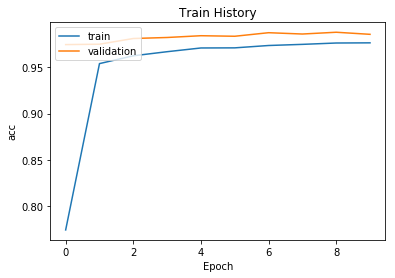

In [8]:
show_train_history(history, 'acc', 'val_acc')

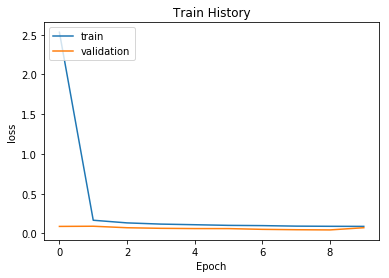

In [10]:
show_train_history(history, 'loss', 'val_loss')

In [16]:
scores = model.evaluate(X_test4D_norm, y_testOneHOt)

print('Accuracy = {:2.1f}%'.format(scores[1] * 100.0))

   32/10000 [..............................] - ETA: 6s

  128/10000 [..............................] - ETA: 6s

  224/10000 [..............................] - ETA: 6s

  320/10000 [..............................] - ETA: 6s

  416/10000 [>.............................] - ETA: 6s

  512/10000 [>.............................] - ETA: 6s

  576/10000 [>.............................] - ETA: 6s

  672/10000 [=>............................] - ETA: 6s

  736/10000 [=>............................] - ETA: 6s

  800/10000 [=>............................] - ETA: 6s

  896/10000 [=>............................] - ETA: 6s

  960/10000 [=>............................] - ETA: 6s

 1056/10000 [==>...........................] - ETA: 6s

 1152/10000 [==>...........................] - ETA: 6s

 1216/10000 [==>...........................] - ETA: 6s

 1312/10000 [==>...........................] - ETA: 6s

 1376/10000 [===>..........................] - ETA: 6s

 1440/10000 [===>..........................] - ETA: 6s

 1504/10000 [===>..........................] - ETA: 6s

 1568/10000 [===>..........................] - ETA: 6s

 1632/10000 [===>..........................] - ETA: 6s

 1760/10000 [====>.........................] - ETA: 6s

 1888/10000 [====>.........................] - ETA: 5s

 2016/10000 [=====>........................] - ETA: 5s

 2144/10000 [=====>........................] - ETA: 5s

 2272/10000 [=====>........................] - ETA: 5s

 2400/10000 [======>.......................] - ETA: 5s

 2496/10000 [======>.......................] - ETA: 4s

 2624/10000 [======>.......................] - ETA: 4s

 2720/10000 [=======>......................] - ETA: 4s

 2816/10000 [=======>......................] - ETA: 4s

 2912/10000 [=======>......................] - ETA: 4s

 3040/10000 [========>.....................] - ETA: 4s

 3136/10000 [========>.....................] - ETA: 4s

 3232/10000 [========>.....................] - ETA: 4s

 3328/10000 [========>.....................] - ETA: 4s

 3424/10000 [=========>....................] - ETA: 4s

 3520/10000 [=========>....................] - ETA: 4s

 3616/10000 [=========>....................] - ETA: 4s

 3744/10000 [==========>...................] - ETA: 3s

 3840/10000 [==========>...................] - ETA: 3s

 3936/10000 [==========>...................] - ETA: 3s

 4032/10000 [===========>..................] - ETA: 3s

 4160/10000 [===========>..................] - ETA: 3s

 4256/10000 [===========>..................] - ETA: 3s

 4352/10000 [============>.................] - ETA: 3s

 4448/10000 [============>.................] - ETA: 3s

 4576/10000 [============>.................] - ETA: 3s

 4704/10000 [=============>................] - ETA: 3s

 4864/10000 [=============>................] - ETA: 3s

 4992/10000 [=============>................] - ETA: 2s

 5152/10000 [==============>...............] - ETA: 2s

 5280/10000 [==============>...............] - ETA: 2s

 5408/10000 [===============>..............] - ETA: 2s

 5536/10000 [===============>..............] - ETA: 2s

 5664/10000 [===============>..............] - ETA: 2s

 5824/10000 [================>.............] - ETA: 2s

 5952/10000 [================>.............] - ETA: 2s

 6112/10000 [=================>............] - ETA: 2s

 6240/10000 [=================>............] - ETA: 2s

 6368/10000 [==================>...........] - ETA: 2s

 6496/10000 [==================>...........] - ETA: 1s

 6624/10000 [==================>...........] - ETA: 1s

 6752/10000 [===================>..........] - ETA: 1s

 6880/10000 [===================>..........] - ETA: 1s

 7040/10000 [====================>.........] - ETA: 1s

 7168/10000 [====================>.........] - ETA: 1s

 7296/10000 [====================>.........] - ETA: 1s

 7424/10000 [=====================>........] - ETA: 1s

 7552/10000 [=====================>........] - ETA: 1s

 7680/10000 [======================>.......] - ETA: 1s

 7840/10000 [======================>.......] - ETA: 1s

 7968/10000 [======================>.......] - ETA: 1s

 8096/10000 [=======================>......] - ETA: 0s

 8224/10000 [=======================>......] - ETA: 0s

 8352/10000 [========================>.....] - ETA: 0s

 8480/10000 [========================>.....] - ETA: 0s

 8640/10000 [========================>.....] - ETA: 0s

 8768/10000 [=========================>....] - ETA: 0s

 8896/10000 [=========================>....] - ETA: 0s

 9024/10000 [==========================>...] - ETA: 0s

 9152/10000 [==========================>...] - ETA: 0s

 9280/10000 [==========================>...] - ETA: 0s

 9376/10000 [===========================>..] - ETA: 0s

 9504/10000 [===========================>..] - ETA: 0s

 9600/10000 [===========================>..] - ETA: 0s

 9728/10000 [============================>.] - ETA: 0s

 9856/10000 [============================>.] - ETA: 0s

 9952/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 5s 509us/step


Accuracy = 9.7%


In [13]:
prediction = model.predict_classes(X_test4D_norm)

print('%s\n' % (prediction[240:250]))

[8 8 8 8 8 8 8 8 8 8]



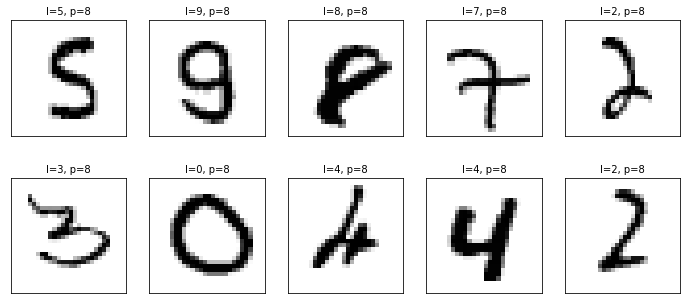

In [15]:
plot_images_labels_predict(X_test, y_test, prediction, idx=240)